# SVM and NN: LBP


24505063 Assignment 1

### Step 1: Import required packages

In [ ]:
# Import required libraries
import os # Used for file handling
import numpy # Used for array and numerical operations
import matplotlib.pyplot as plt # Used for plotting
from sklearn import * # Used for machine learning functions
from skimage import feature, color # Used for image processing
import cv2 # Used for image processing
import seaborn # Used for data visualisation
import random # Used to perform random operations
%matplotlib inline
import tensorflow as tf # Used for Neural Networks
import pandas as pd # Used for graphing

Mount the Google Drive to access the Dataset:


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Step 2: Load Dataset

Change path to the folder contianing the dataset:

In [ ]:
%cd /content/gdrive/MyDrive/42028/Assignment 1 # Change this path to folder containing images

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/42028/Assignment 1 # Change this path'
/content


Specify label names for numeric identifiers:


In [ ]:
labelNames = ["!", "[", "div", "geq", "leq",
	"neq", "pi", "sin", "sqrt", "tan"] # Index of label name correspondings to numerical category representation by model

Read in the images and corresponding labels:

In [ ]:
def load_data(data): # Data is the parent folder path containting training dataset
  images = []
  labels = []
  symbols = os.listdir(data) # List subdirectories
  print(symbols)

  for symbol in symbols: # For each subdirectory
    for imageFile in os.listdir(os.path.join(data, symbol)): # For each file in subdirectory
      image = cv2.imread(os.path.join(data, symbol, imageFile)) # Read the file
      images.append(cv2.resize(image, (45, 45))) # Resize the image to ensure consistent sizes
      labels.append(labelNames.index(symbol)) # Append corresponding label for current images, indexes in images and labels array align
  return numpy.array(images), labels

In [ ]:
images, labels = load_data('/content/gdrive/MyDrive/42028/Assignment 1/dataset_42028assg1_24505063') # Change this path to unzipped image folder
print(labels)

['!', '[', 'tan', 'div', 'sin', 'geq', 'neq', 'leq', 'sqrt', 'pi']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Display 4 random images

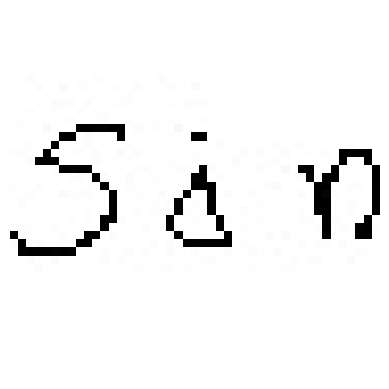

sin


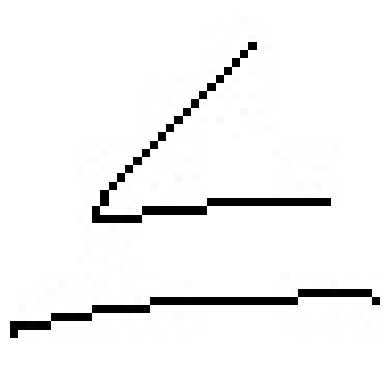

leq


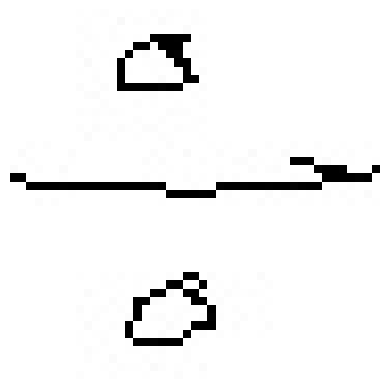

div


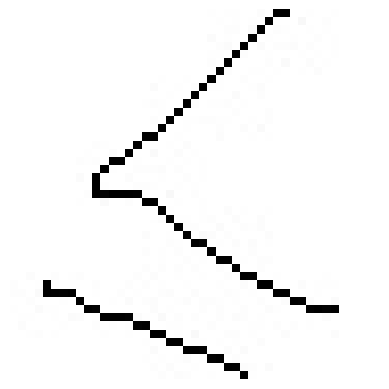

leq


In [ ]:
# view a few images and print its corresponding label
num = random.randint(0, len(images)) # Select a random image
plt.imshow(images[num])
plt.axis('off')
plt.show()
print(labelNames[labels[num]]) # Output the corresponding label of the image

num = random.randint(0, len(images))
plt.imshow(images[num])
plt.axis('off')
plt.show()
print(labelNames[labels[num]])

num = random.randint(0, len(images))
plt.imshow(images[num])
plt.axis('off')
plt.show()
print(labelNames[labels[num]])

num = random.randint(0, len(images))
plt.imshow(images[num])
plt.axis('off')
plt.show()
print(labelNames[labels[num]])

Split dataset into train and test split, with 30% of the images going to test (This is used for both models to ensure consistency):

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(images, labels, test_size=0.3, random_state=42) # Random state 42 remains consistent among tests to ensure consistent dataset for comparison
# Display the shape of the datasets
print(numpy.shape(x_train))
print(numpy.shape(x_test))

(3500, 45, 45, 3)
(1500, 45, 45, 3)


Implement LBP feature extraction

In [ ]:
def LBPfeatures(image, numPoints, radius, eps=1e-7):
	lbp = feature.local_binary_pattern(image, numPoints,
		radius, method="uniform") # Create LBP representation
	(hist, _) = numpy.histogram(lbp.ravel(), # Create histogram of patterns
		bins=numpy.arange(0, numPoints + 3),
		range=(0, numPoints + 2))

	#N Normalise Histogram
	hist = hist.astype("float")
	hist /= (hist.sum() + eps)

	return hist

Apply LBP feature extraction to train and test dataset

In [ ]:
Lx_train = [] # Array storing LBP train set

for img_index in range(len(x_train)): # For each train image
	image = (x_train[img_index]) # Get image
	hist = LBPfeatures(color.rgb2gray(image), 24, 5) # Apply LBP
	Lx_train.append(hist)

Lx_test = [] # Array storing LBP test set

for img_index in range(len(x_test)): # For each test image
	image = (x_test[img_index]) # Get image
	hist = LBPfeatures(color.rgb2gray(image), 24, 5) # Apply LBP
	Lx_test.append(hist)

### Step 3: Train the SVM model

In [ ]:
model = svm.SVC(kernel='rbf',C=100.0, random_state=42) # RBF Kernel
model.fit(Lx_train, y_train) # Train the model on the training data set

SVC(C=100.0, random_state=42)

### Step 4: Evaluate the SVM model

Output the training and test accuracy of the SVM:

In [ ]:
print("Train set Accuracy: {:.3f}".format(model.score(Lx_train, y_train)))
print("Test set Accuracy: {:.3f}".format(model.score(Lx_test, y_test)))

Train set Accuracy: 0.760
Test set Accuracy: 0.741


Output confusion matrix

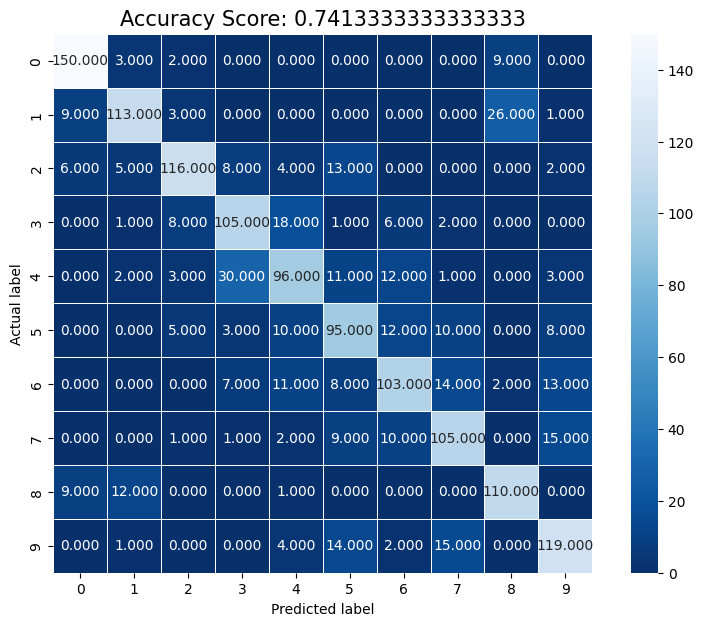

In [ ]:
y_pred = model.predict(Lx_test) # Store predicted labels
cm = metrics.confusion_matrix(y_test, y_pred, labels=numpy.arange(len(labelNames))) # Generate confusion matrix

plt.figure(figsize=(10, 7)) # Create plot
seaborn.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'); # Add confusion matrix to plot
plt.ylabel('Actual label'); # Add ylabel
plt.xlabel('Predicted label'); # Add xlabel
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred)) # Add accuracy
plt.title(all_sample_title, size = 15); # Format title

Randomly display images with corresponding predicted and true labels

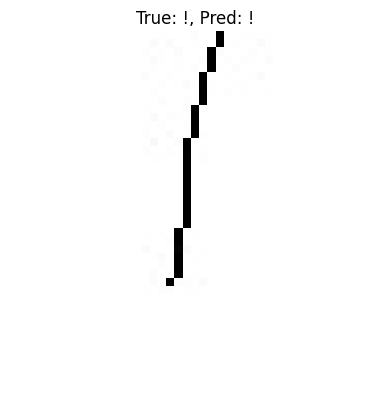

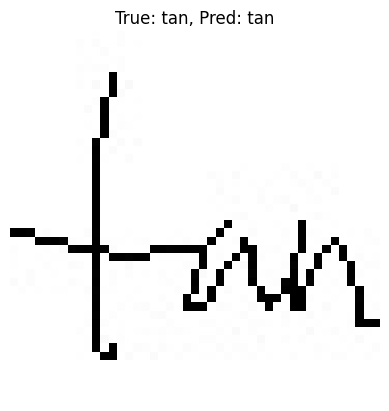

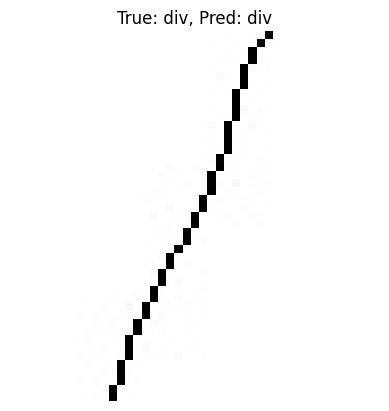

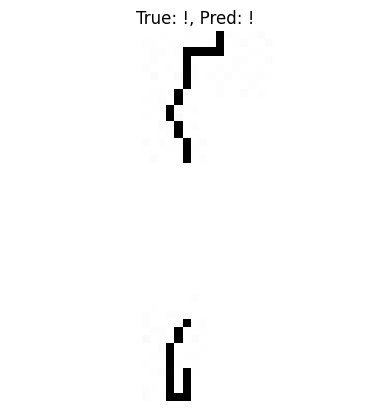

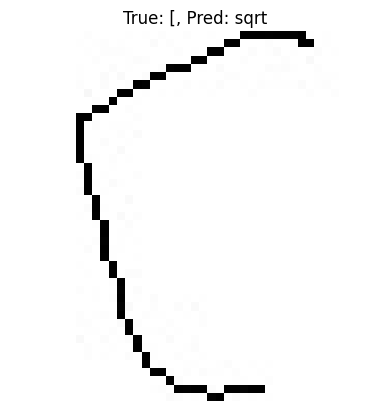

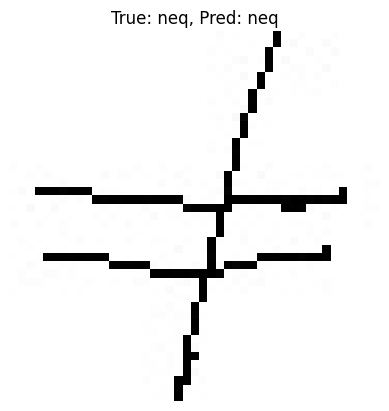

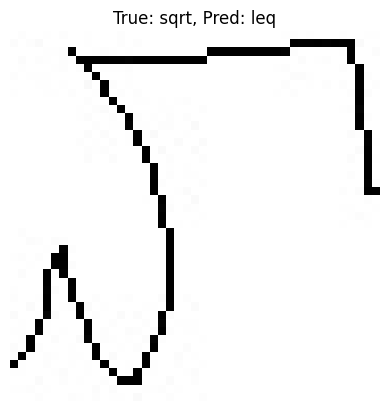

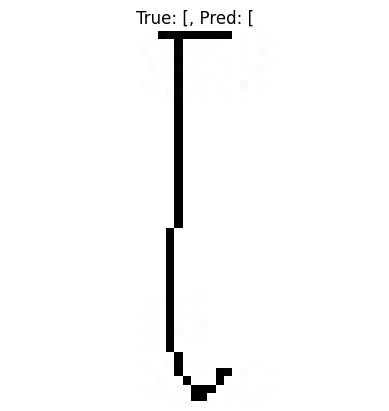

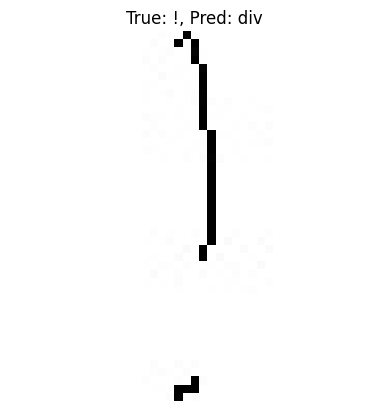

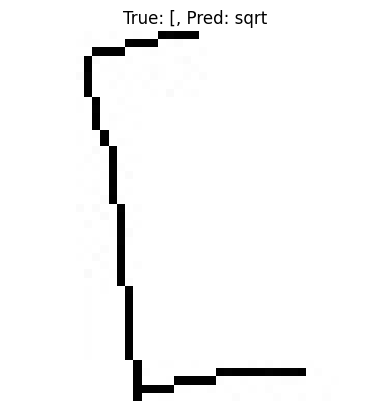

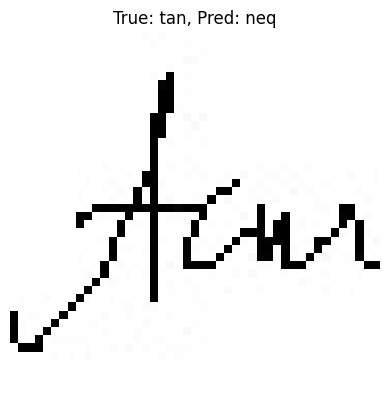

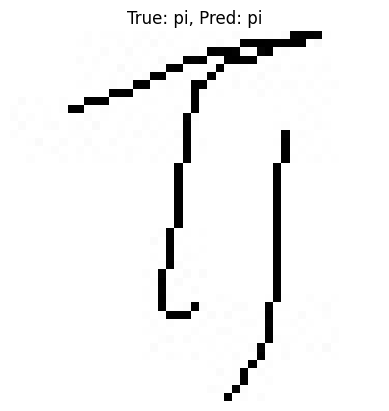

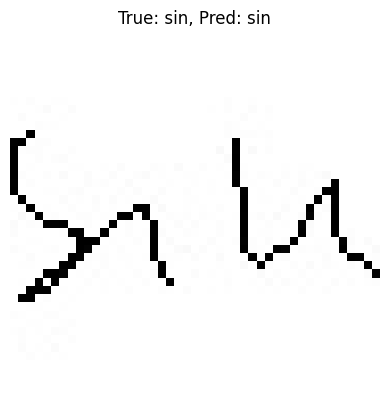

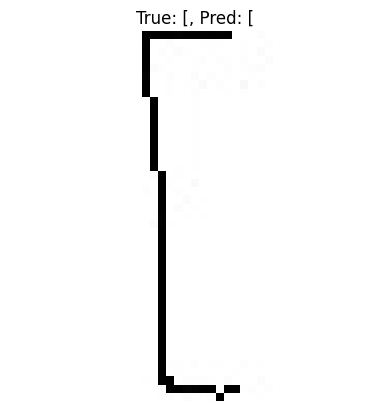

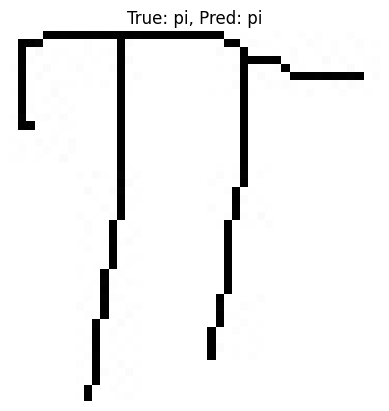

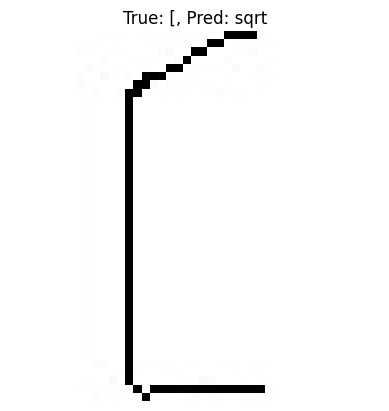

In [ ]:
displayImages = [] # Empty array to store images to be displayed
for i in numpy.random.choice(numpy.arange(0, len(y_test)), size=(16,)): # Select a random choice of images in the test dataset
  test_img = (Lx_test[i])
  pred = model.predict(test_img.reshape(1, -1))[0] # Predict the label of the test image
  plt.imshow(x_test[i], cmap='gray') # Add the image to the plot
  plt.title(f"True: {labelNames[y_test[i]]}, Pred: {labelNames[pred]}") # Add labels to the plot
  plt.axis('off')
  plt.show()

Display misclassified images:

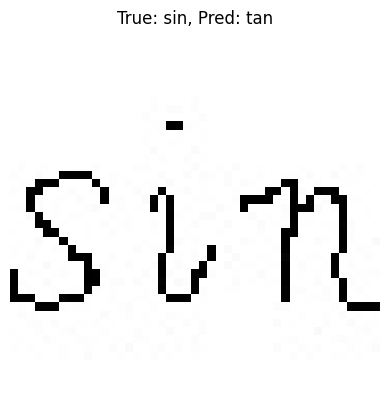

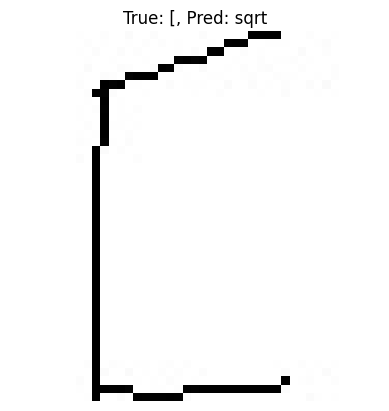

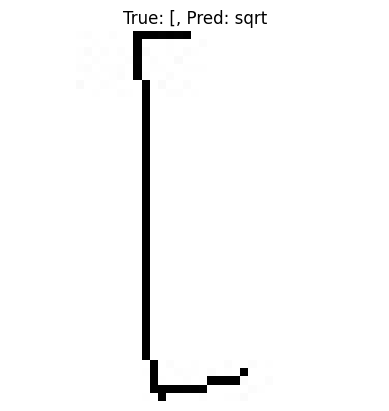

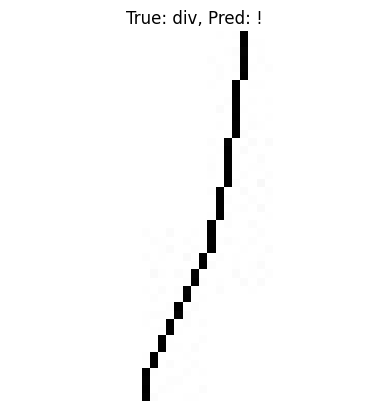

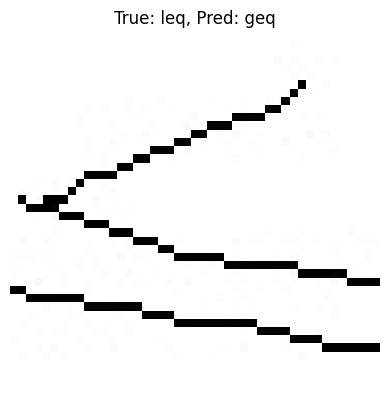

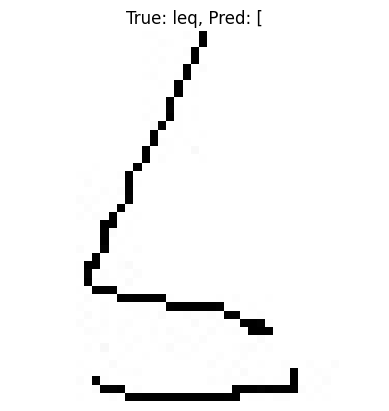

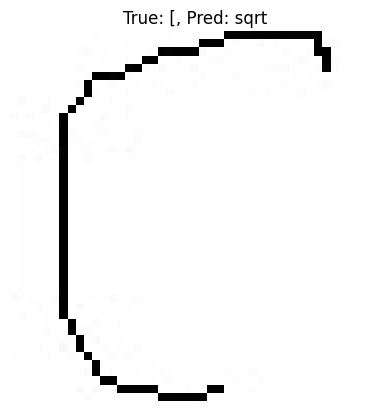

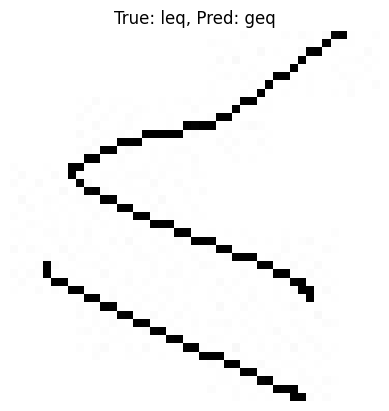

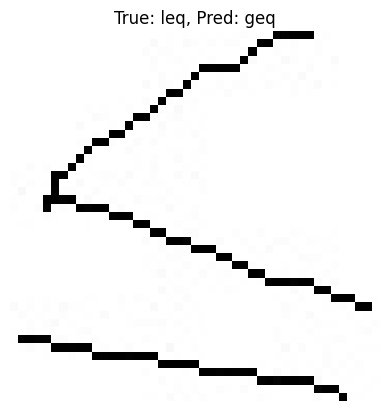

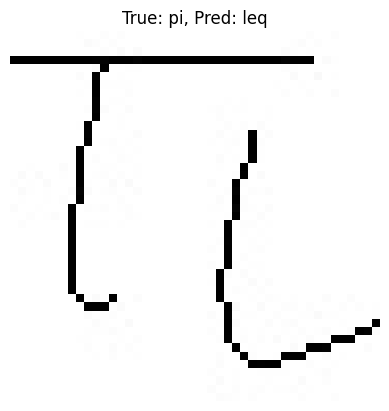

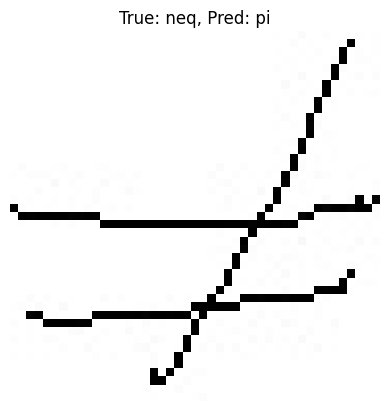

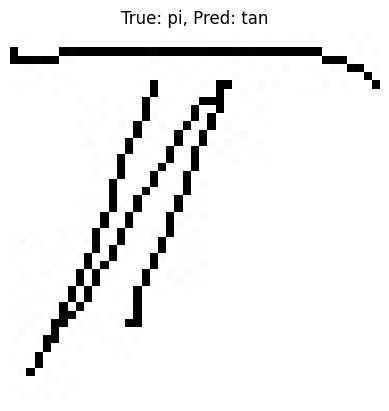

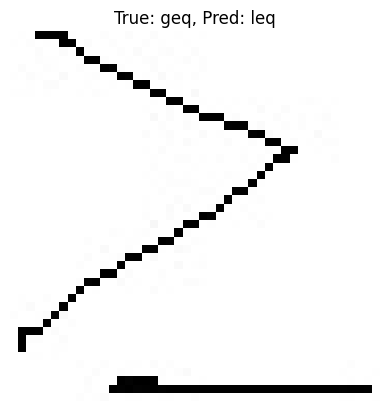

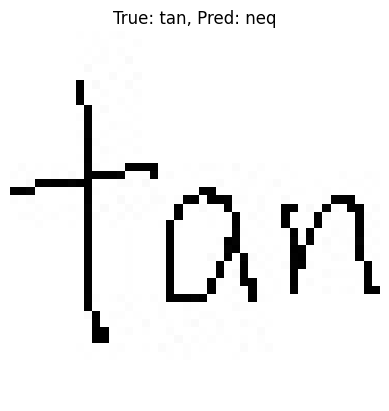

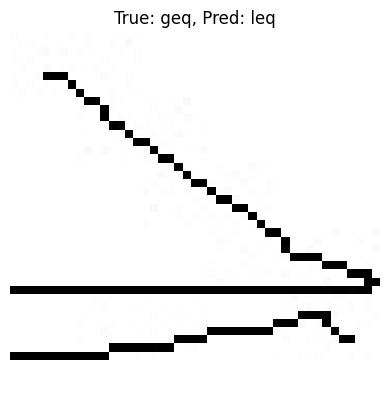

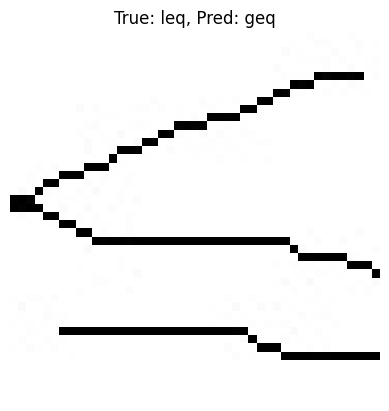

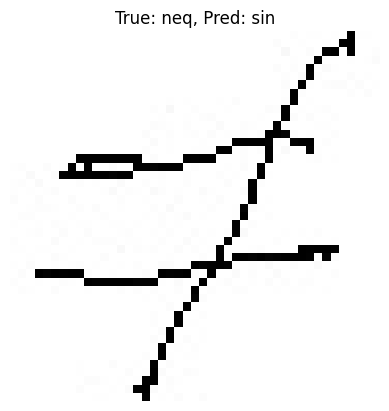

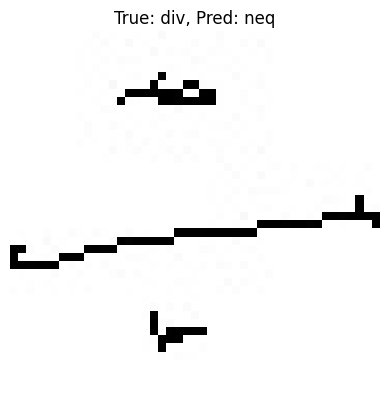

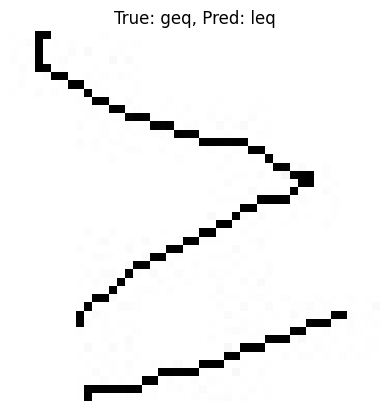

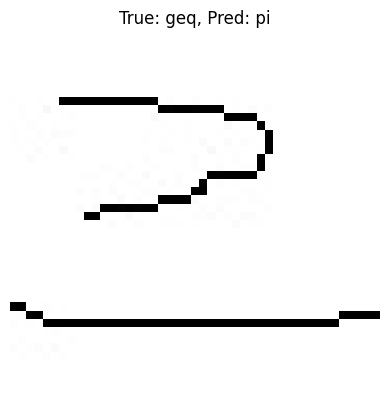

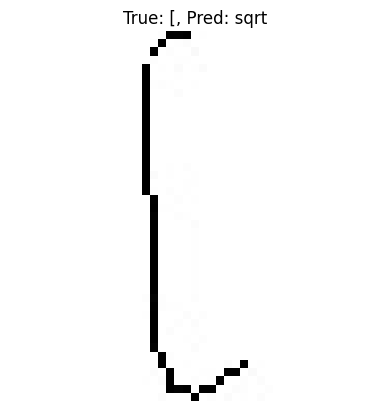

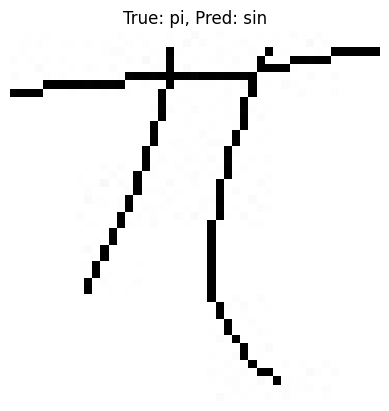

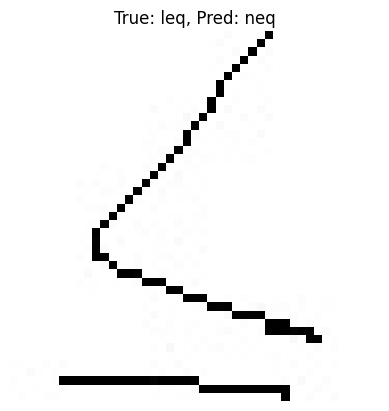

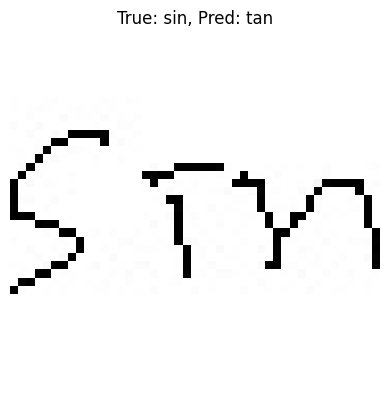

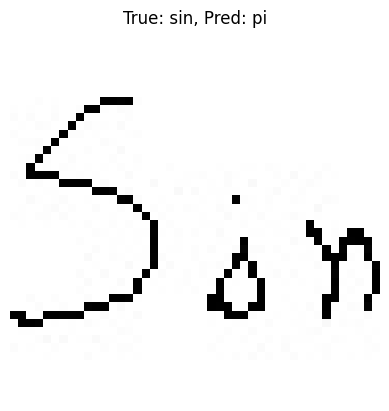

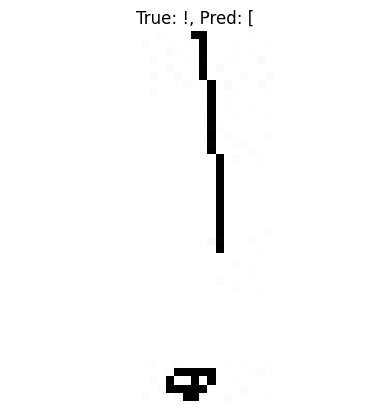

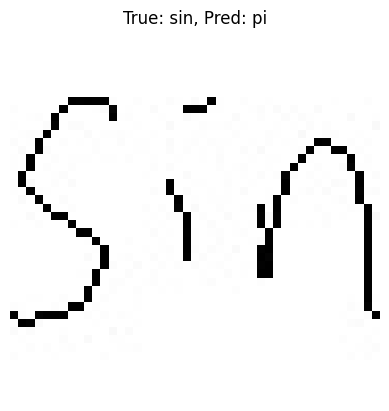

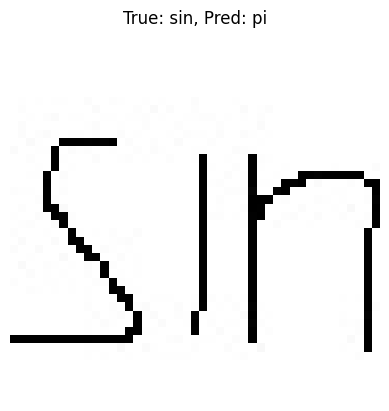

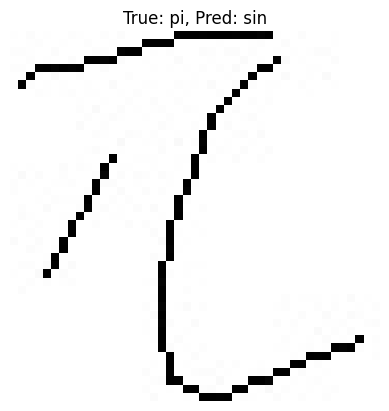

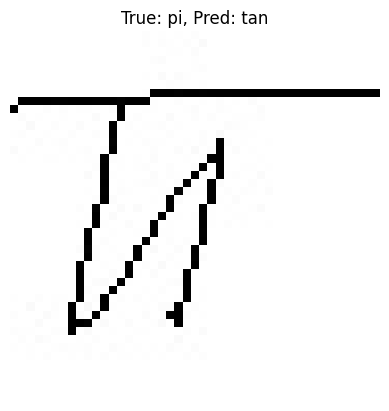

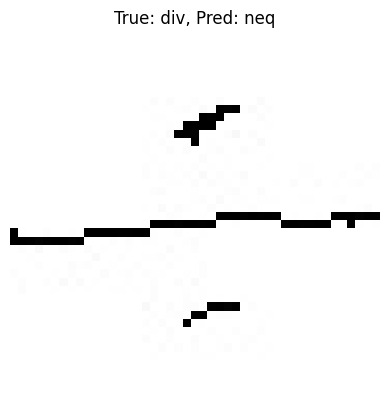

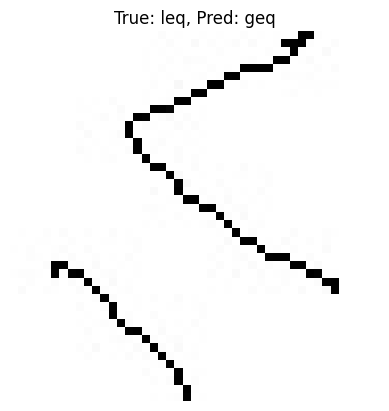

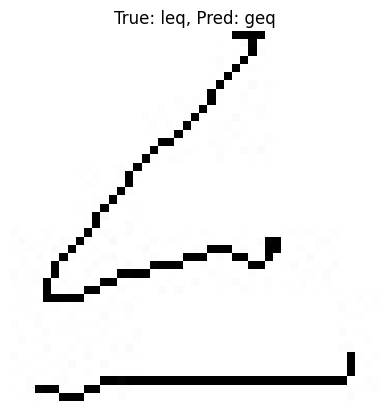

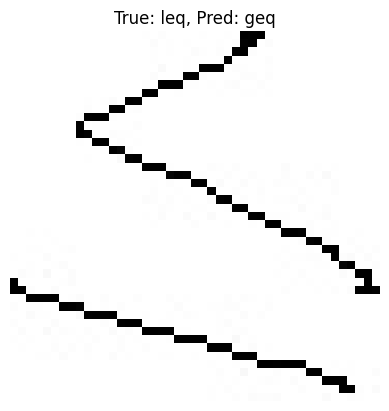

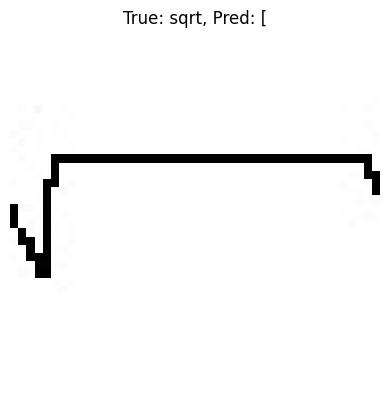

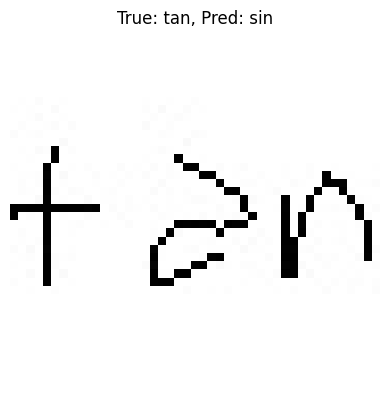

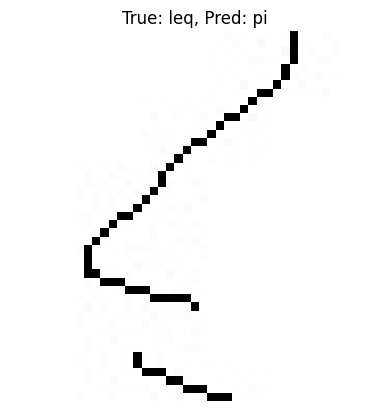

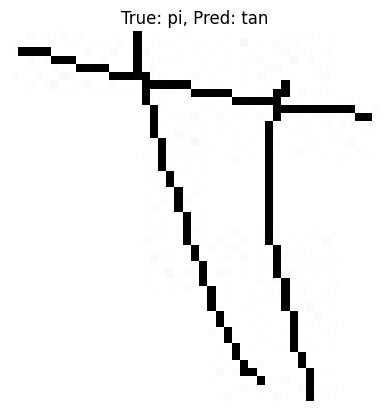

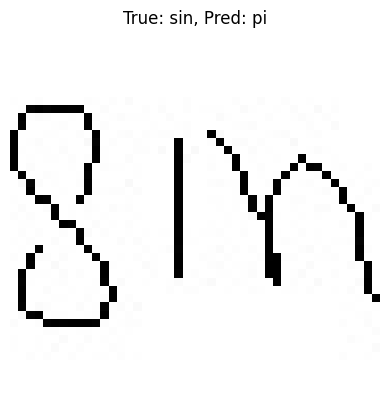

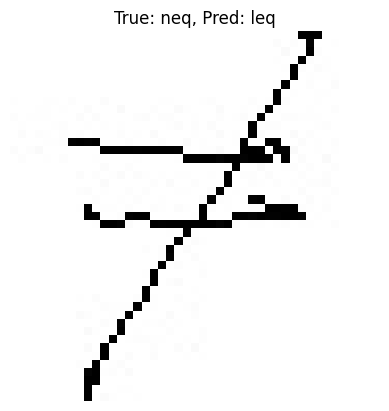

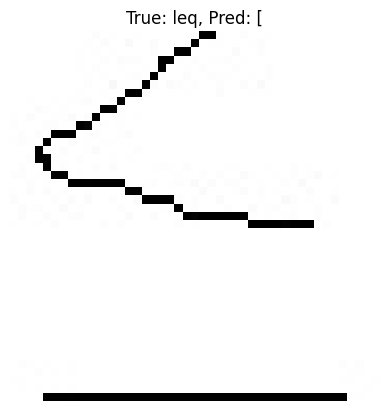

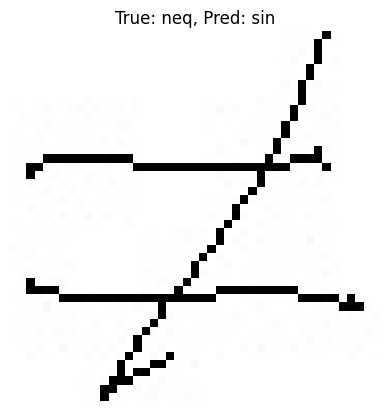

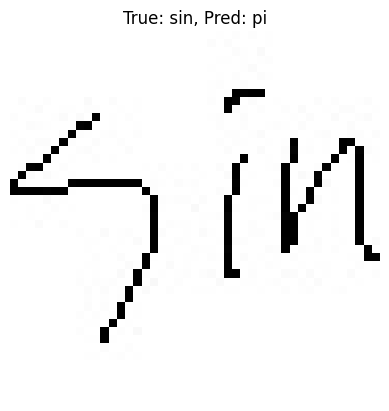

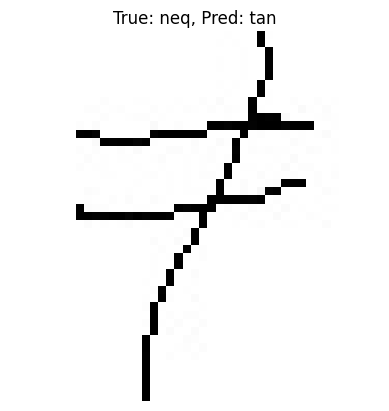

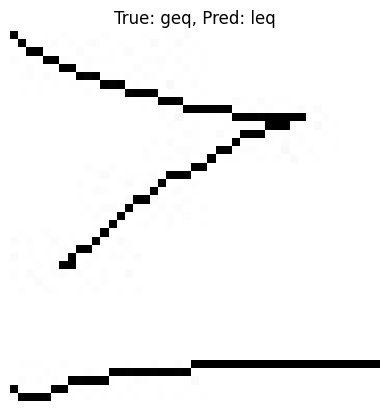

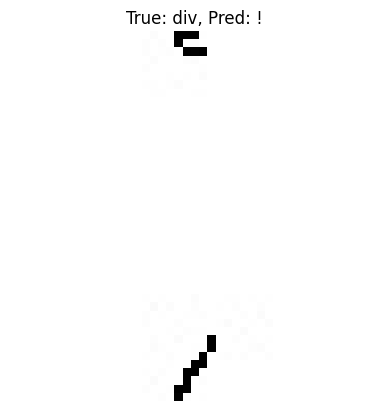

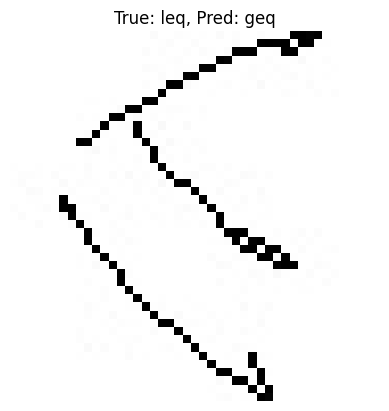

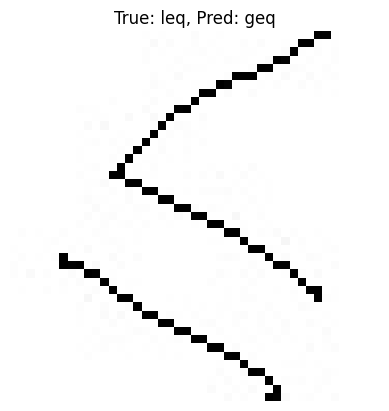

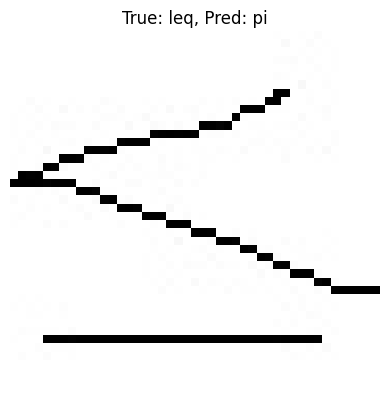

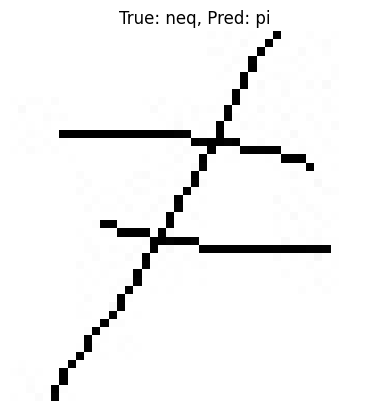

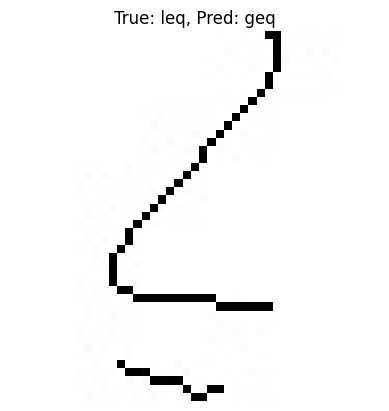

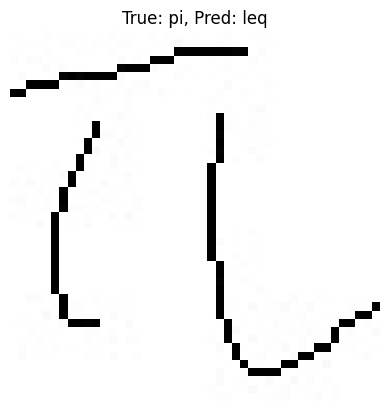

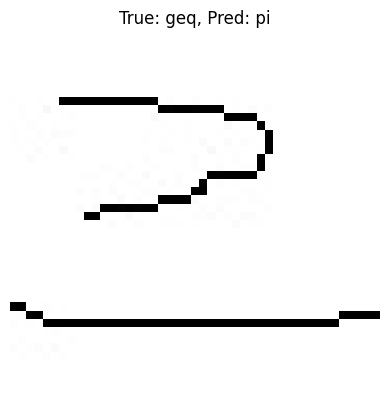

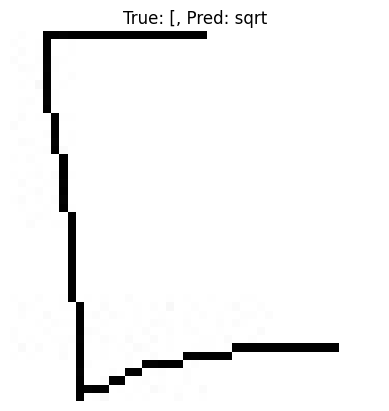

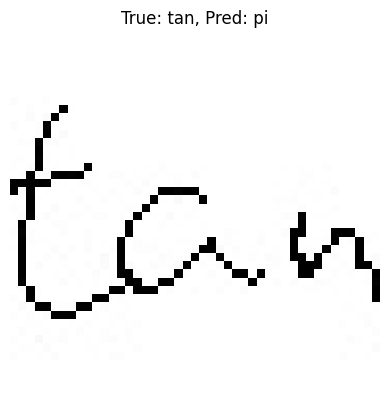

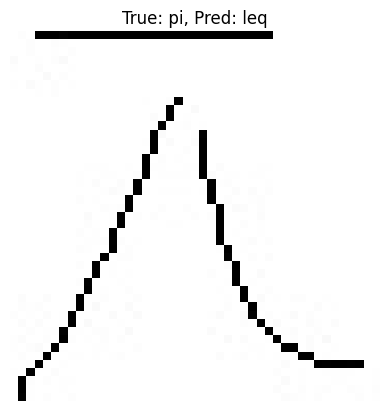

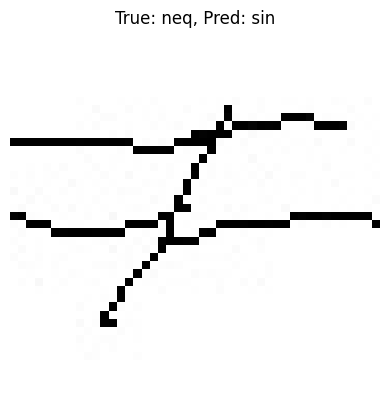

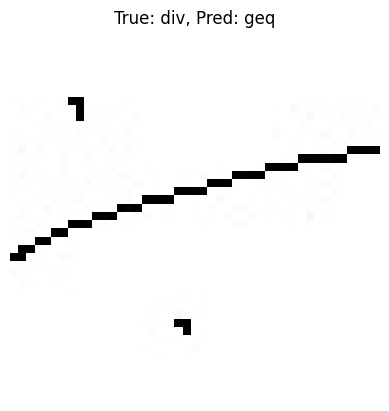

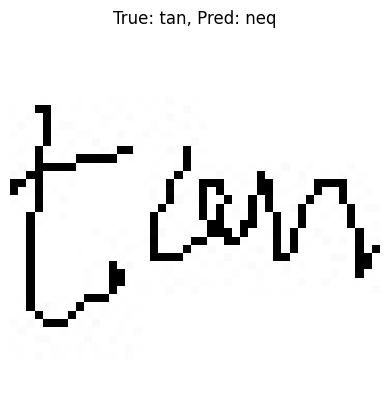

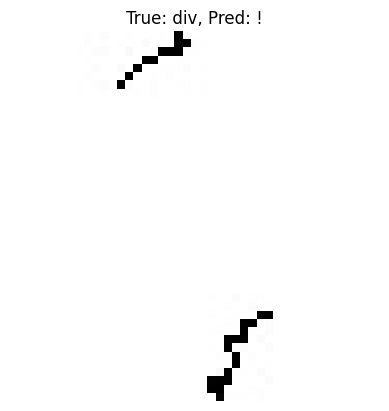

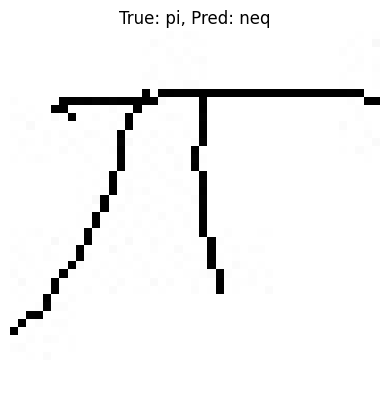

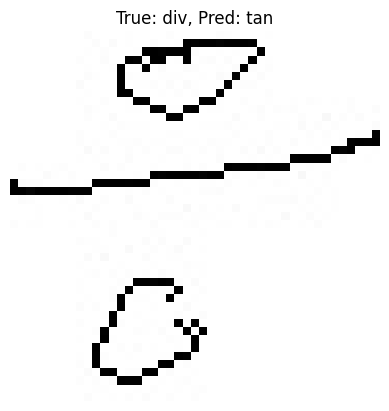

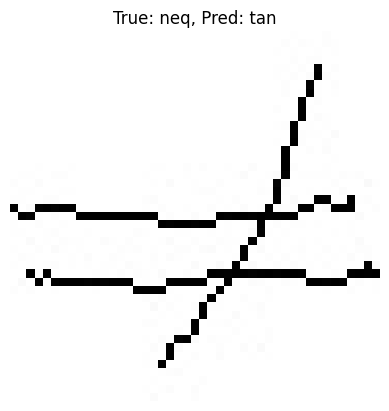

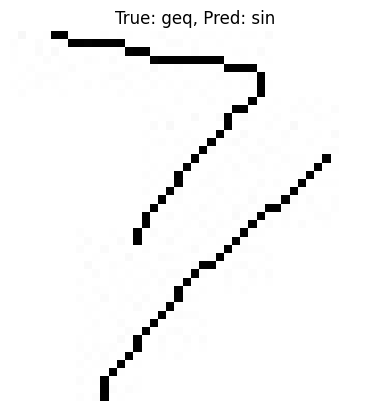

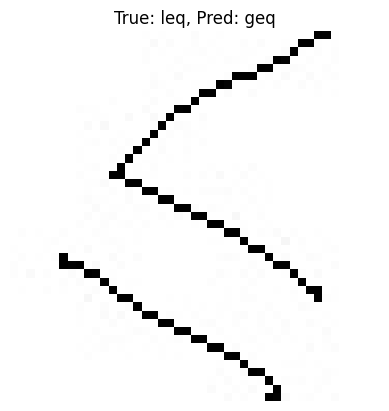

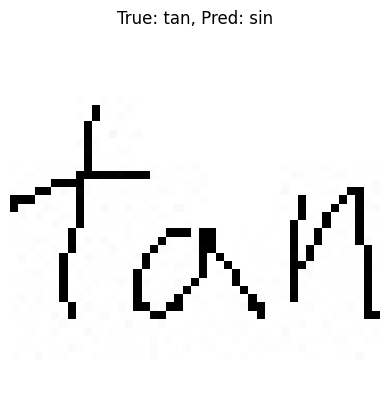

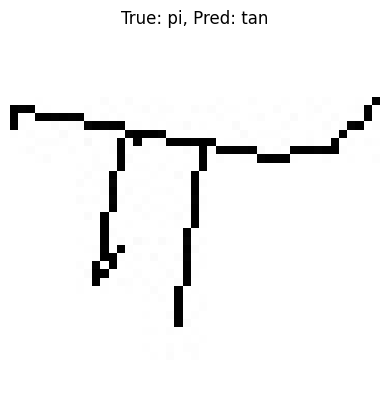

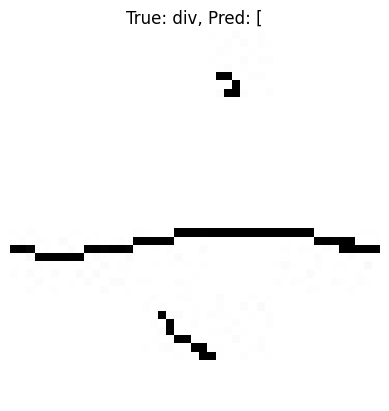

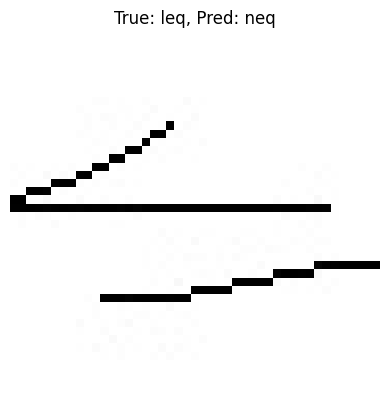

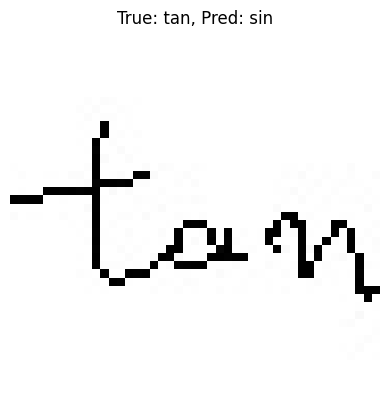

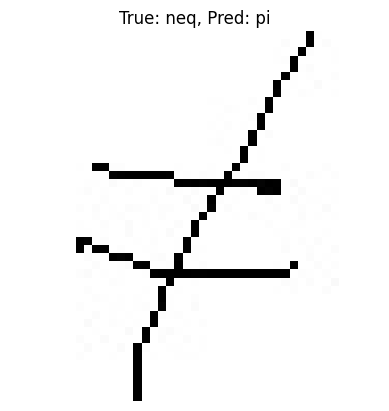

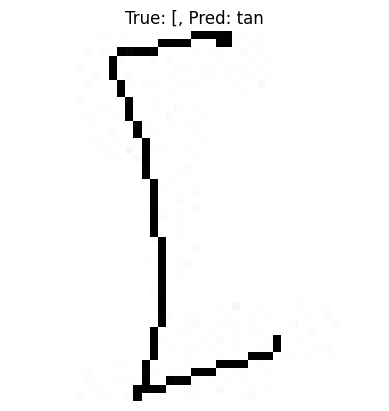

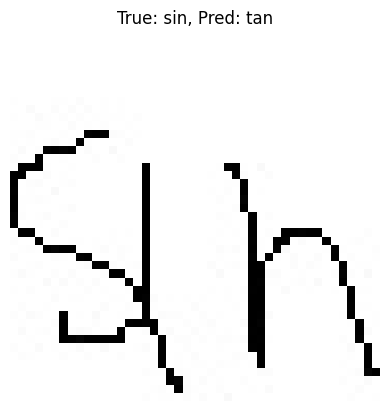

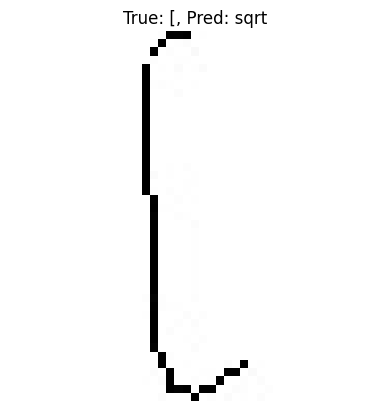

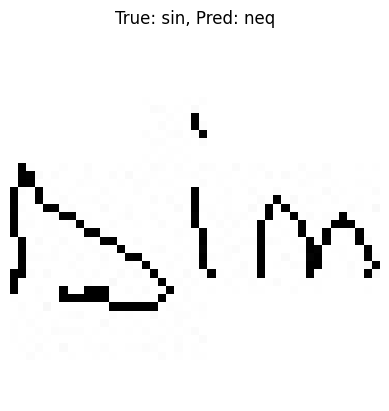

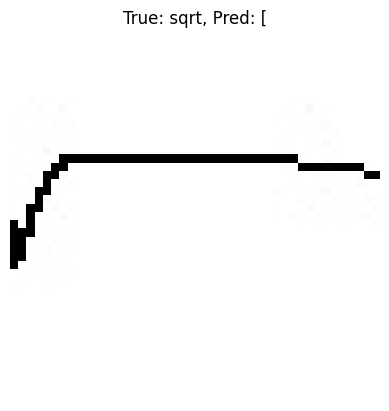

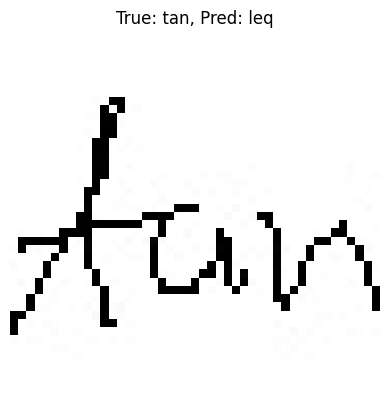

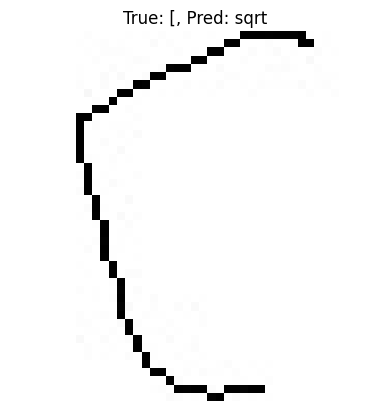

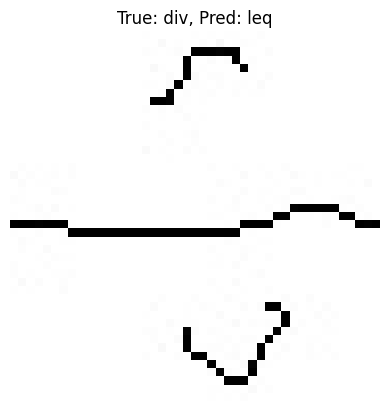

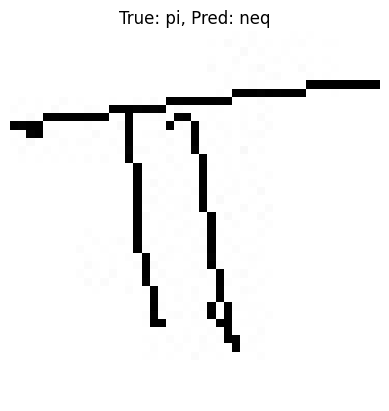

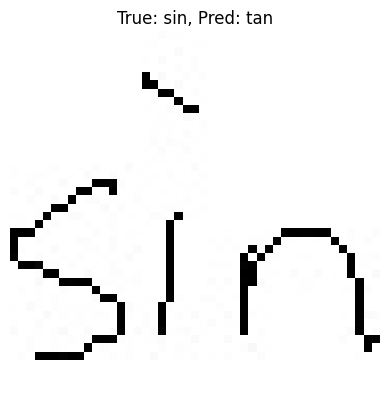

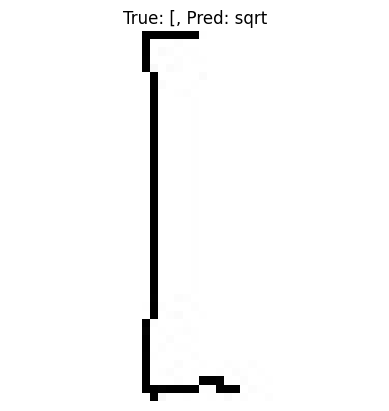

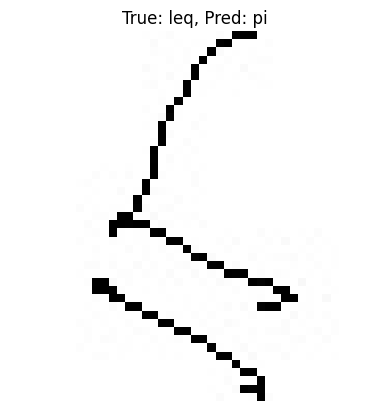

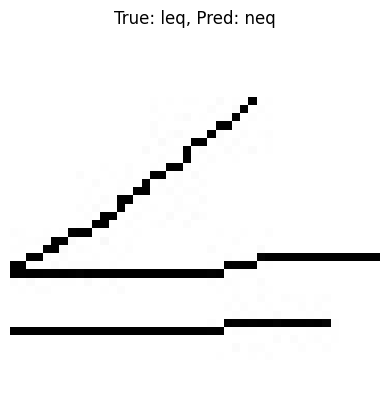

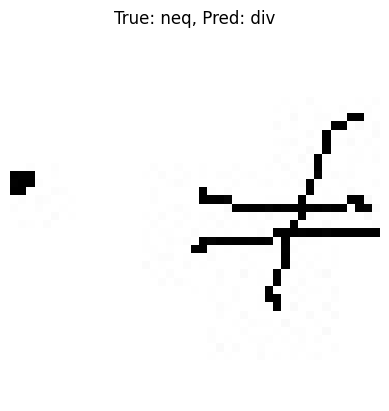

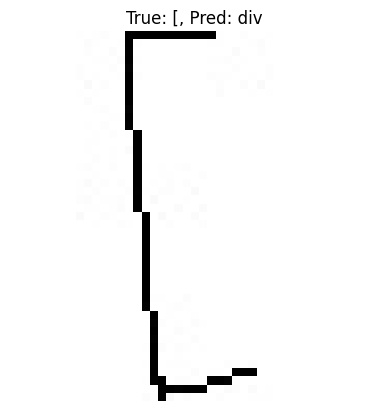

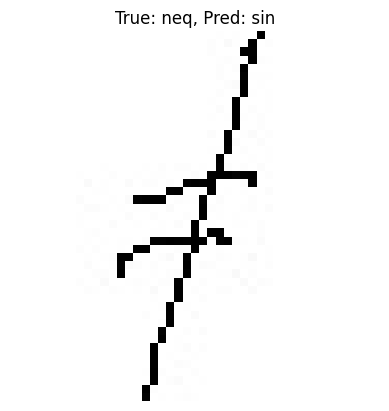

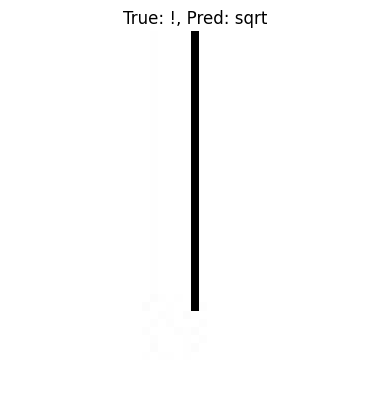

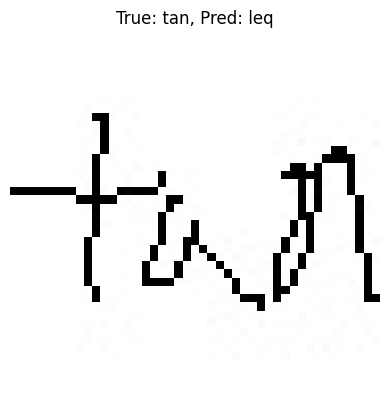

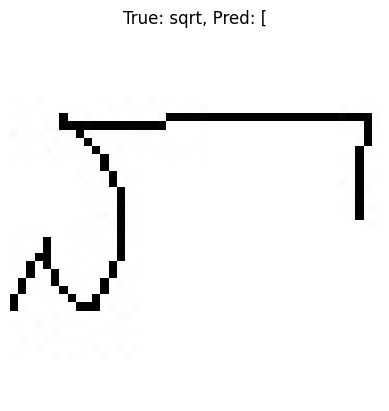

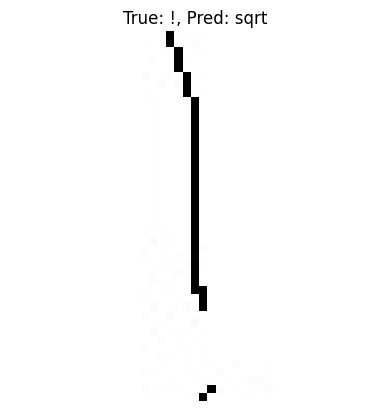

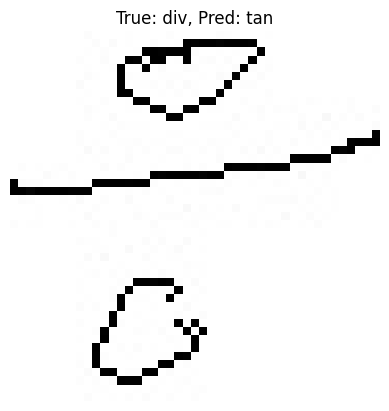

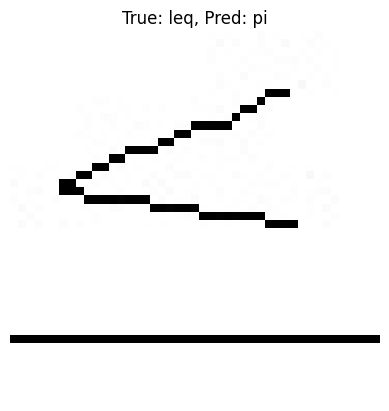

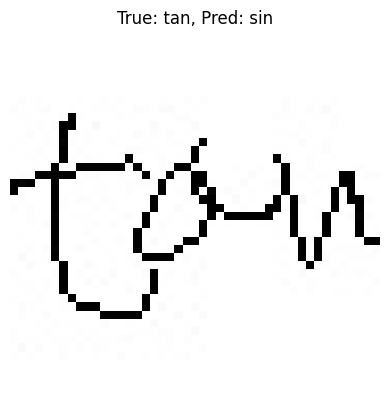

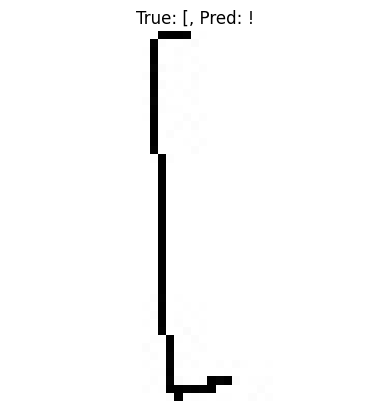

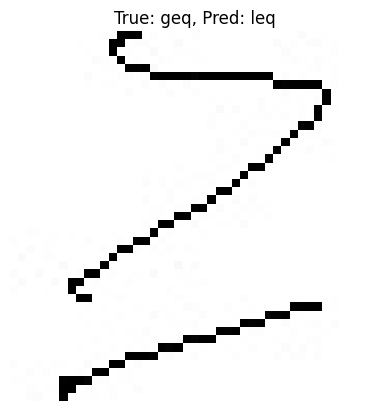

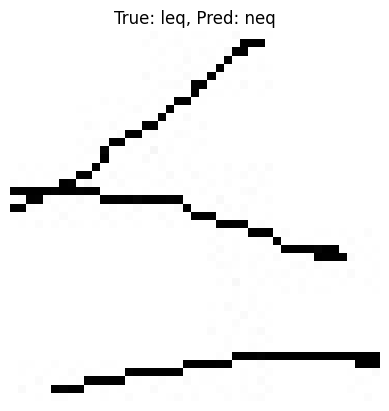

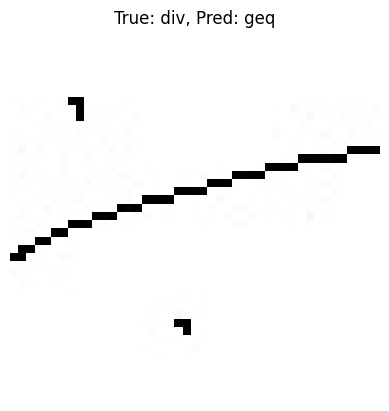

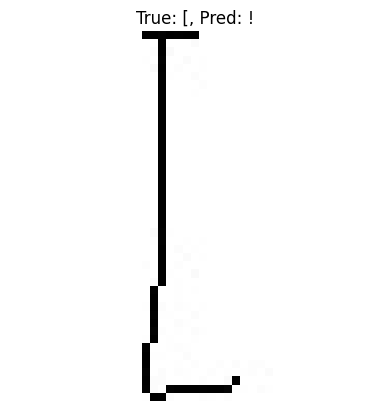

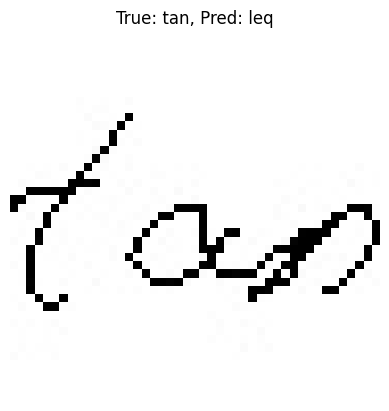

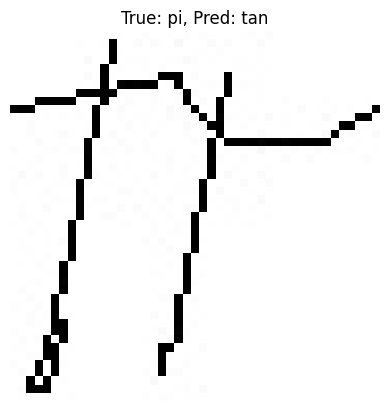

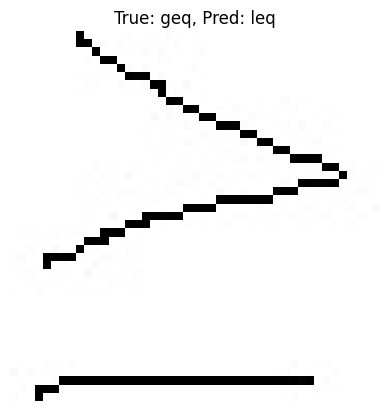

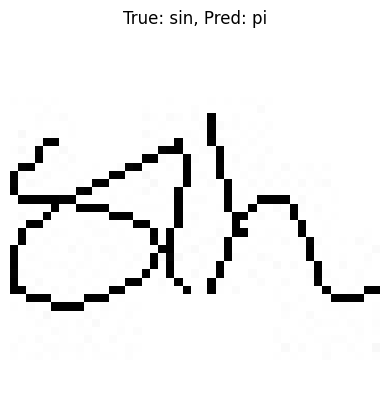

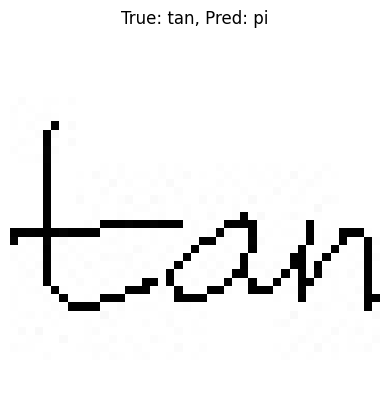

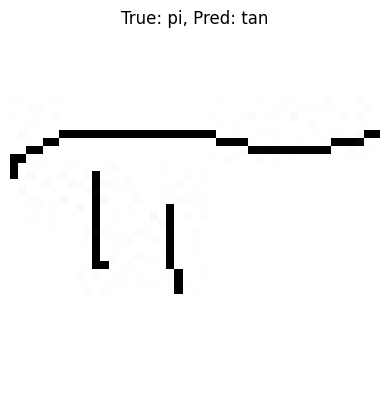

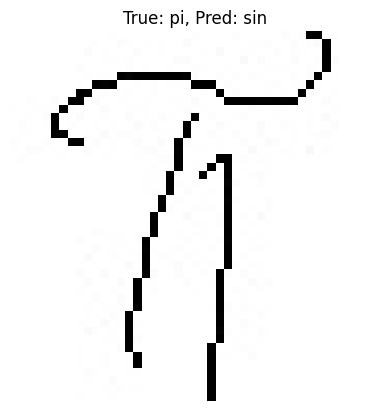

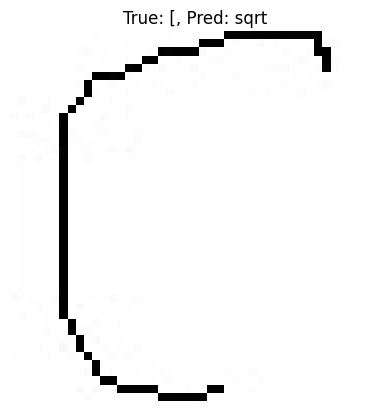

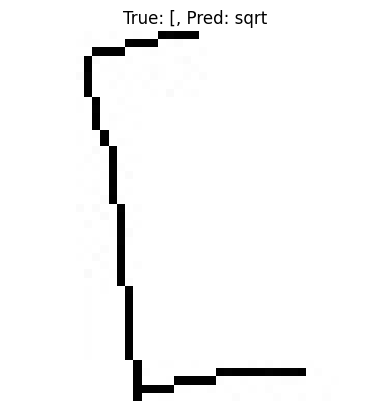

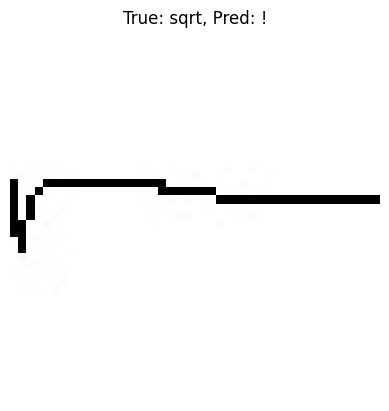

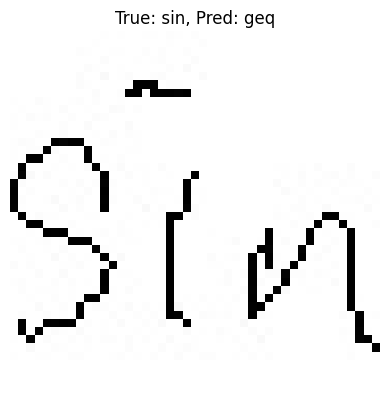

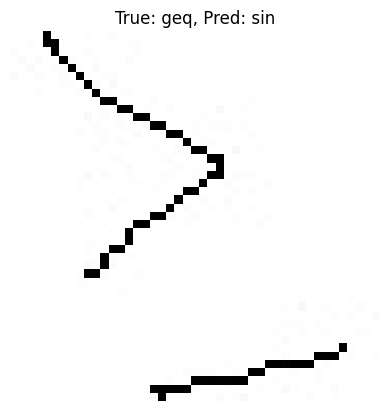

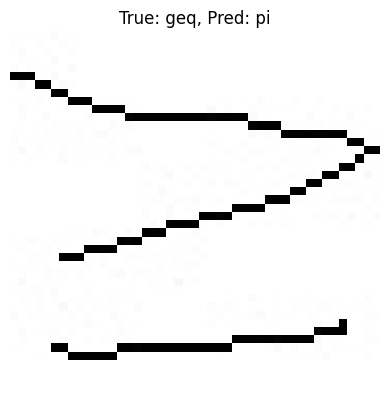

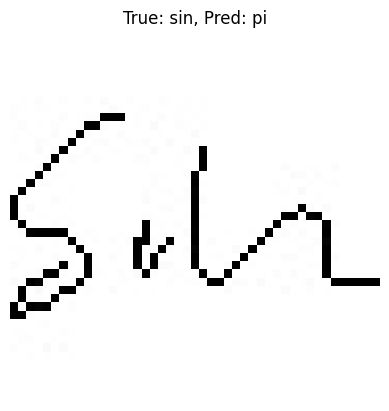

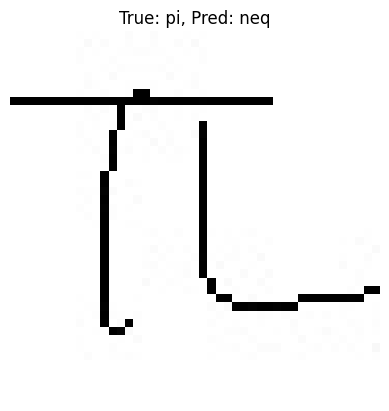

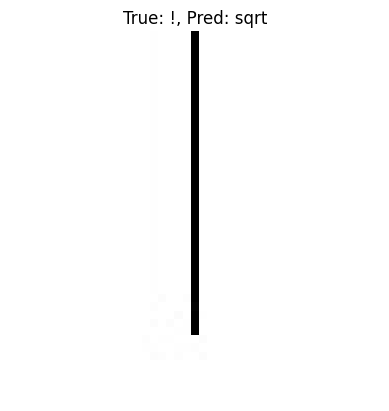

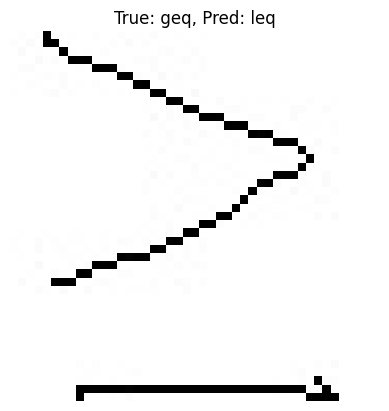

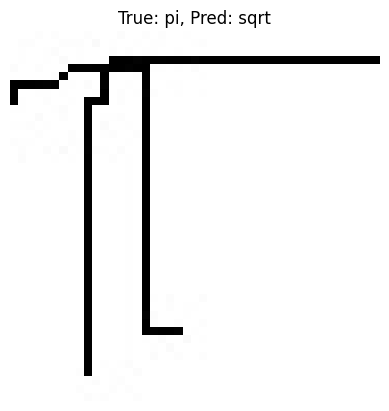

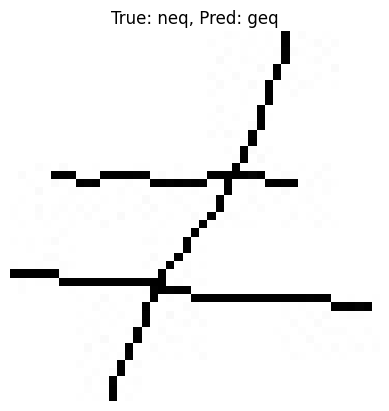

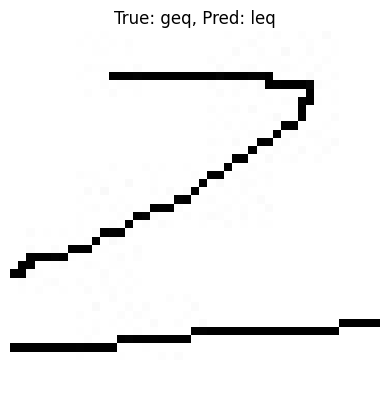

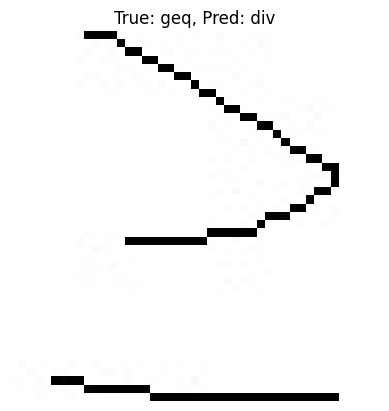

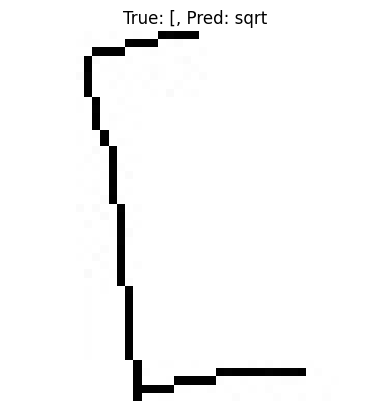

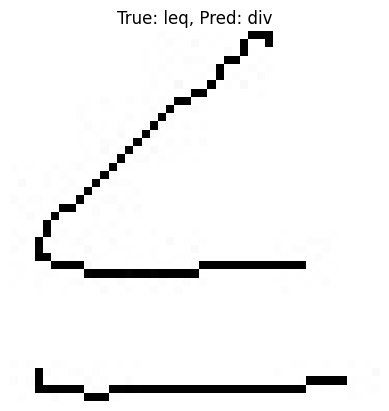

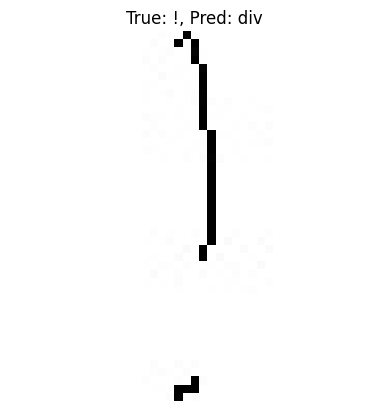

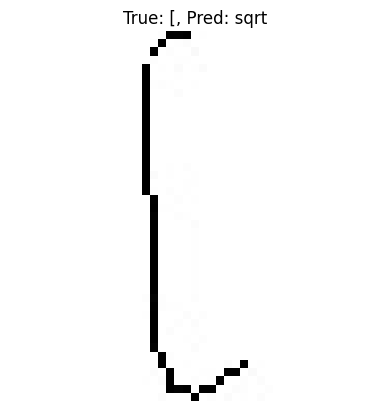

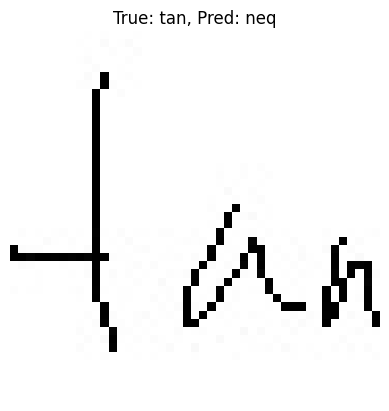

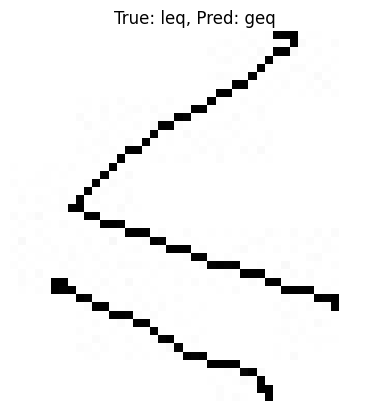

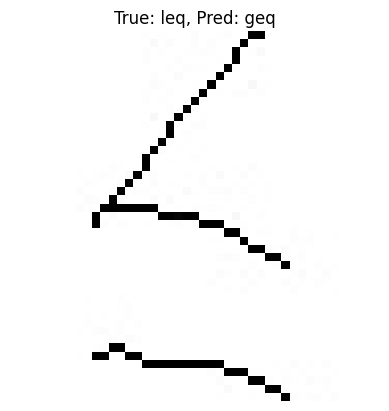

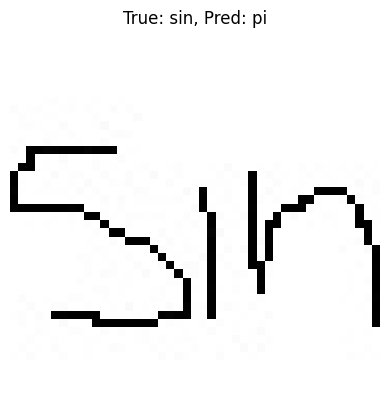

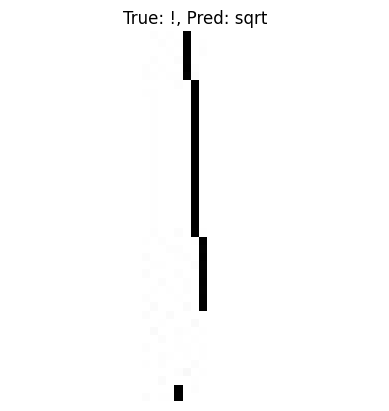

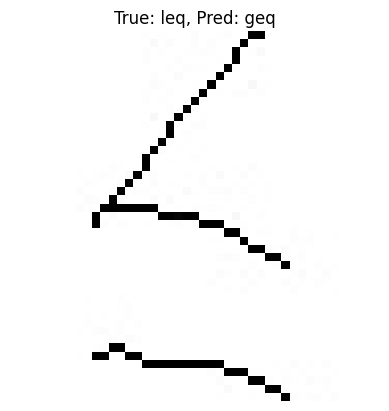

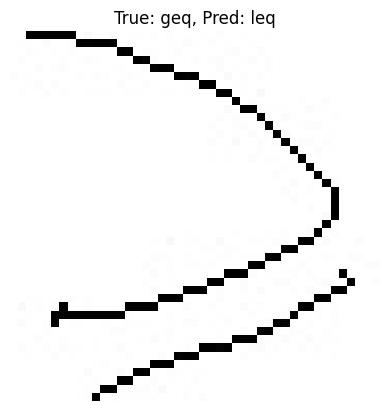

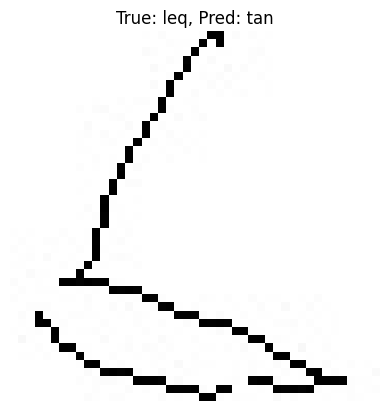

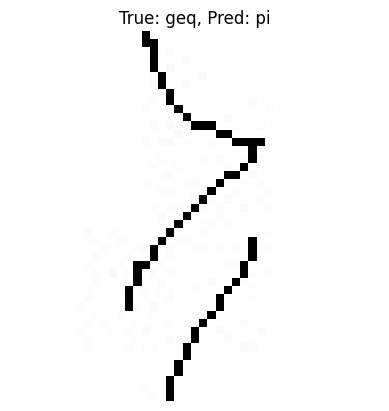

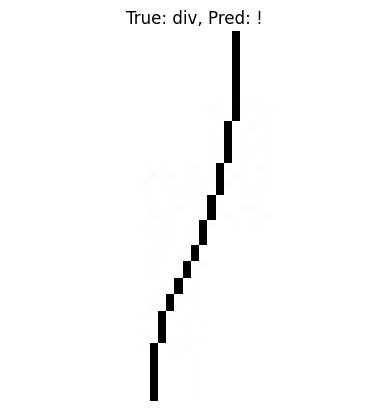

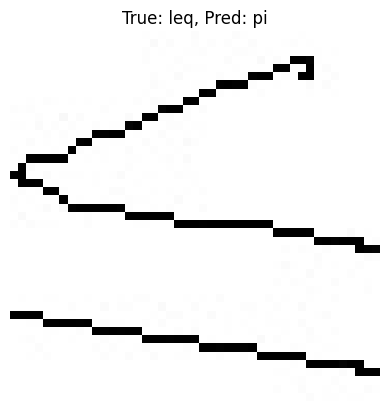

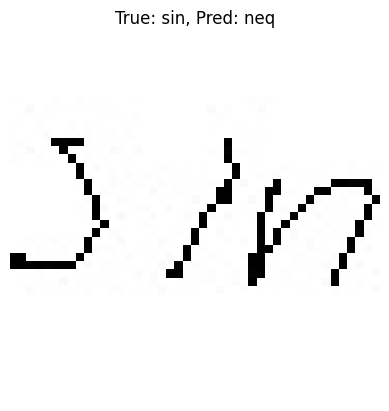

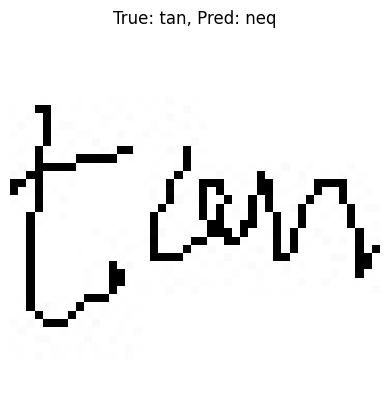

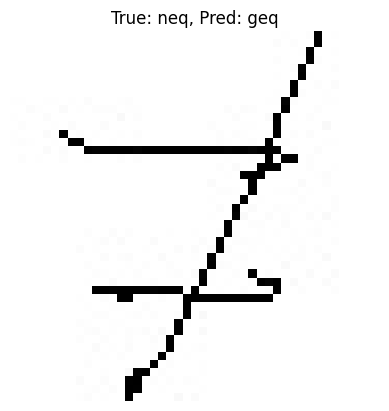

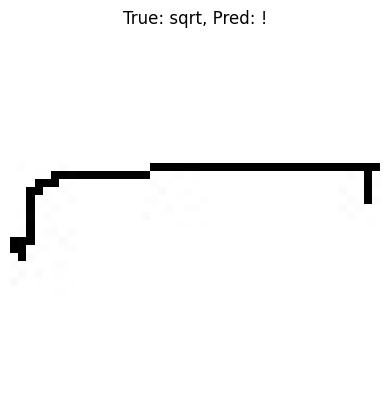

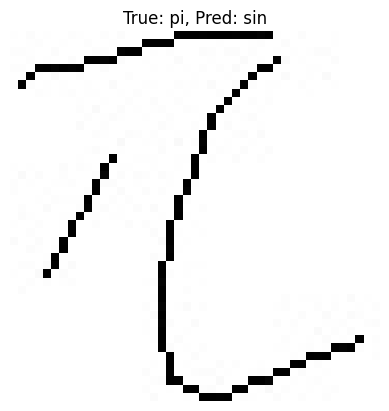

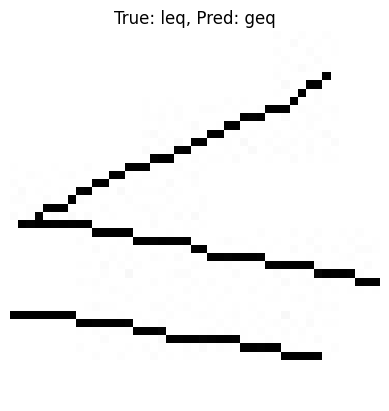

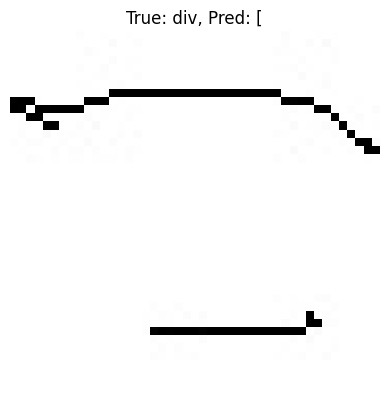

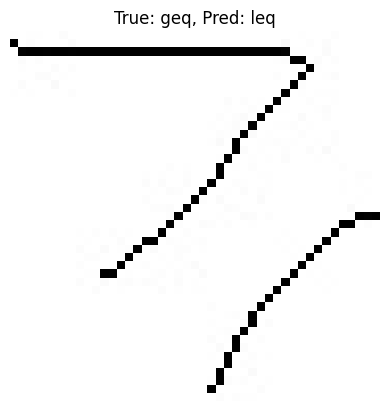

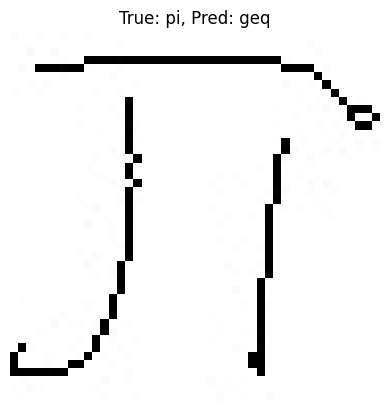

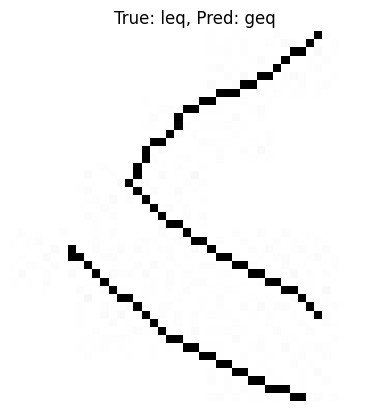

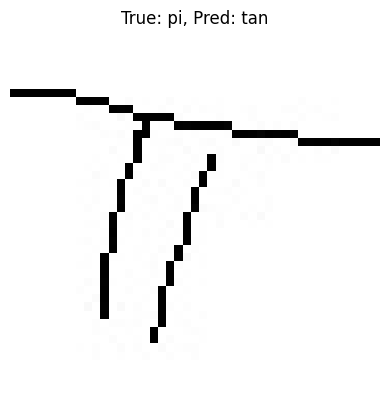

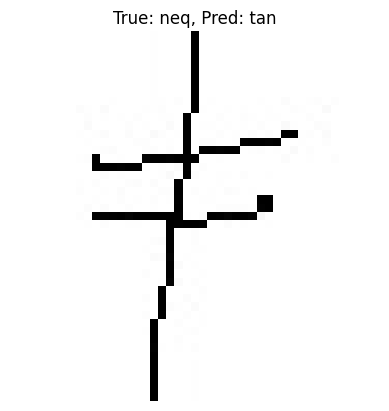

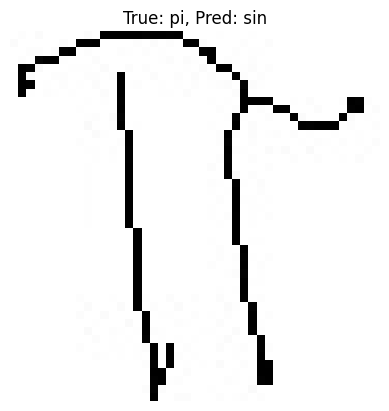

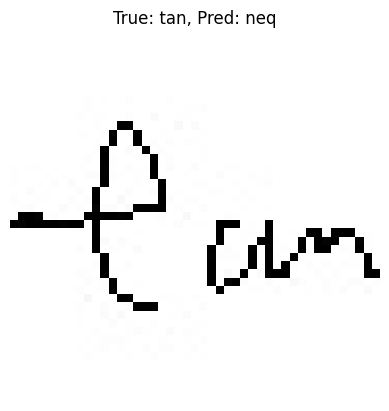

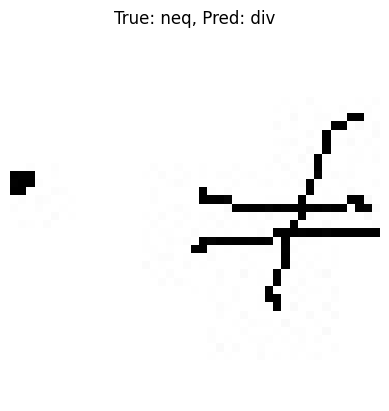

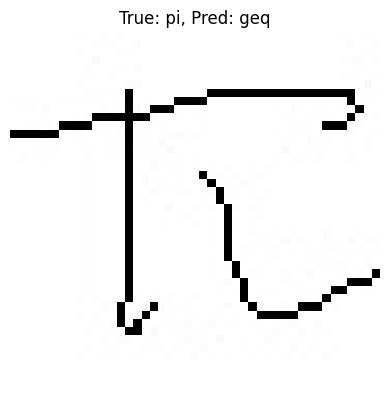

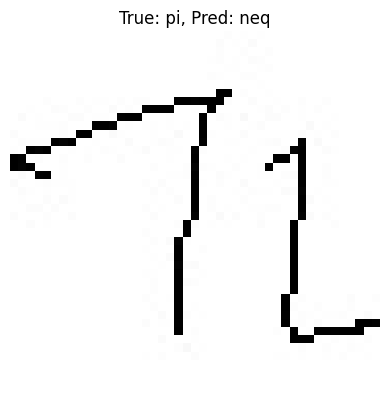

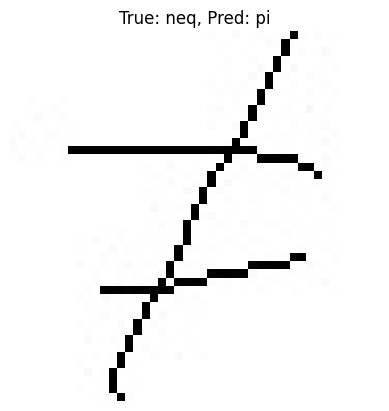

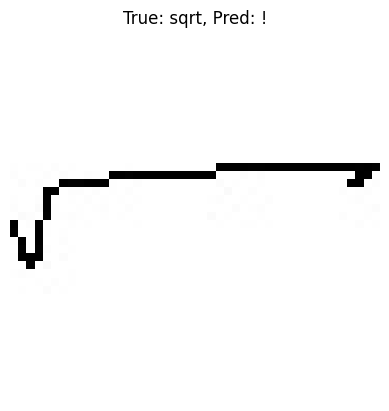

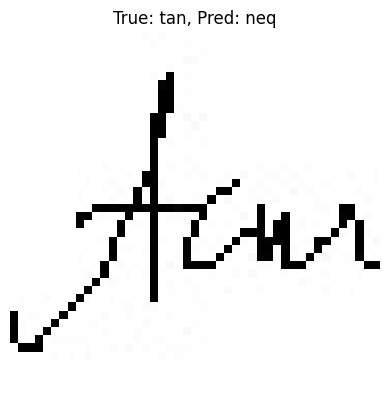

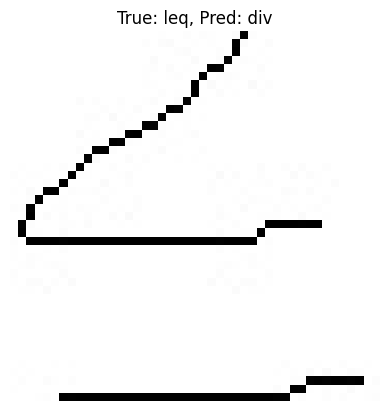

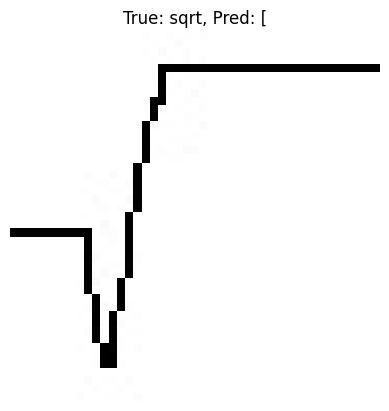

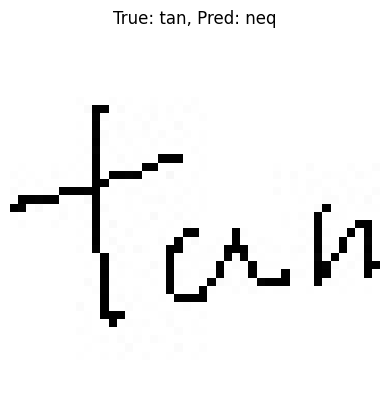

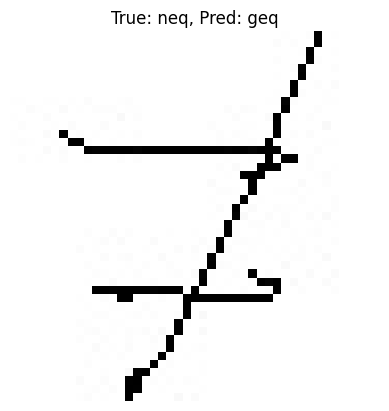

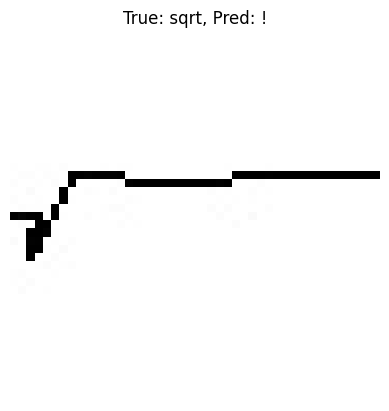

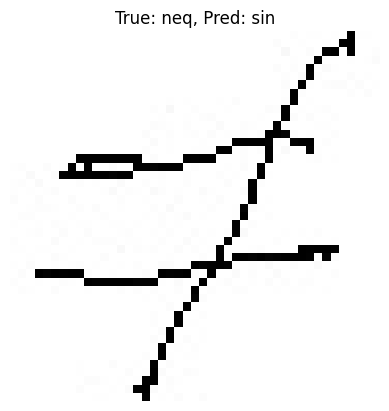

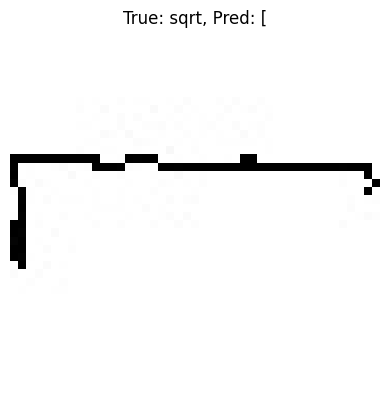

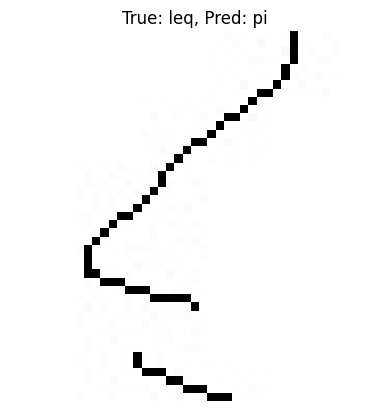

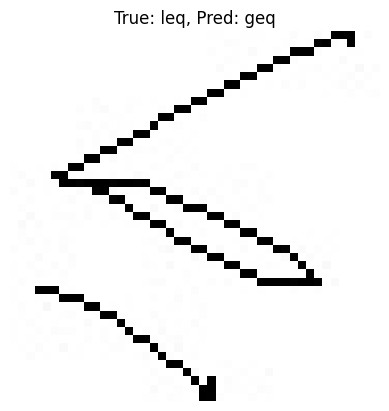

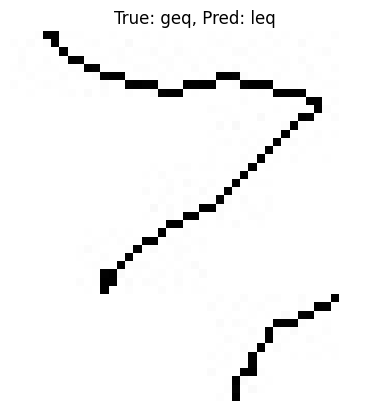

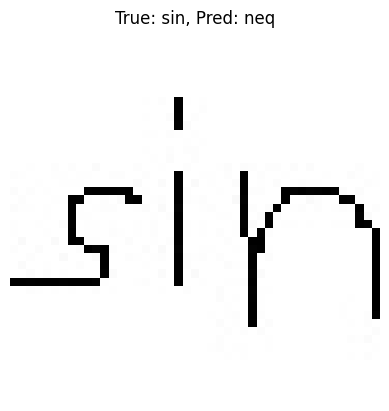

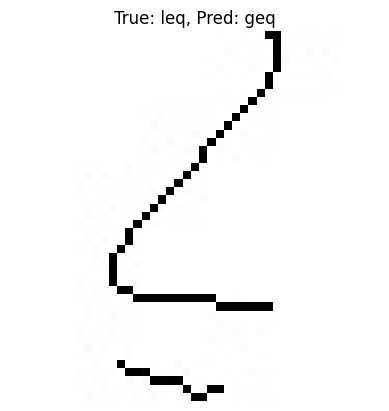

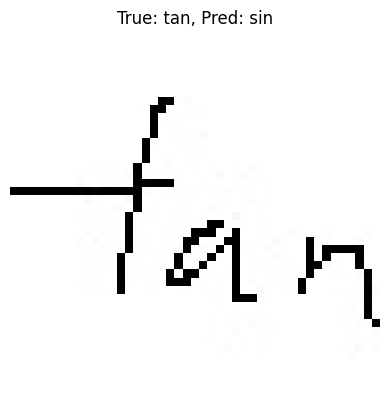

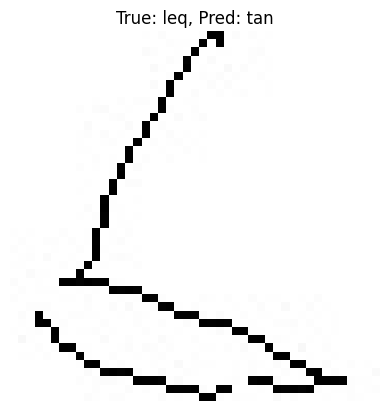

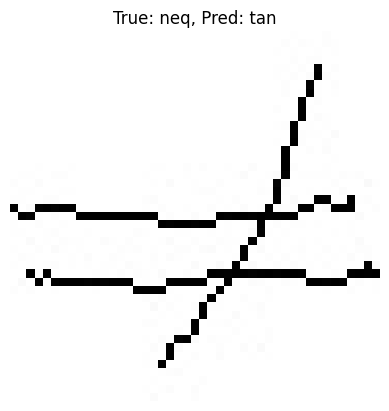

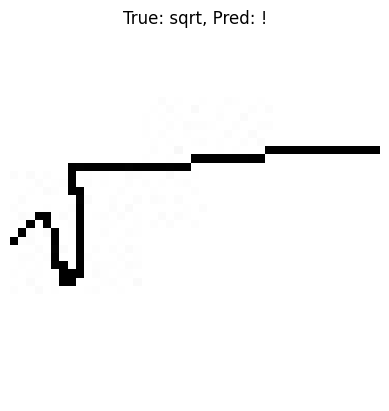

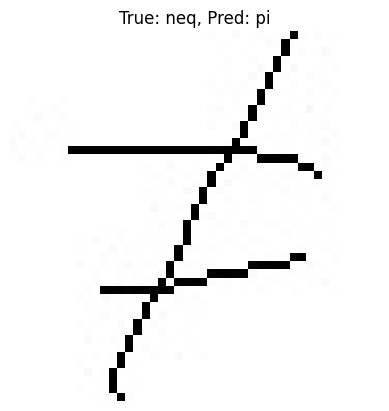

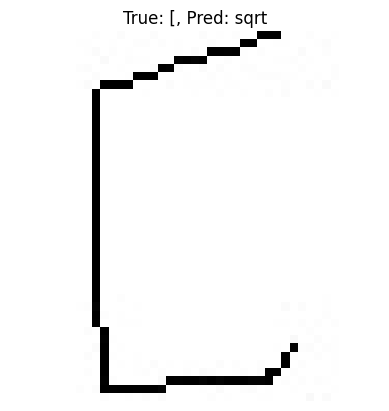

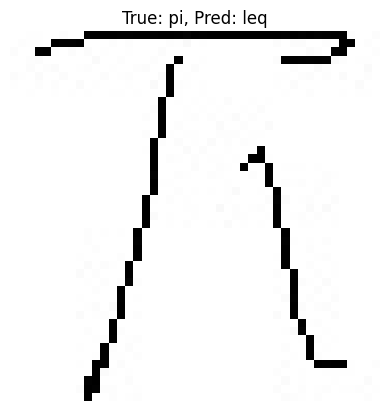

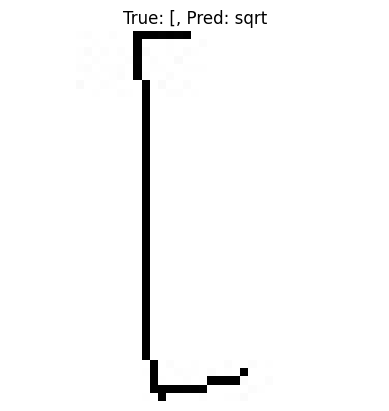

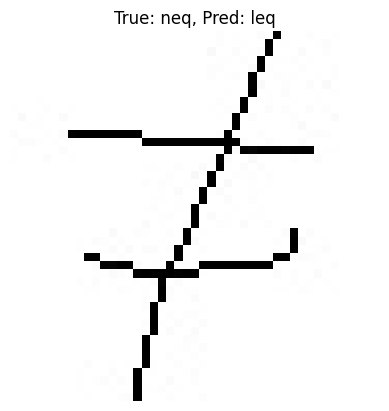

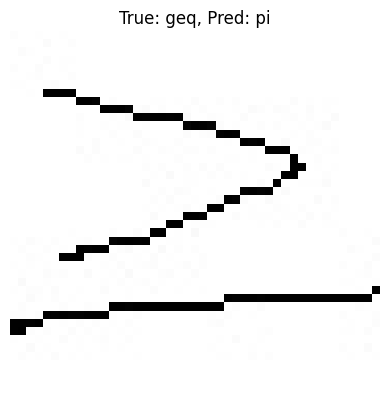

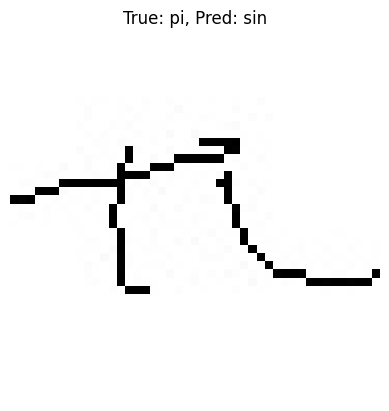

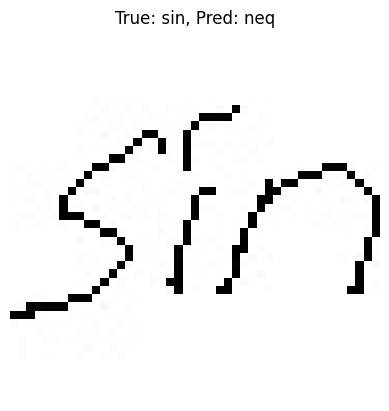

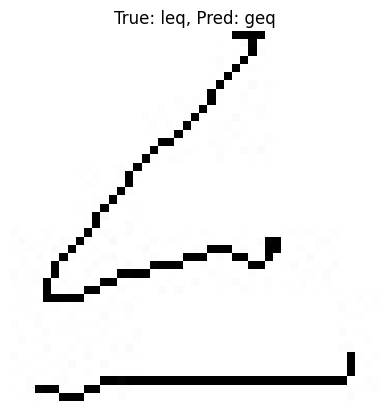

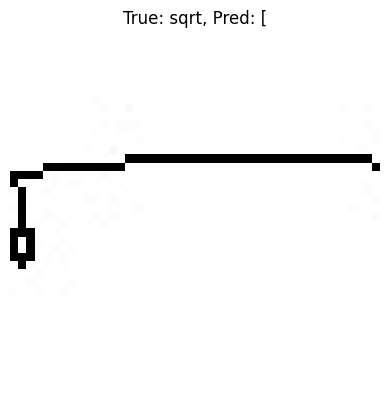

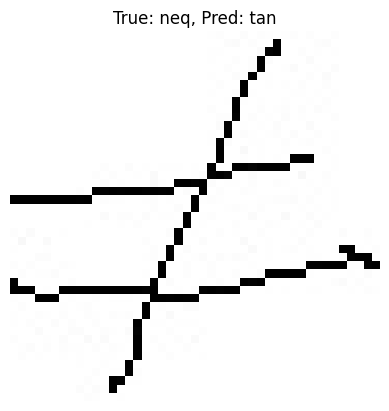

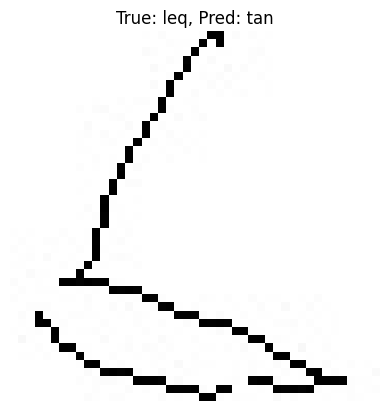

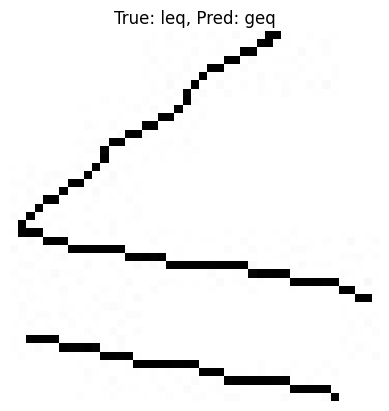

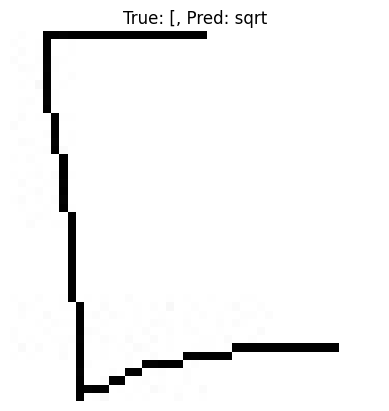

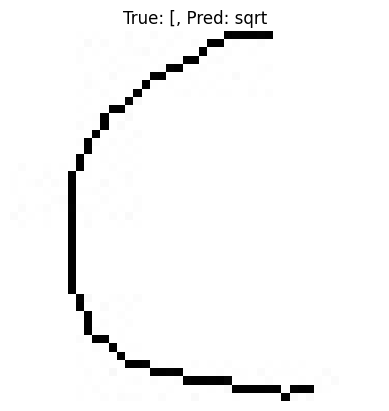

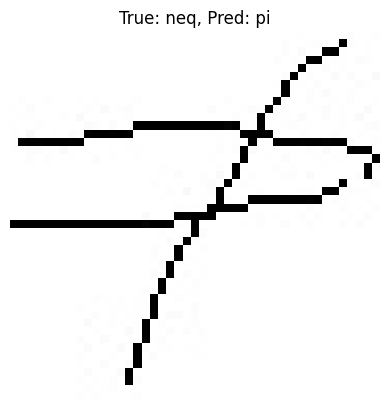

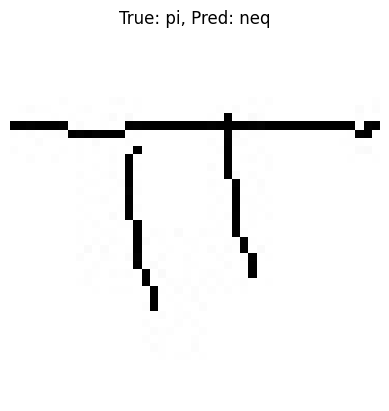

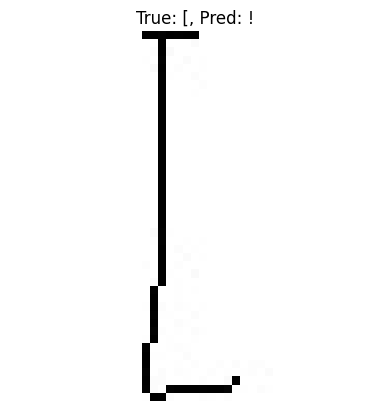

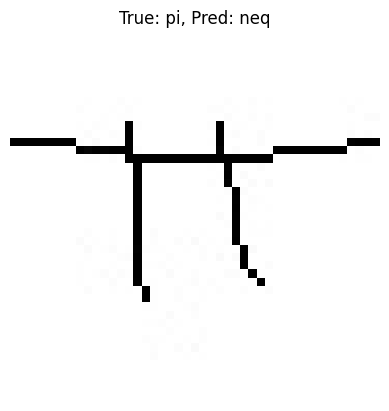

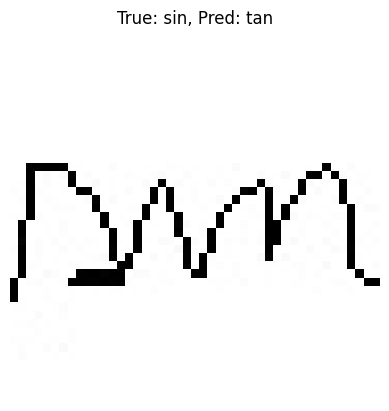

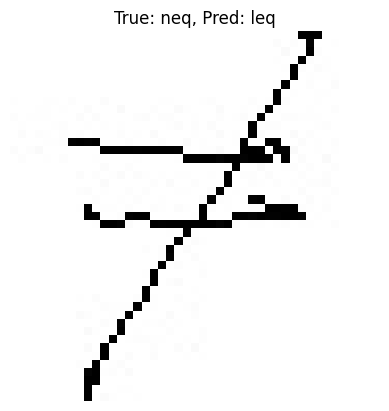

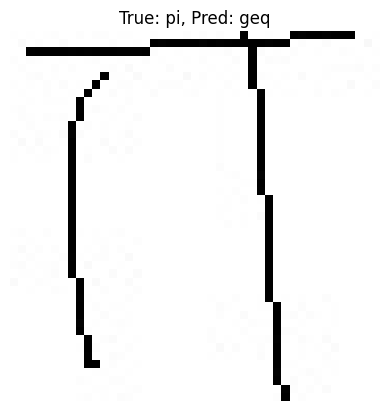

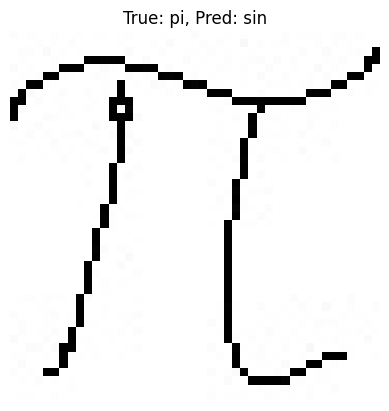

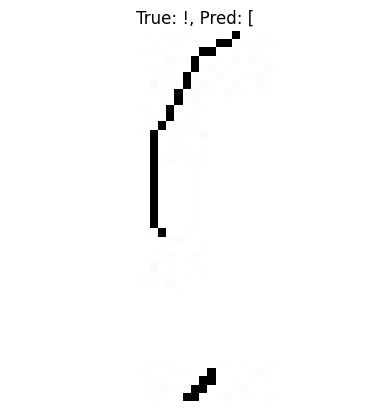

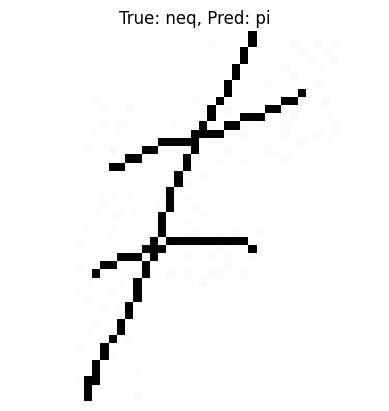

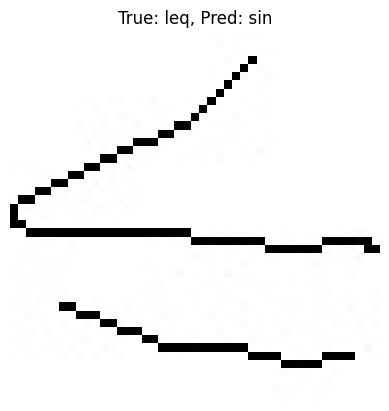

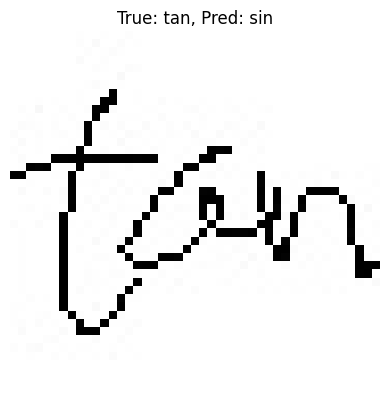

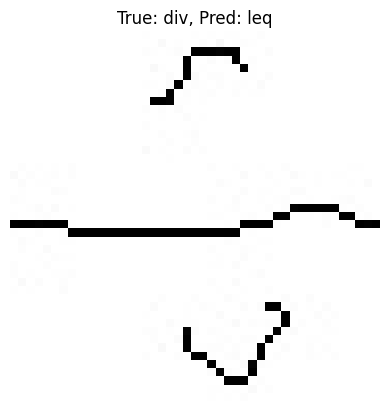

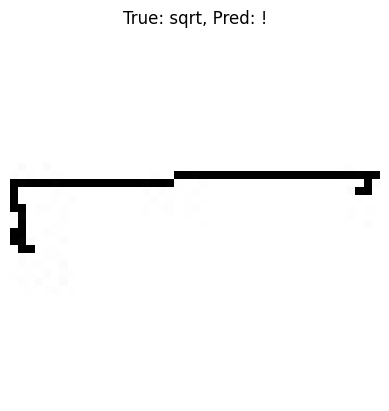

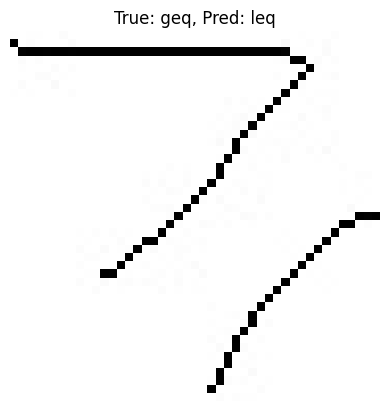

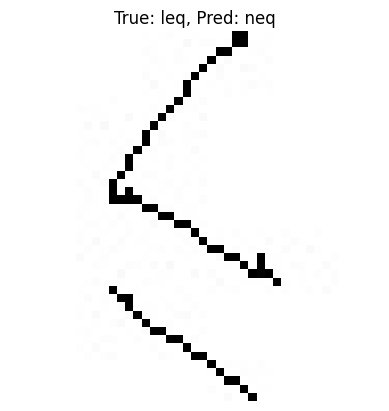

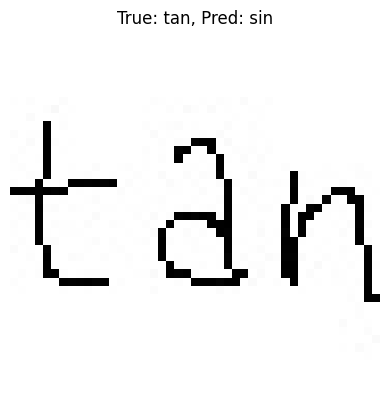

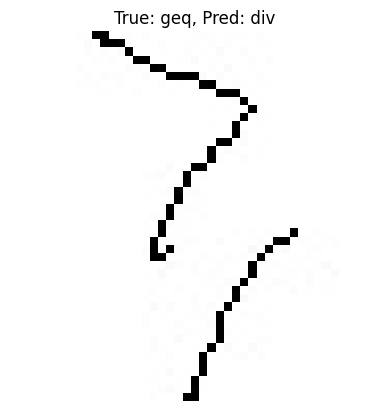

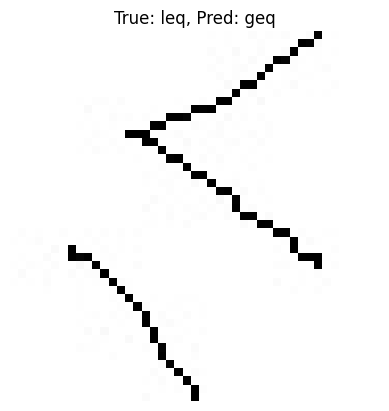

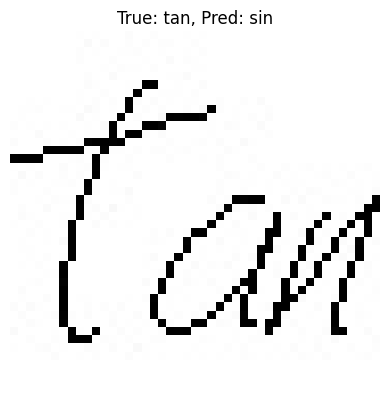

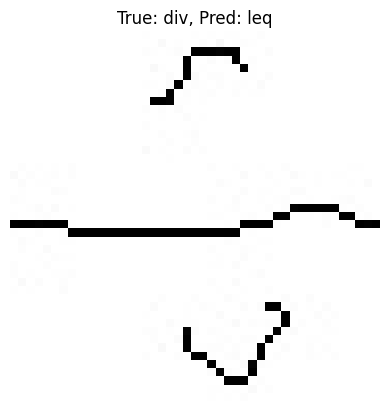

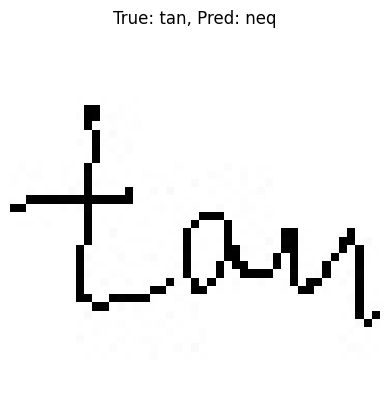

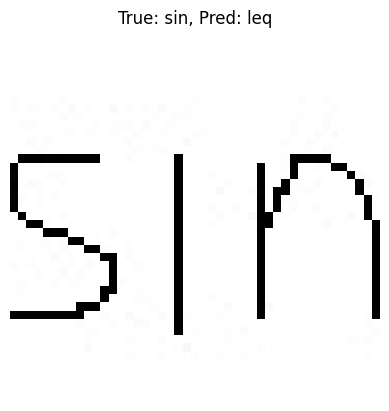

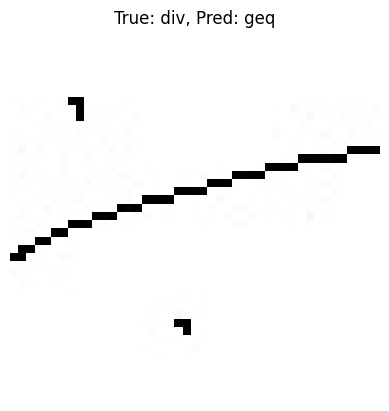

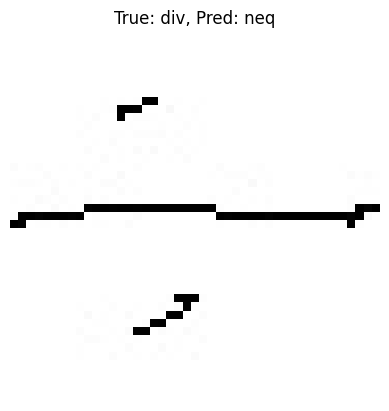

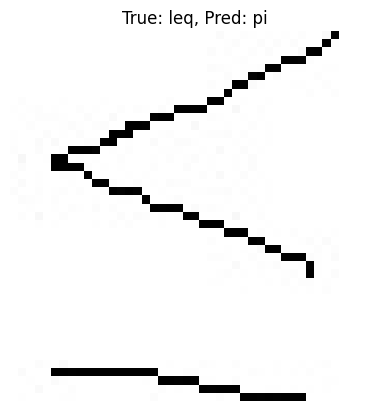

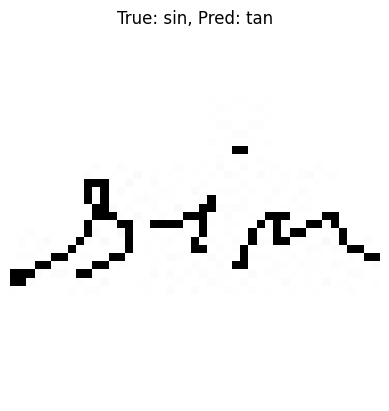

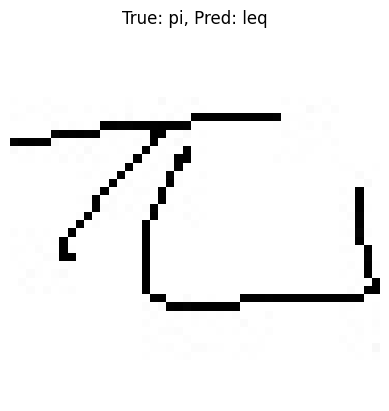

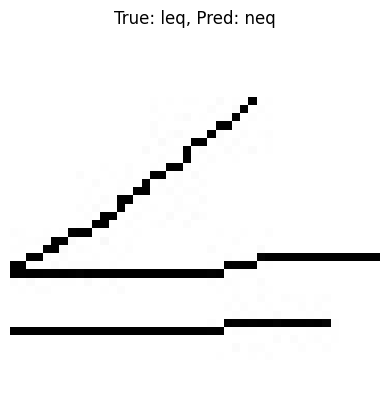

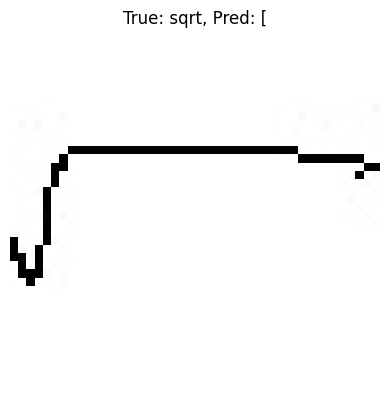

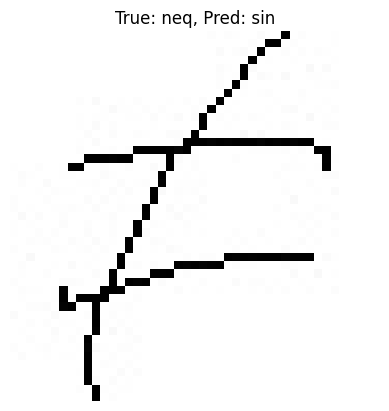

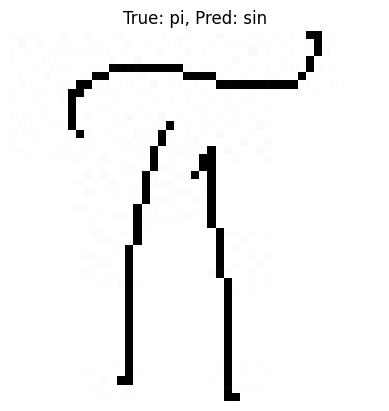

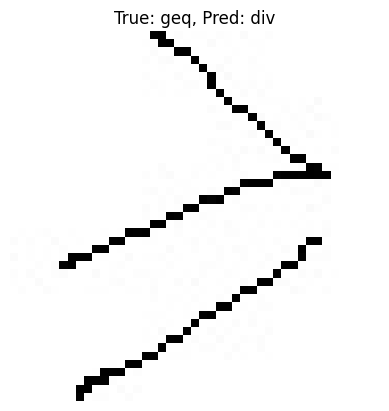

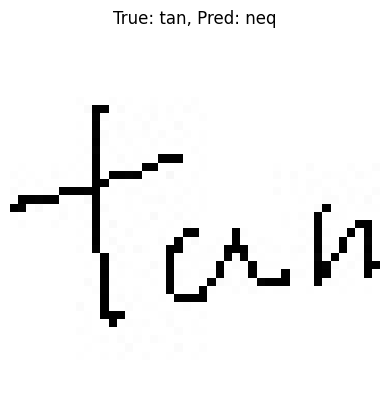

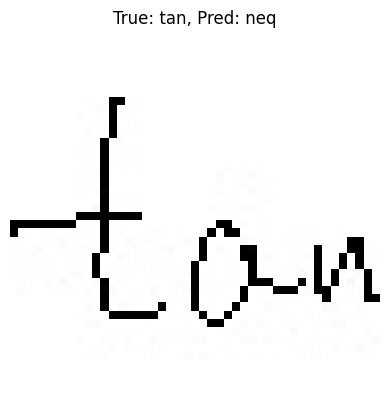

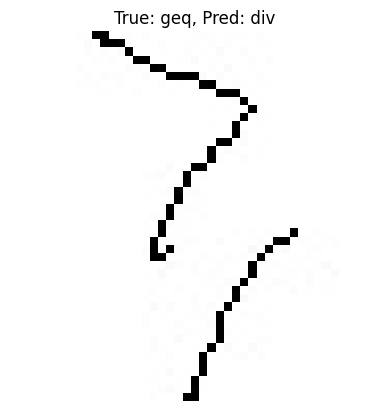

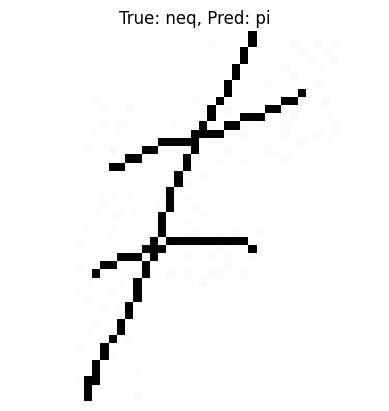

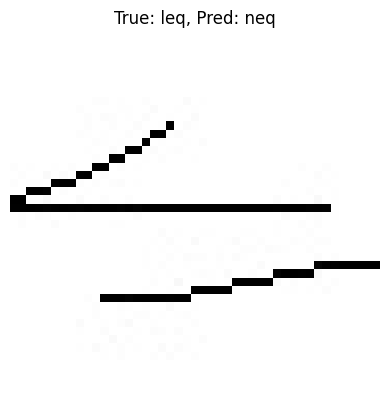

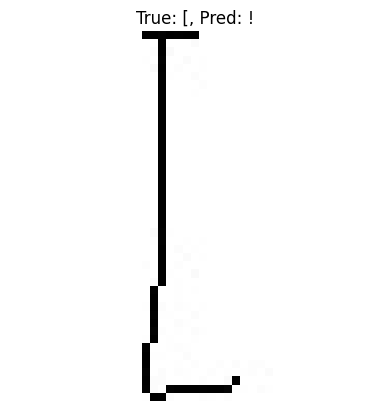

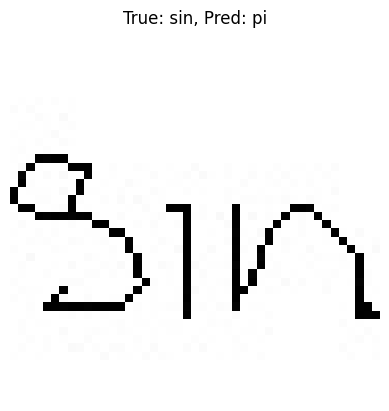

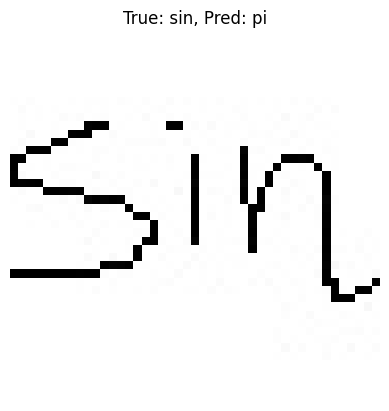

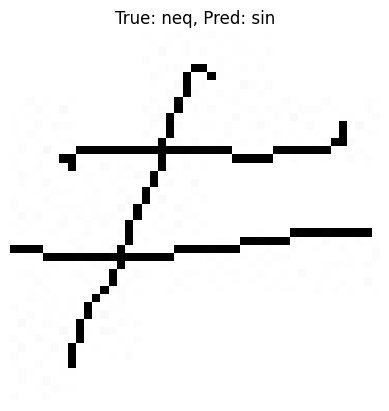

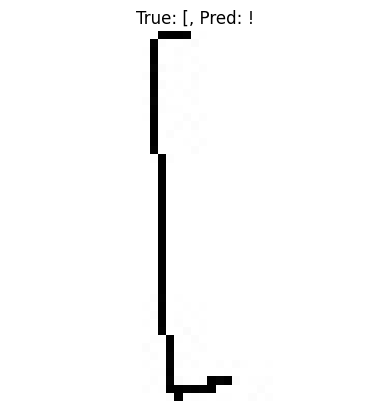

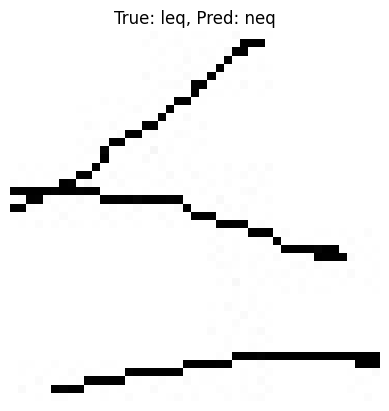

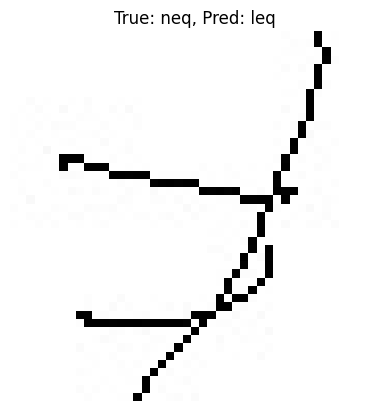

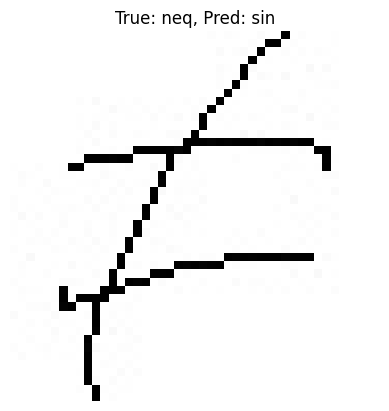

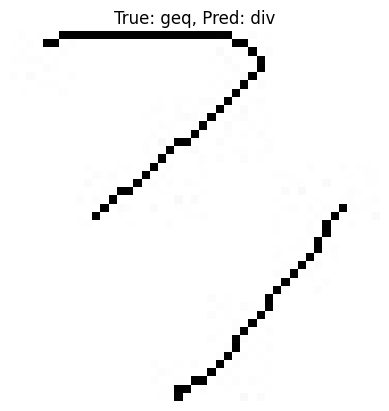

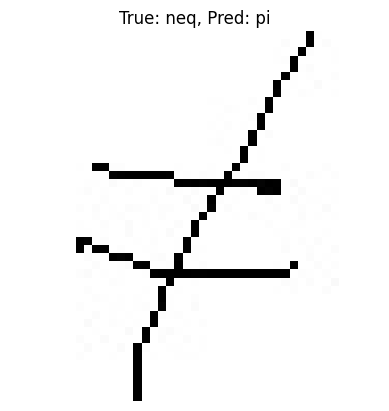

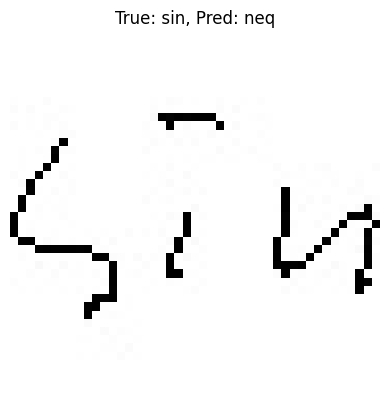

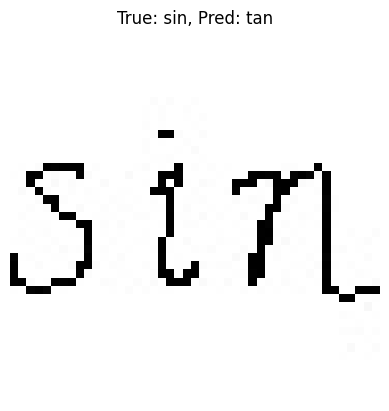

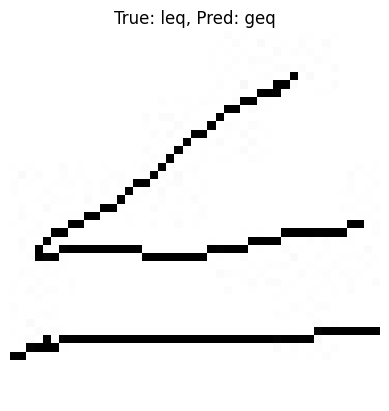

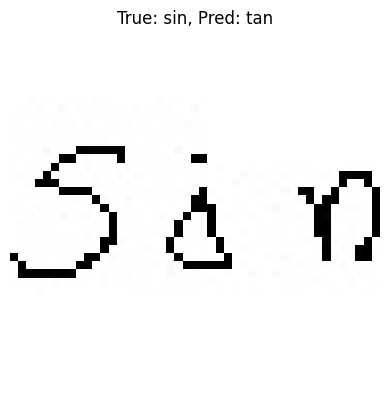

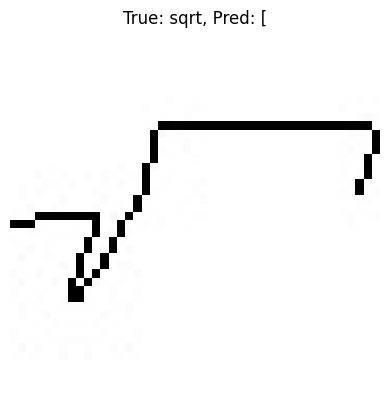

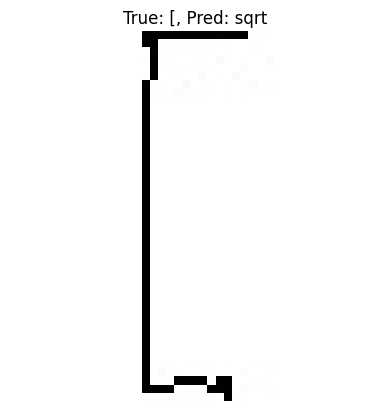

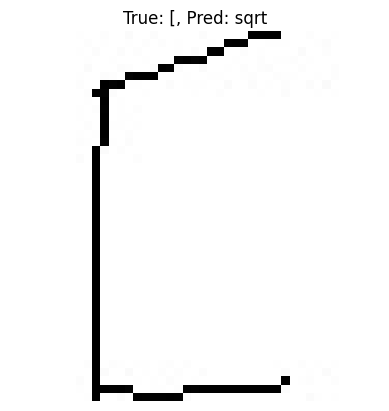

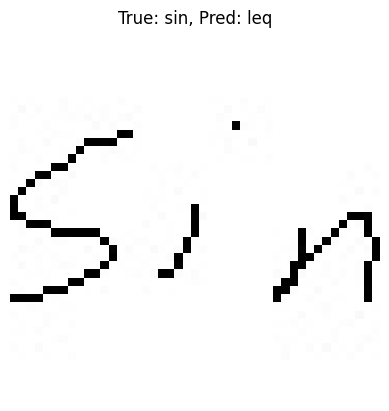

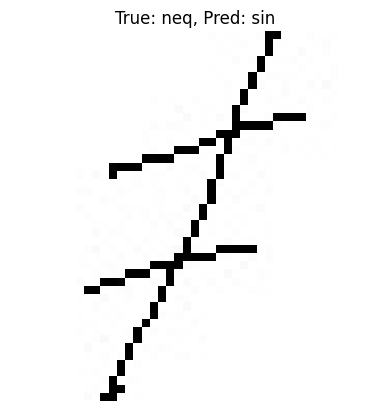

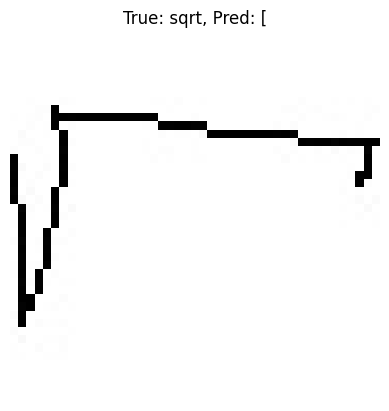

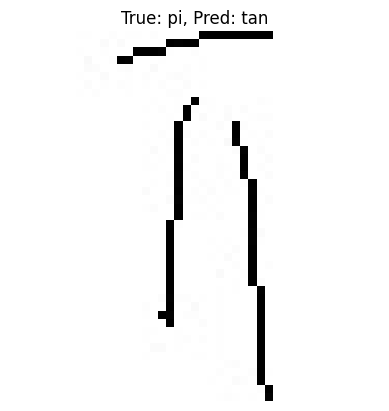

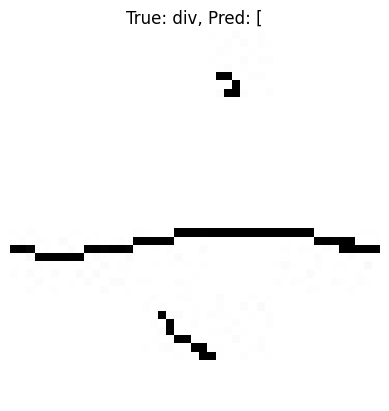

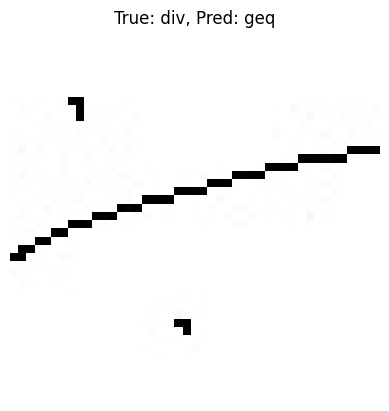

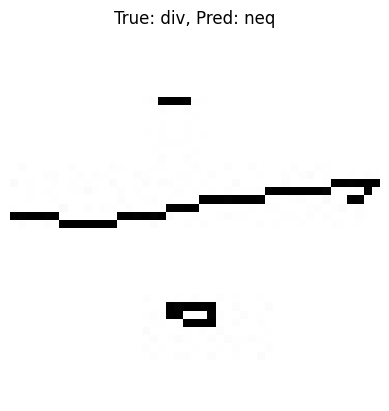

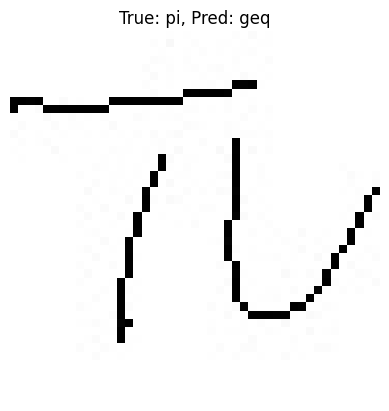

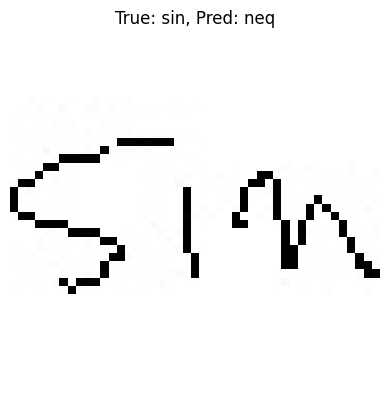

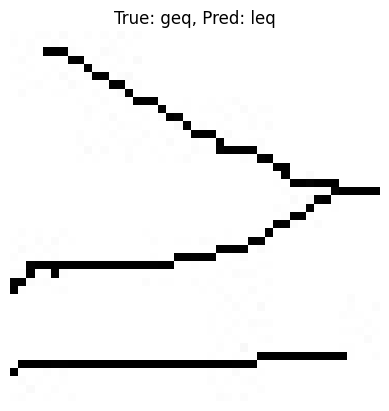

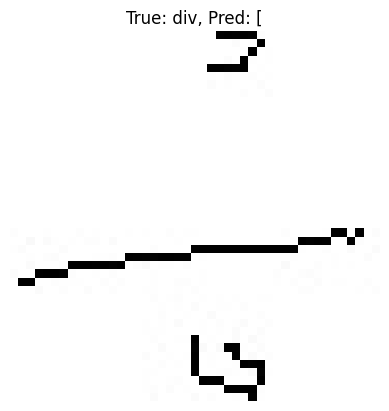

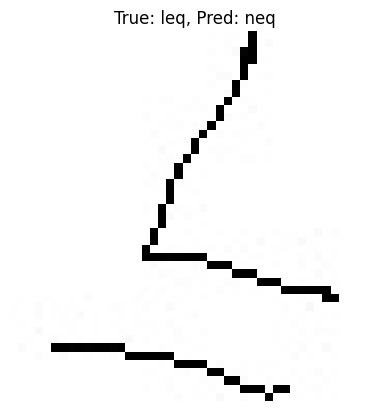

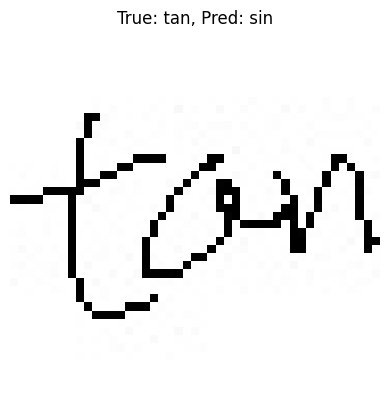

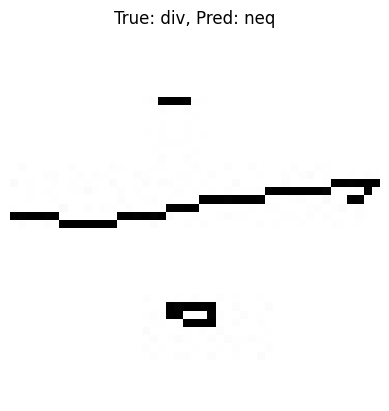

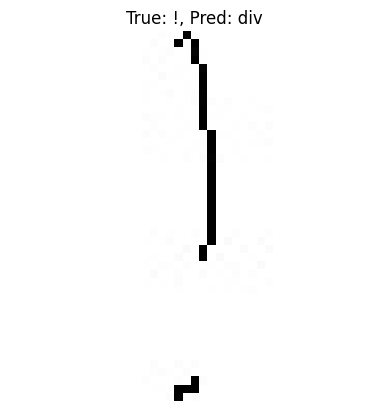

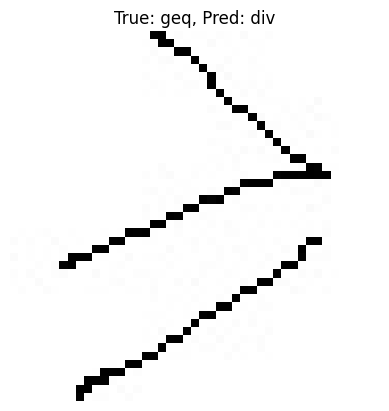

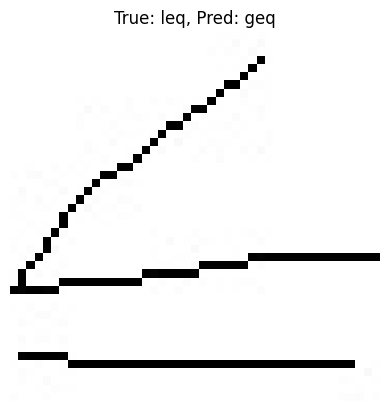

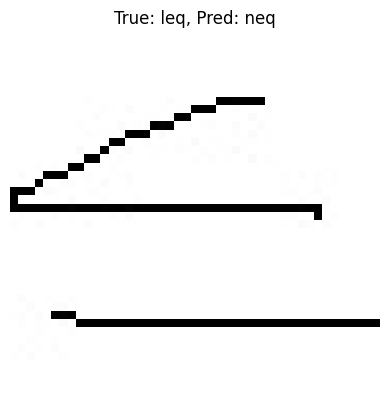

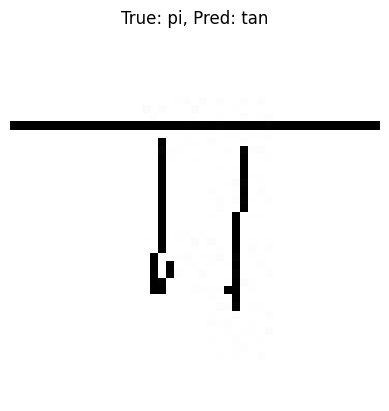

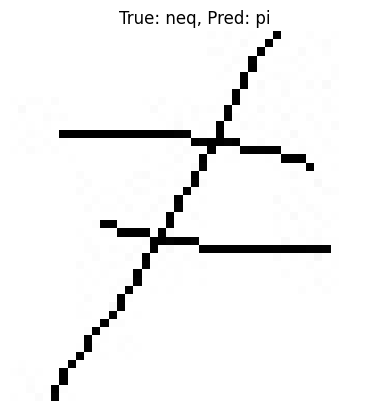

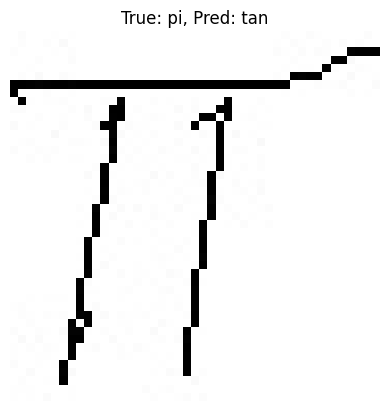

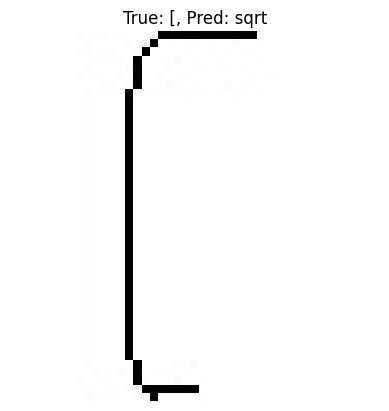

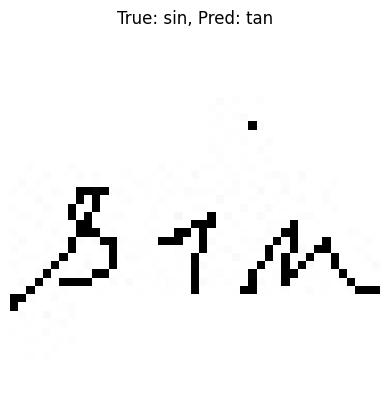

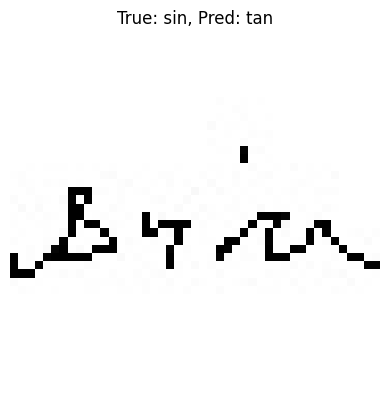

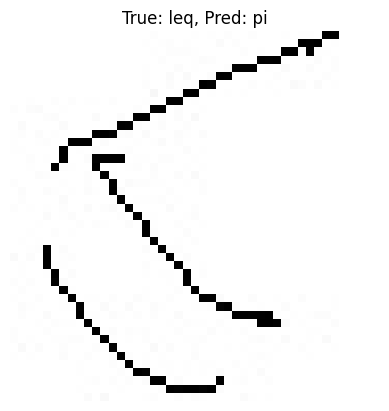

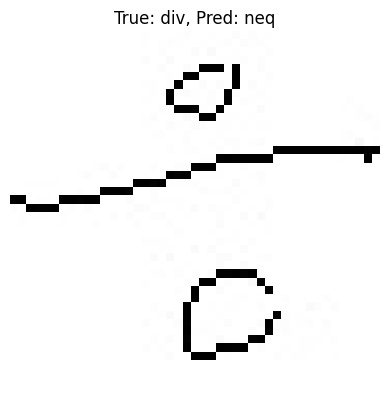

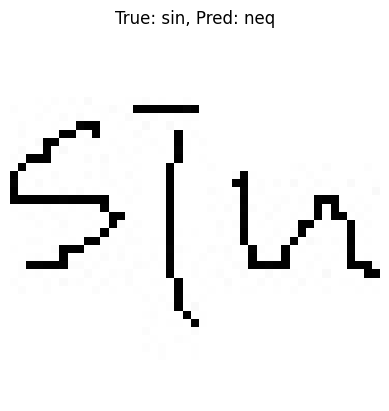

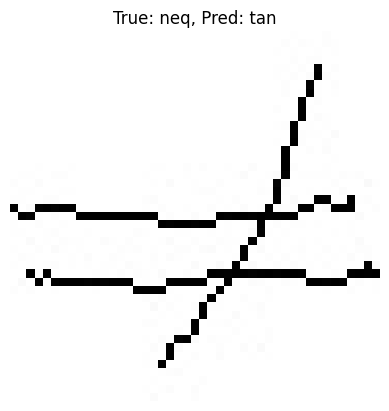

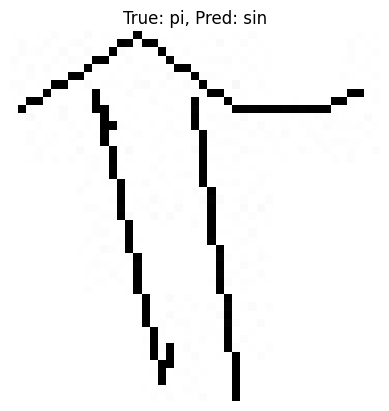

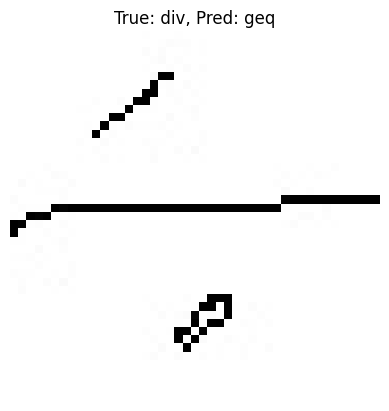

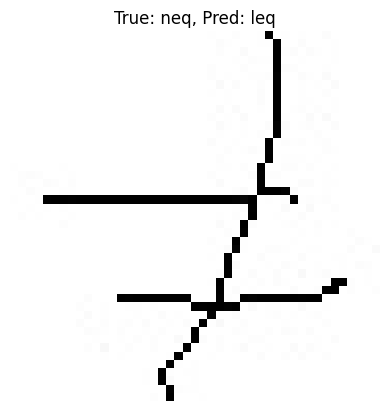

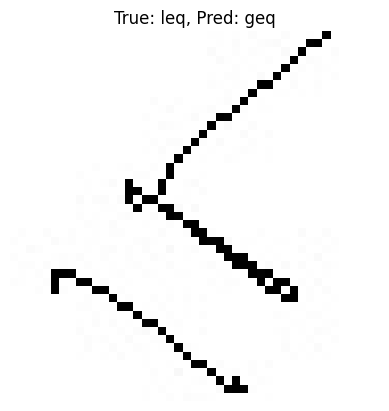

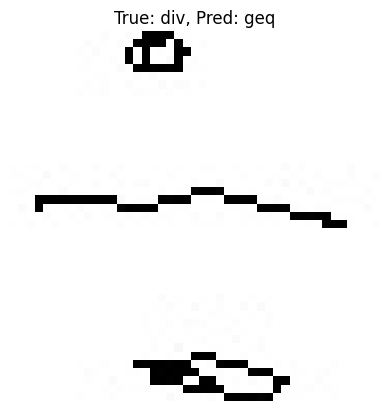

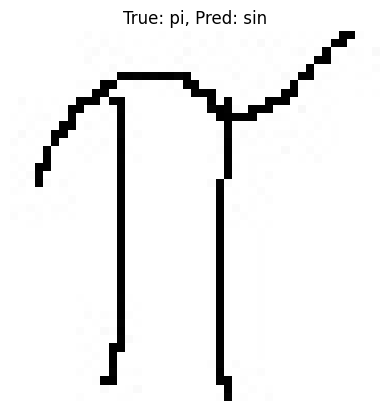

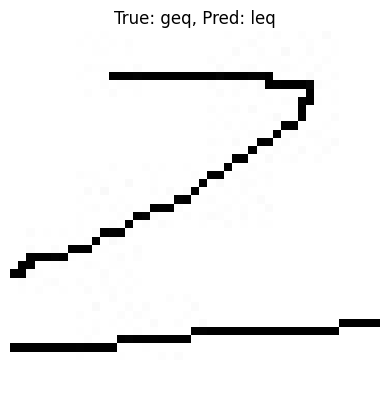

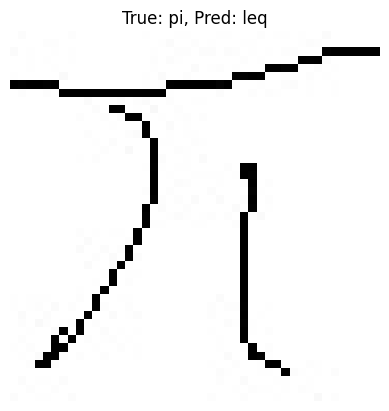

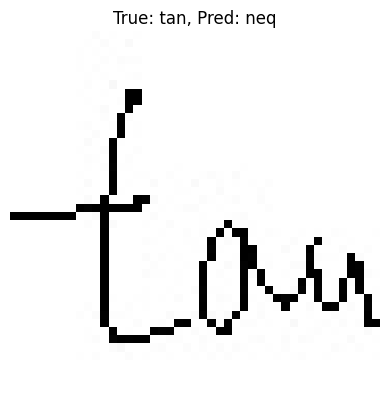

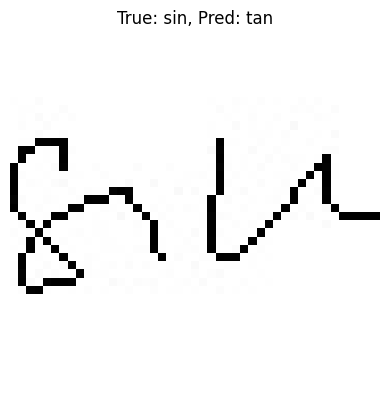

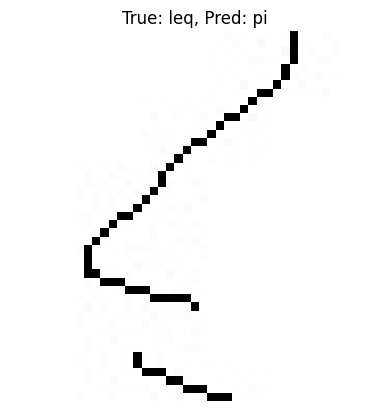

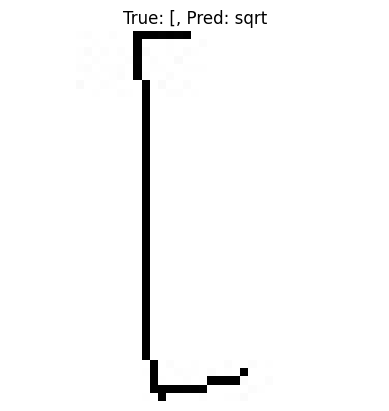

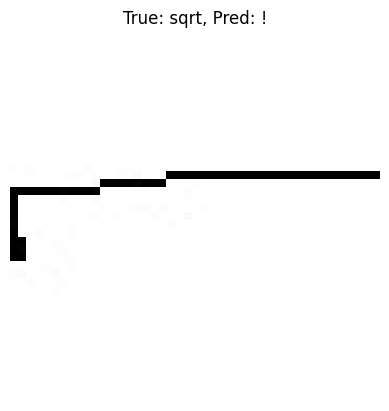

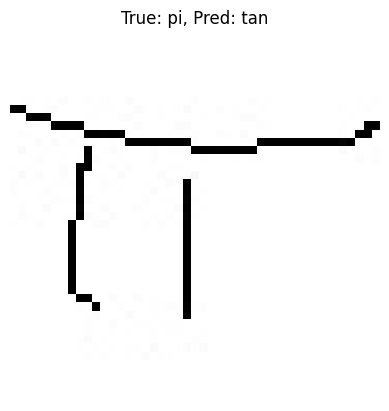

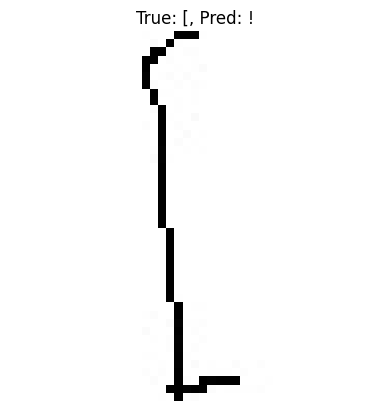

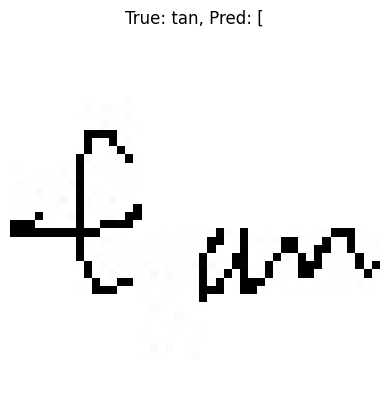

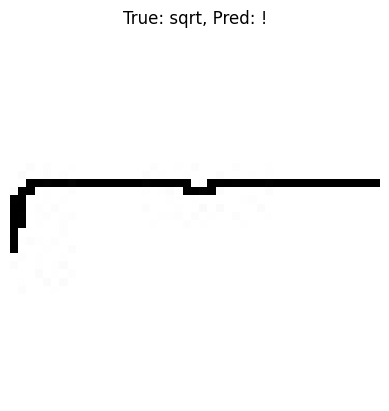

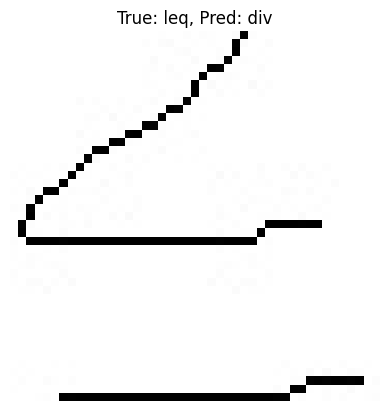

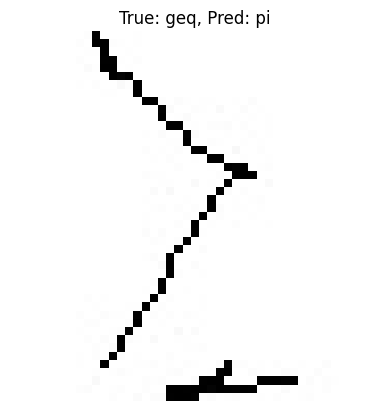

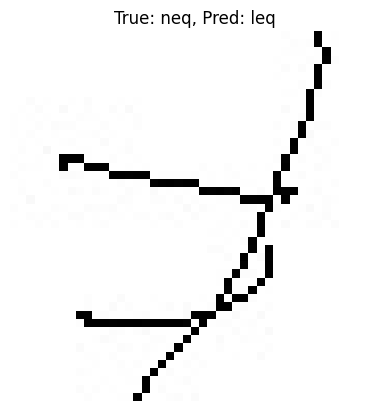

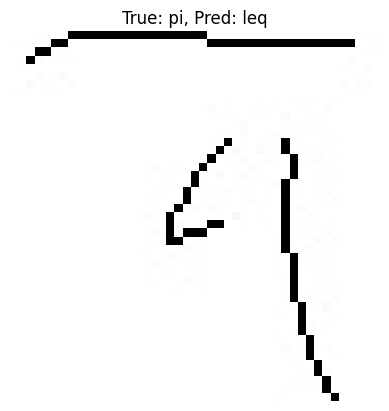

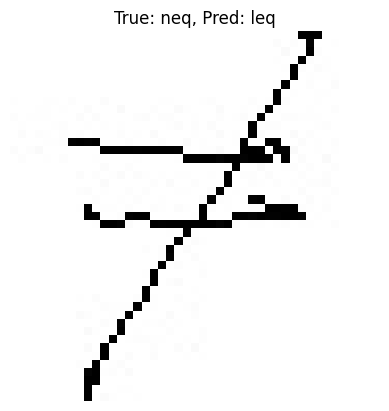

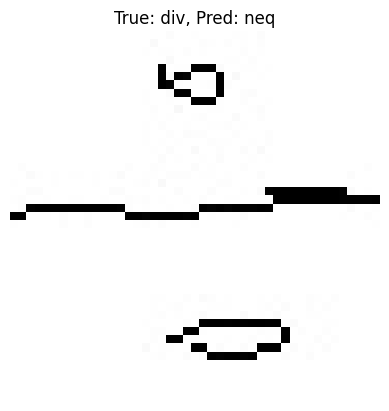

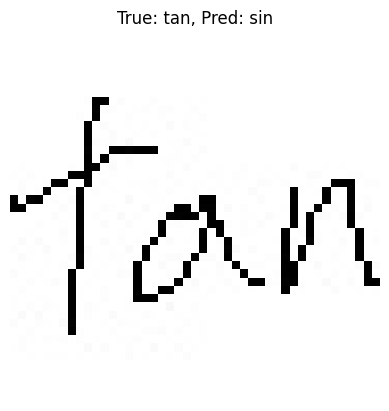

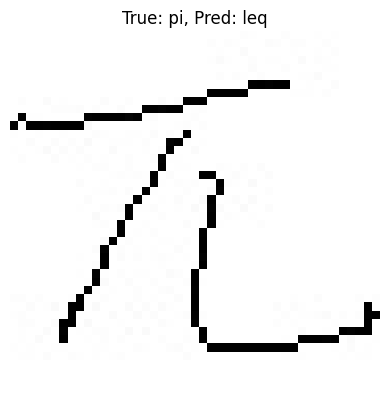

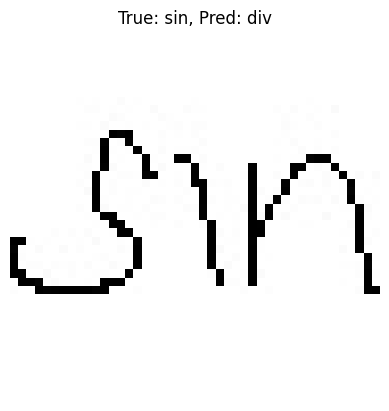

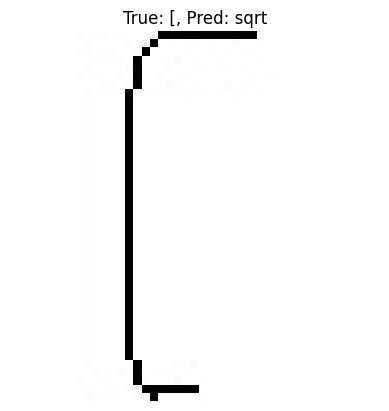

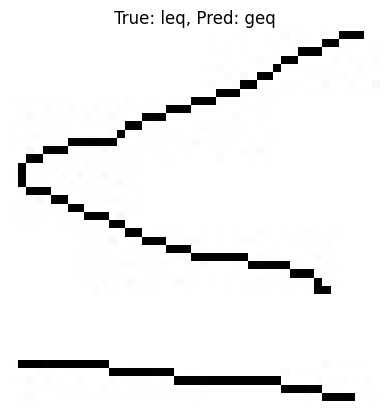

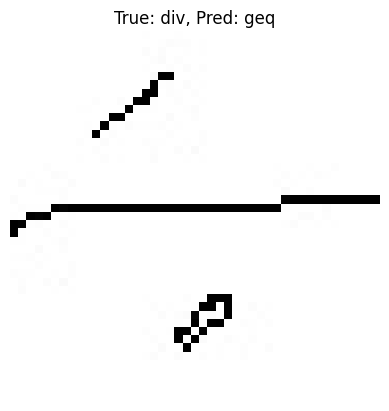

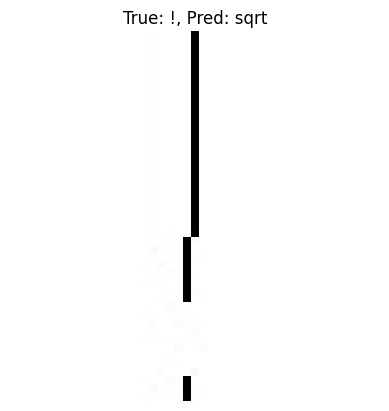

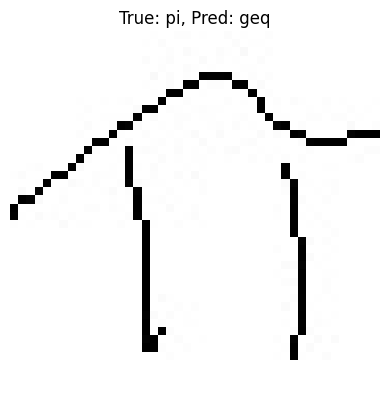

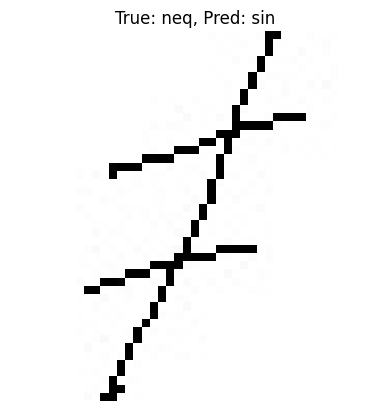

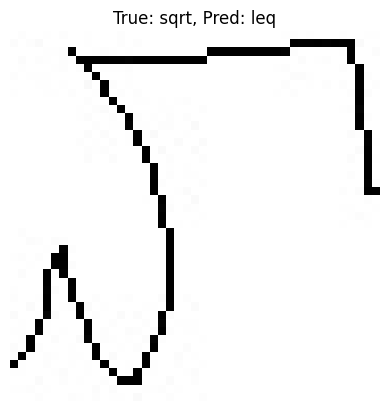

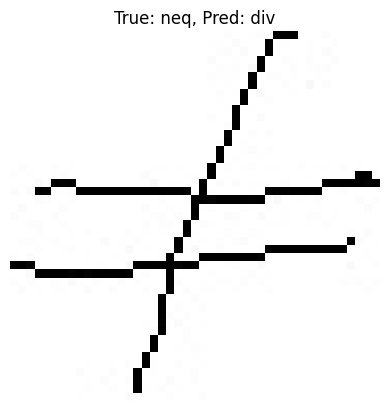

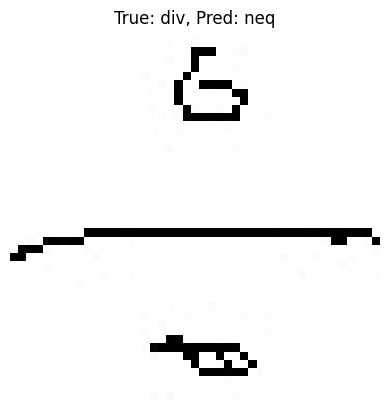

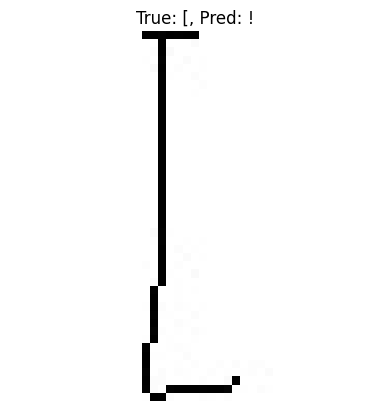

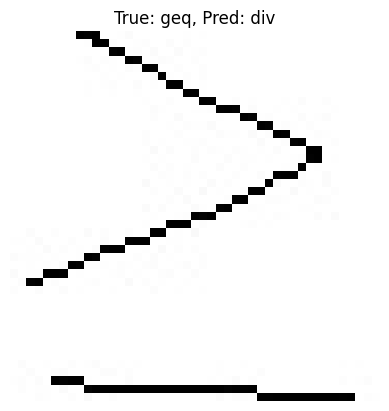

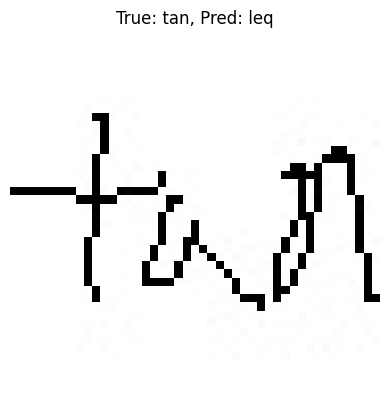

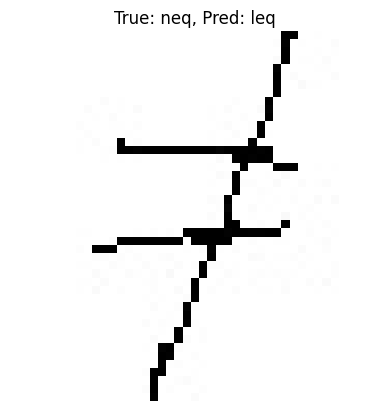

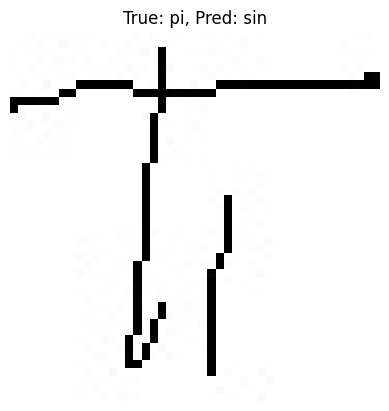

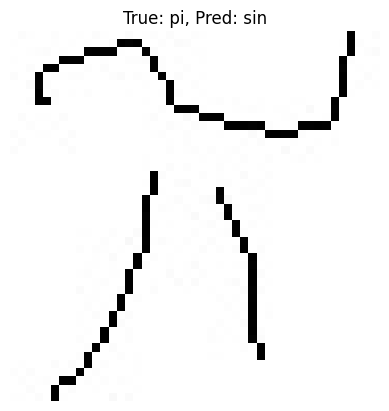

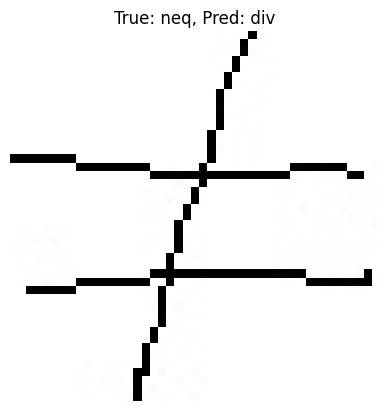

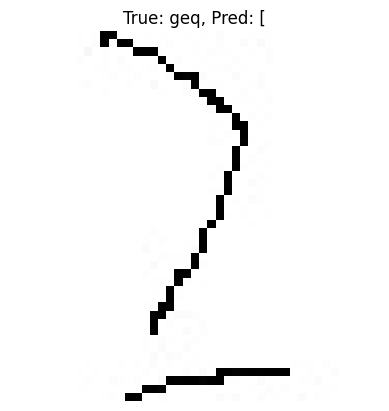

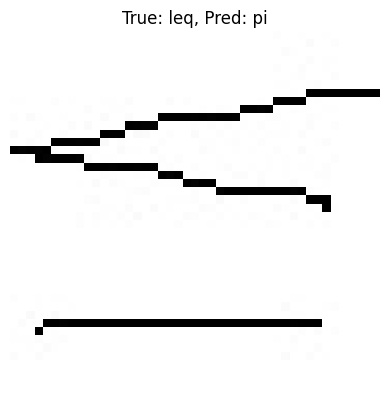

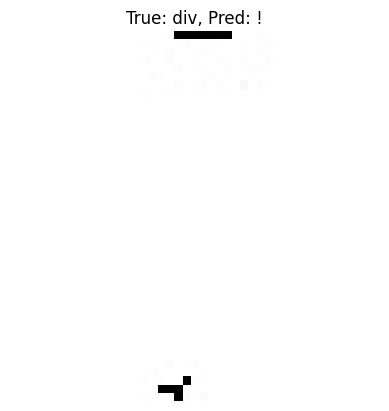

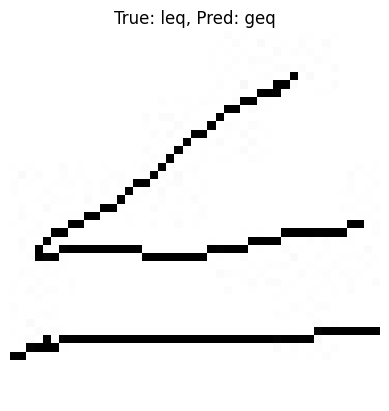

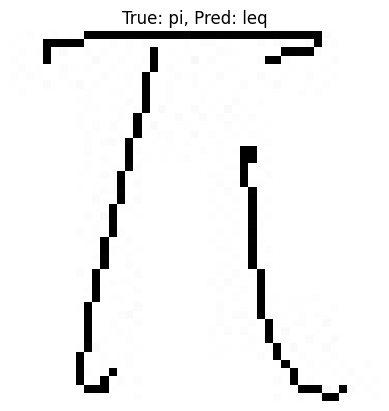

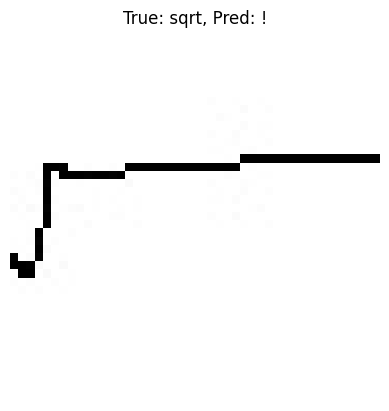

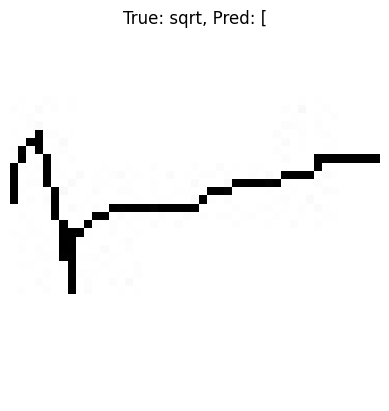

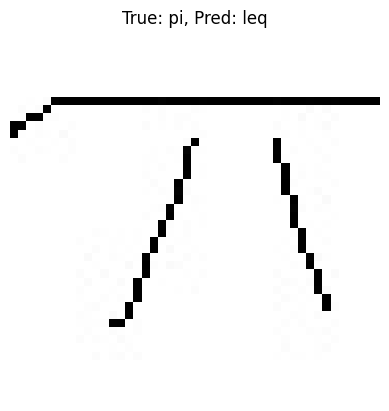

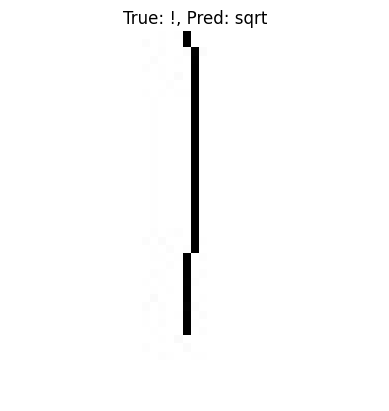

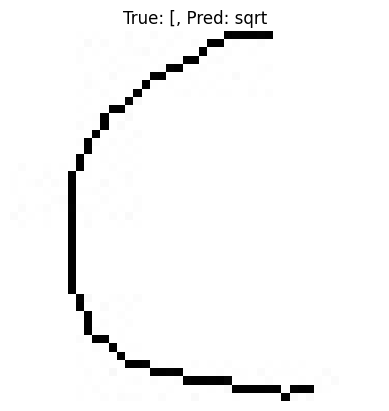

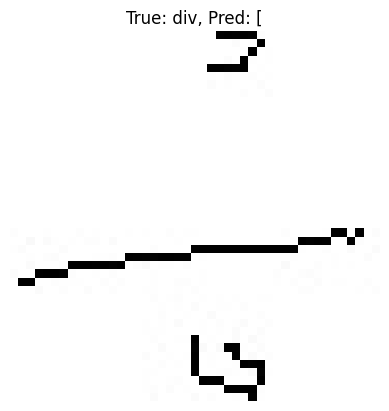

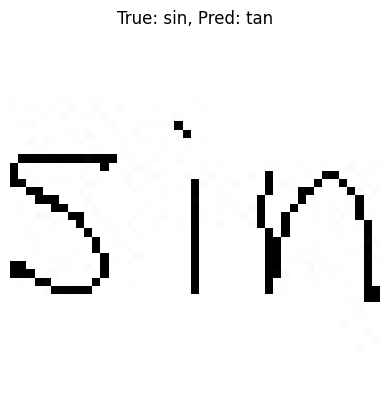

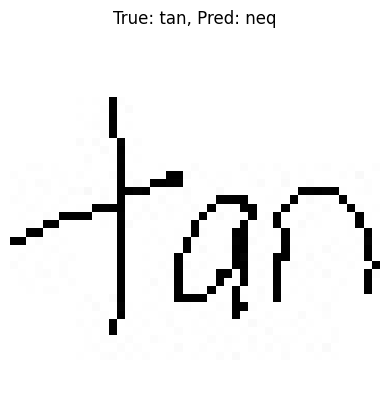

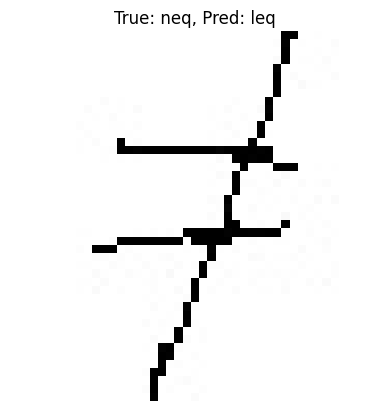

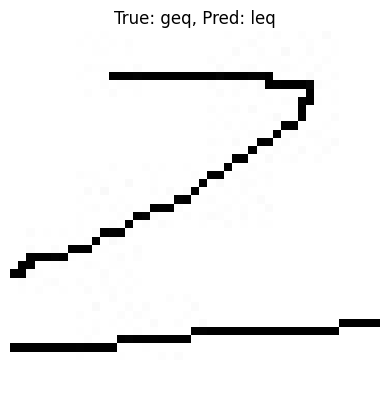

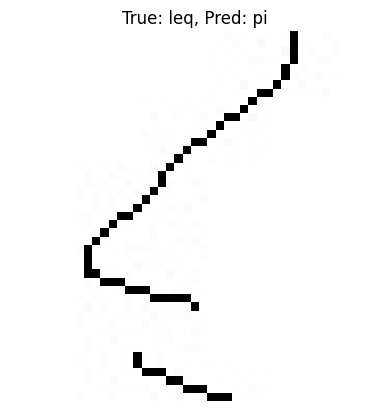

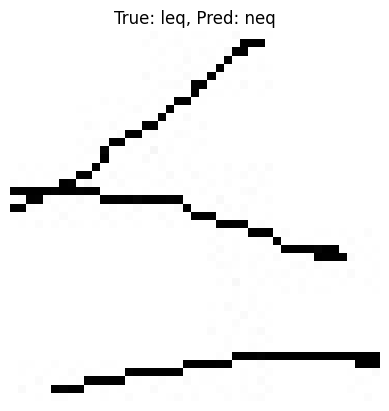

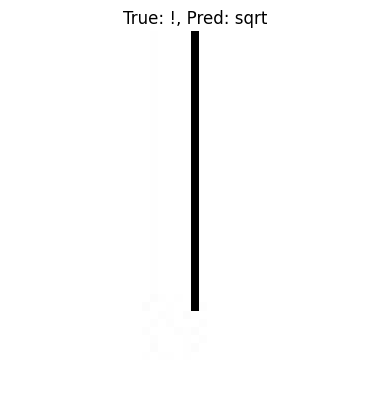

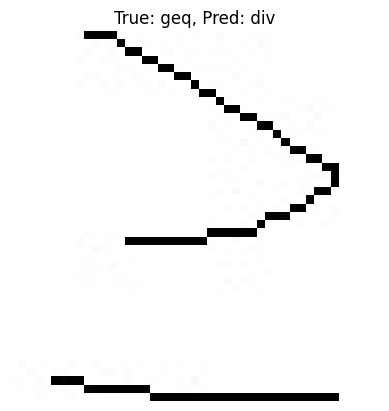

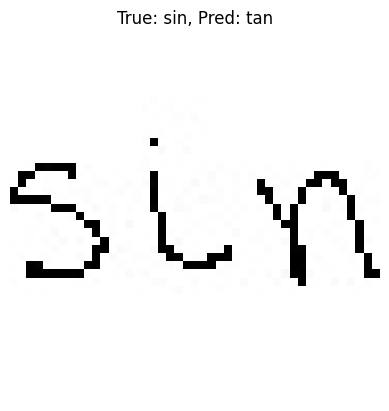

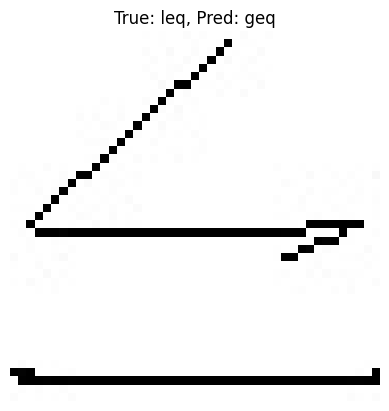

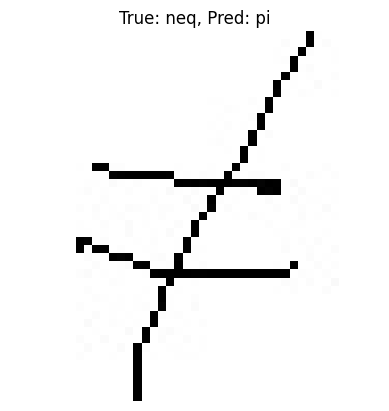

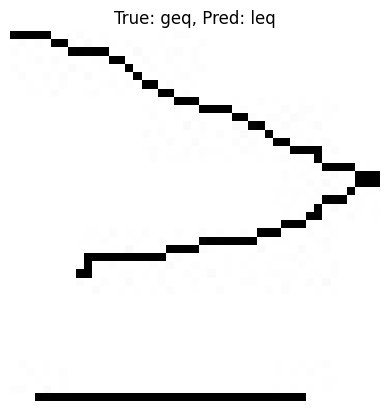

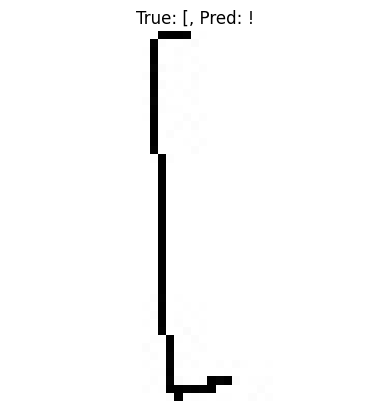

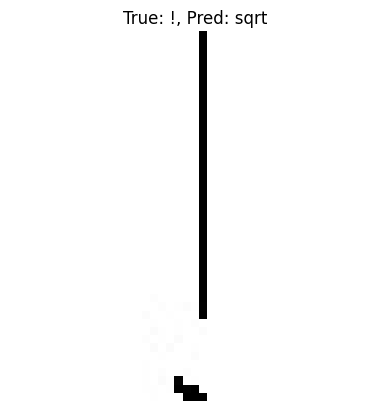

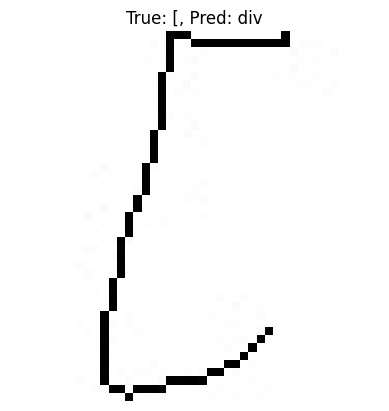

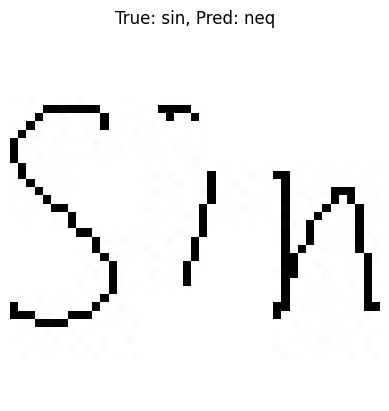

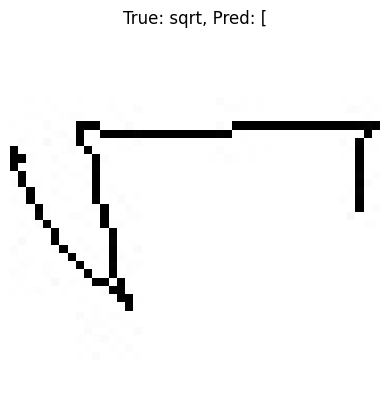

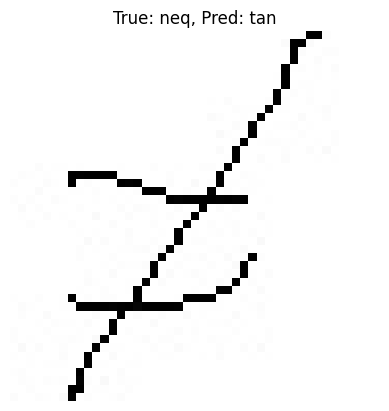

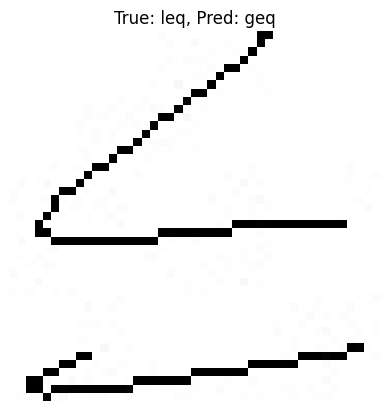

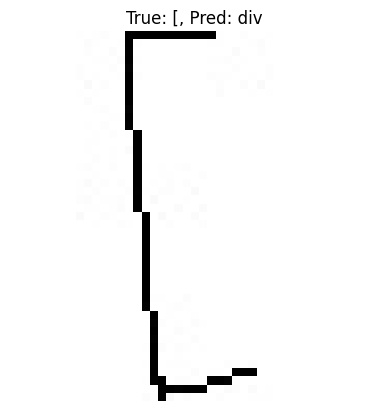

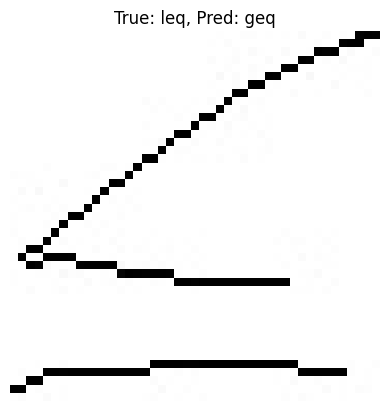

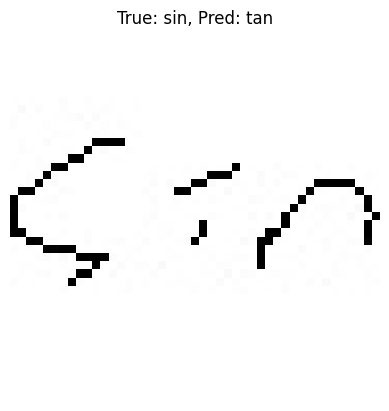

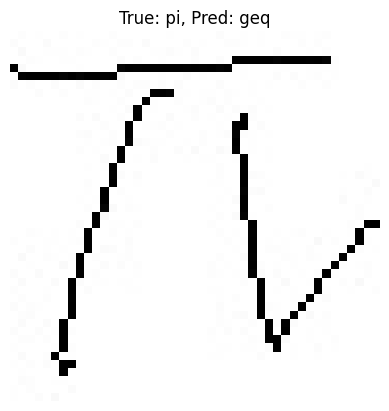

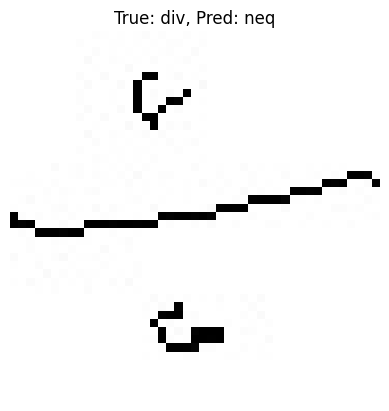

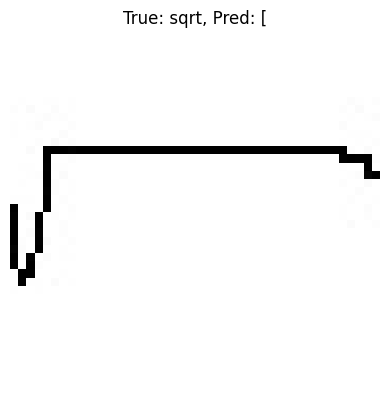

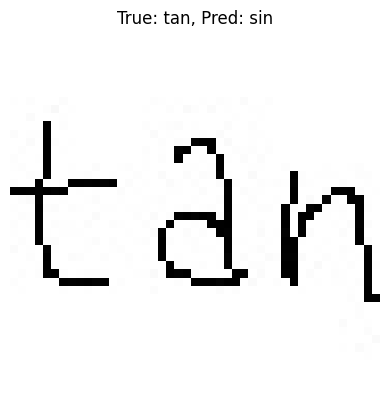

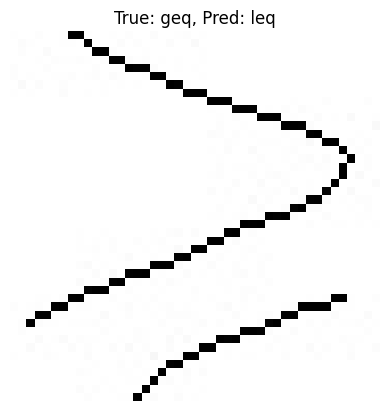

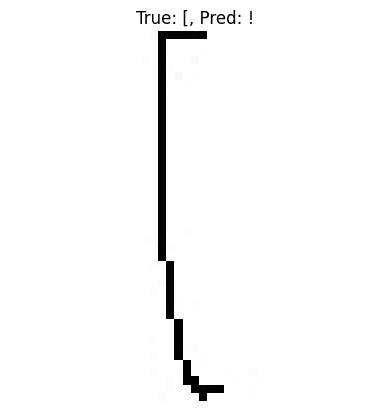

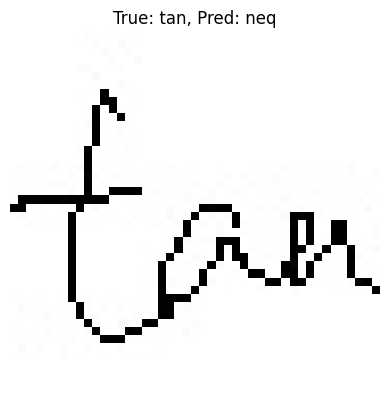

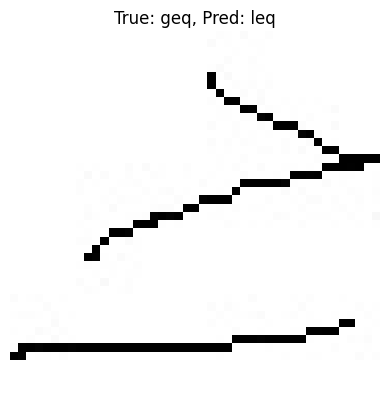

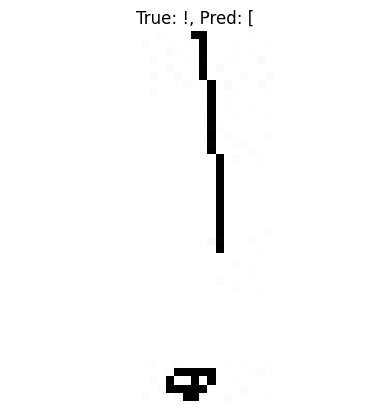

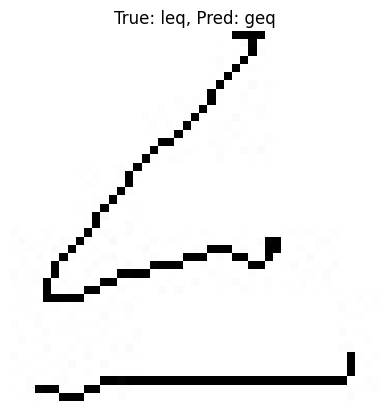

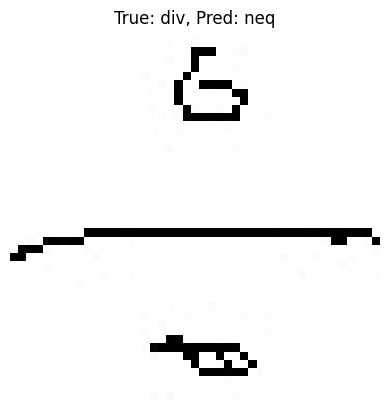

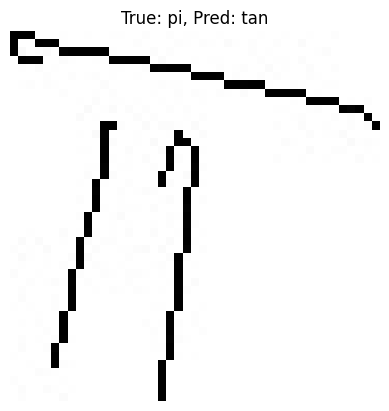

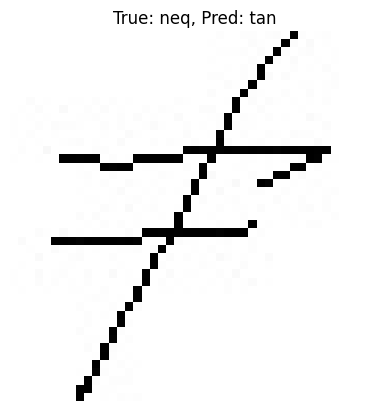

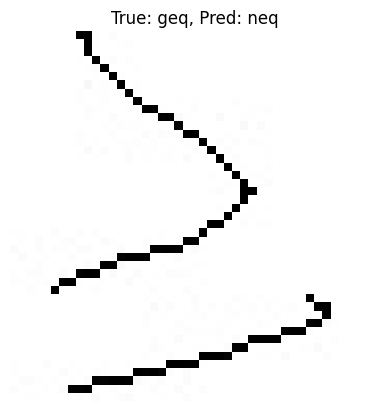

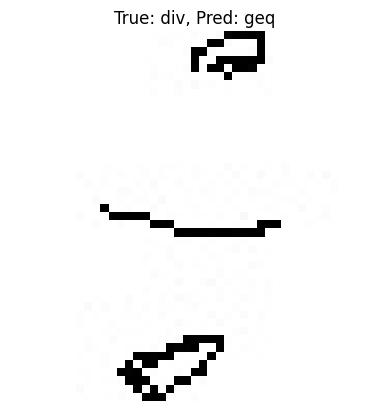

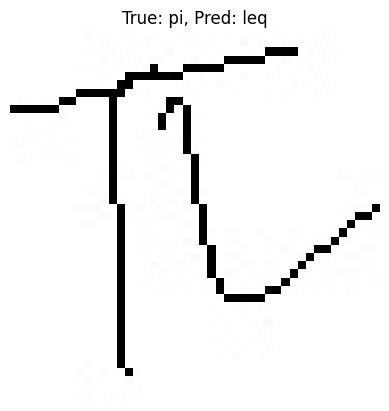

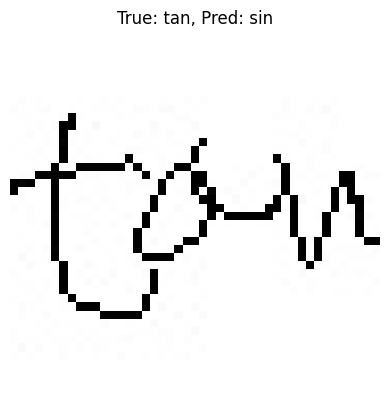

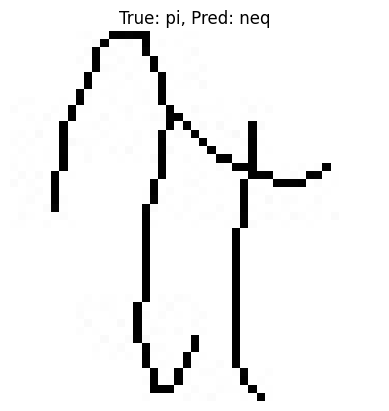

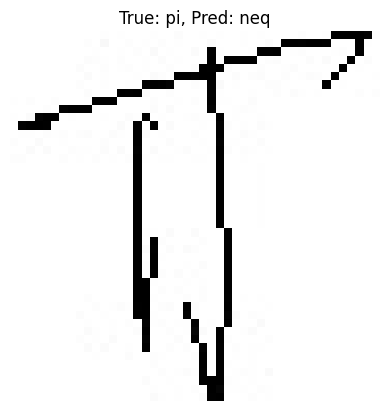

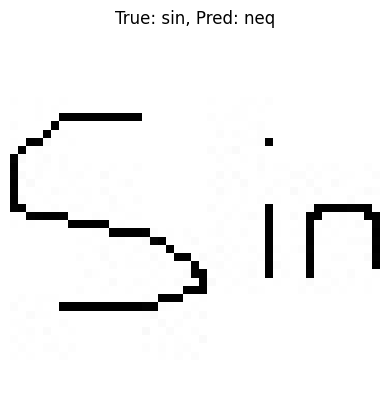

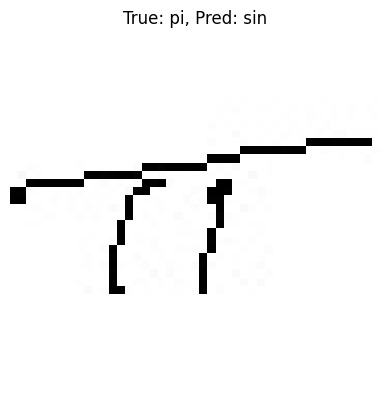

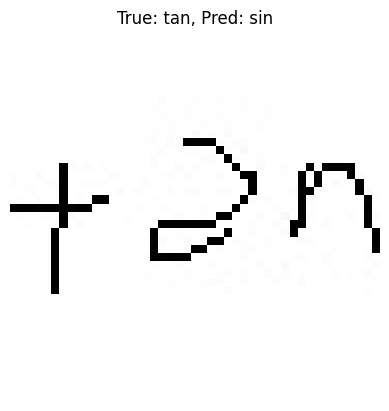

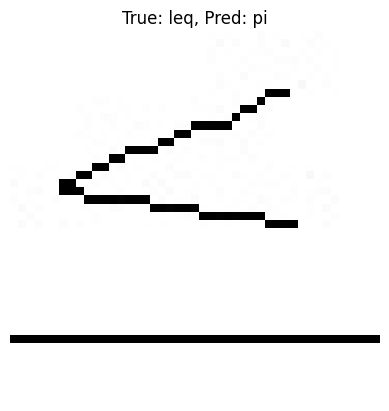

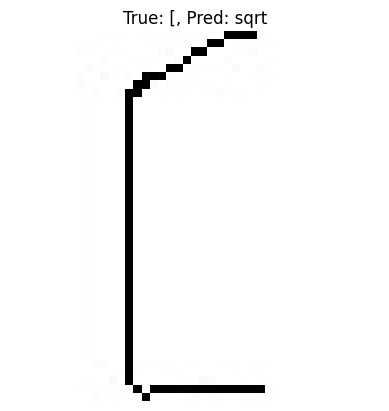

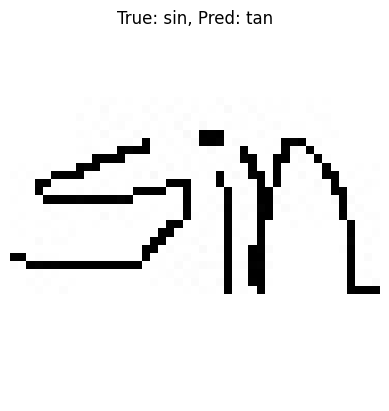

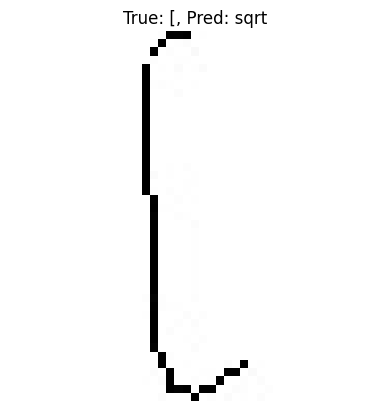

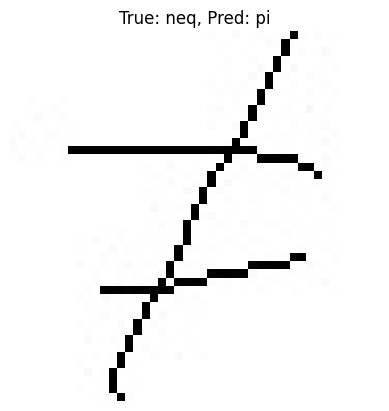

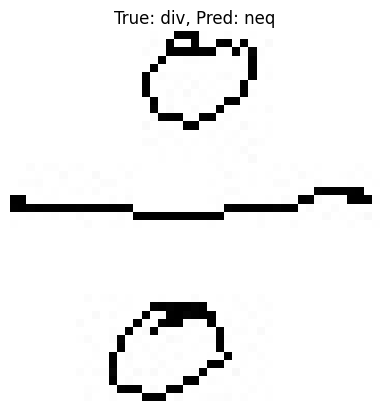

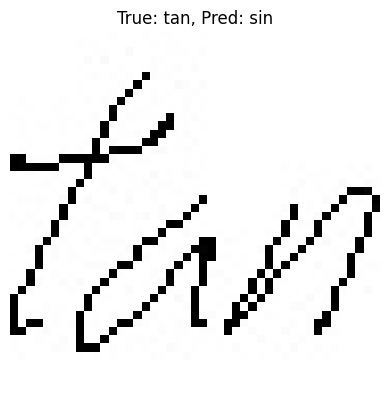

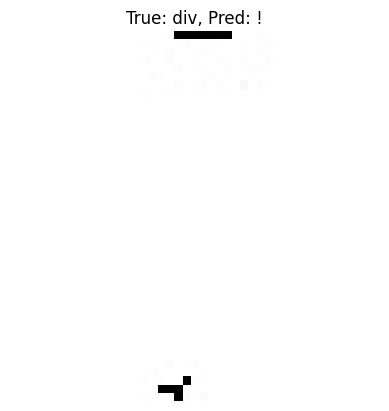

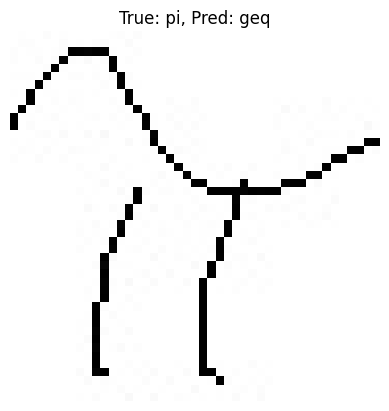

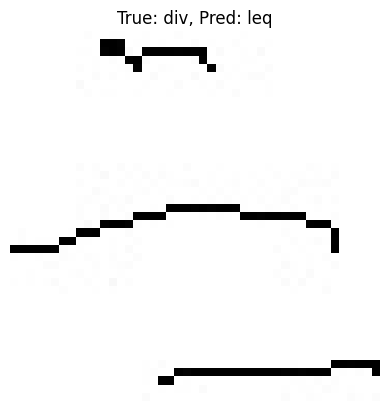

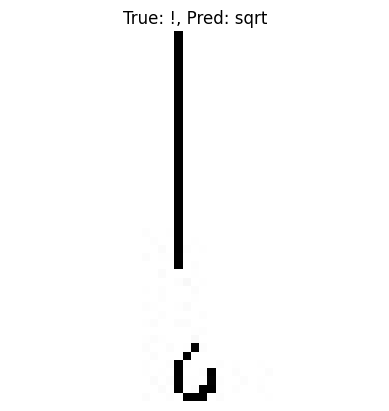

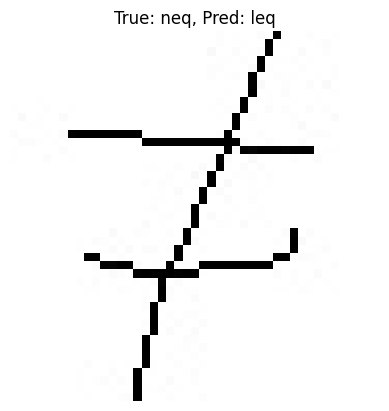

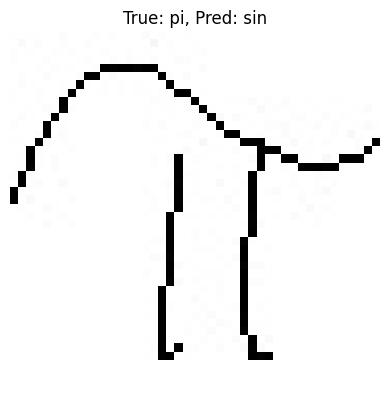

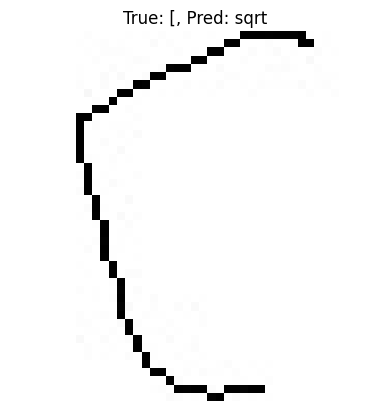

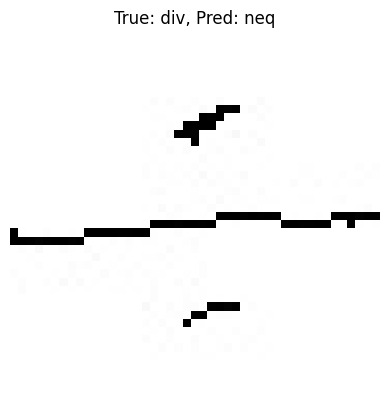

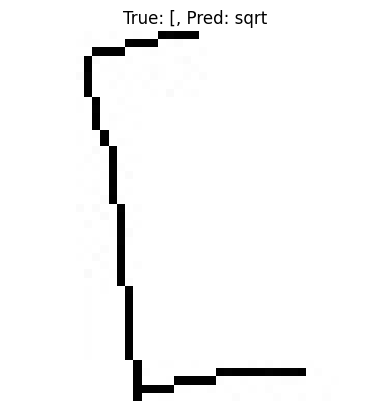

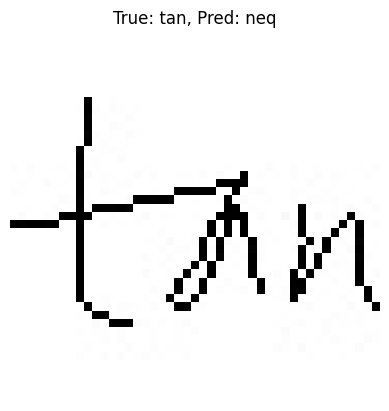

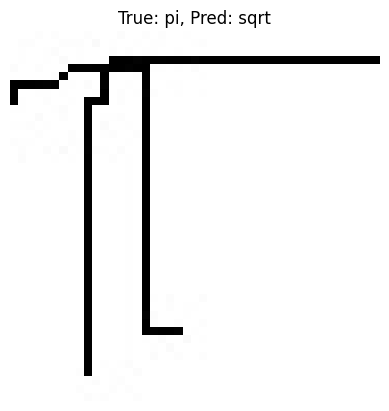

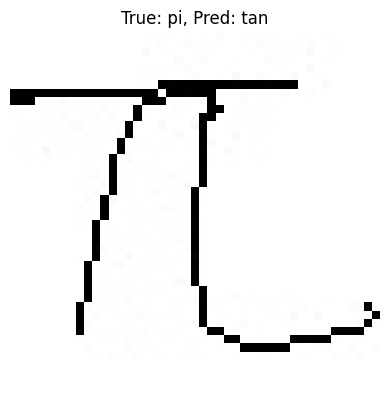

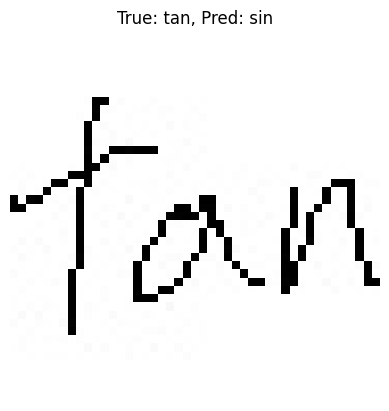

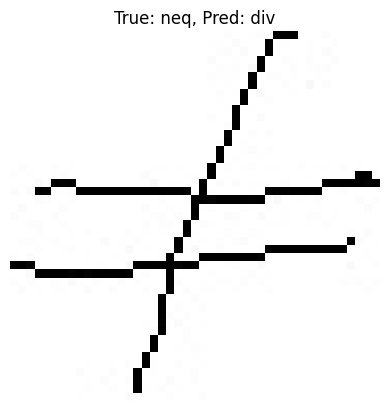

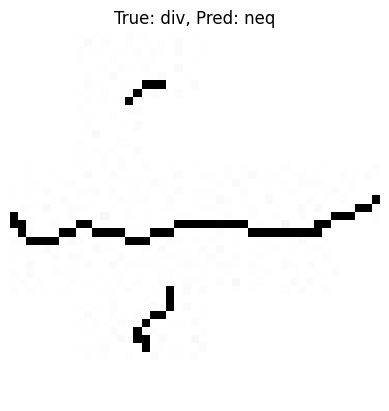

In [ ]:
misclassified = numpy.where(y_pred != y_test)[0] # Get indexes of misclassified images
for index in misclassified: # For each misclassified image
  plt.imshow(x_test[index]) # Add the corresponding image to the plot
  plt.title(f"True: {labelNames[y_test[index]]}, Pred: {labelNames[y_pred[index]]}") # Add the labels to the plot
  plt.axis('off')
  plt.show()

### Step 5: Train the NN model

Design the model

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[26]), # Input layer (Corresponding to image size)
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2, seed=22),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # Output layer, each neuron represents a category, softmax function to get valid output.
])

Display the model configuration

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 26)                0         
                                                                 
 dense_15 (Dense)            (None, 1024)              27648     
                                                                 
 dense_16 (Dense)            (None, 512)               524800    
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 10)               

Reshape data

In [ ]:
# Reshape training data to allow input into NN
Lx_train_stacked = numpy.vstack(Lx_train)
Lx_test_stacked = numpy.vstack(Lx_test)

# Set labels to use one-hot encoding
y_train_cat = numpy.eye(10)[y_train]
y_test_cat = numpy.eye(10)[y_test]

Compile the model, set hyperparameters and train the model

In [ ]:
model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=.001), # Showed best performance
              loss = 'categorical_crossentropy', # Used to support one-hot encoding
              metrics=['accuracy'])

m = model2.fit(Lx_train_stacked, y_train_cat, epochs=40) # Train for 40 epochs

Epoch 1/40
110/110 [==============================] - 3s 14ms/step - loss: 1.8439 - accuracy: 0.2434
Epoch 2/40
110/110 [==============================] - 2s 15ms/step - loss: 1.6494 - accuracy: 0.3154
Epoch 3/40
110/110 [==============================] - 2s 15ms/step - loss: 1.5329 - accuracy: 0.3677
Epoch 4/40
110/110 [==============================] - 2s 18ms/step - loss: 1.4222 - accuracy: 0.4483
Epoch 5/40
110/110 [==============================] - 2s 20ms/step - loss: 1.3734 - accuracy: 0.4626
Epoch 6/40
110/110 [==============================] - 2s 15ms/step - loss: 1.3085 - accuracy: 0.4949
Epoch 7/40
110/110 [==============================] - 2s 14ms/step - loss: 1.2528 - accuracy: 0.5140
Epoch 8/40
110/110 [==============================] - 2s 14ms/step - loss: 1.2211 - accuracy: 0.5231
Epoch 9/40
110/110 [==============================] - 2s 15ms/step - loss: 1.1514 - accuracy: 0.5466
Epoch 10/40
110/110 [==============================] - 2s 14ms/step - loss: 1.1002 - accura

### Step 6: Evaluate the NN model

In [ ]:
model2.evaluate(Lx_test_stacked, y_test_cat) # Output accuracy on test data set
model2.evaluate(Lx_train_stacked, y_train_cat) # Output accuracy on train data set

110/110 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.7374


[0.6945083737373352, 0.7374285459518433]

Plot model metrics vs Epochs

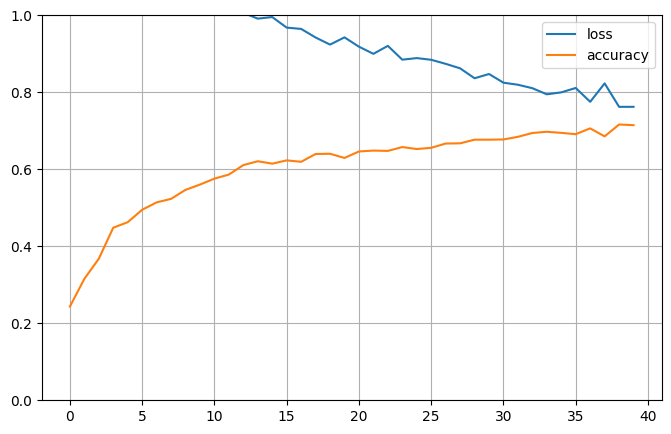

In [ ]:
pd.DataFrame(m.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Output confusion matrix

47/47 [==============================] - 0s 7ms/step


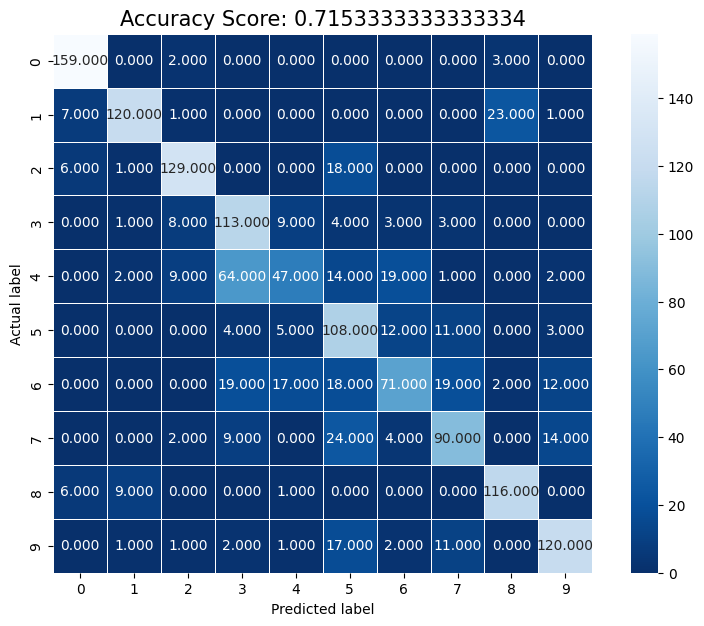

In [ ]:
y_pred = model2.predict(Lx_test_stacked) # Store predicted labels
# Convert one-hot encoded y_test and y_pred to class labels
y_test_labels = numpy.argmax(y_test_cat, axis=1)
y_pred_labels = numpy.argmax(y_pred, axis=1)

cm = metrics.confusion_matrix(y_test_labels, y_pred_labels, labels=numpy.arange(len(labelNames))) # Generate confusion matrix

plt.figure(figsize=(10, 7)) # Create plot
seaborn.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'); # Add confusion matrix to plot
plt.ylabel('Actual label'); # Add ylabel
plt.xlabel('Predicted label'); # Add xlabel
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test_labels, y_pred_labels)) # Add accuracy
plt.title(all_sample_title, size = 15); # Format title

Randomly display images with corresponding predicted and true labels

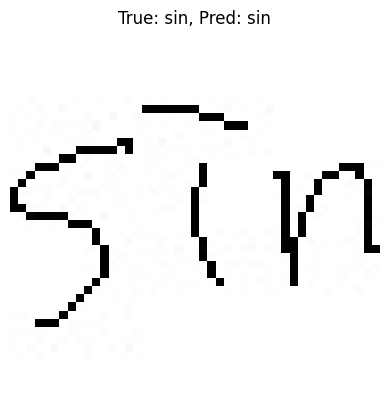

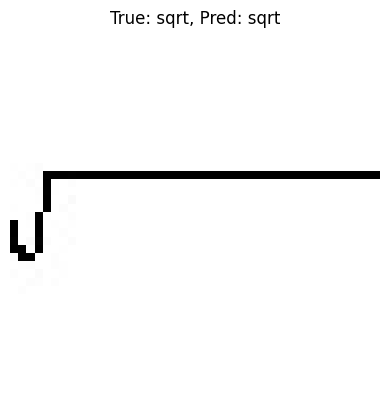

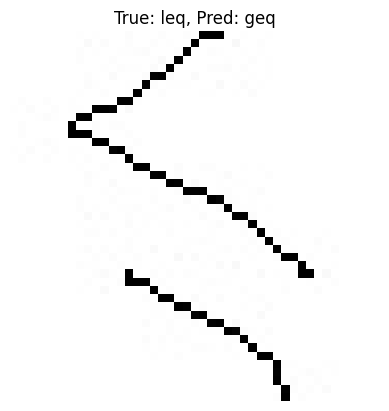

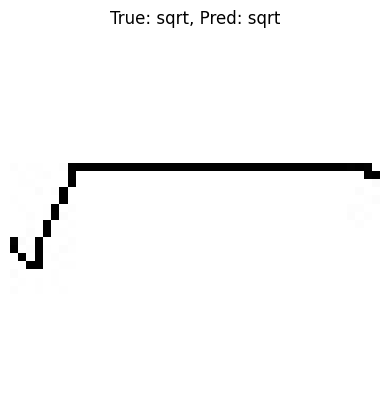

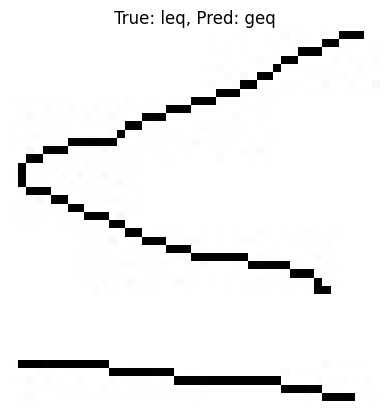

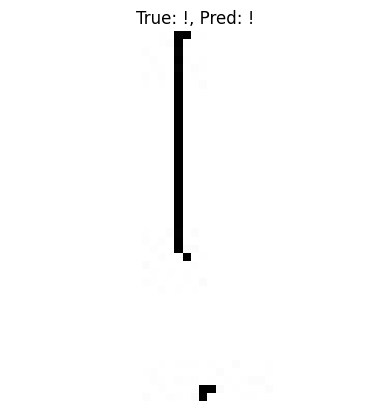

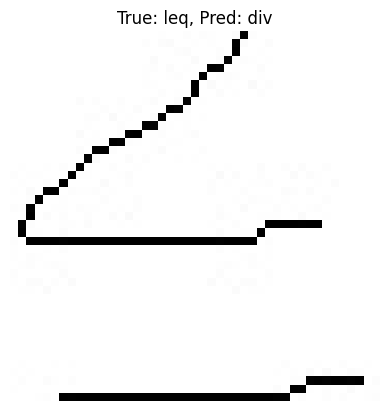

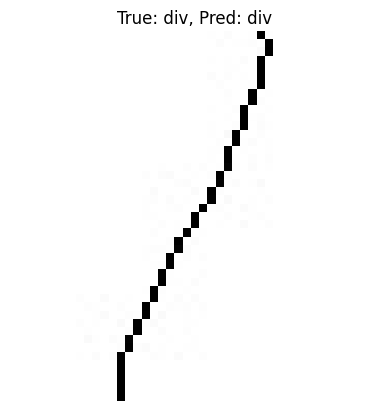

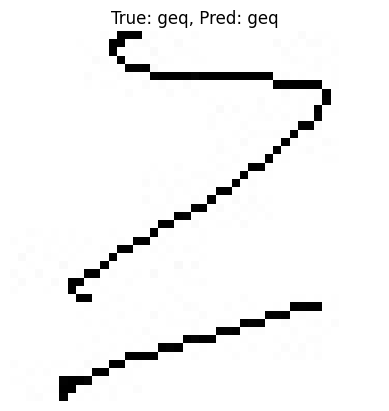

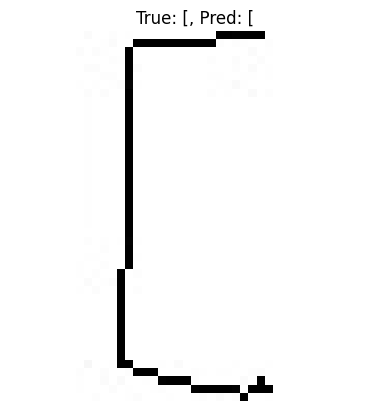

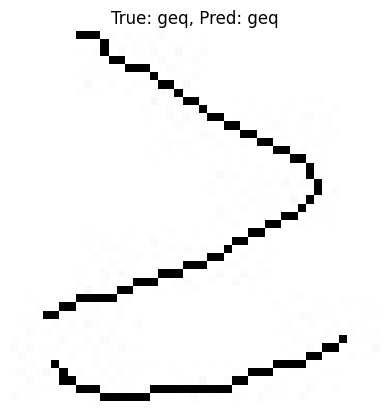

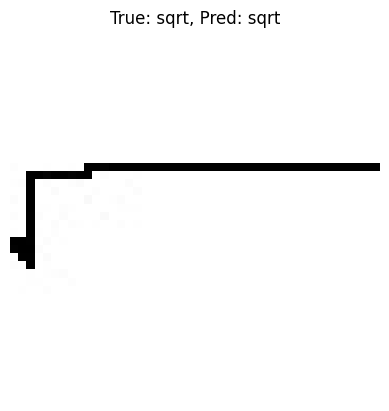

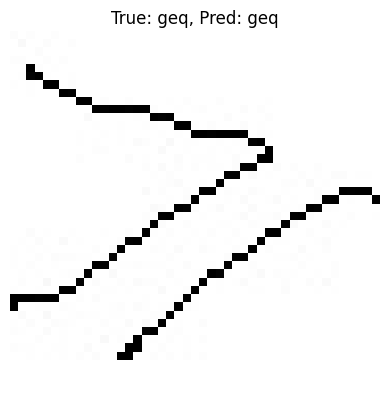

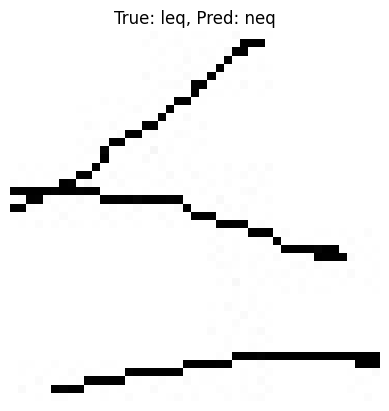

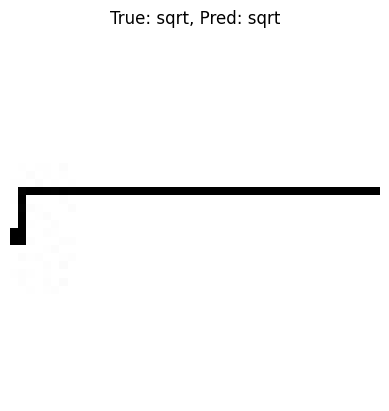

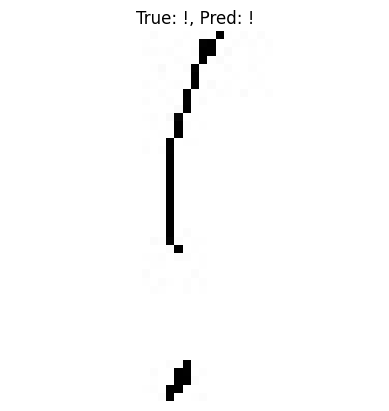

In [ ]:
displayImages = [] # Empty array to store images to be displayed
for i in numpy.random.choice(numpy.arange(0, len(y_test)), size=(16,)): # Select a random choice of images in the test dataset
  test_img = (Lx_test_stacked[i])
  plt.imshow(x_test[i], cmap='gray') # Add the image to the plot
  plt.title(f"True: {labelNames[y_test_labels[i]]}, Pred: {labelNames[y_pred_labels[i]]}") # Add labels to the plot
  plt.axis('off')
  plt.show()

Display misclassified images:

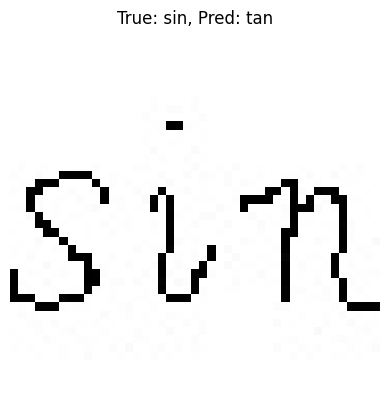

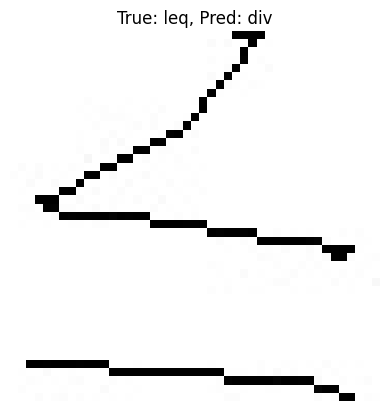

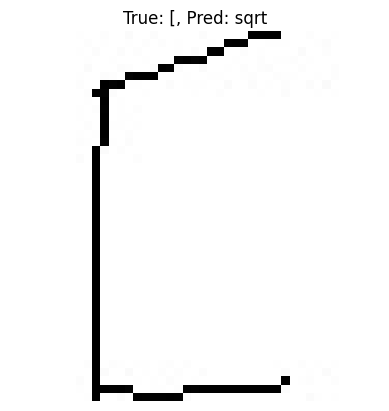

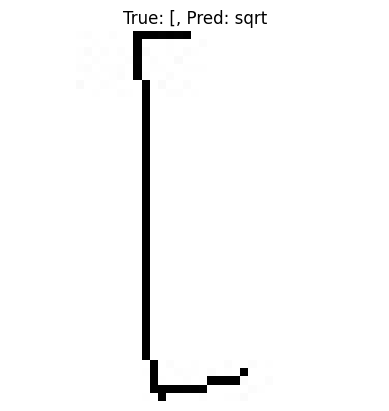

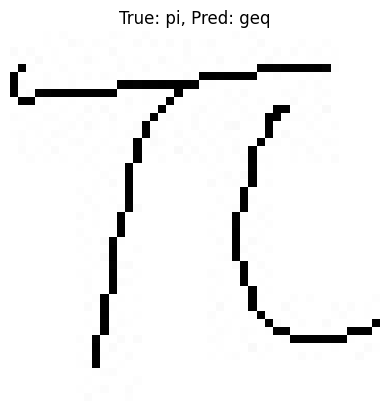

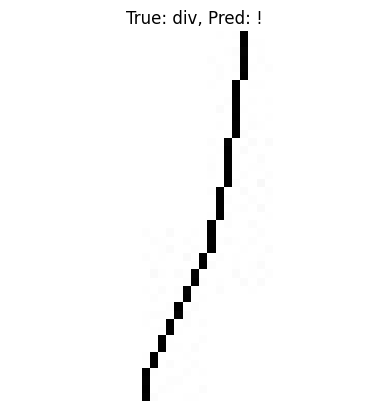

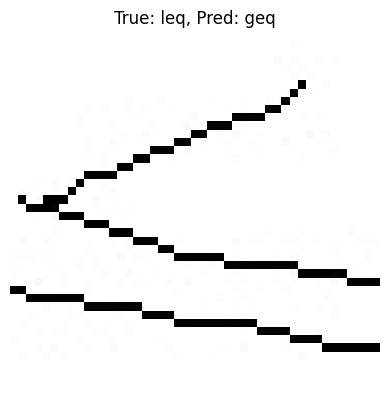

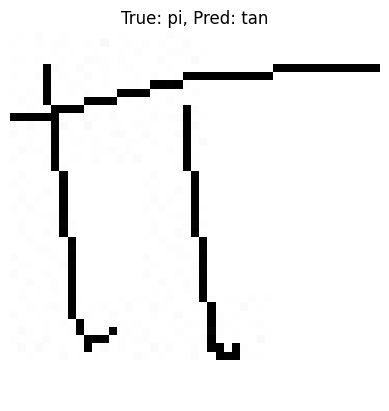

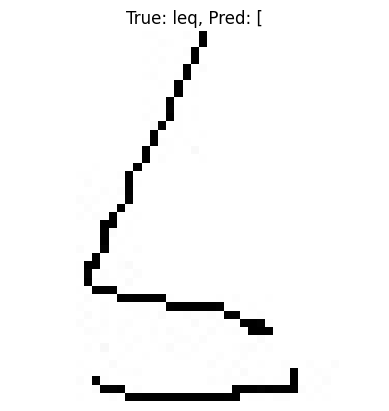

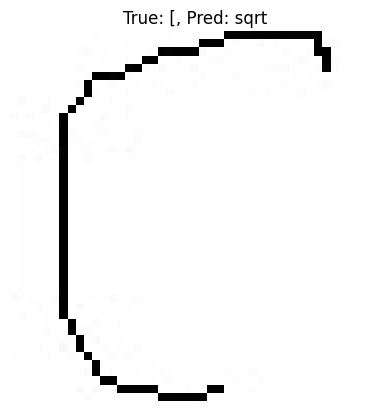

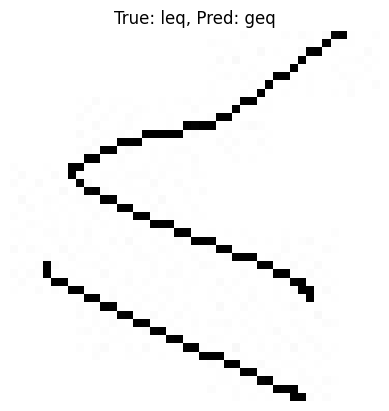

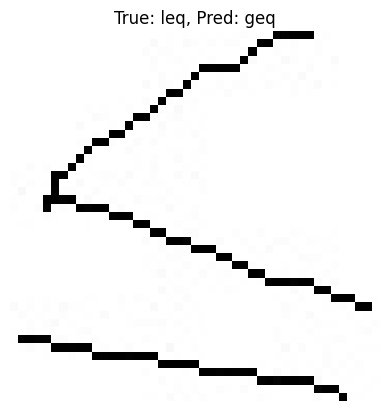

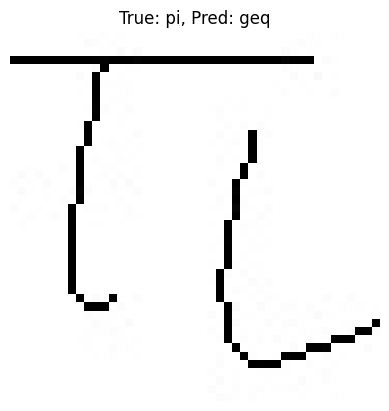

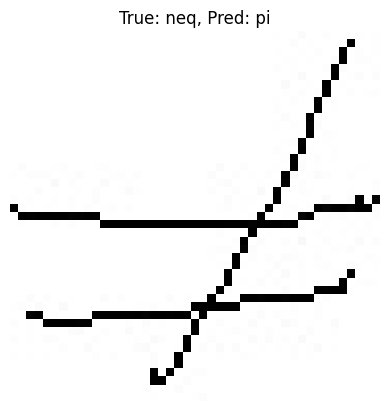

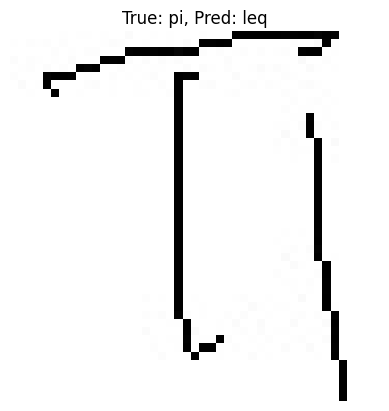

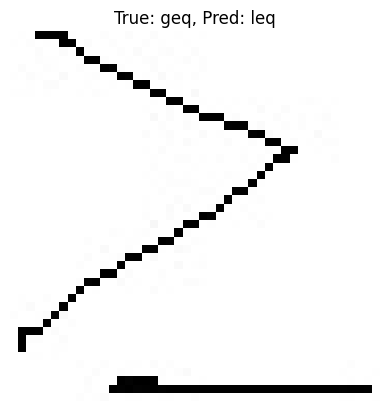

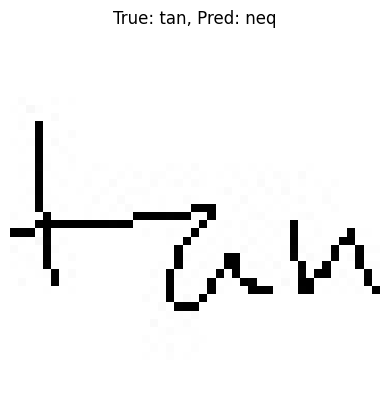

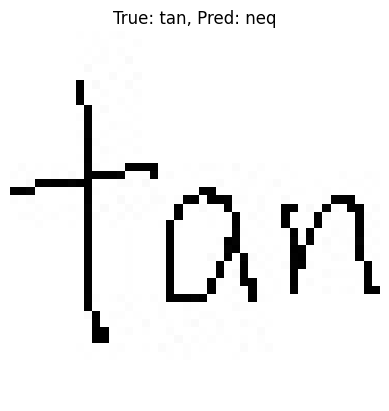

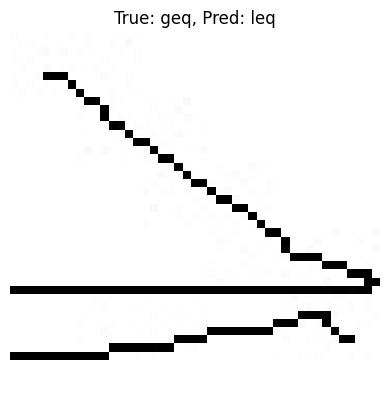

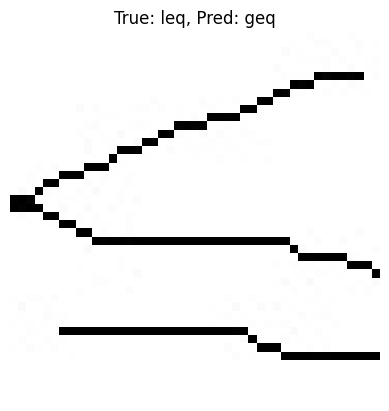

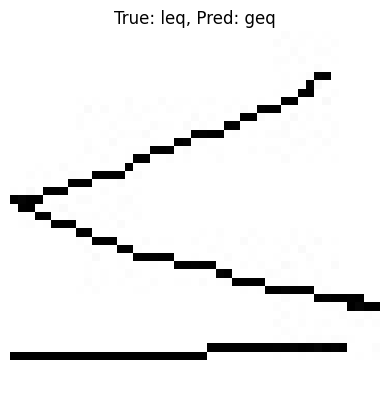

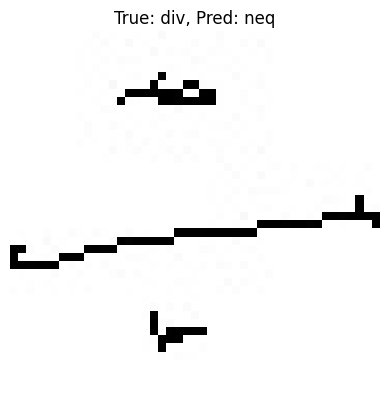

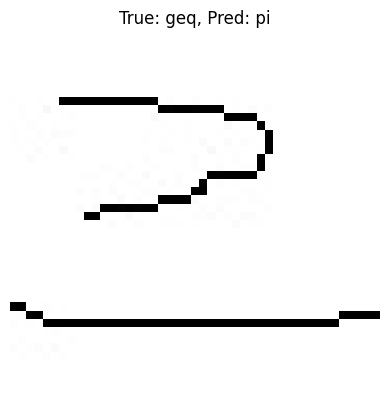

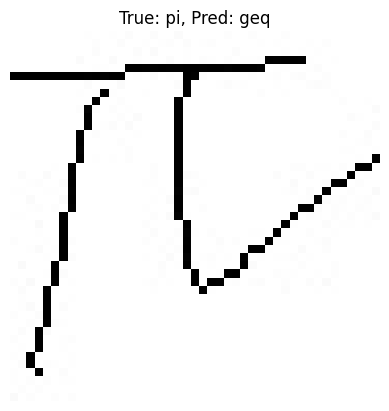

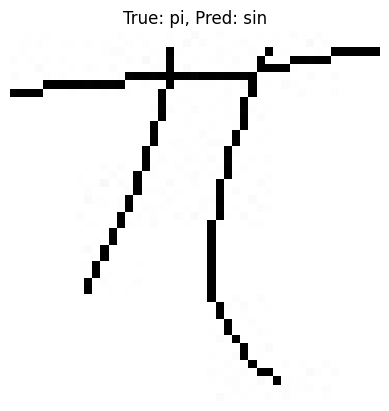

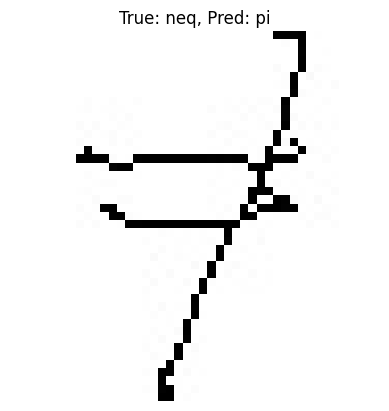

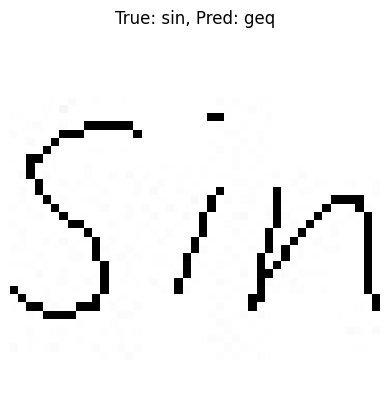

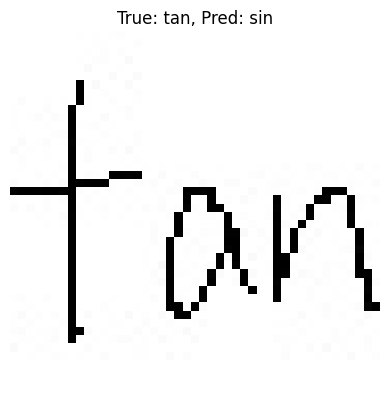

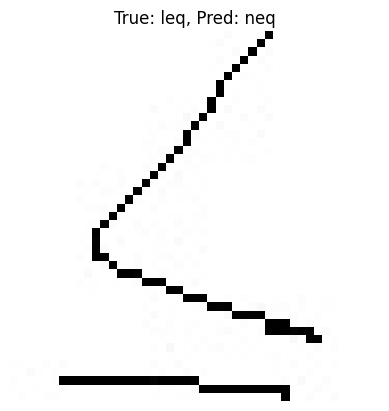

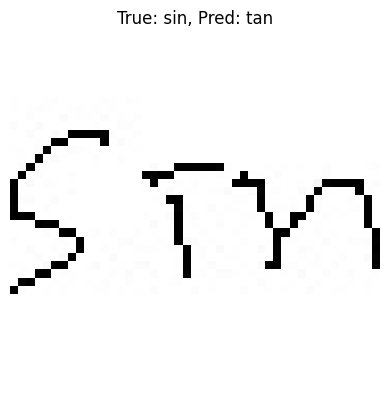

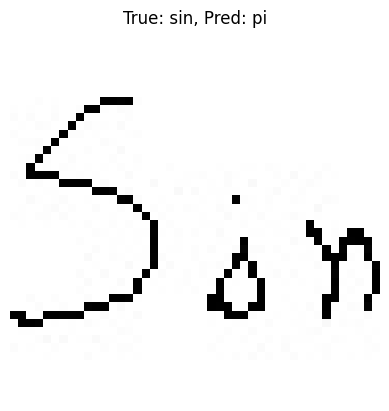

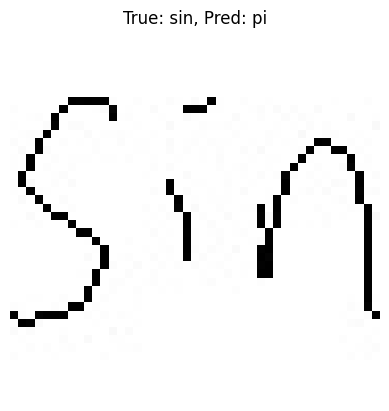

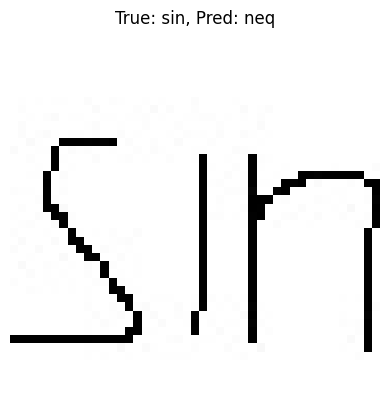

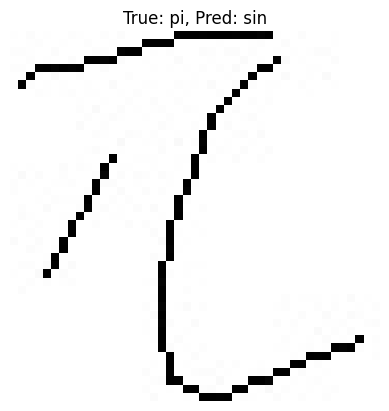

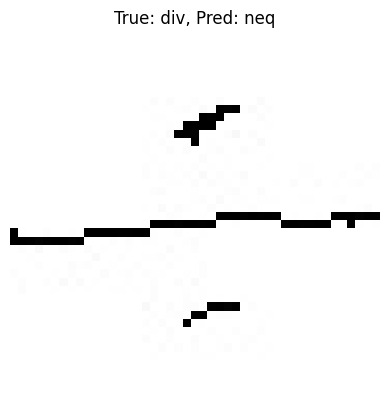

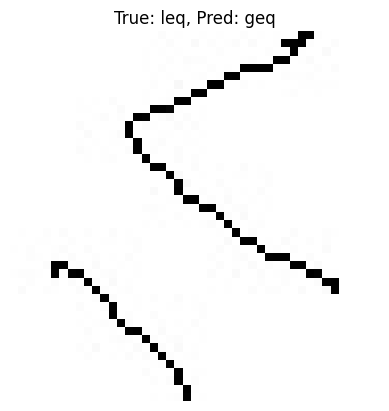

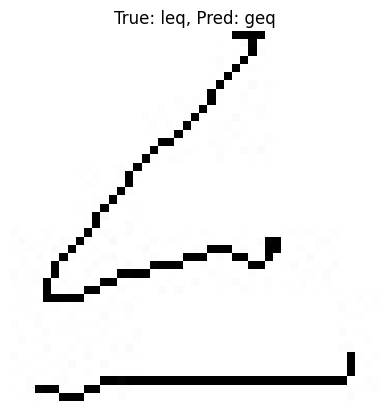

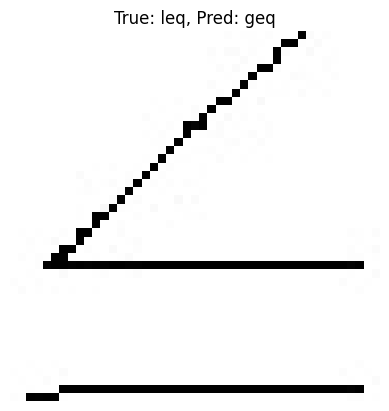

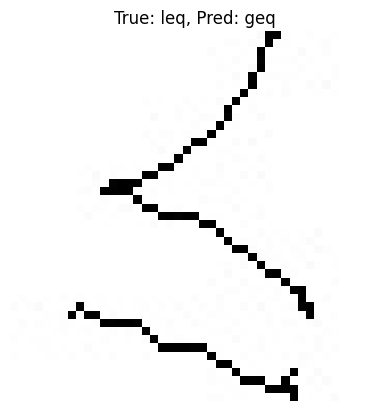

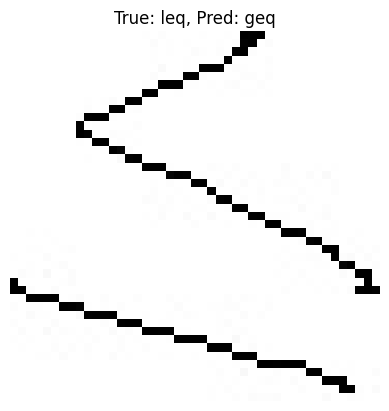

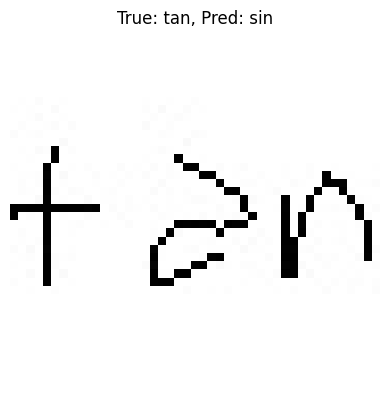

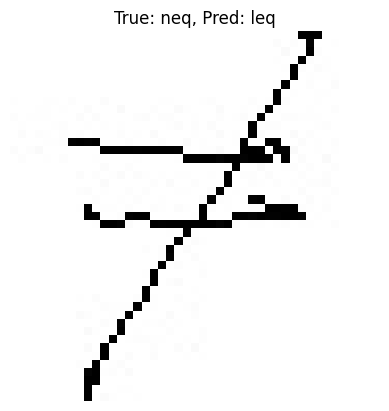

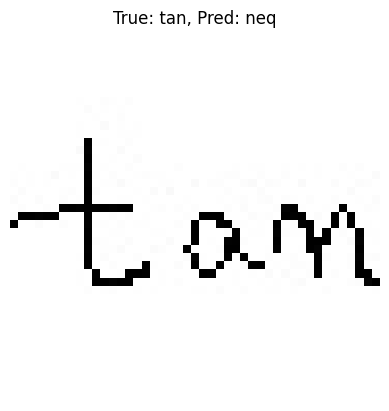

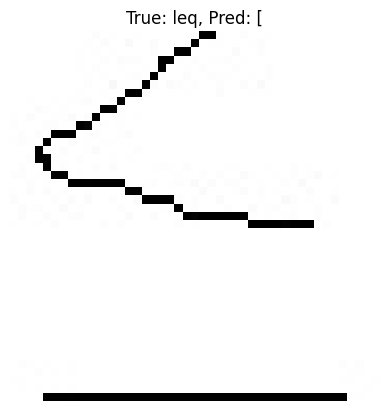

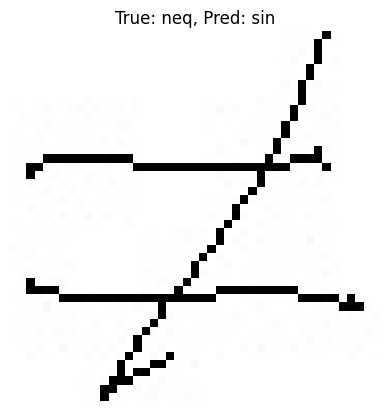

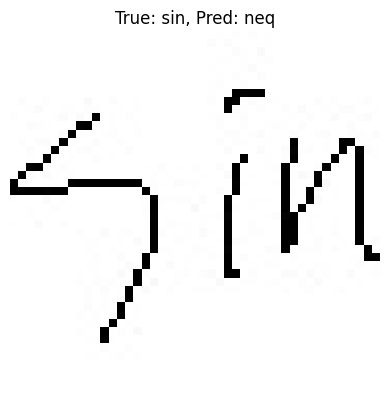

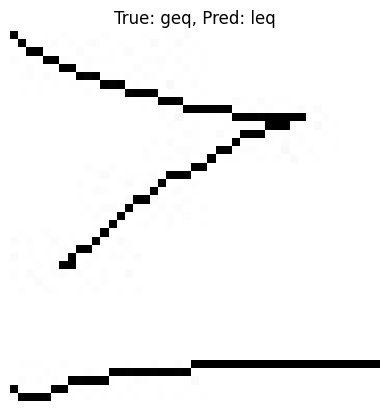

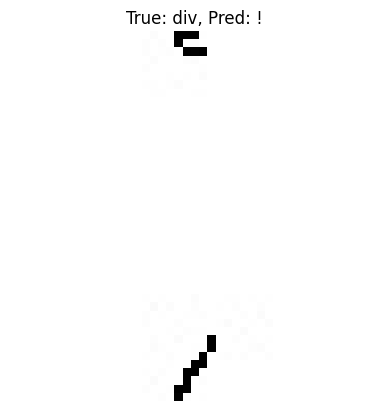

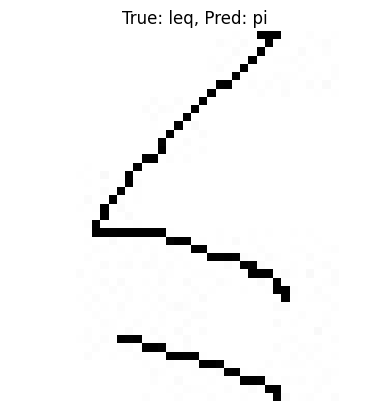

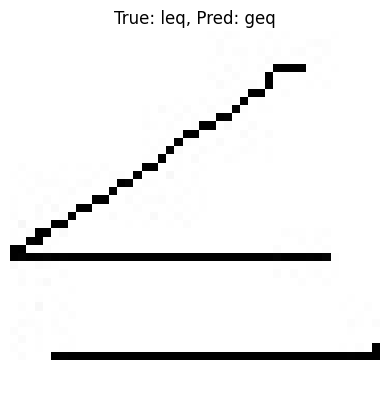

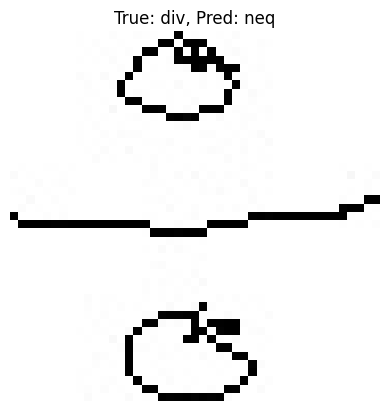

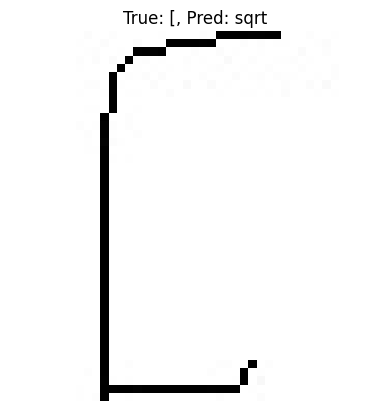

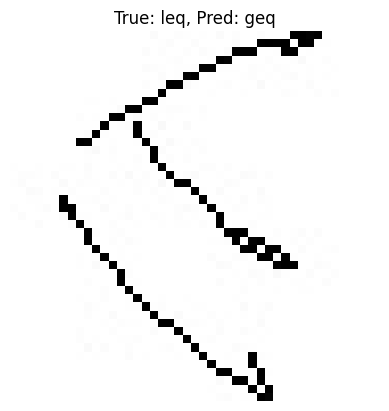

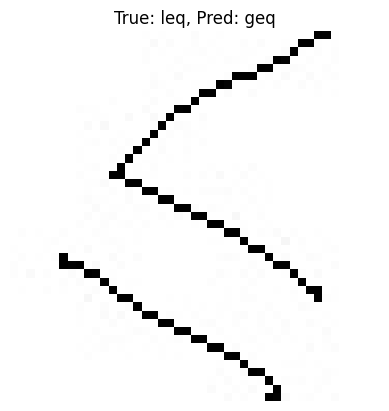

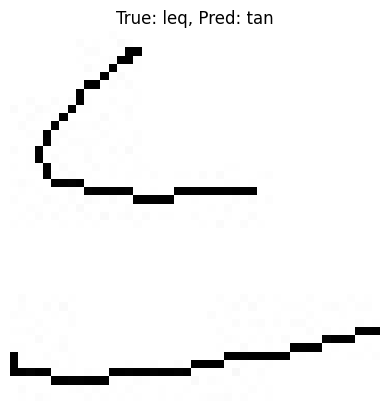

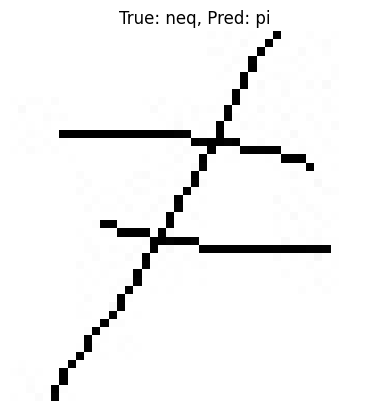

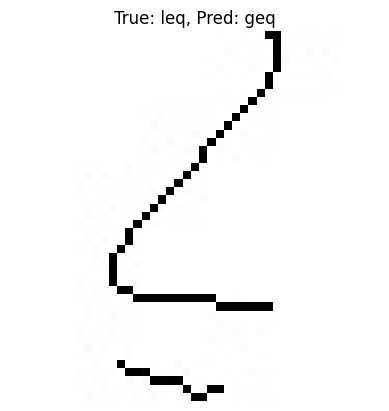

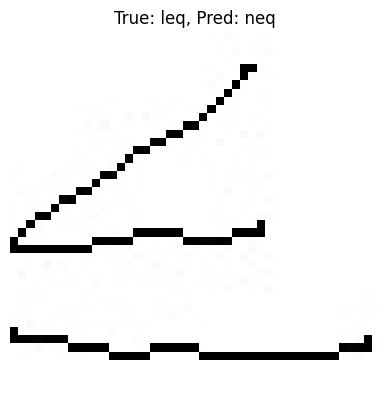

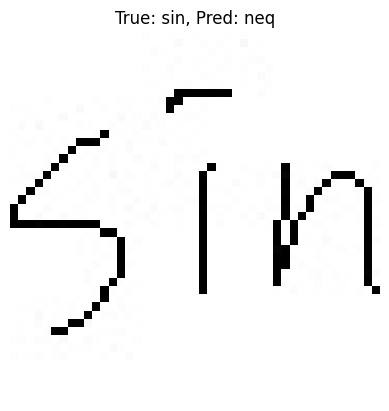

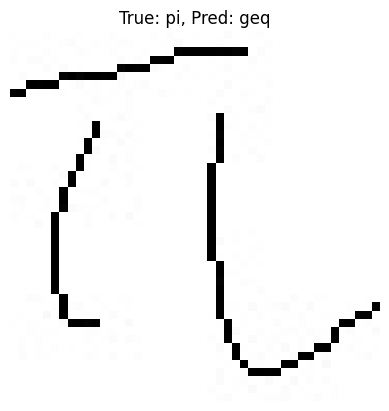

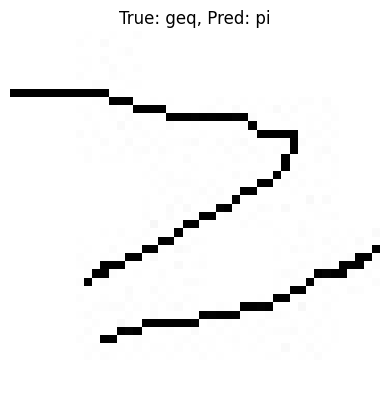

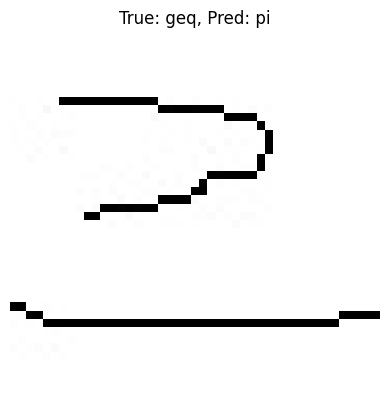

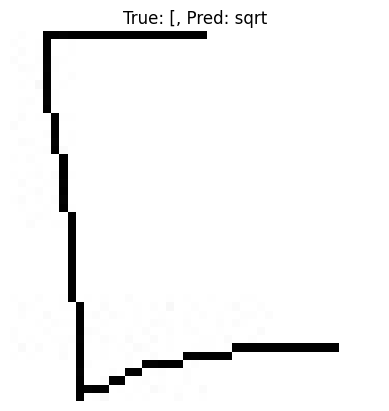

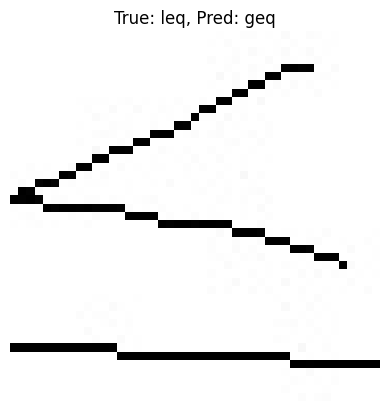

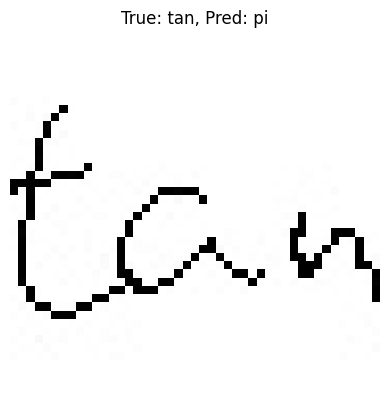

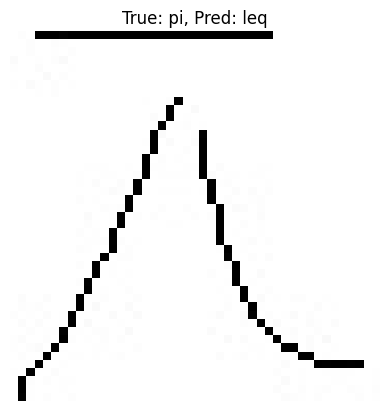

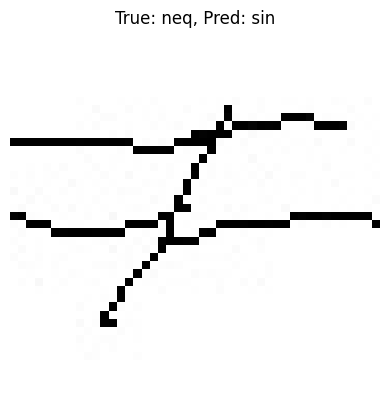

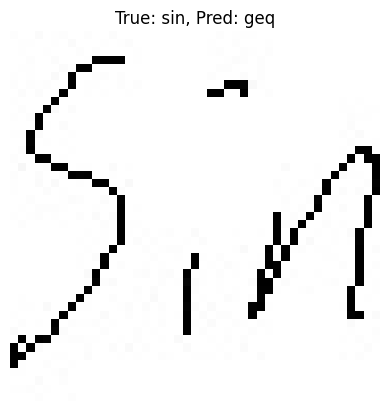

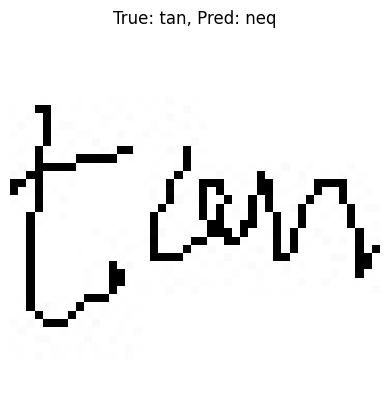

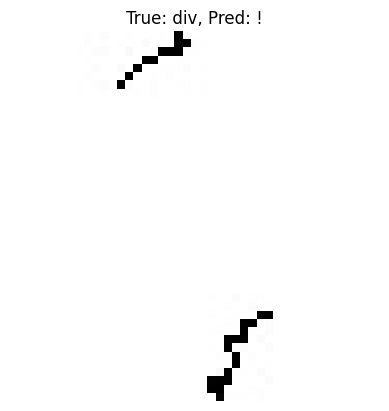

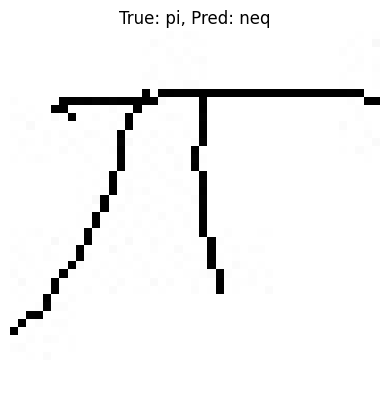

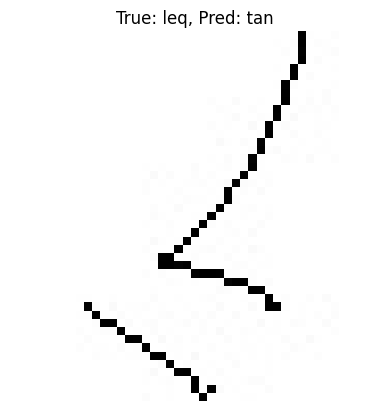

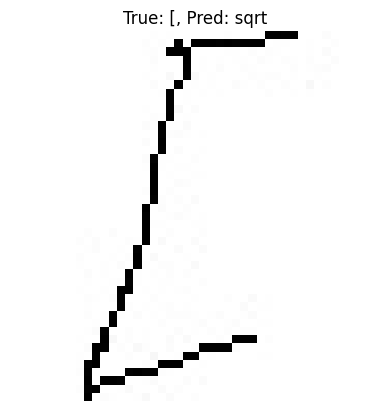

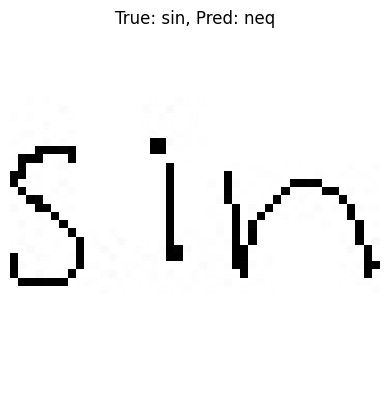

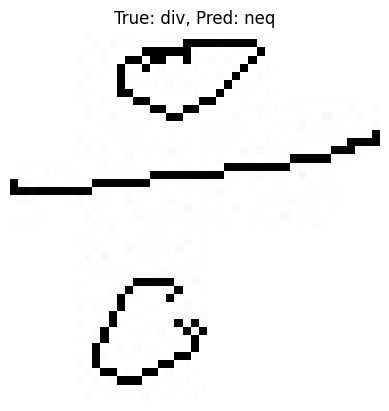

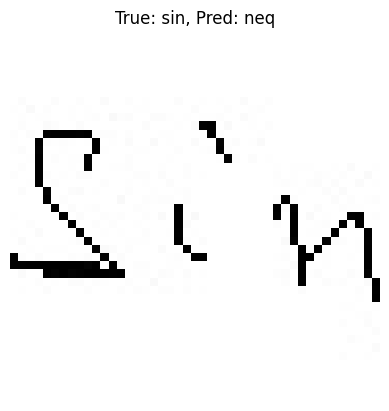

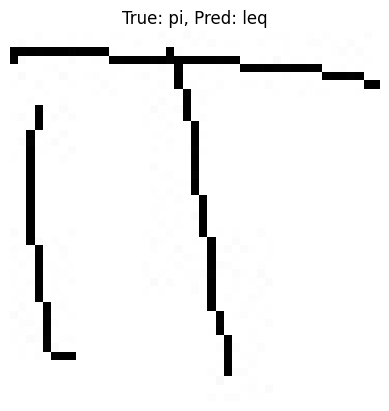

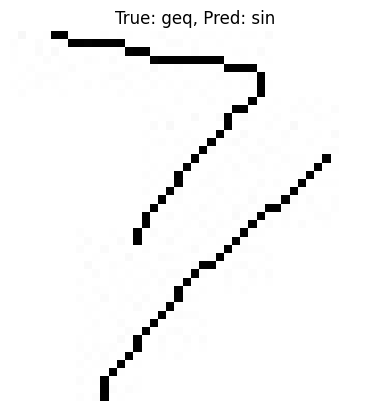

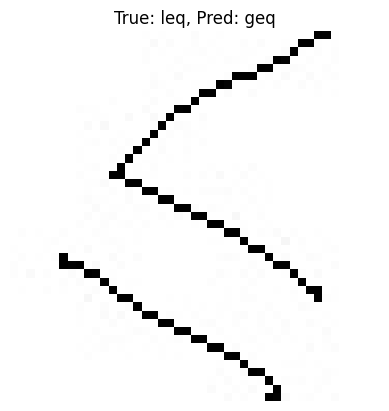

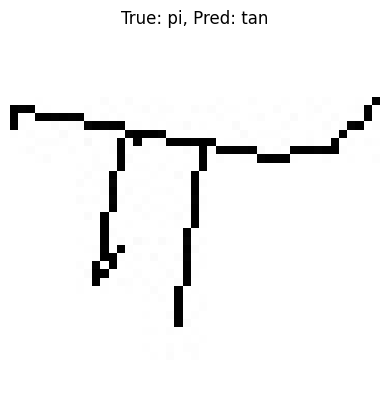

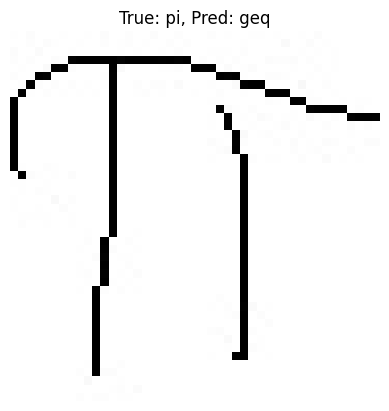

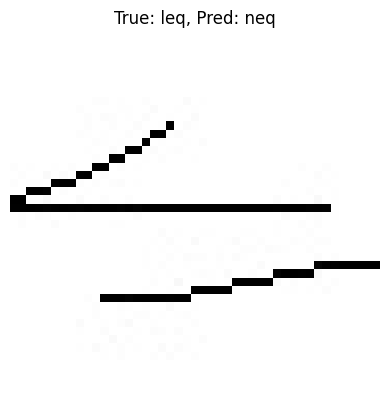

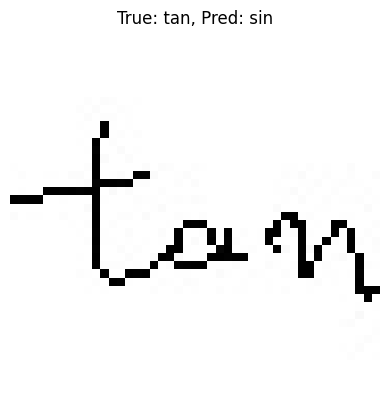

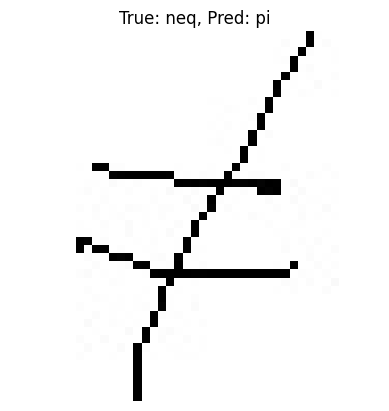

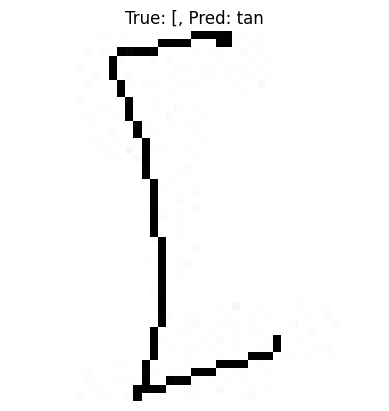

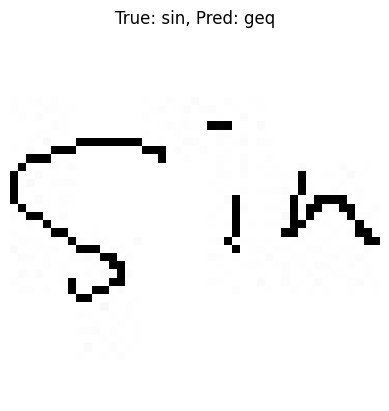

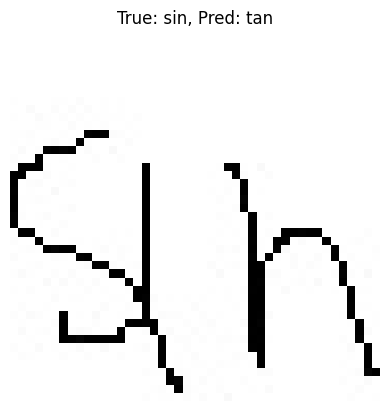

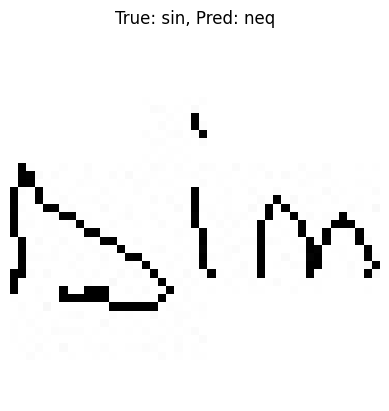

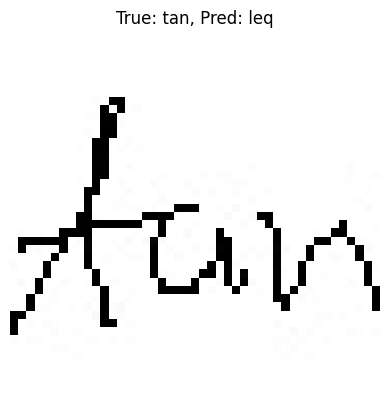

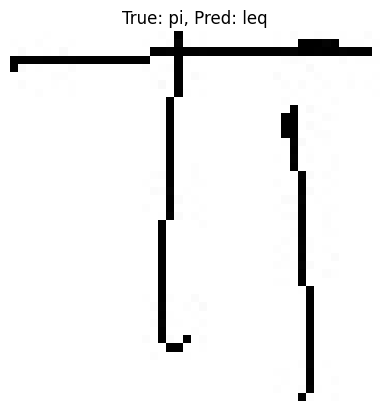

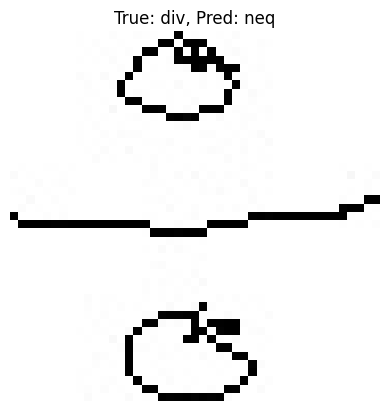

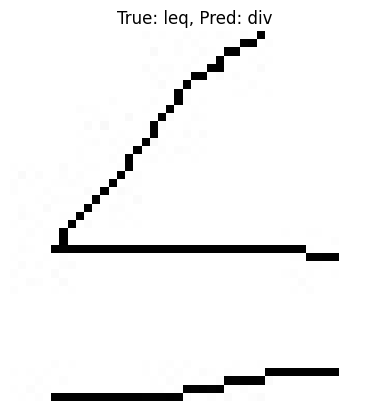

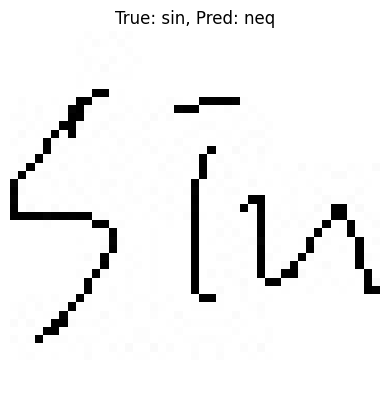

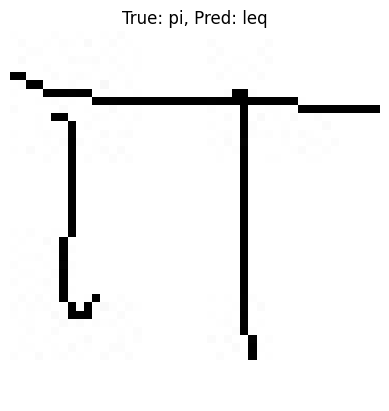

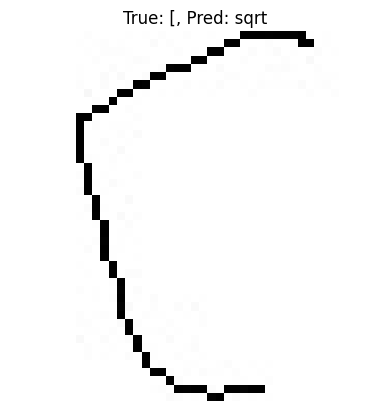

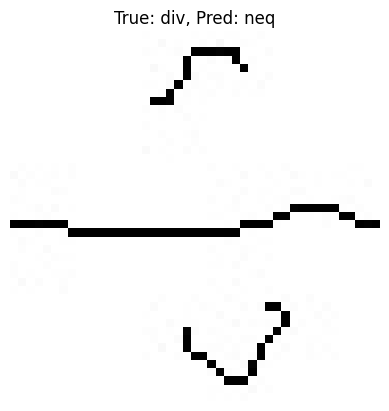

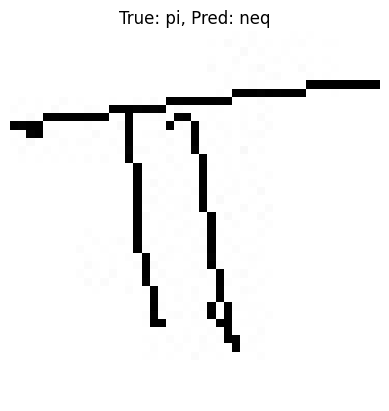

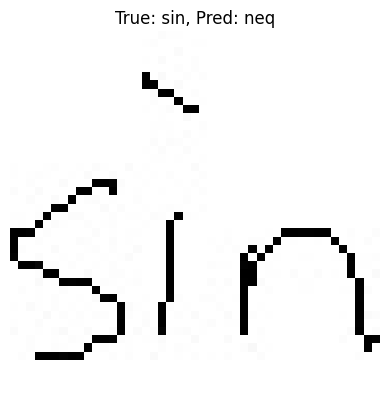

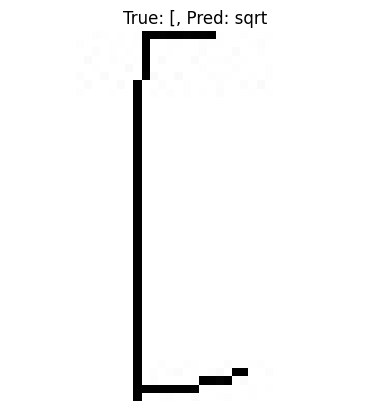

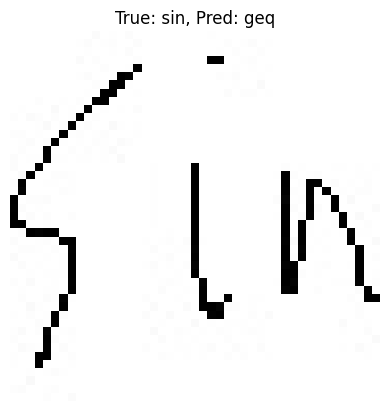

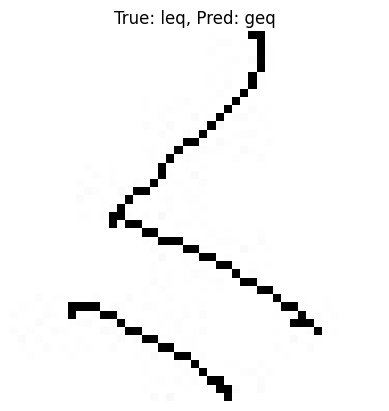

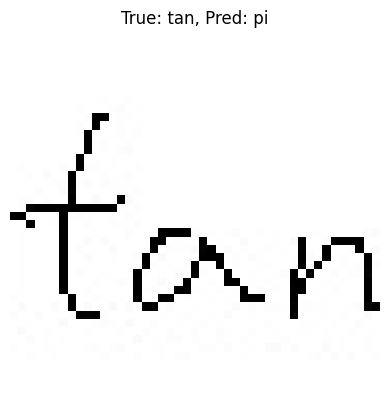

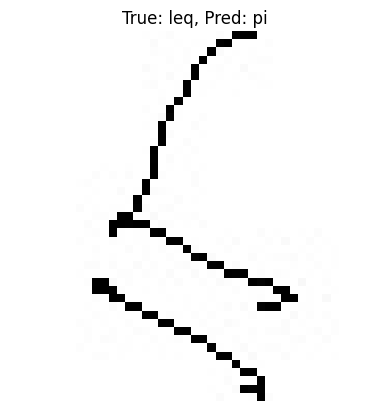

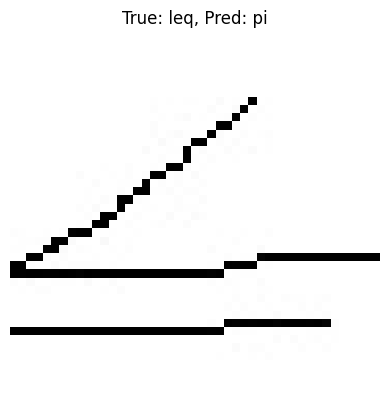

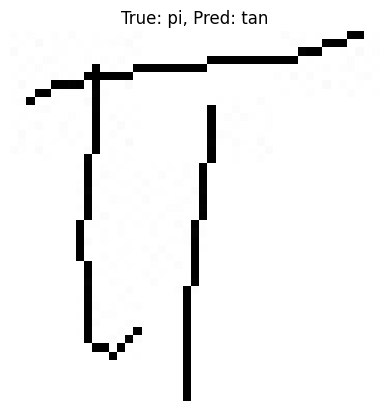

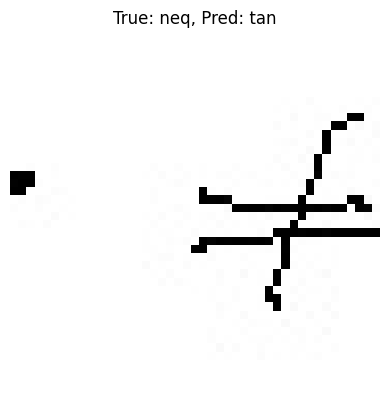

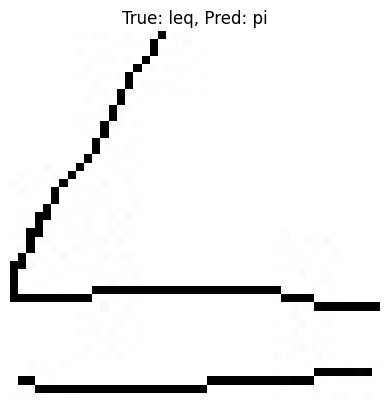

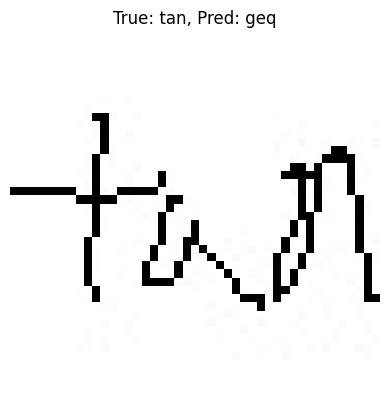

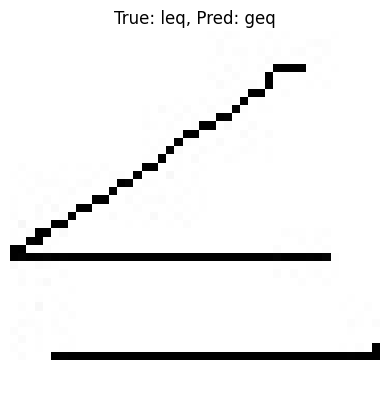

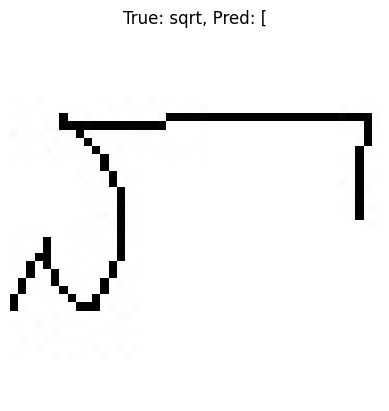

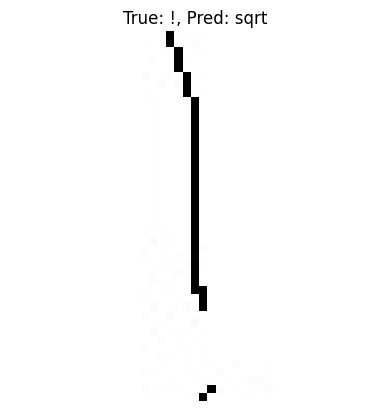

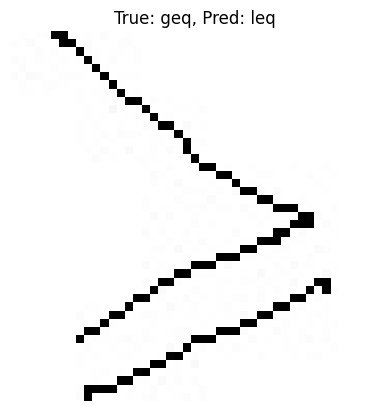

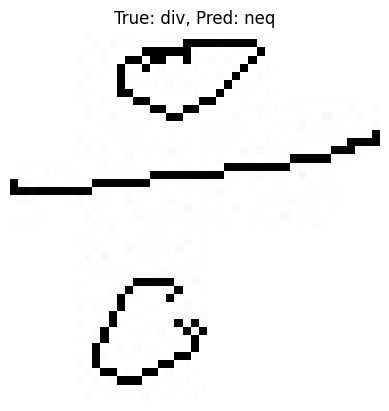

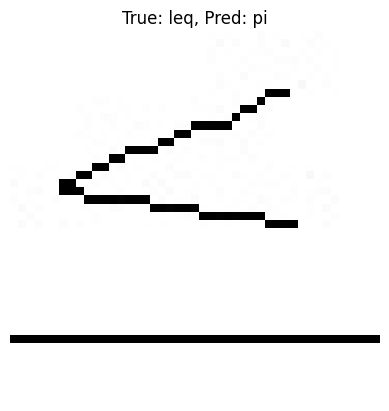

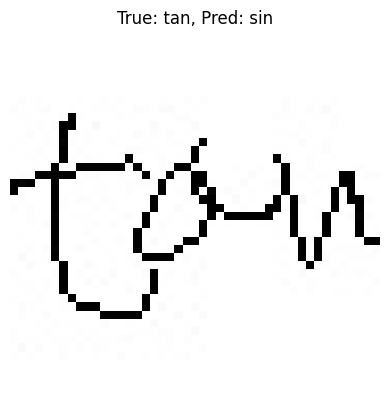

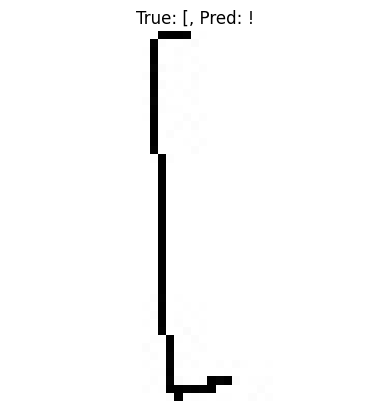

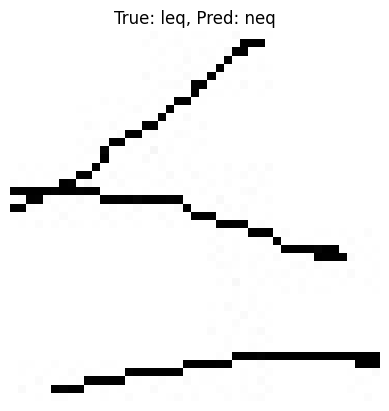

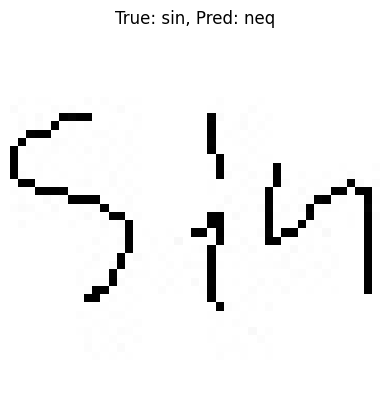

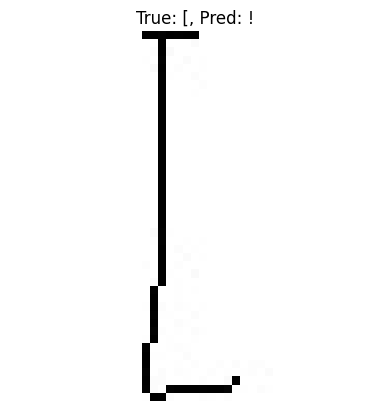

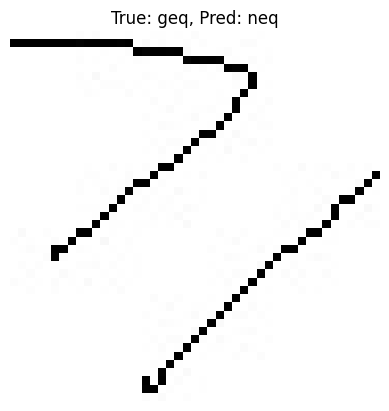

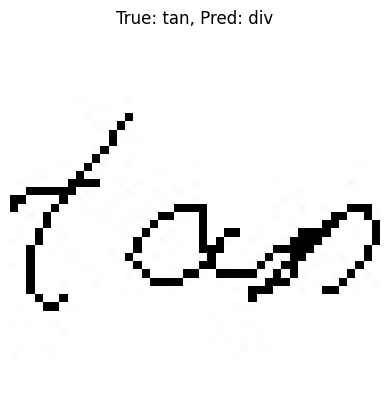

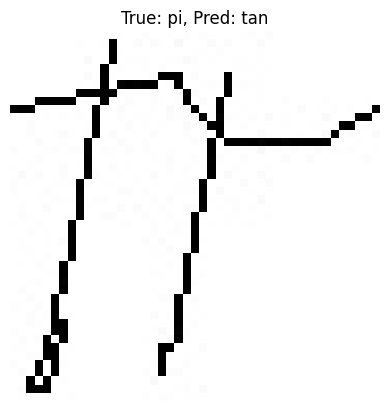

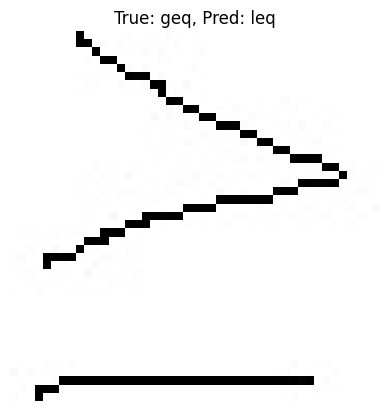

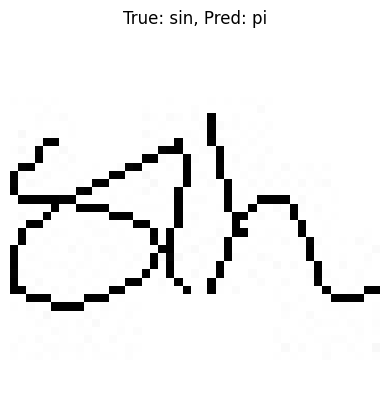

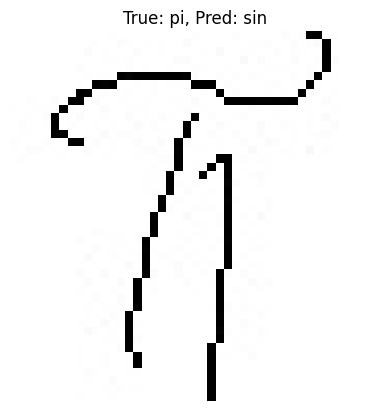

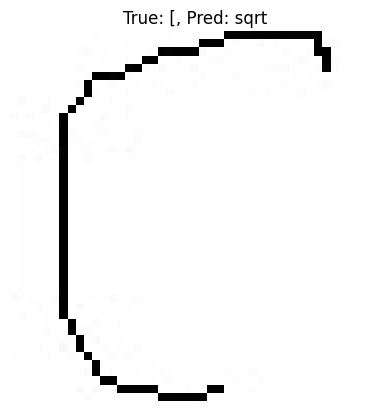

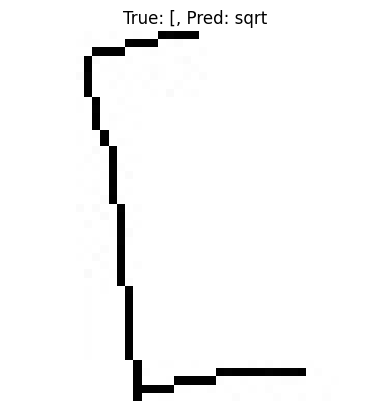

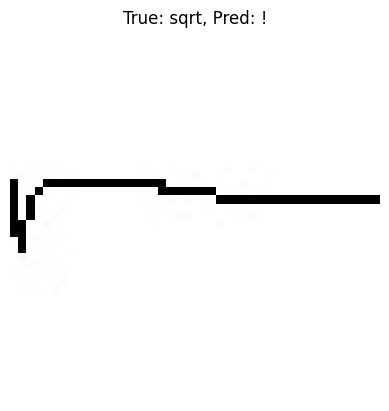

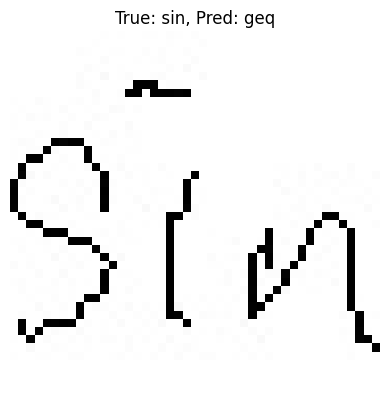

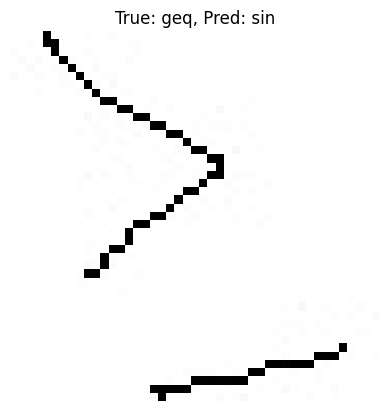

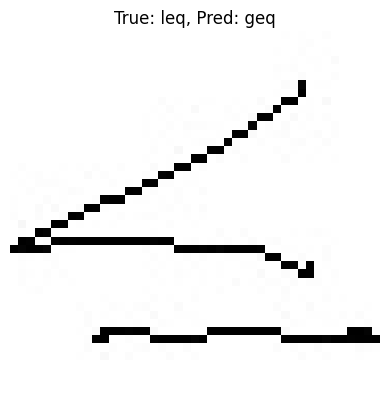

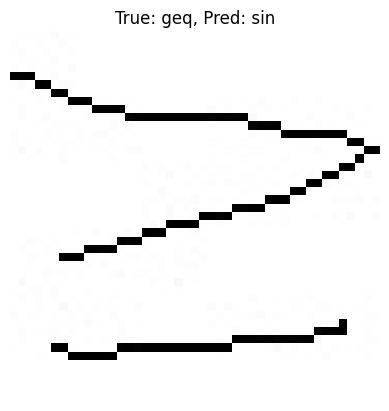

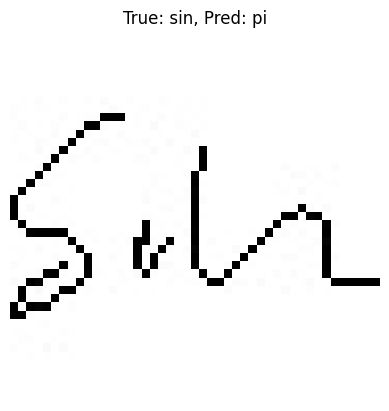

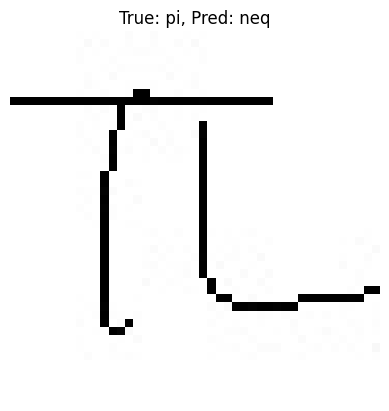

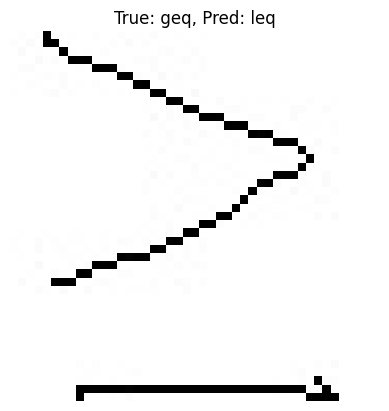

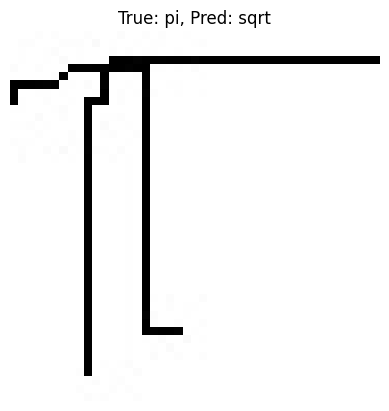

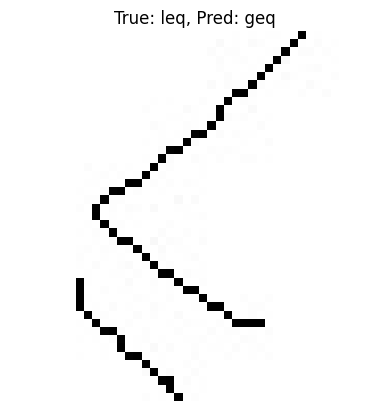

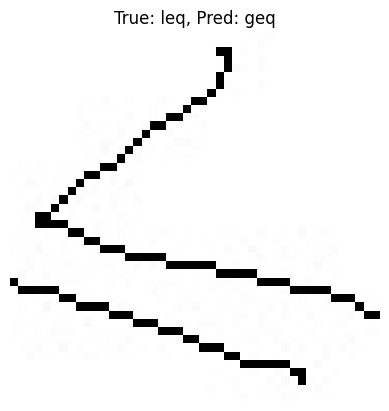

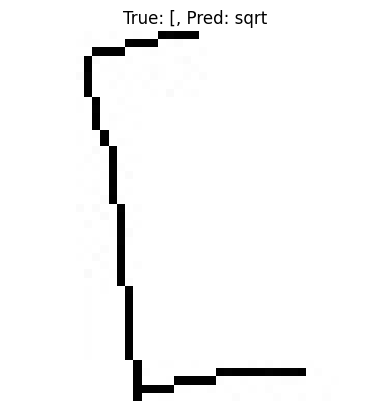

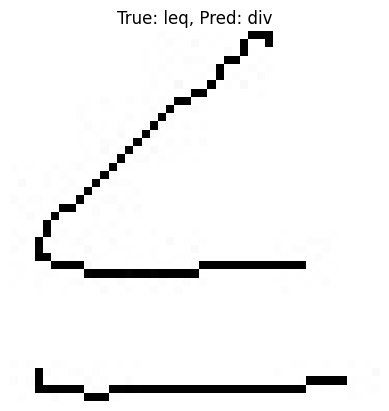

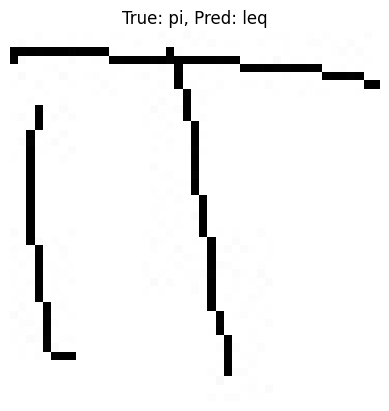

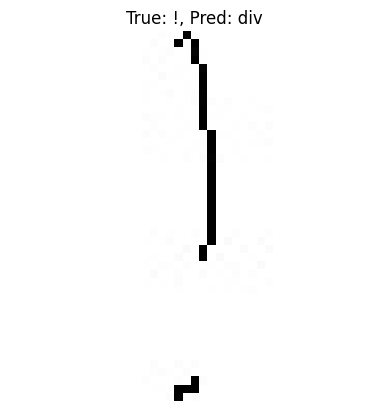

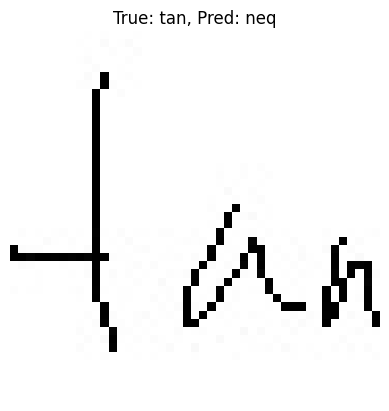

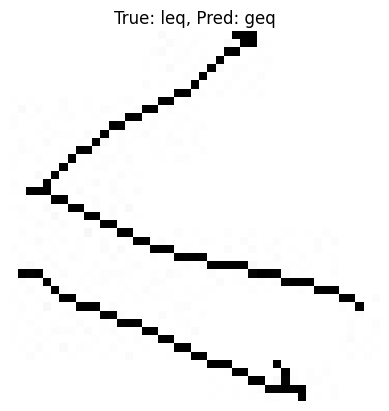

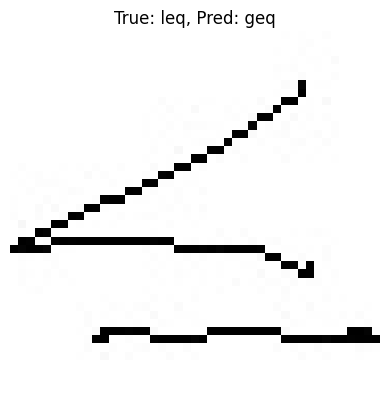

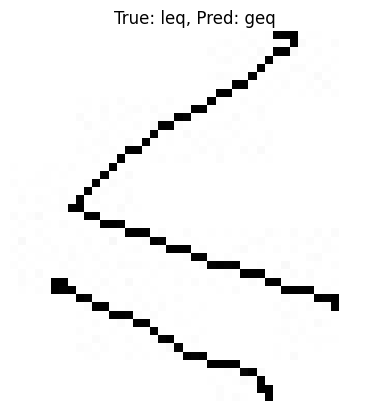

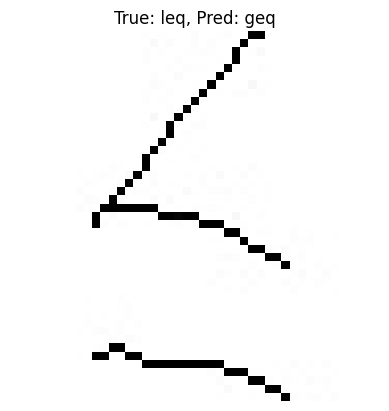

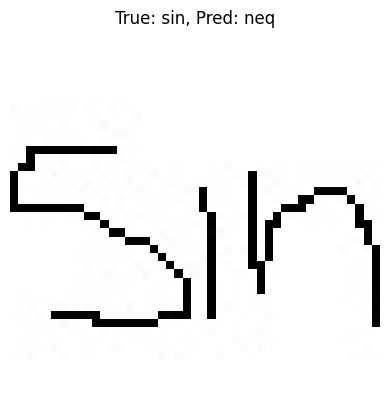

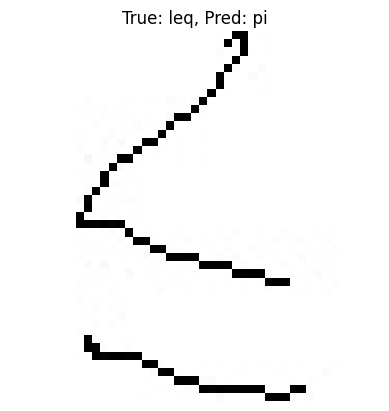

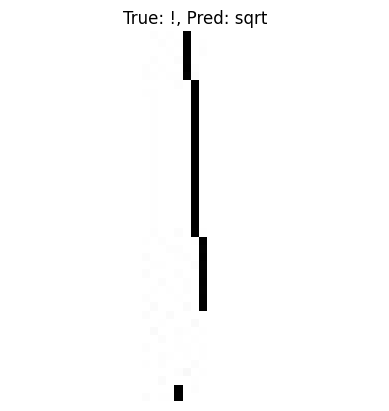

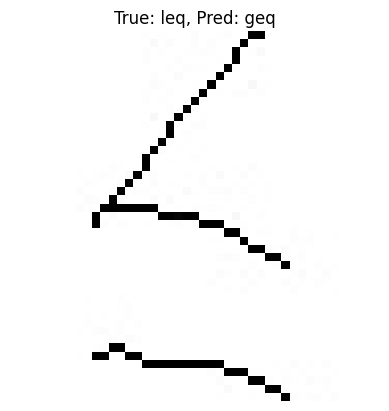

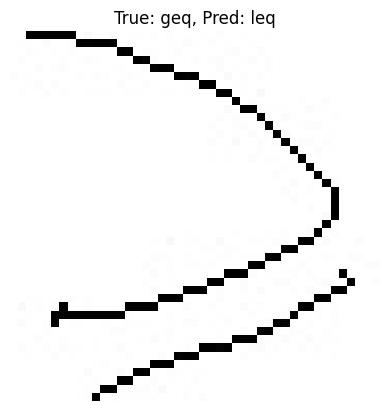

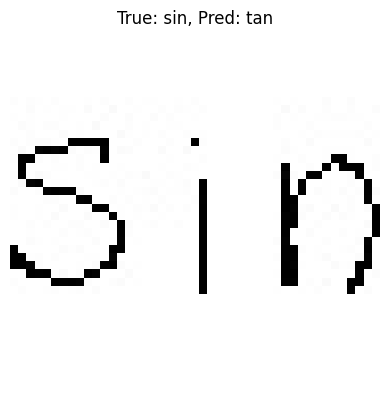

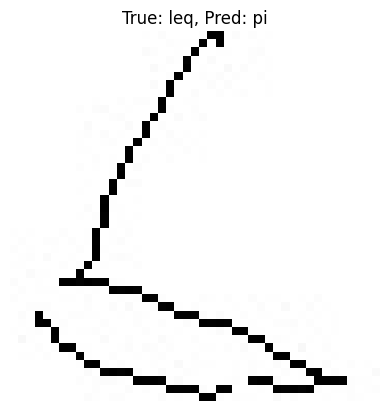

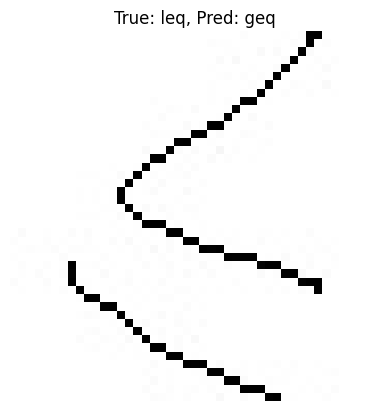

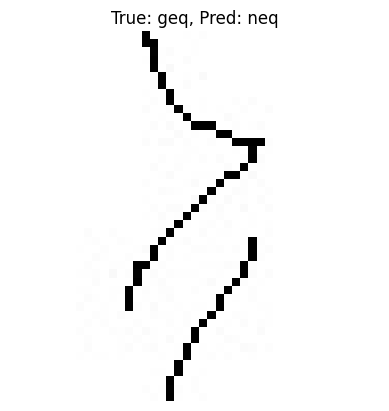

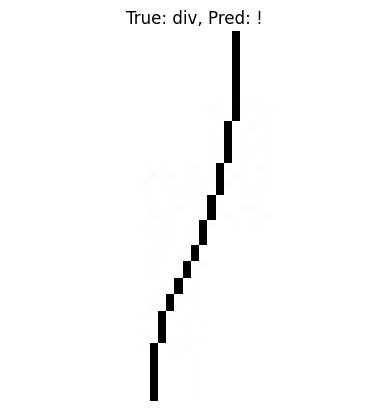

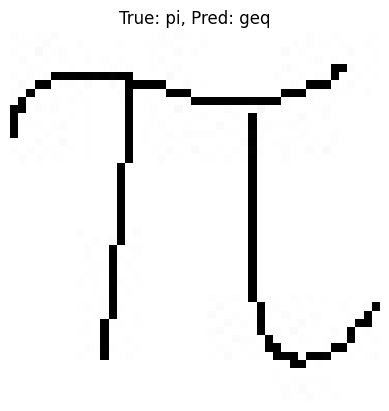

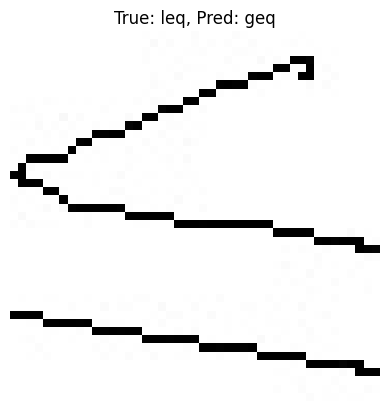

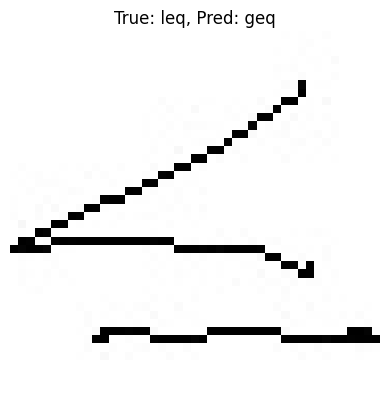

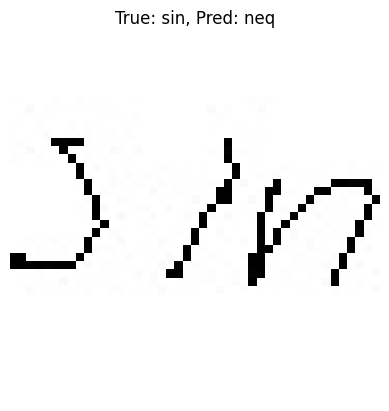

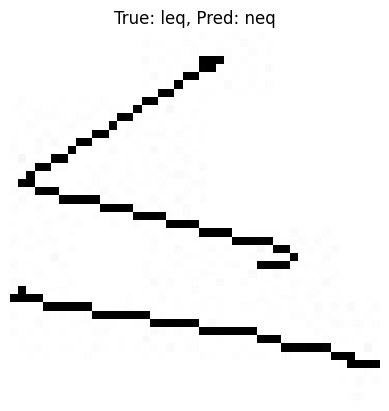

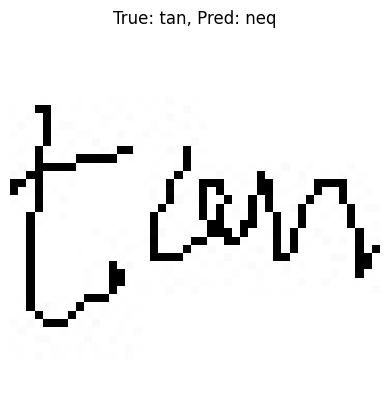

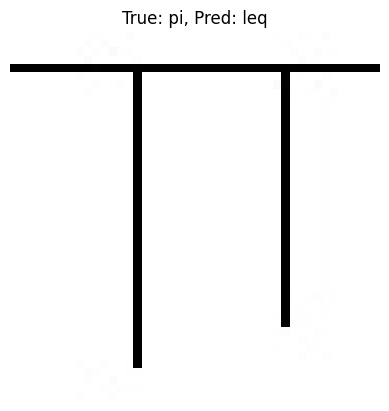

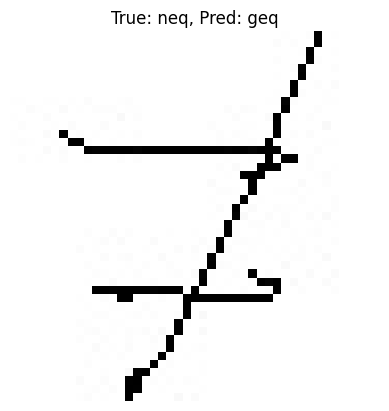

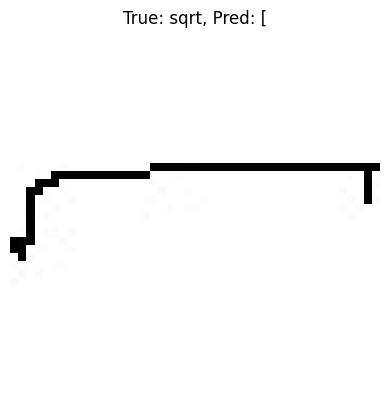

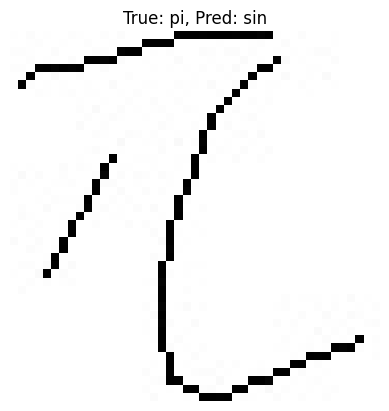

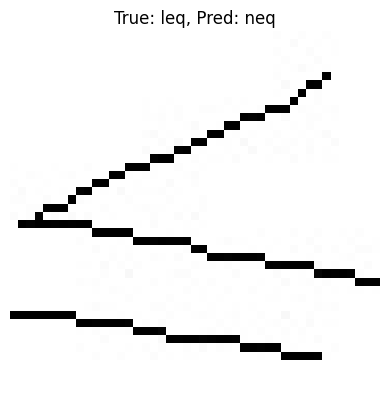

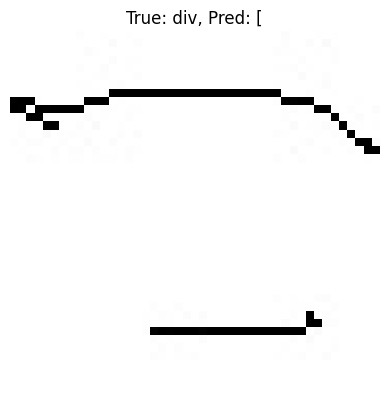

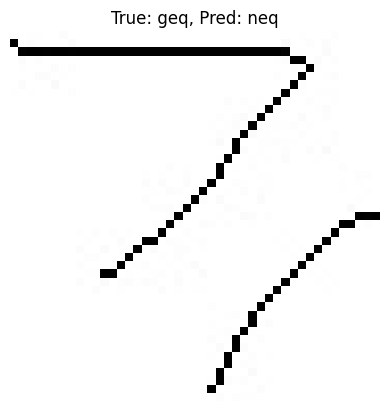

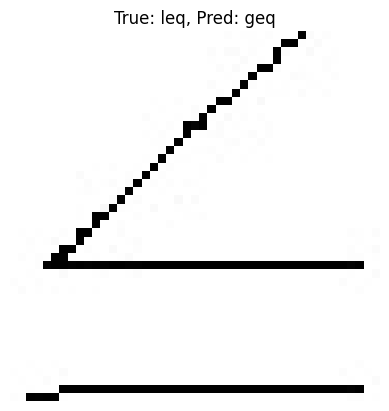

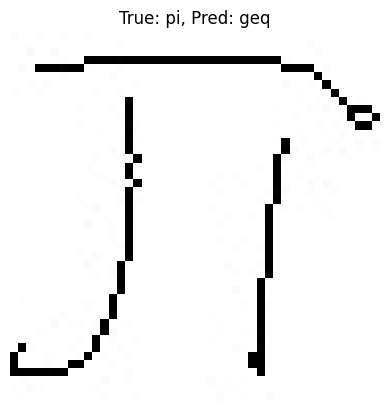

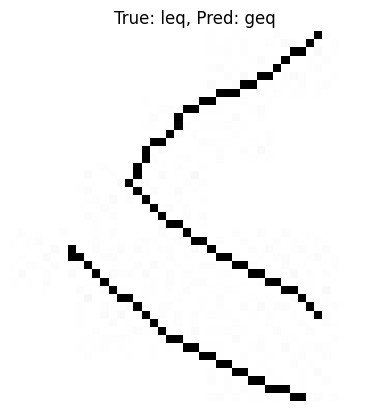

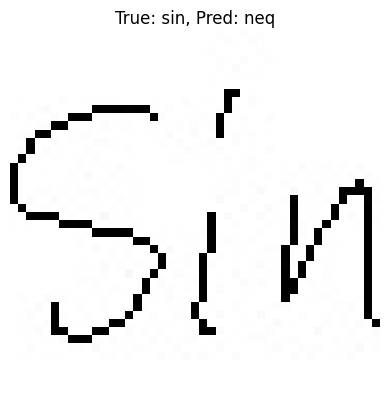

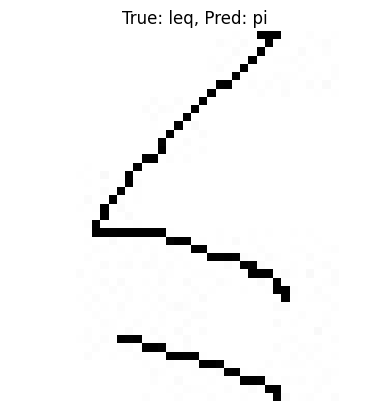

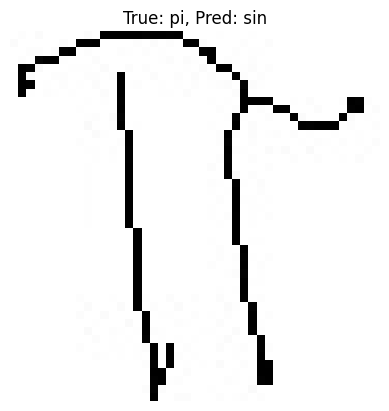

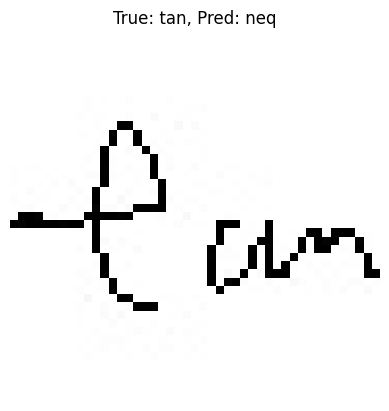

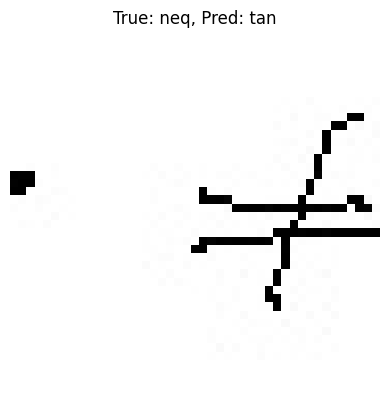

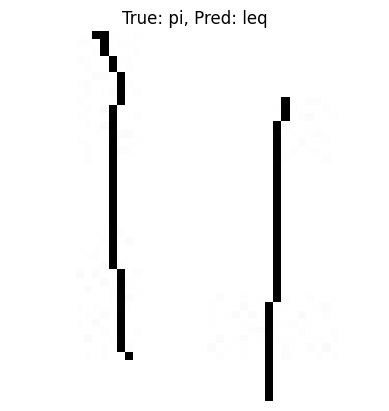

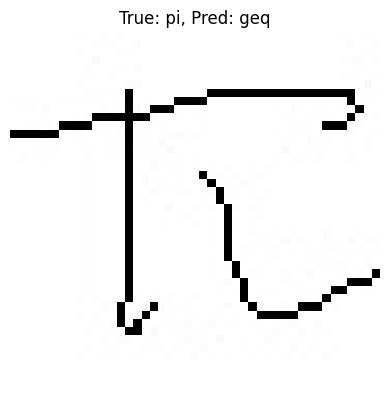

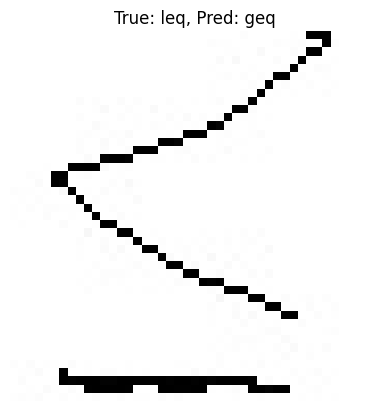

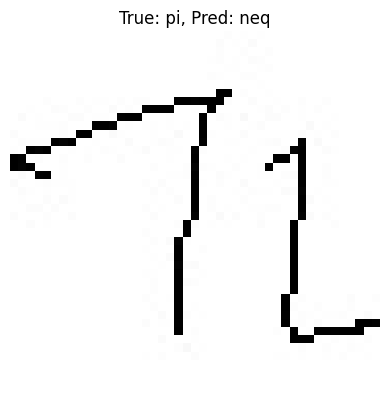

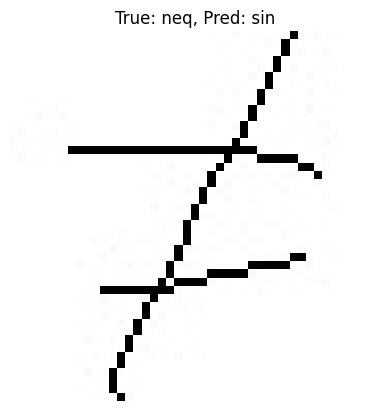

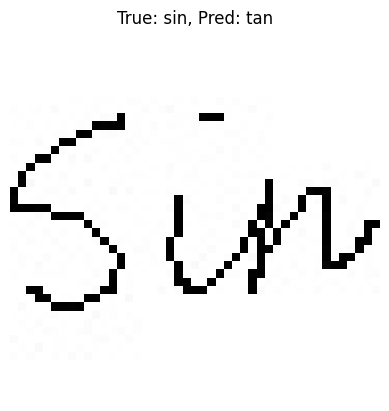

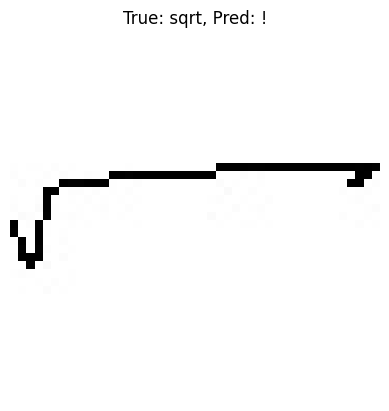

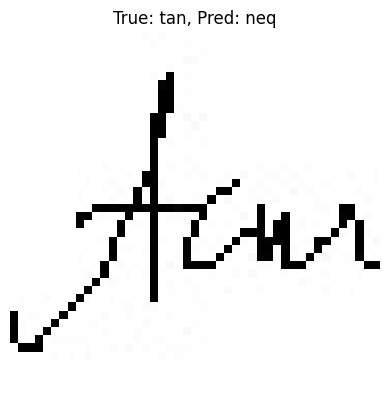

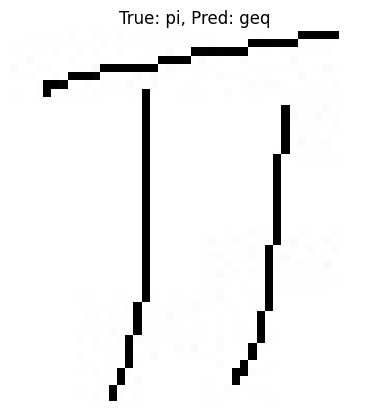

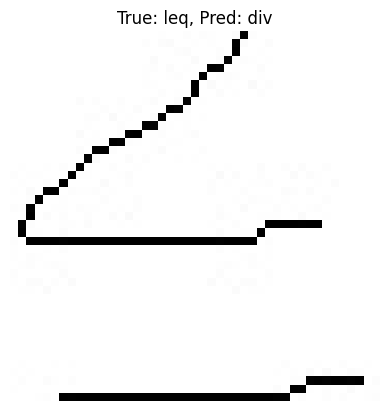

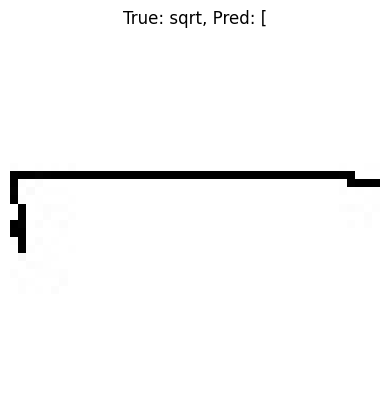

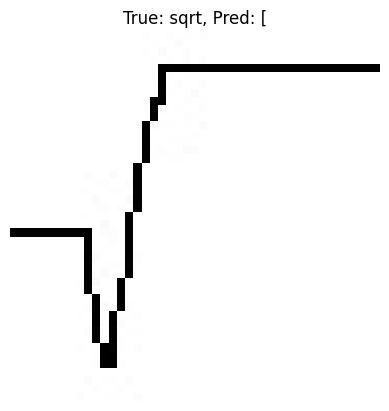

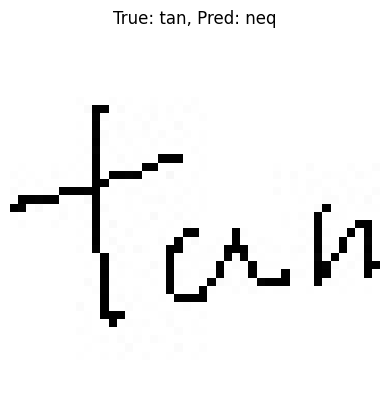

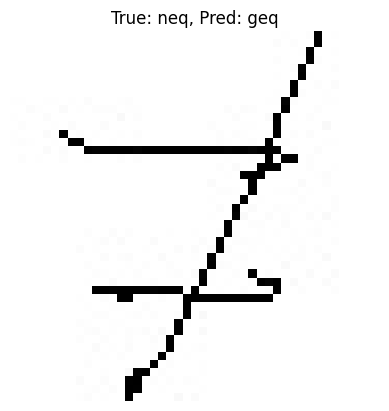

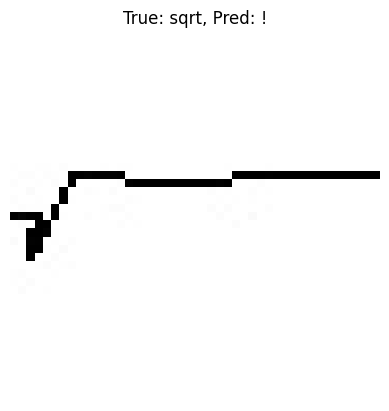

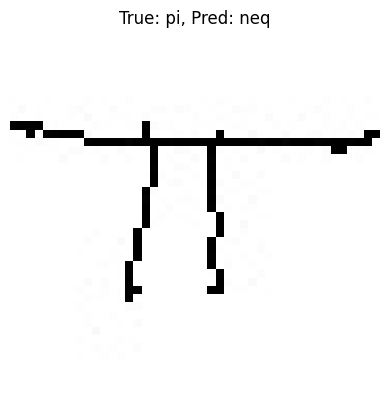

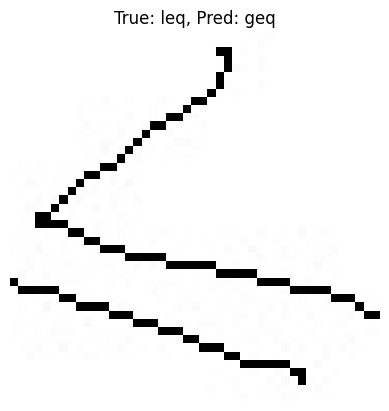

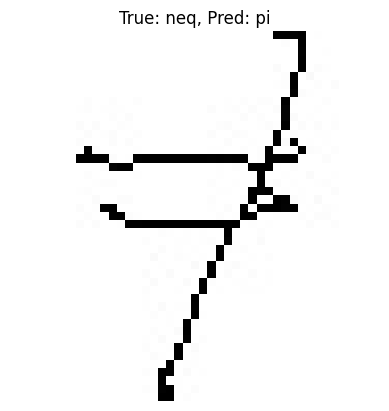

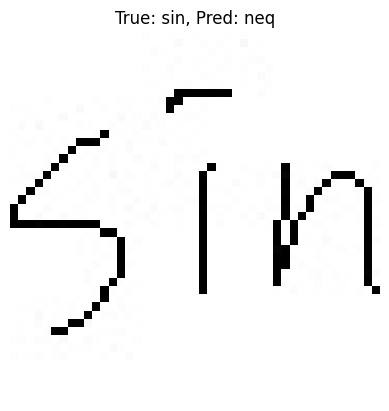

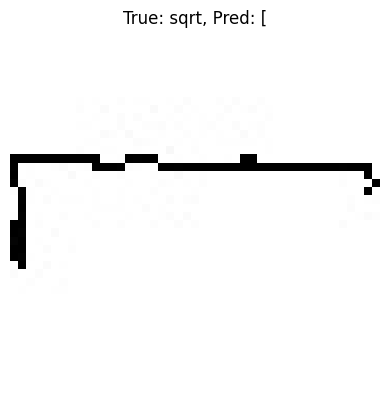

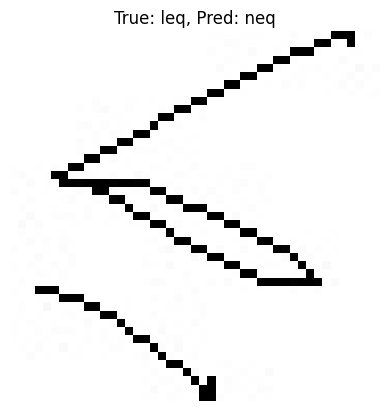

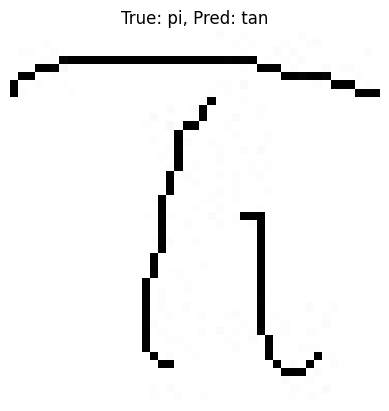

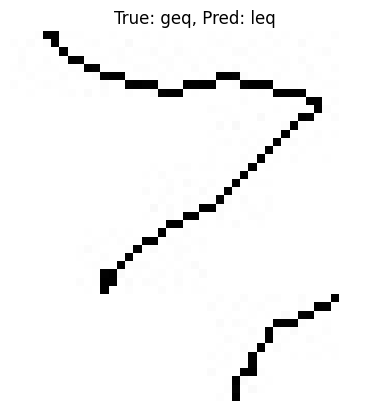

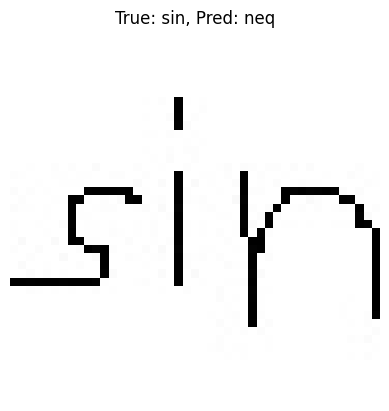

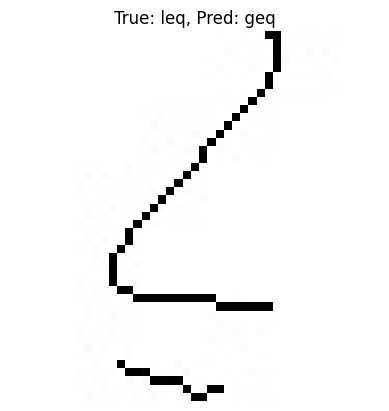

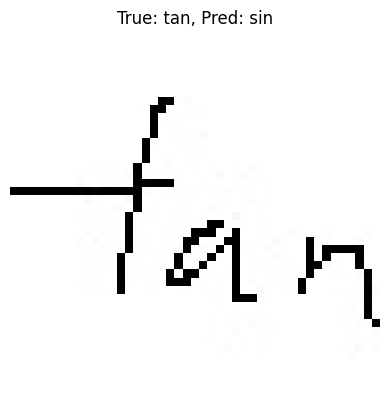

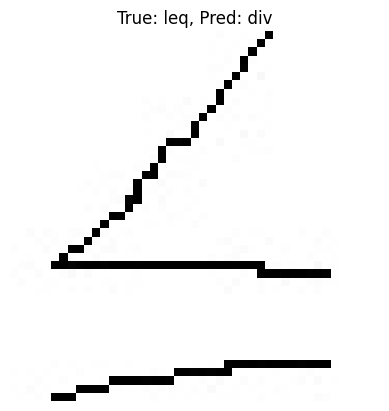

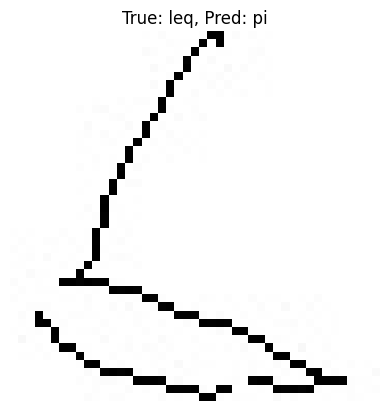

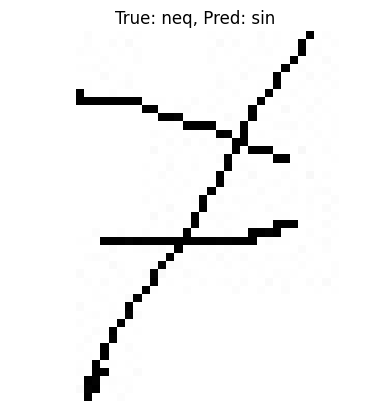

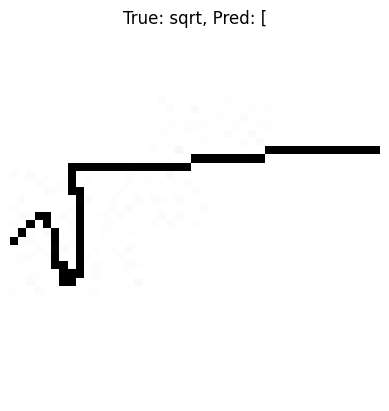

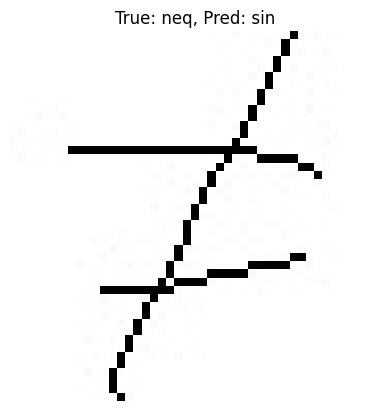

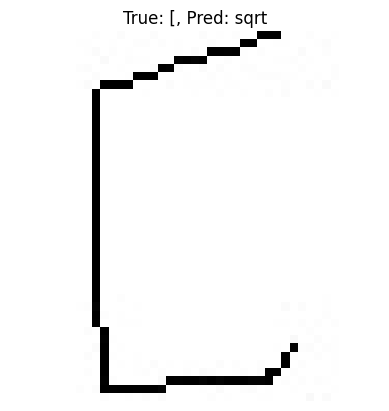

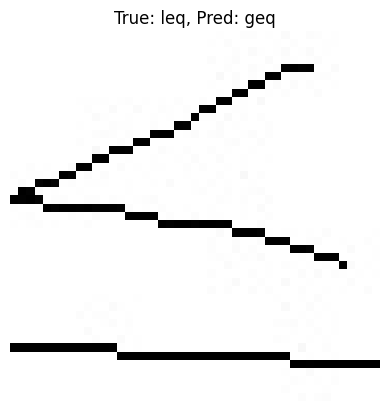

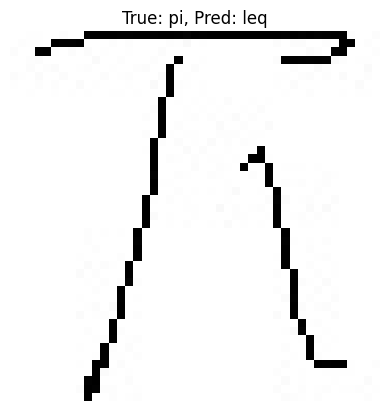

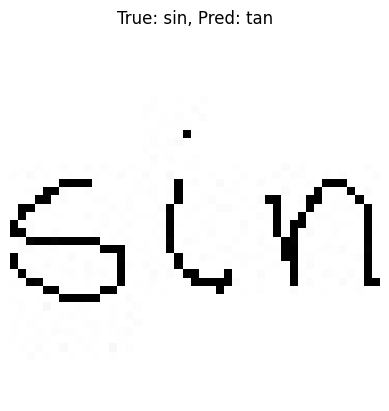

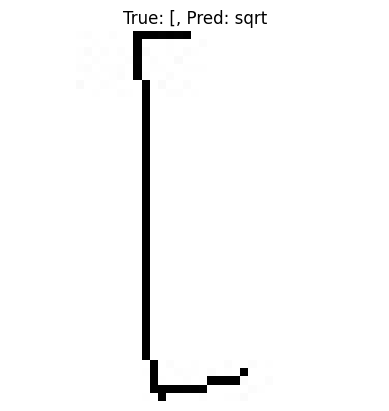

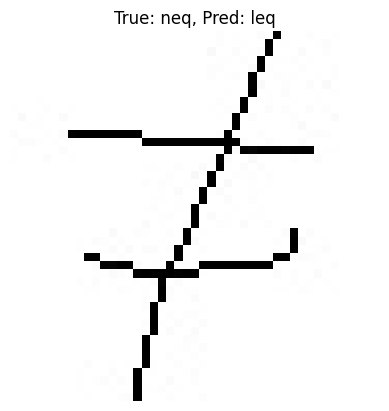

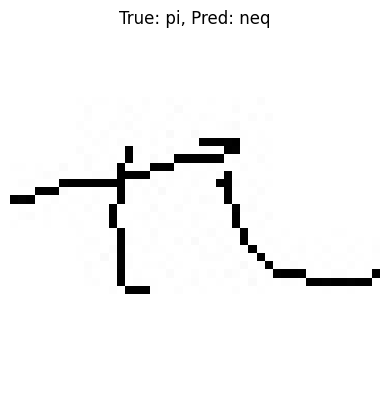

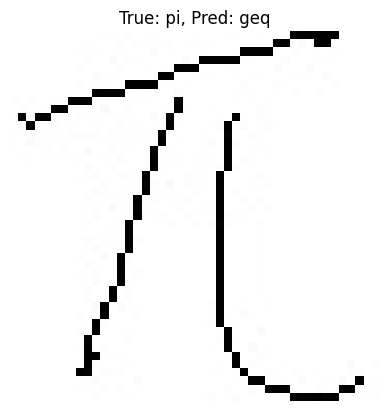

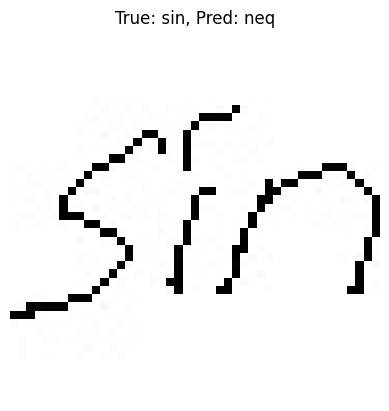

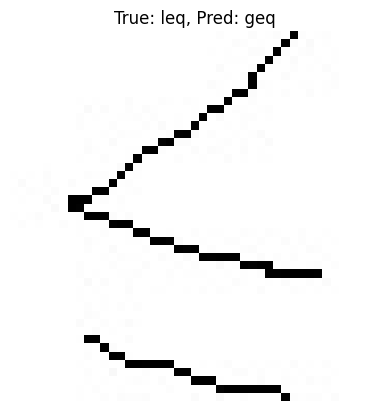

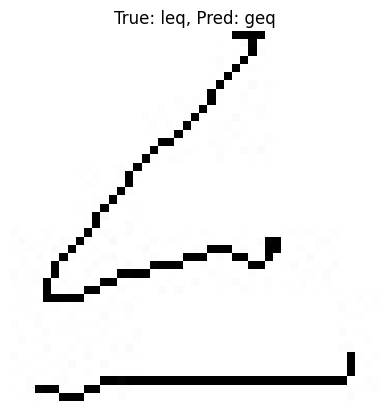

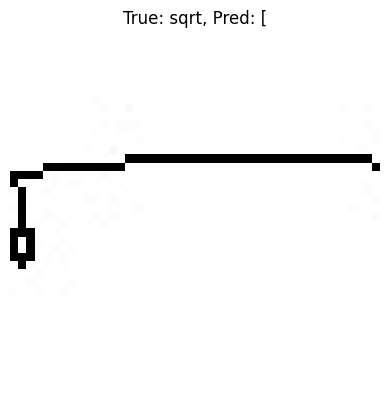

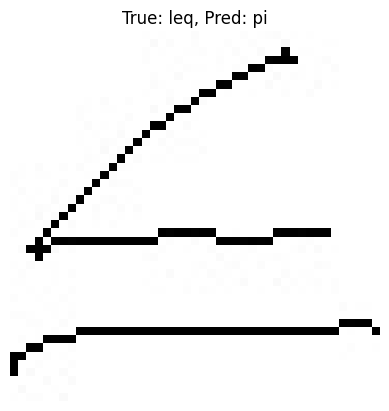

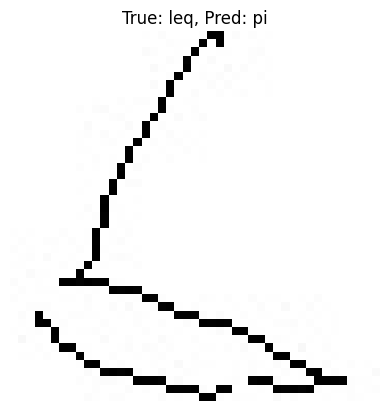

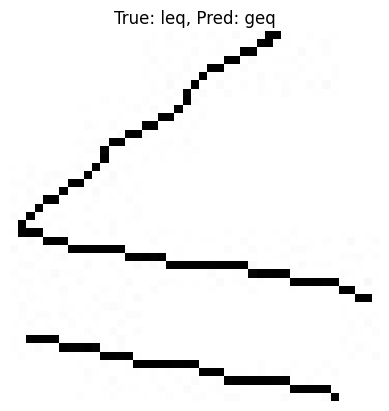

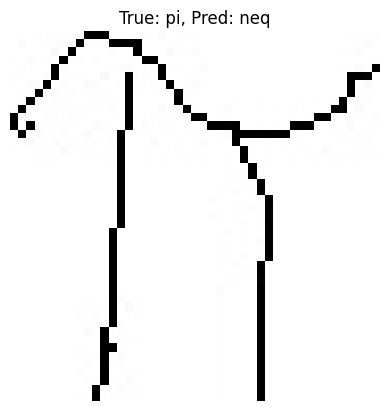

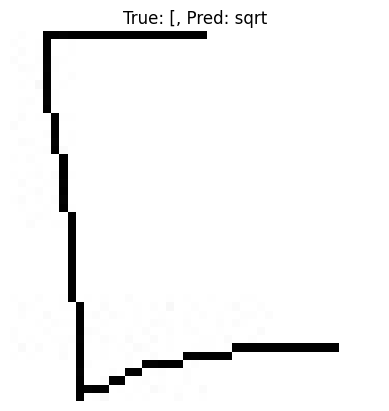

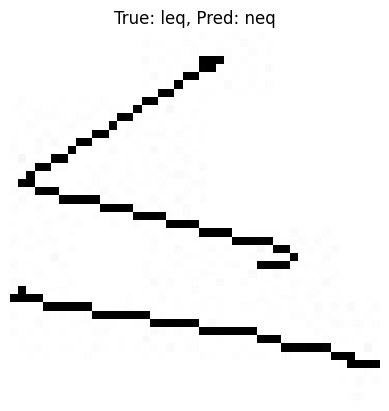

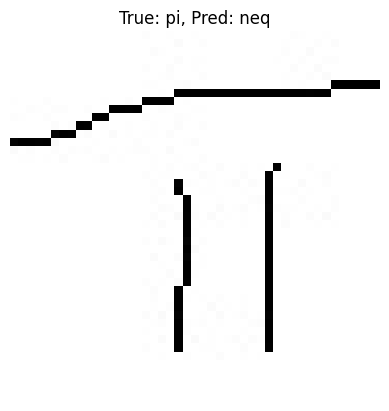

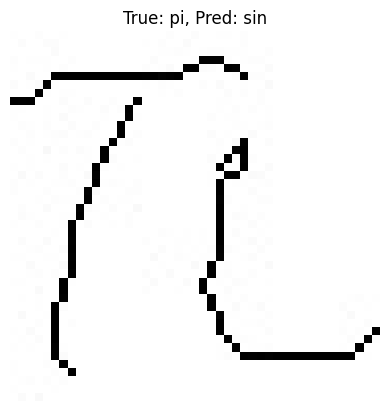

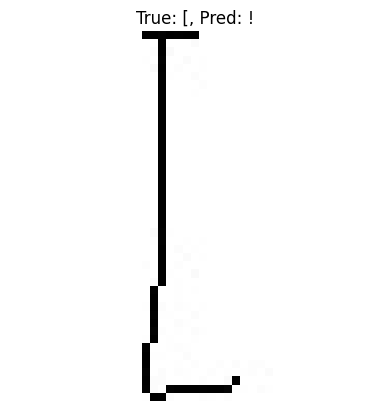

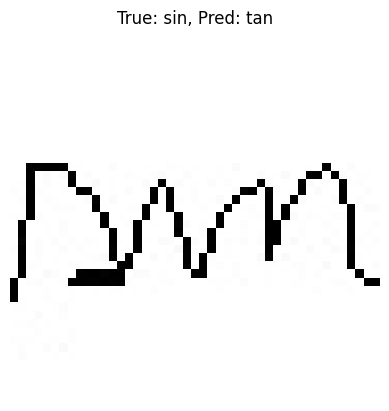

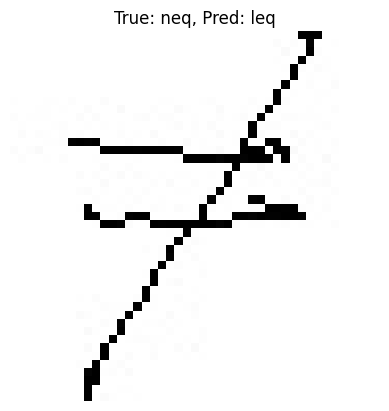

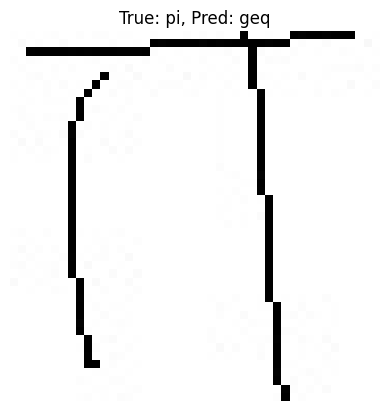

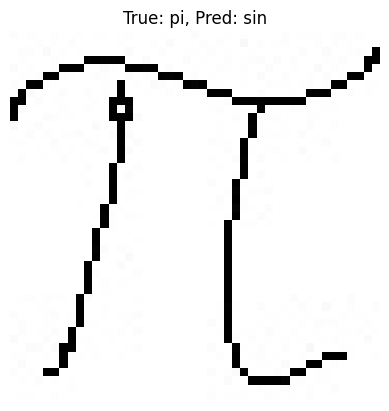

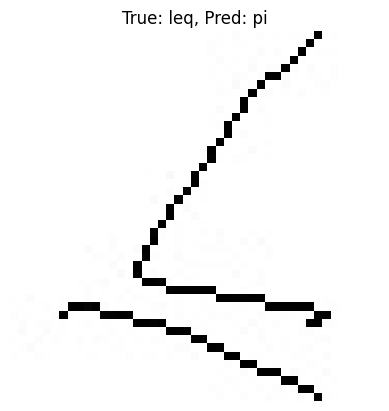

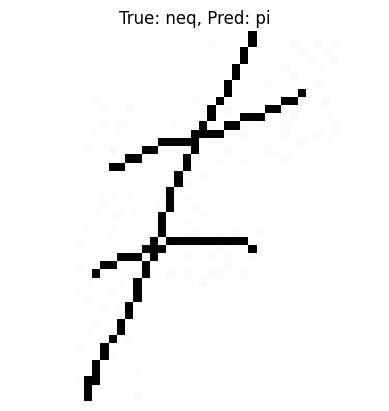

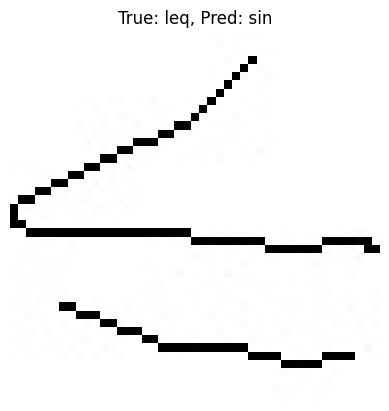

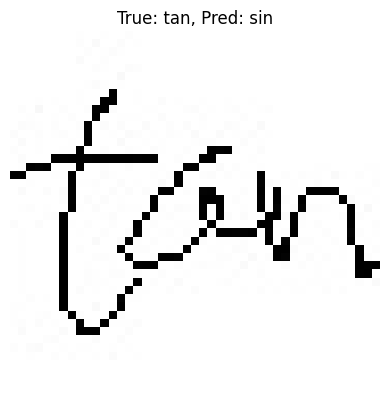

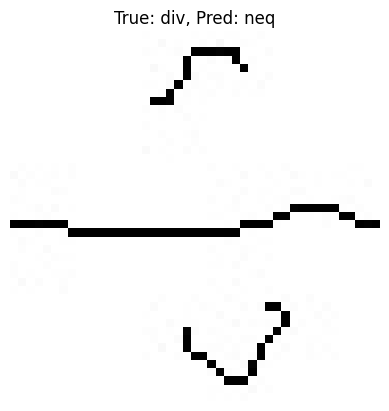

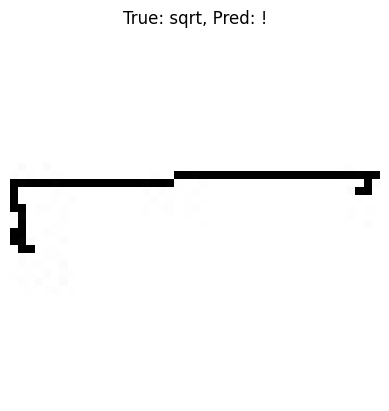

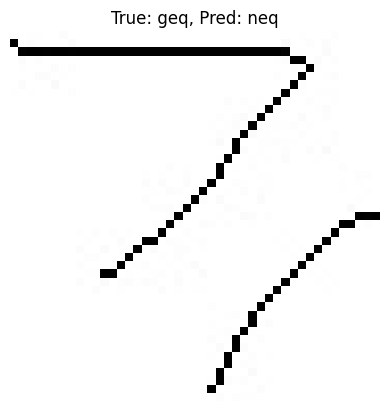

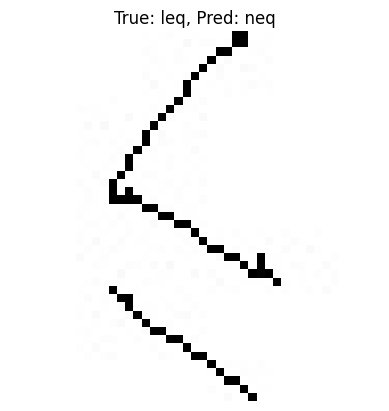

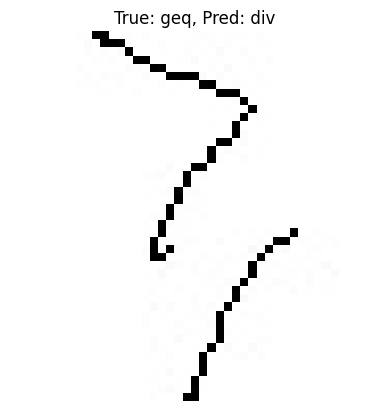

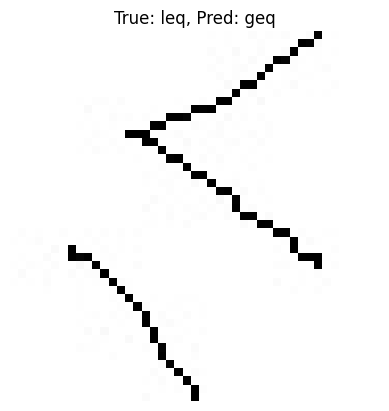

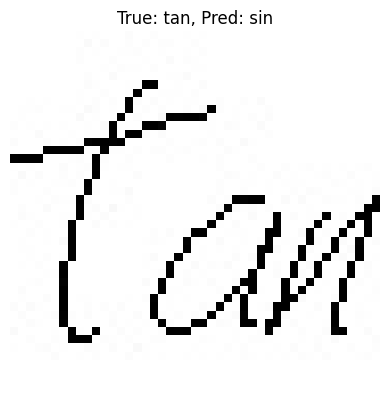

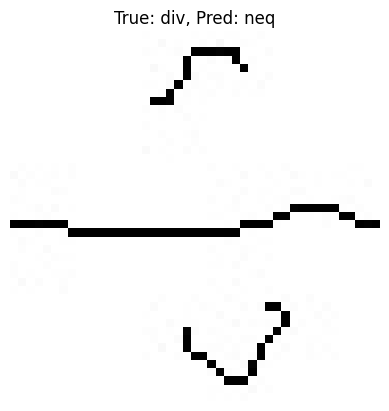

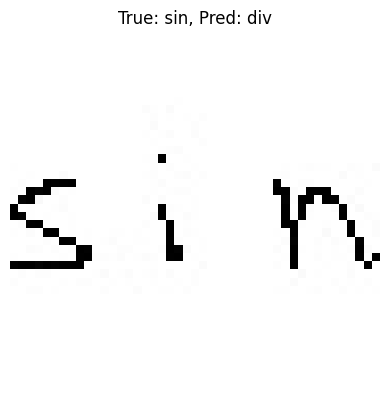

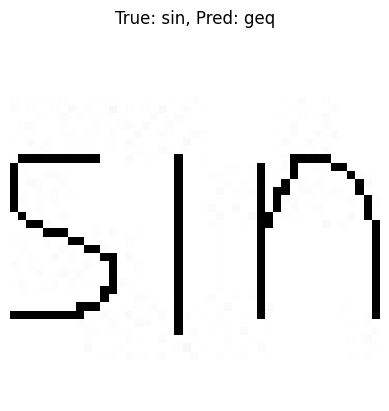

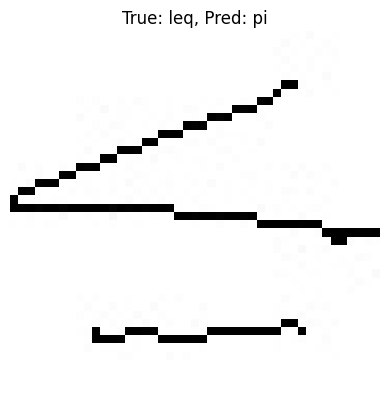

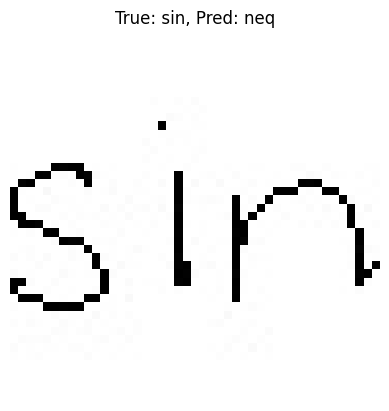

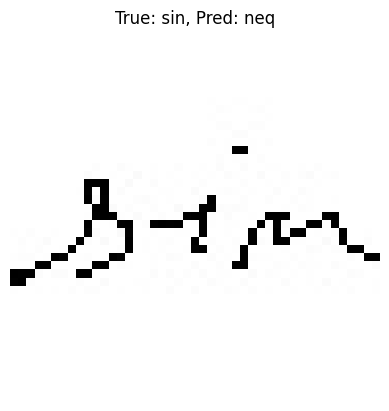

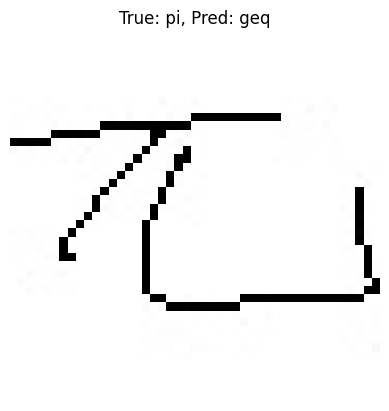

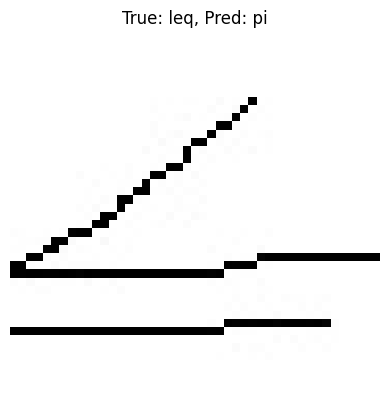

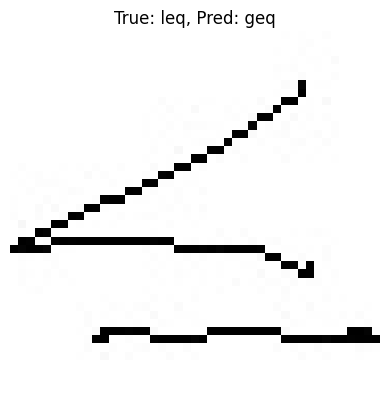

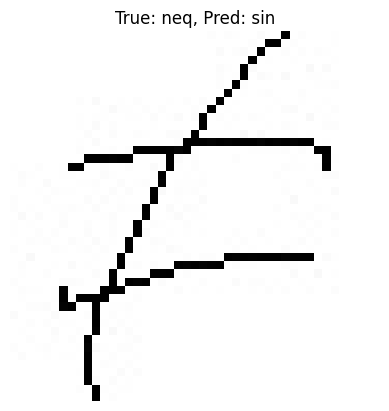

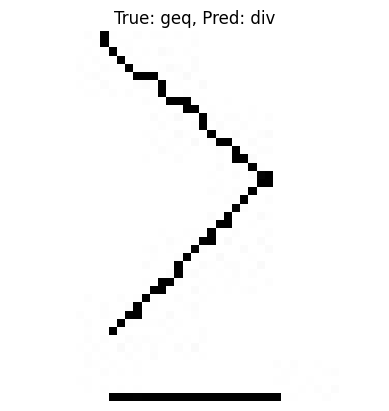

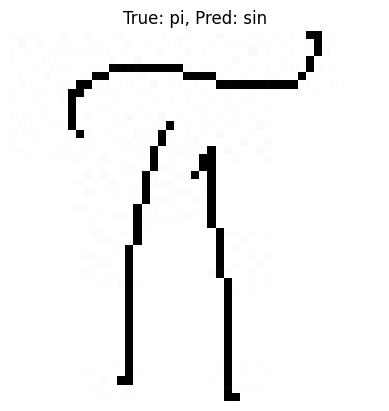

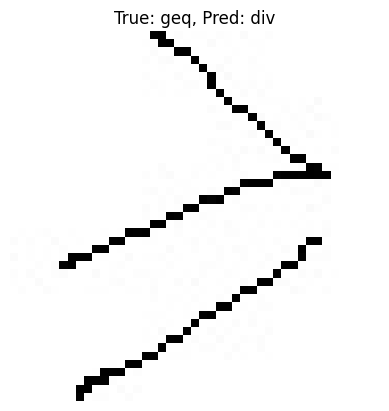

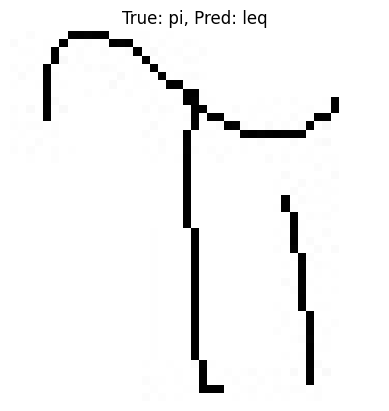

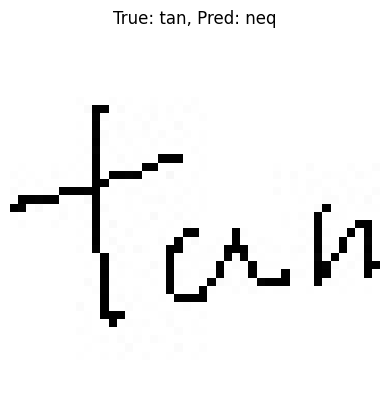

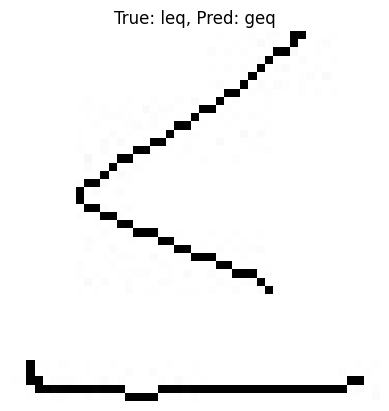

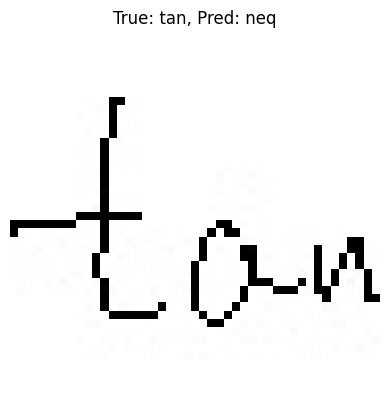

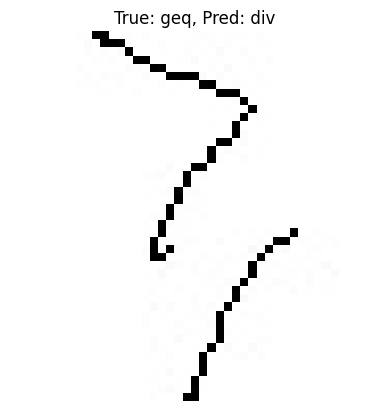

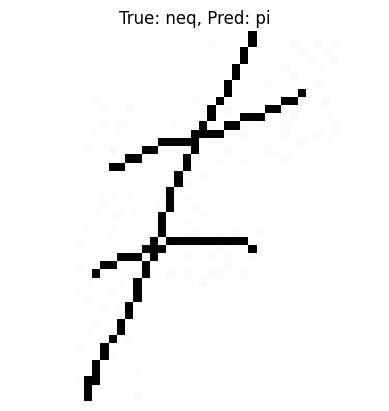

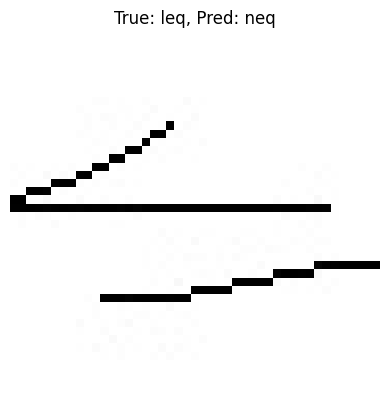

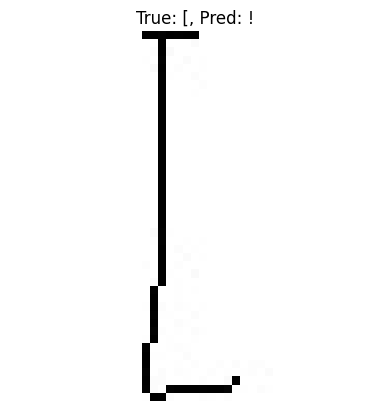

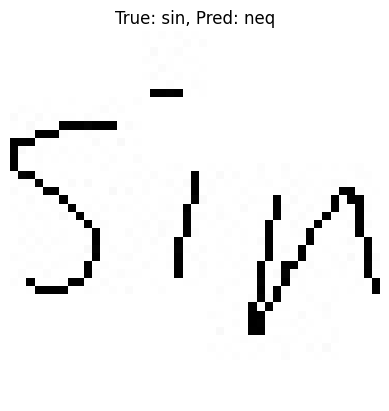

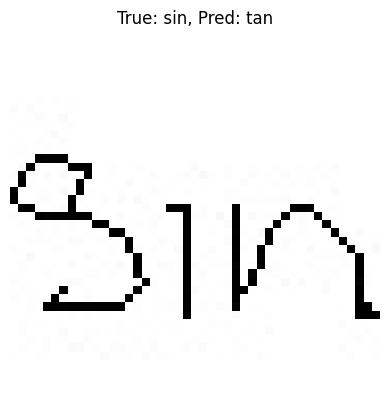

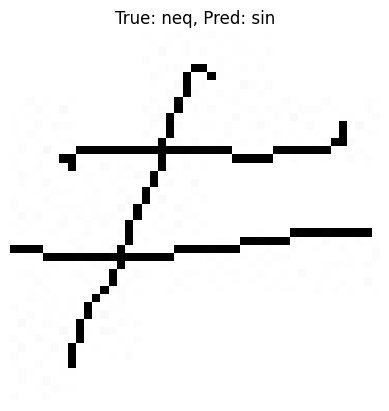

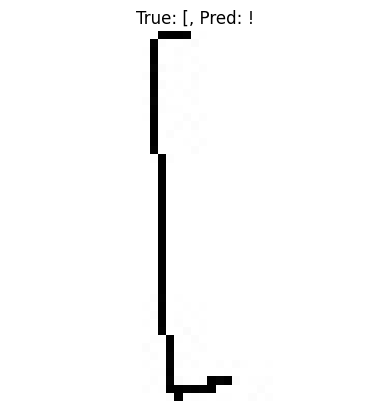

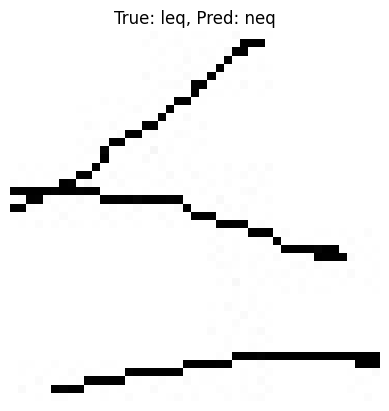

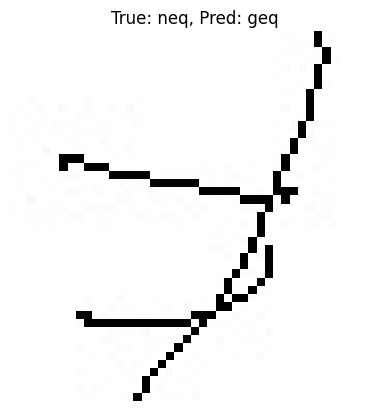

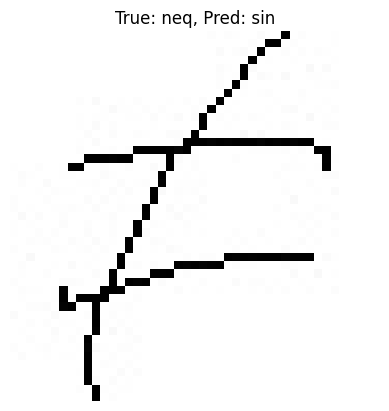

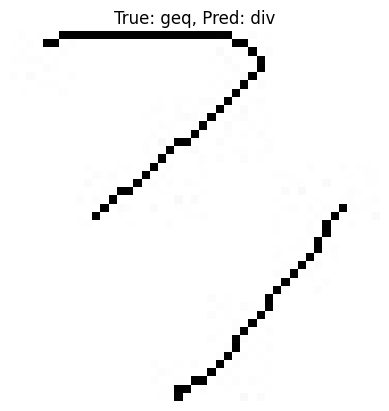

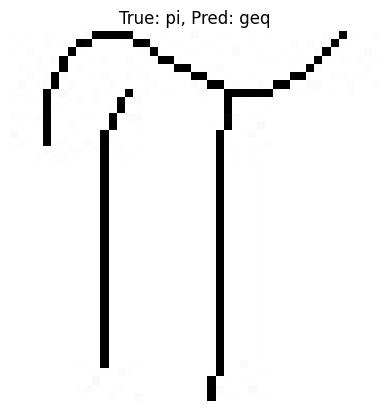

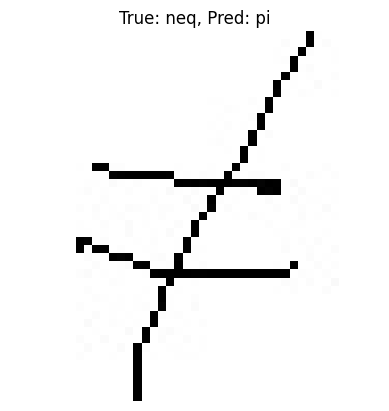

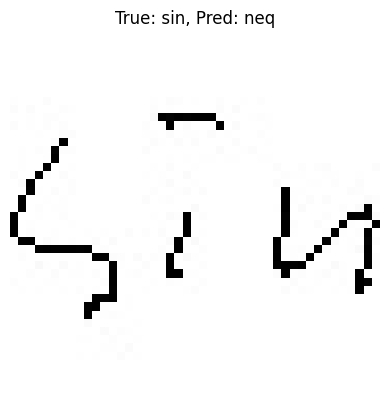

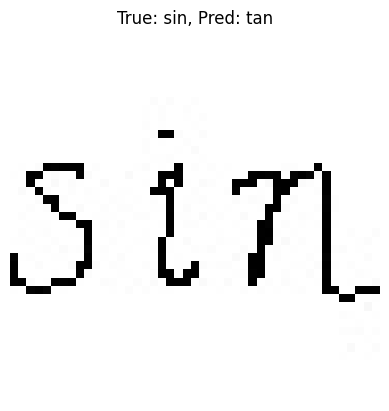

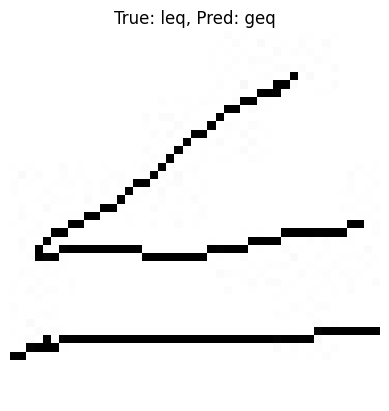

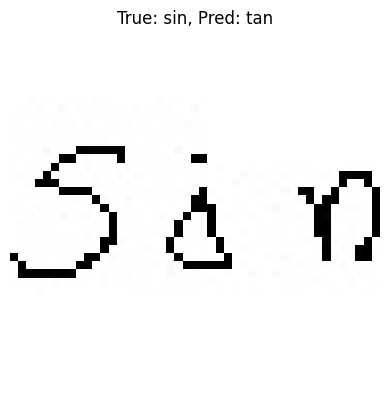

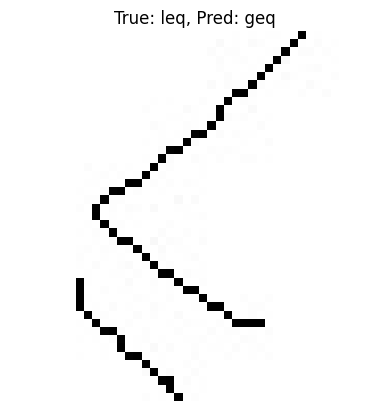

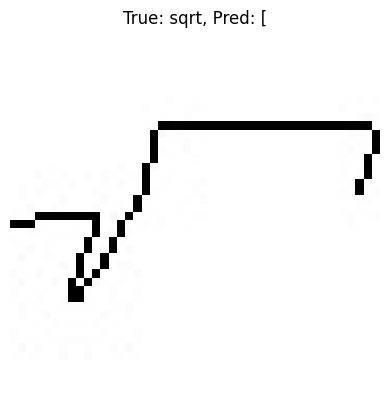

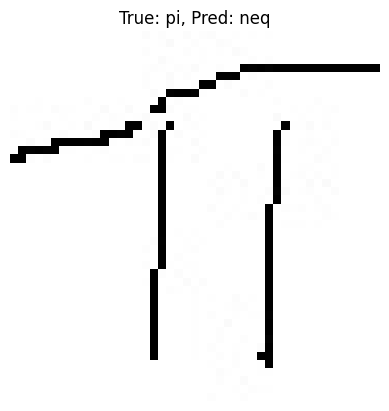

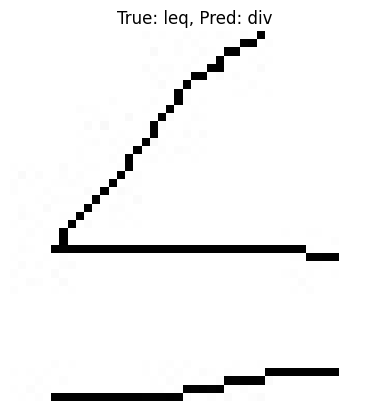

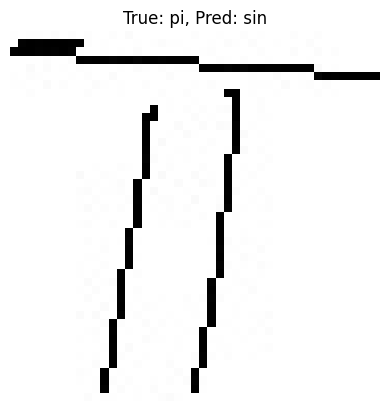

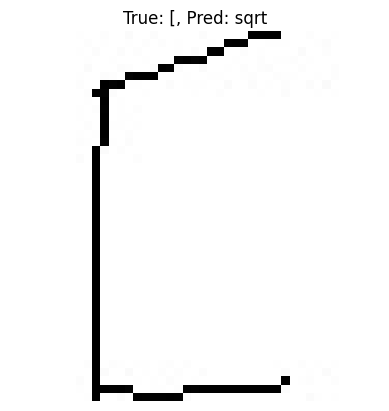

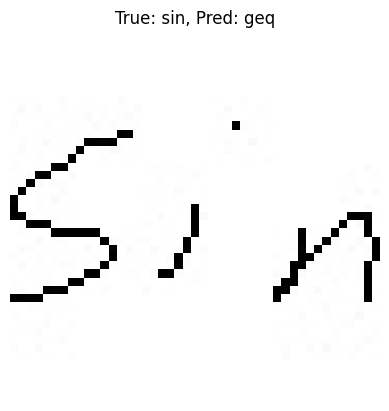

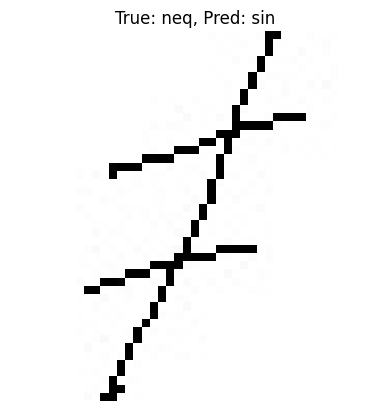

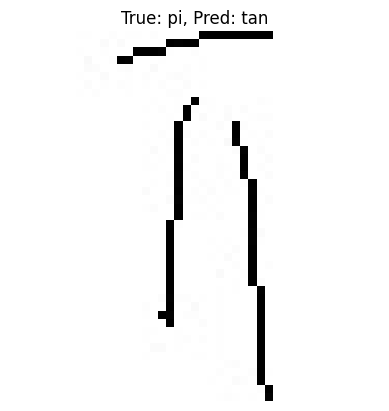

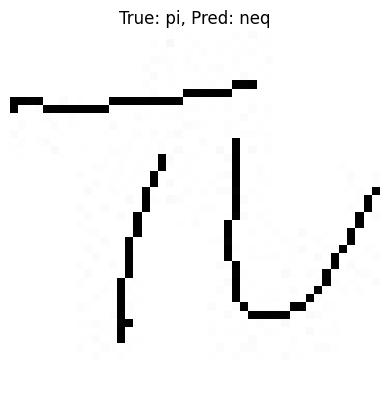

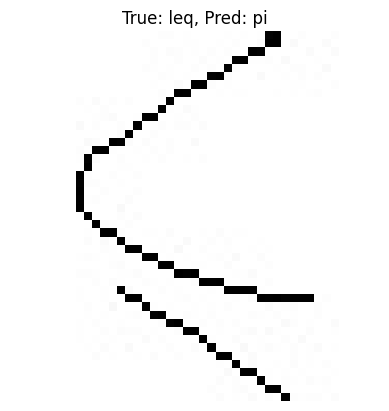

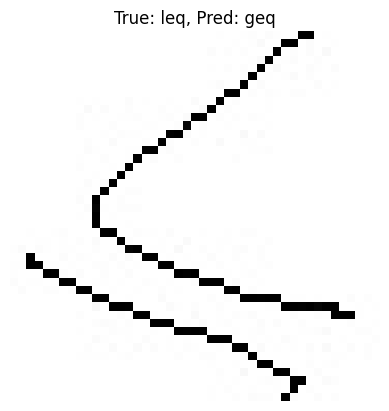

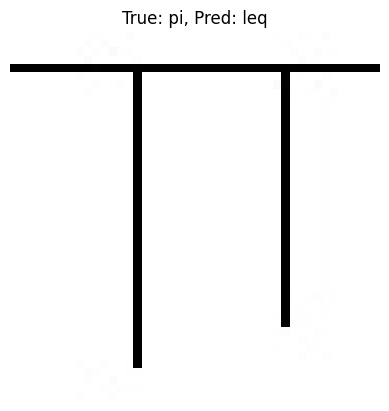

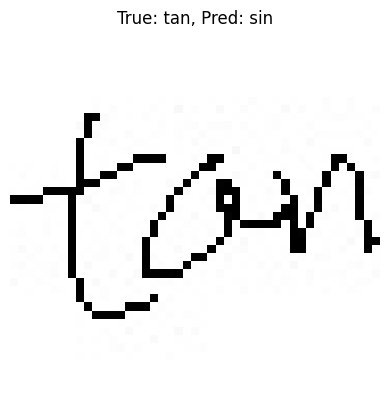

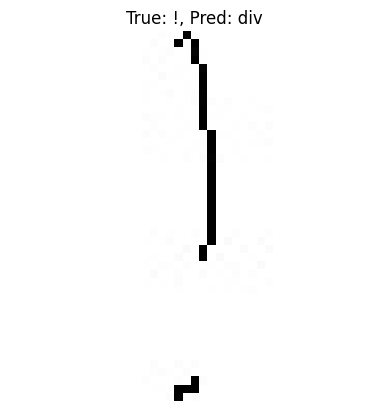

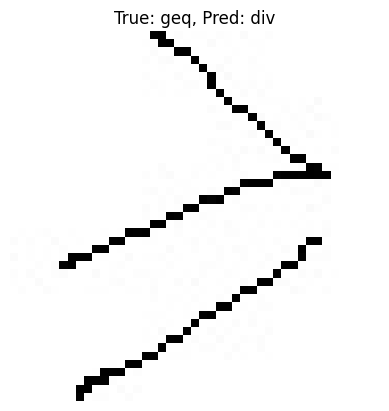

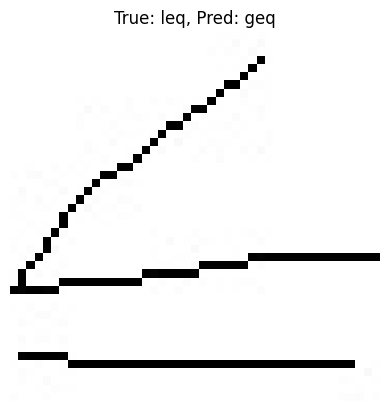

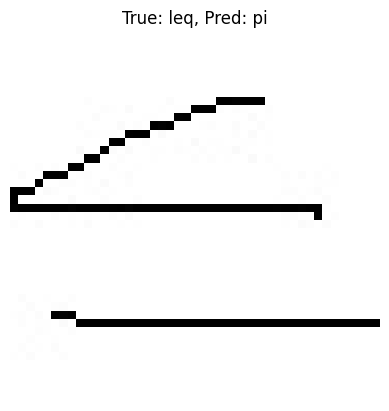

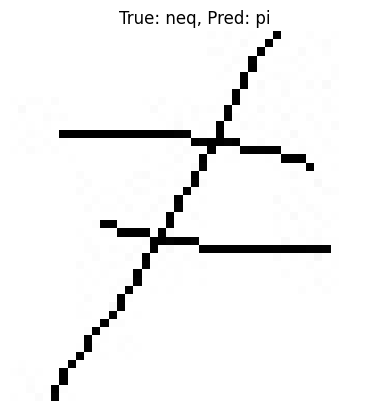

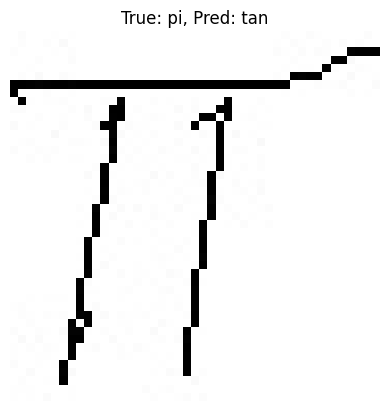

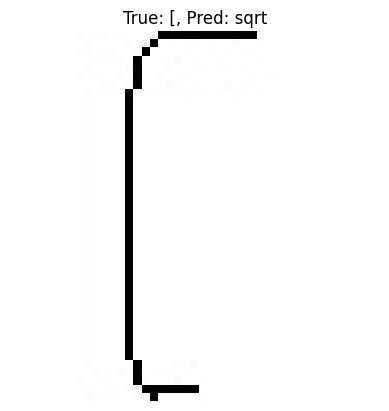

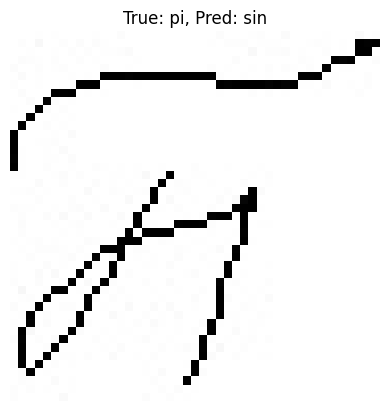

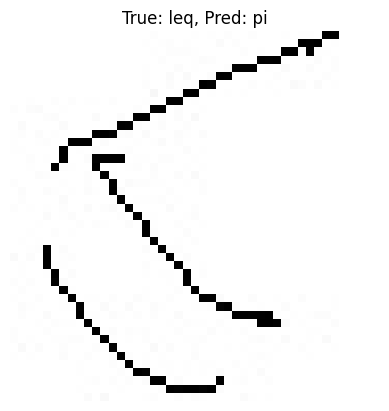

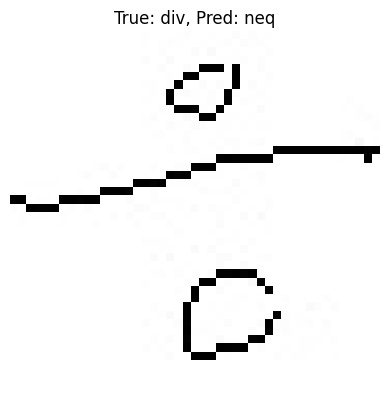

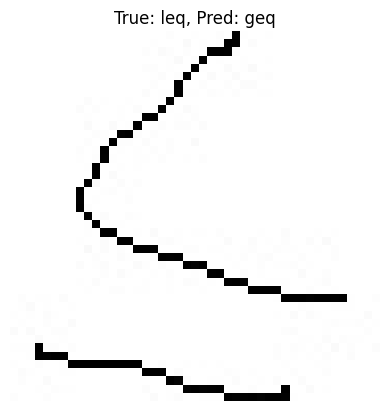

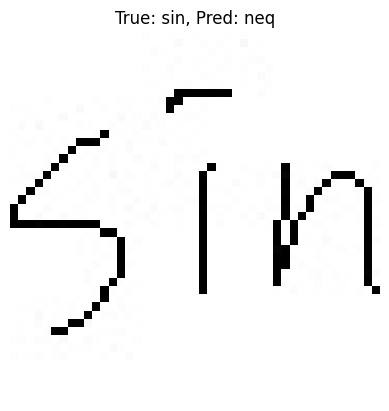

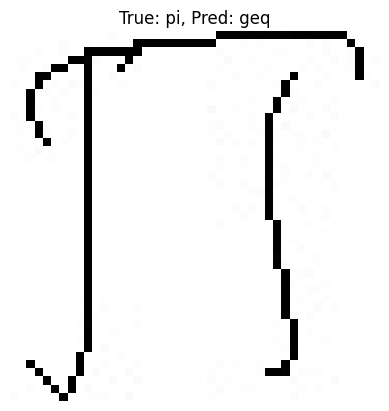

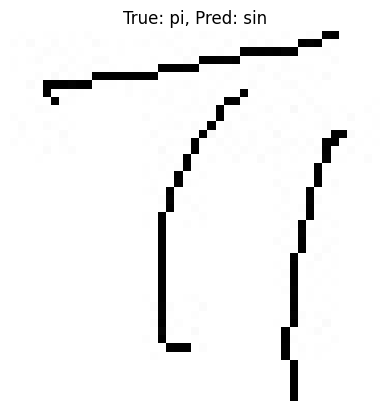

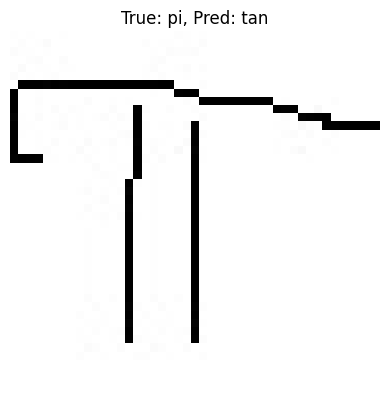

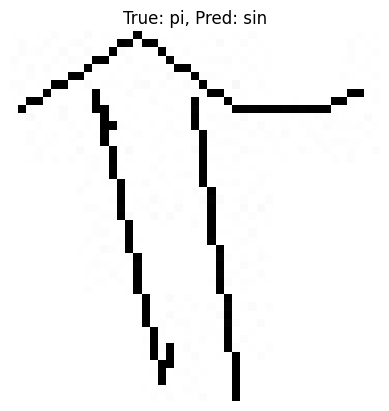

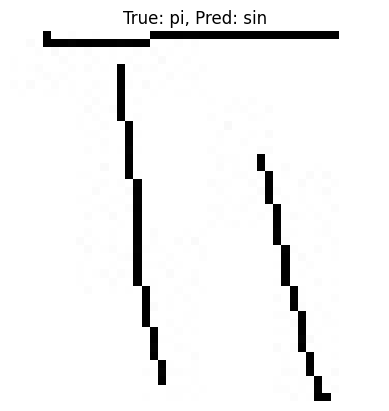

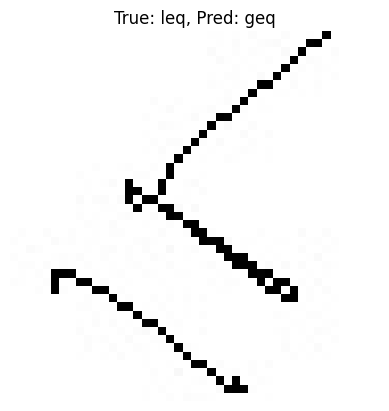

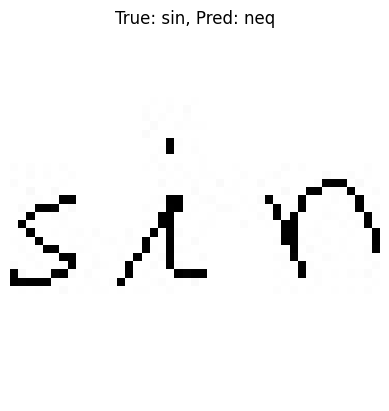

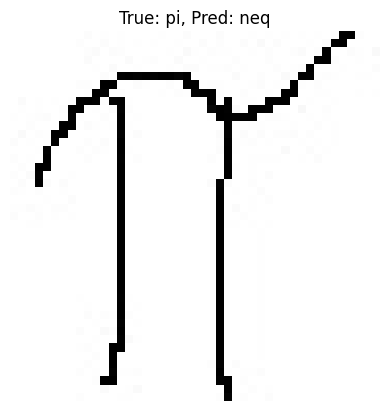

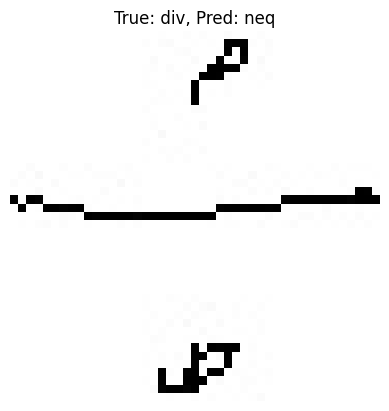

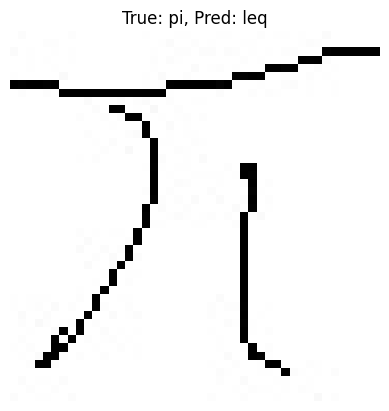

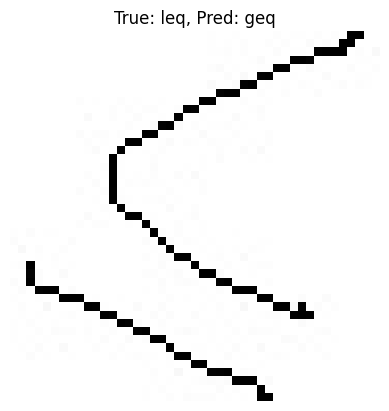

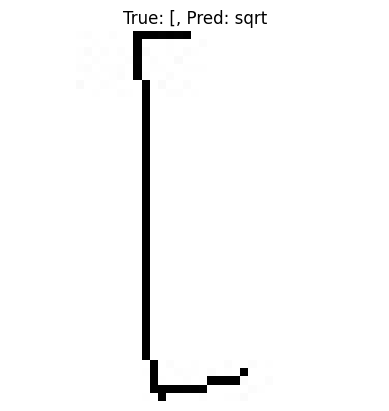

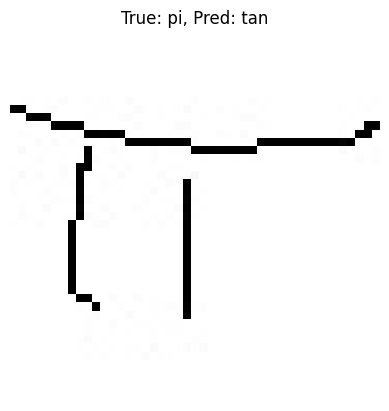

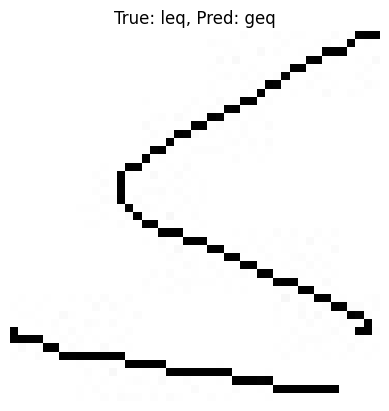

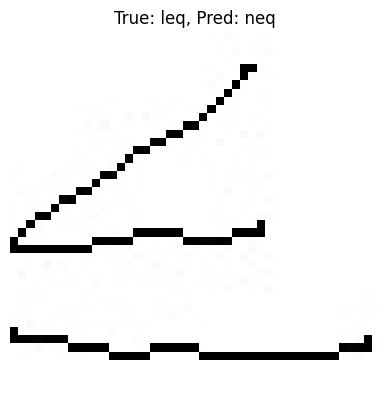

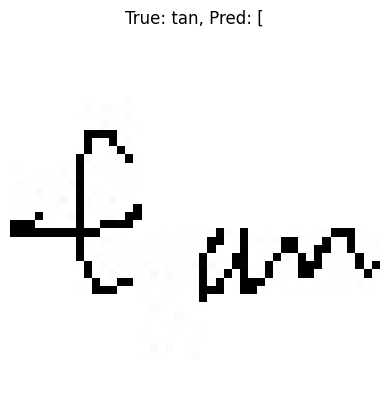

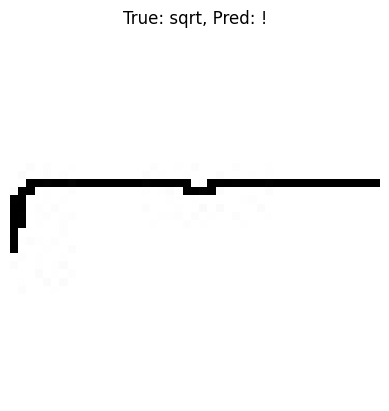

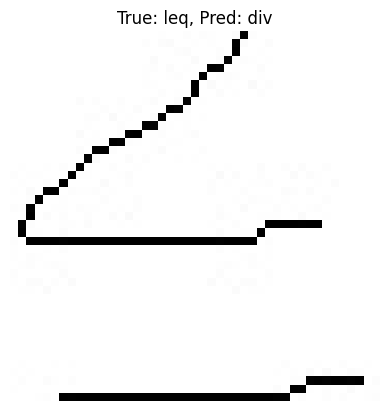

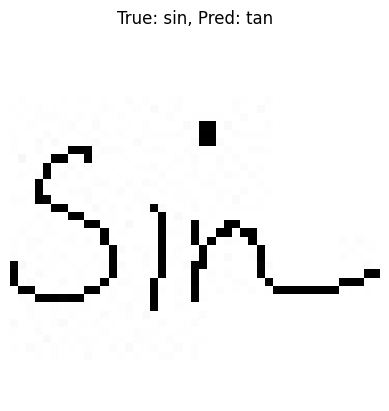

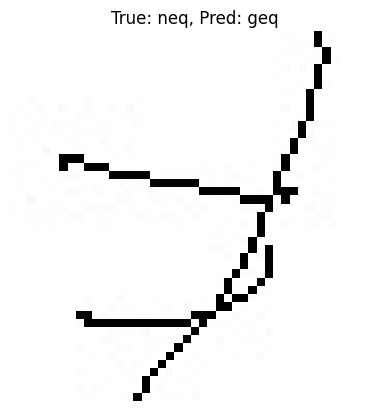

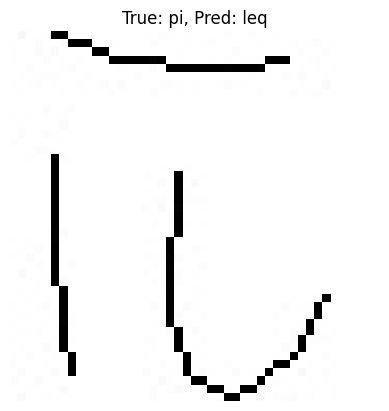

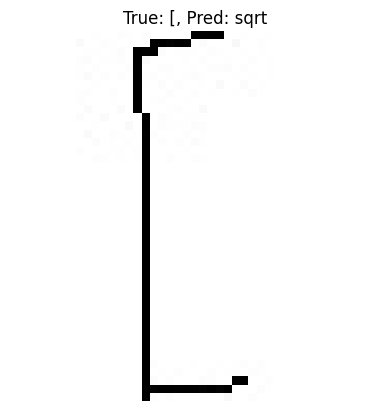

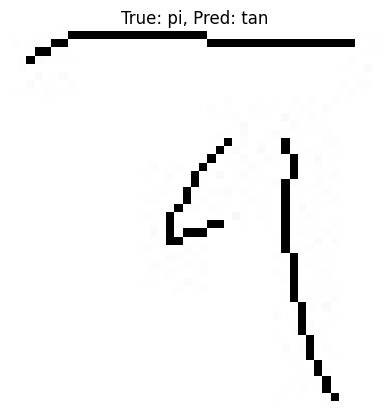

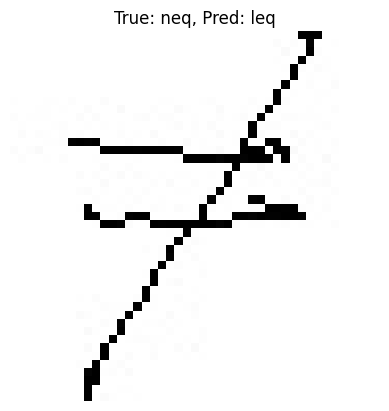

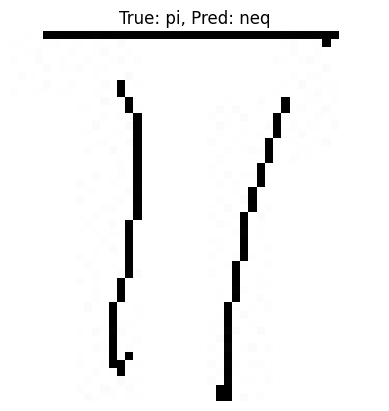

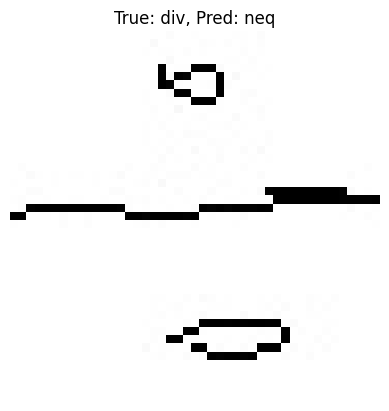

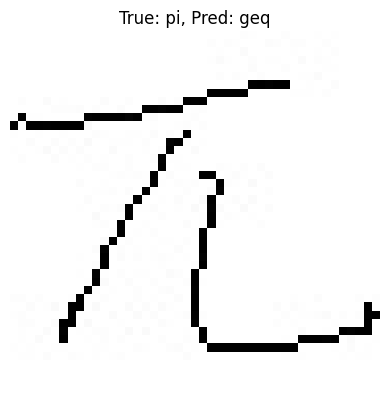

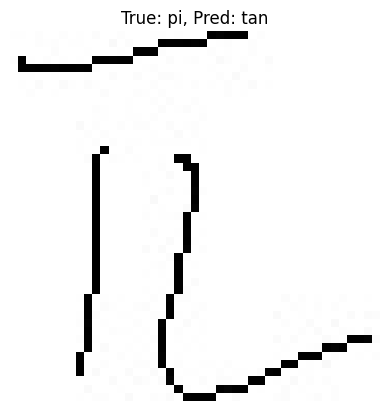

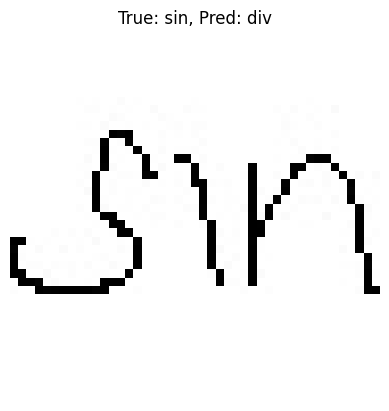

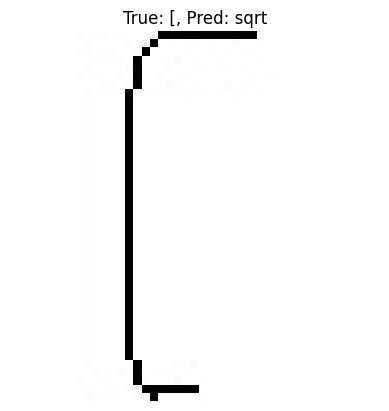

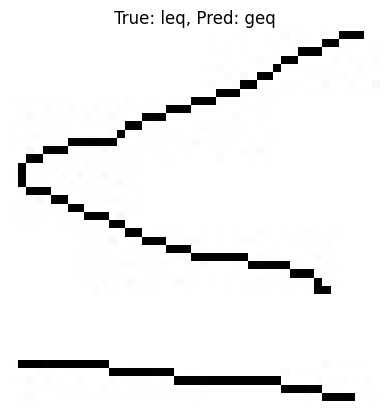

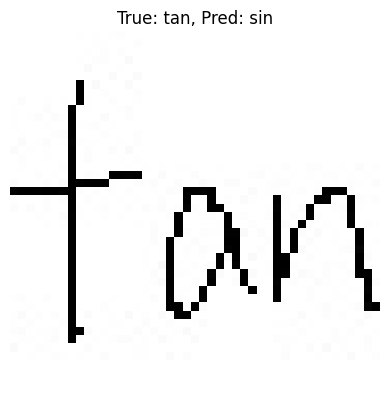

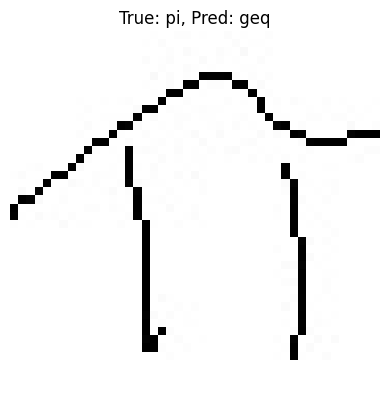

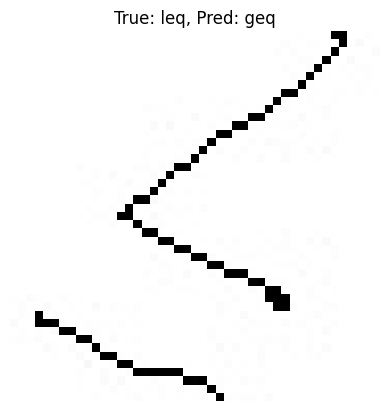

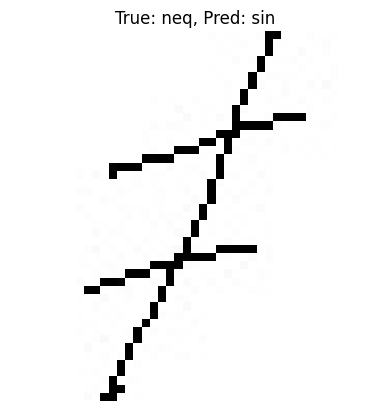

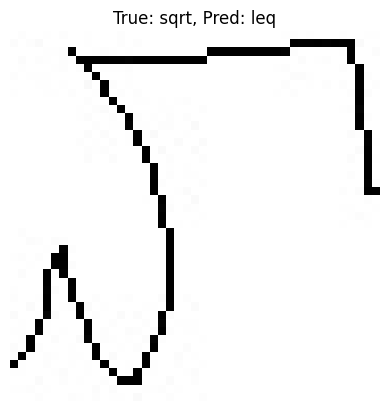

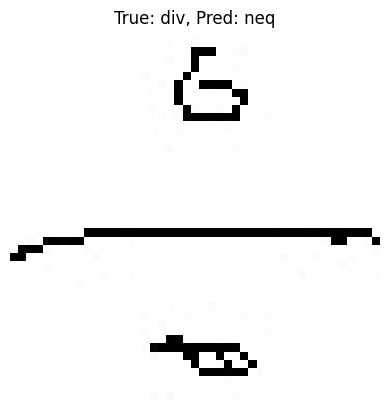

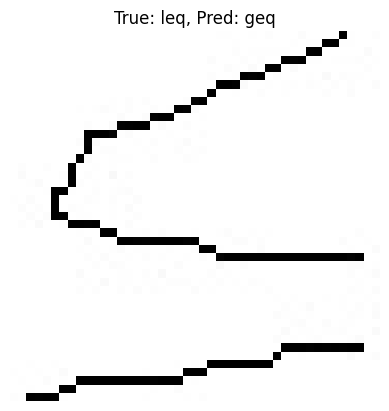

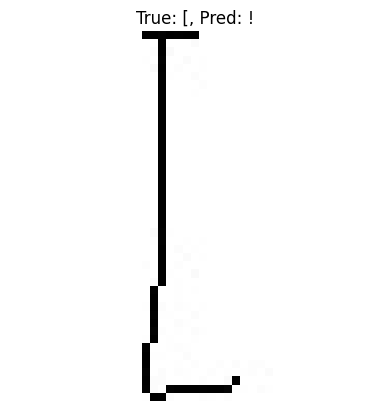

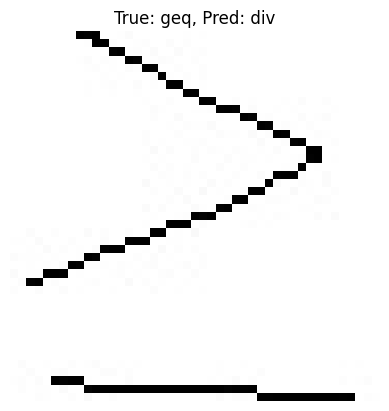

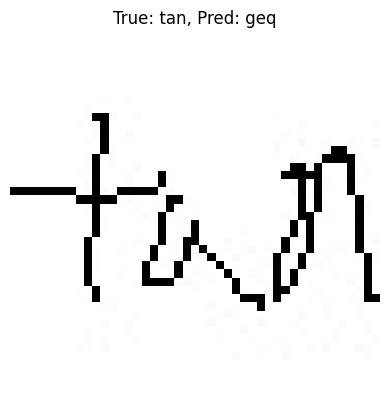

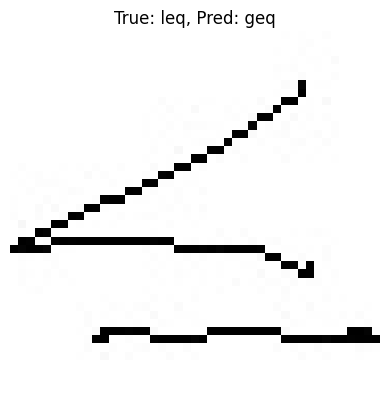

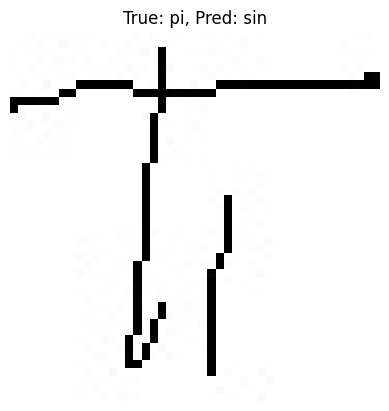

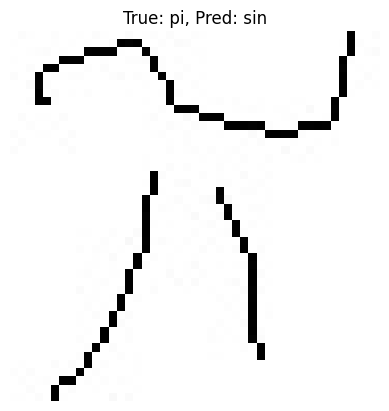

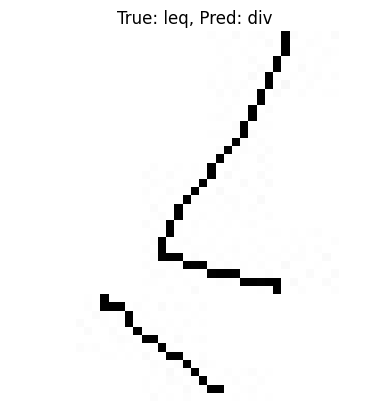

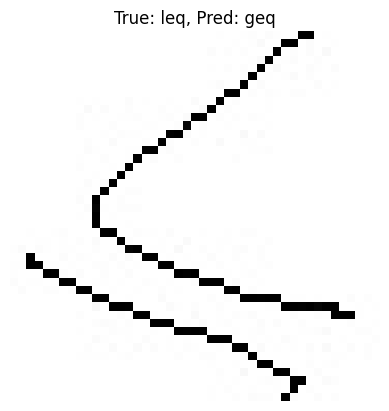

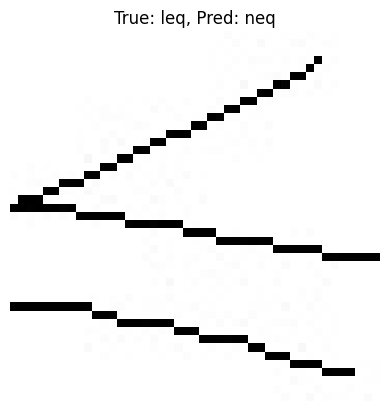

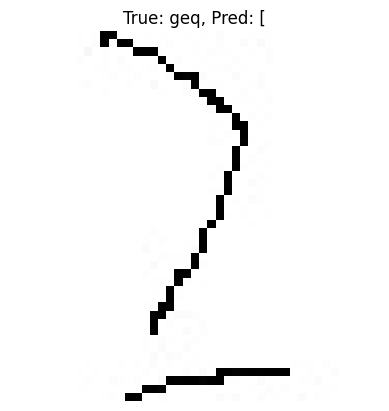

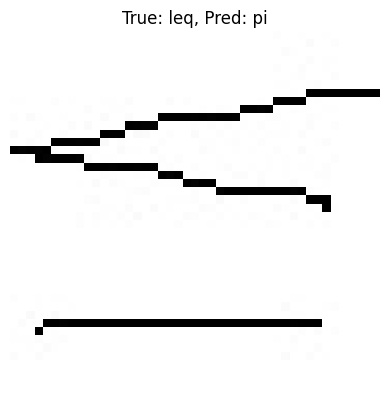

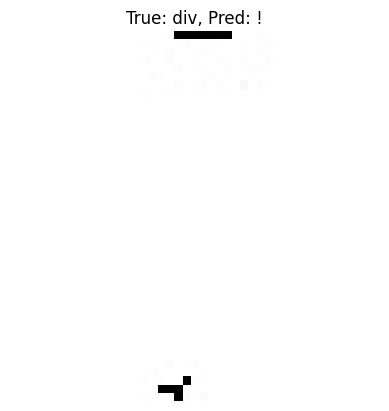

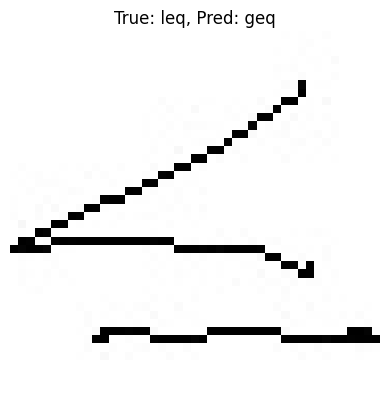

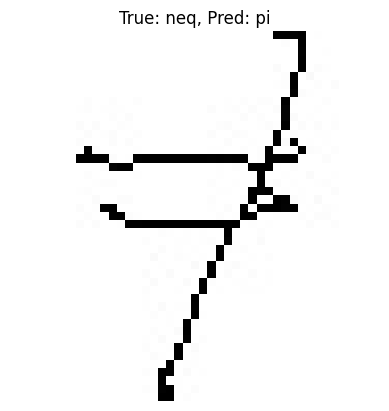

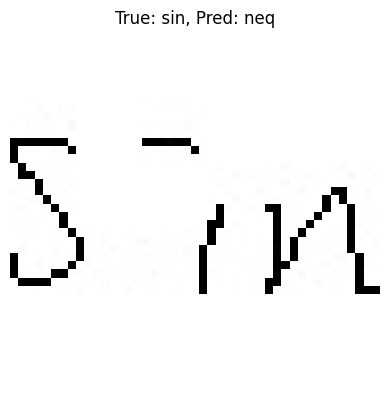

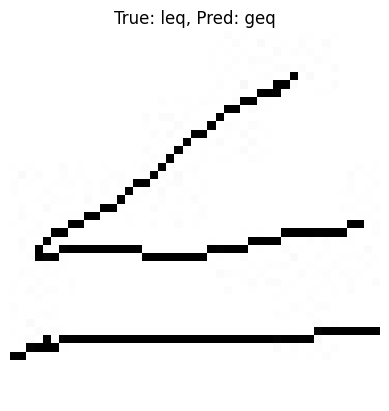

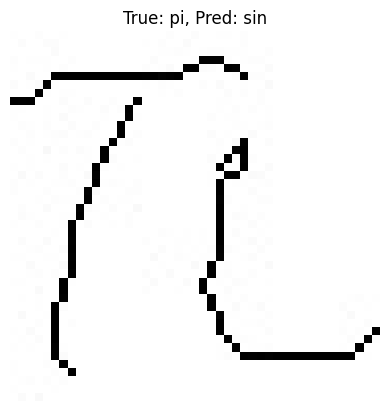

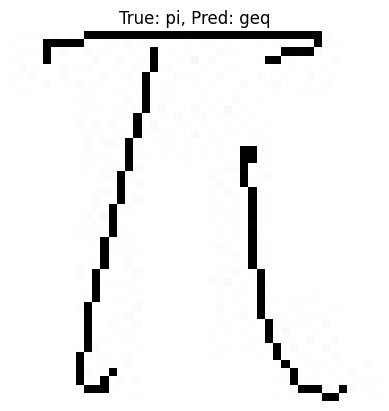

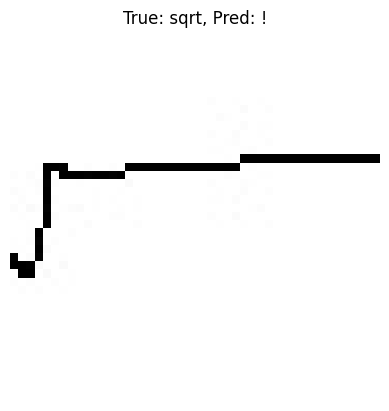

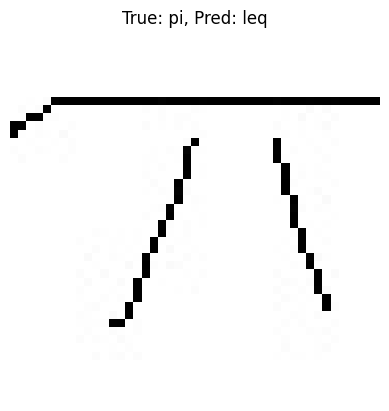

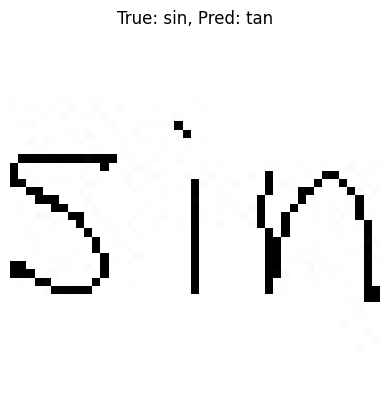

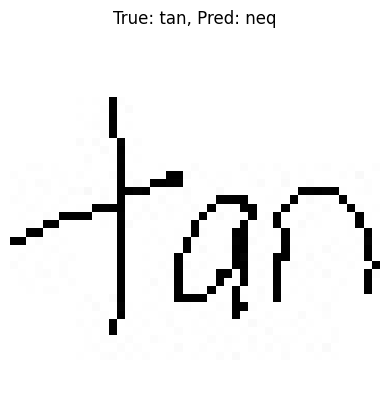

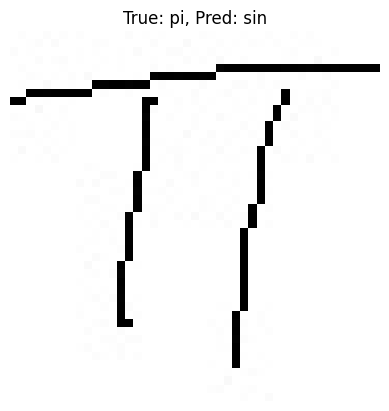

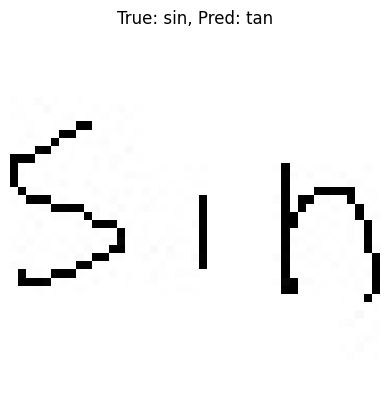

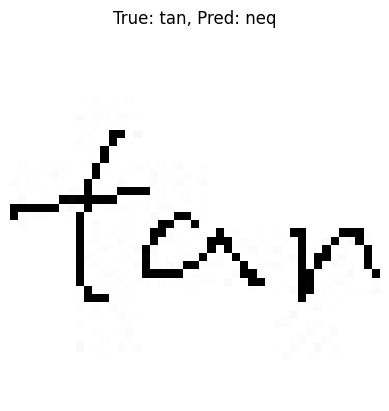

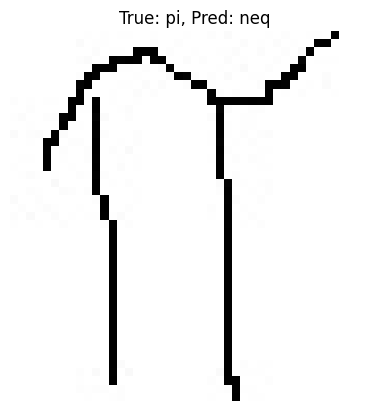

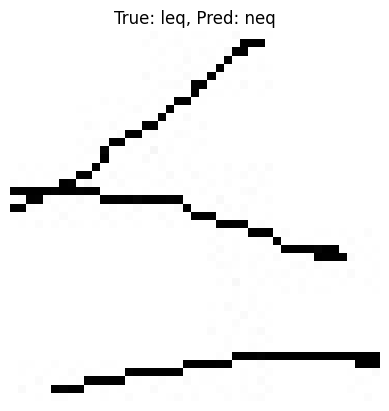

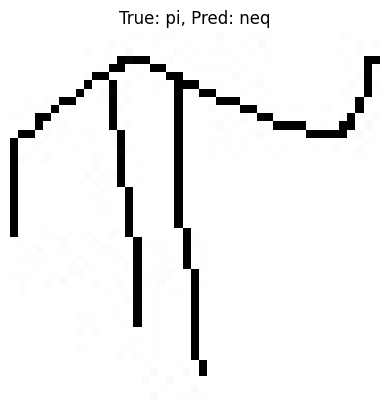

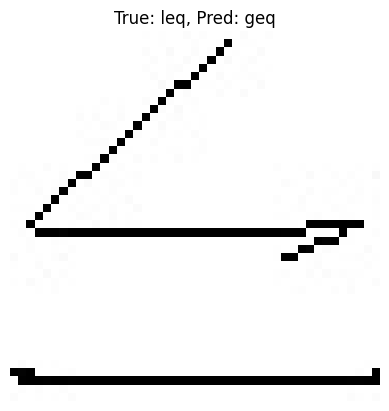

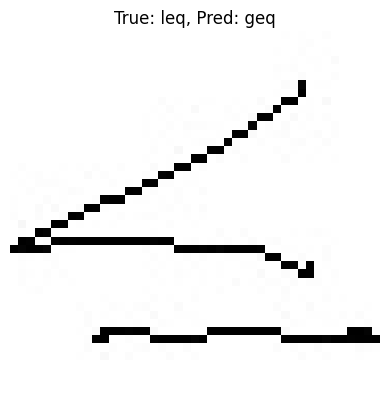

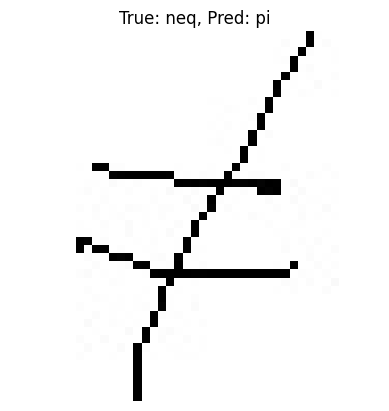

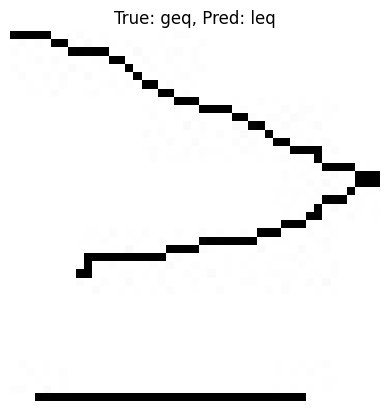

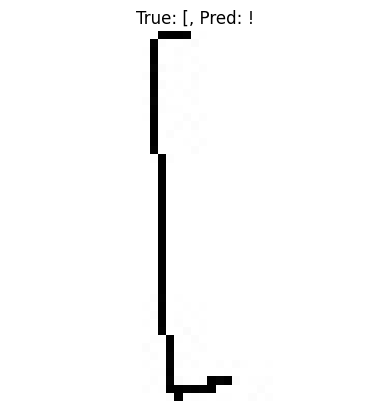

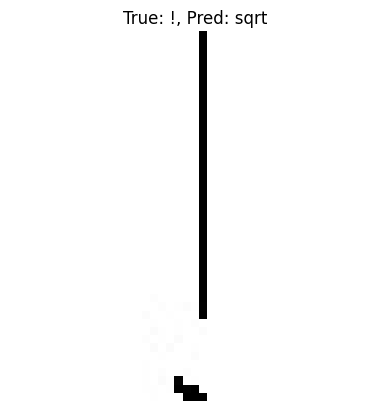

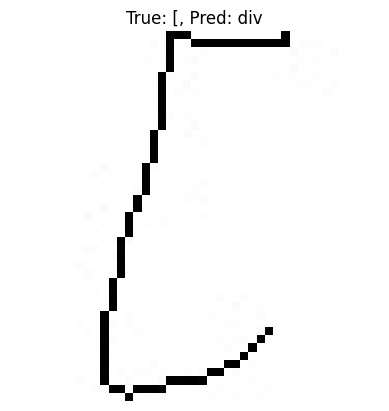

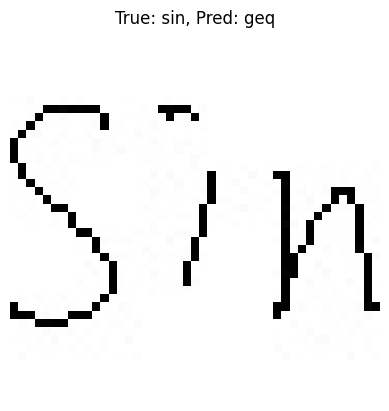

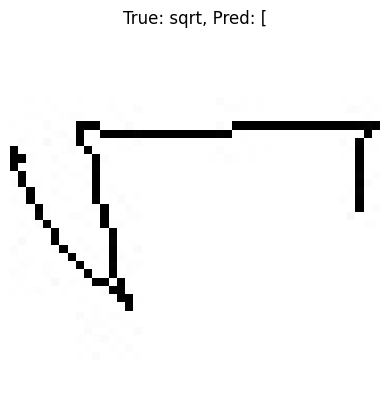

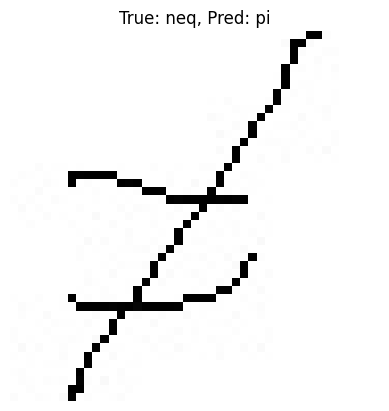

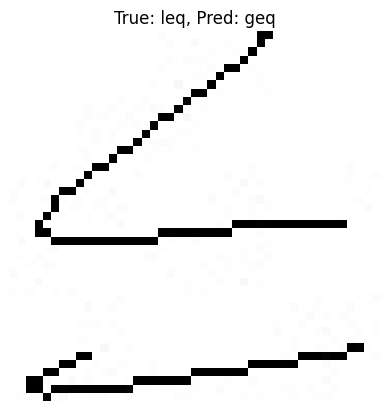

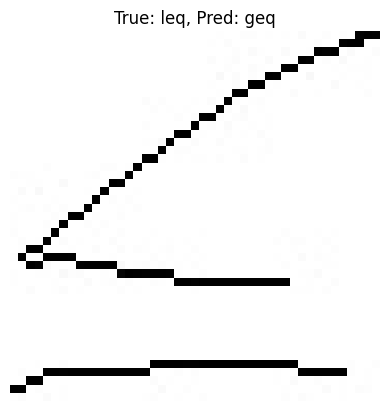

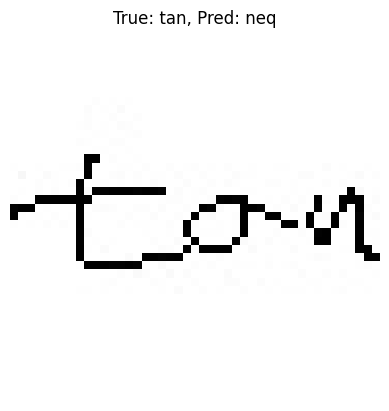

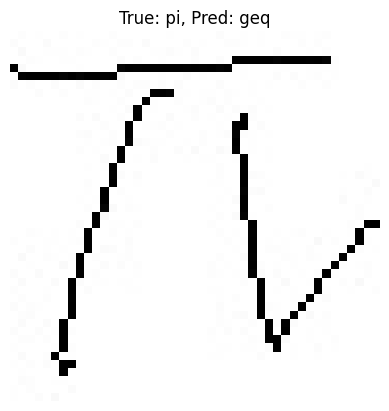

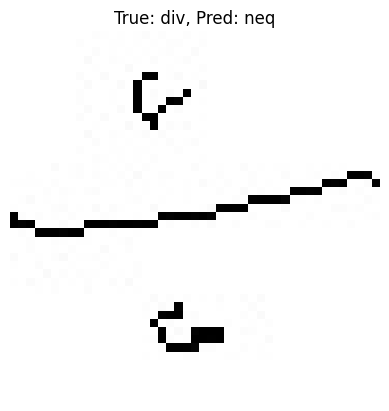

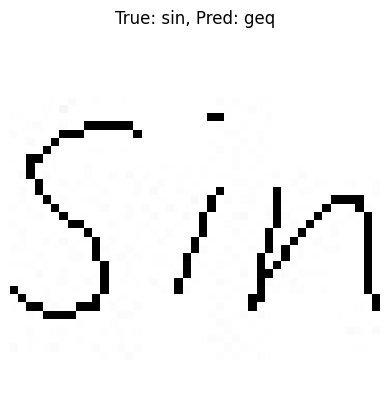

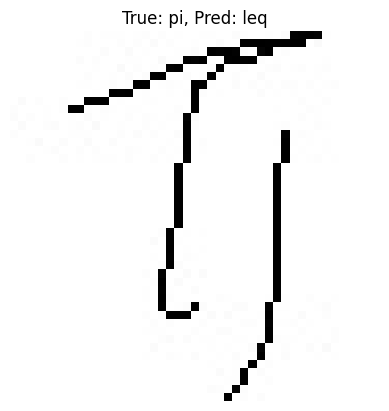

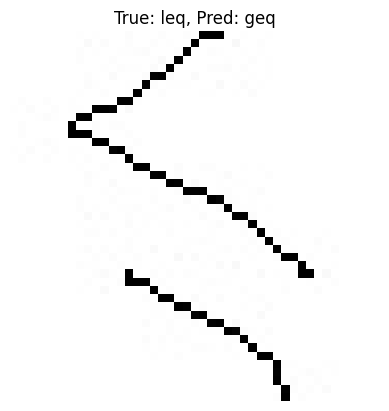

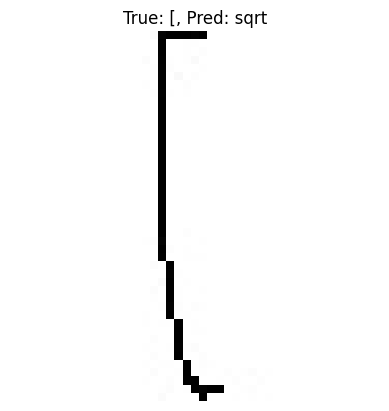

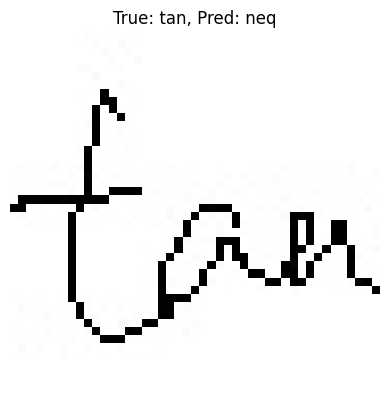

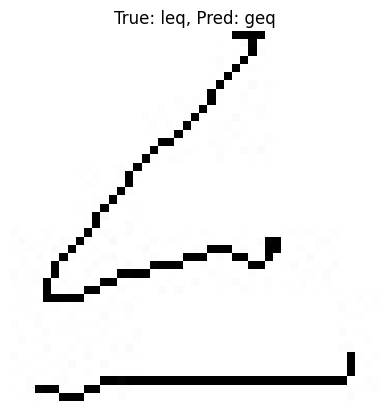

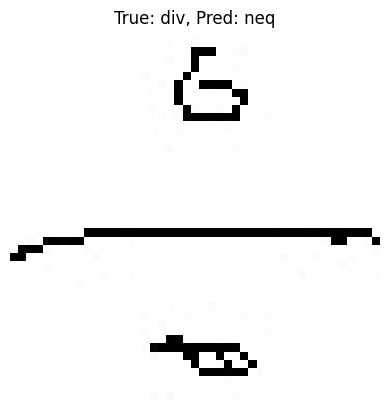

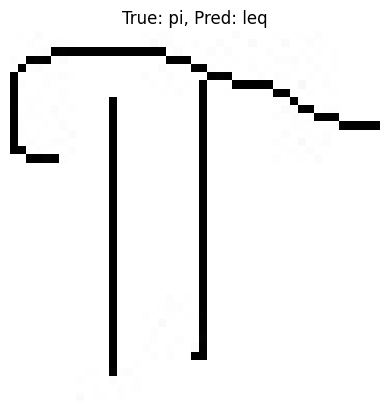

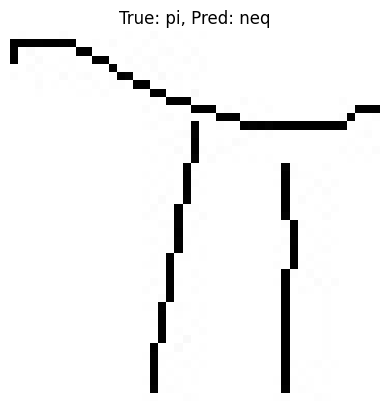

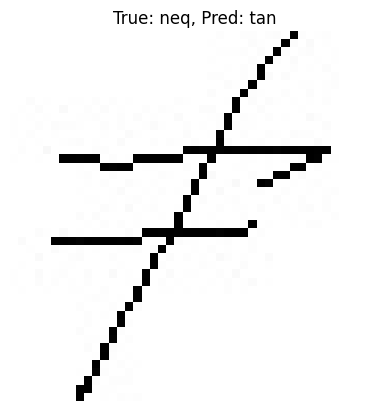

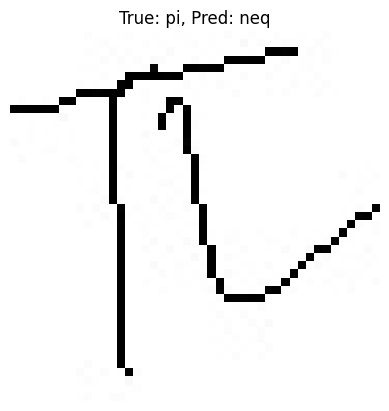

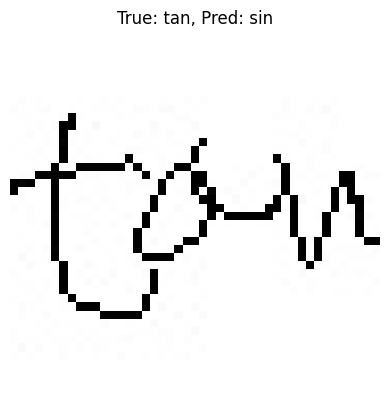

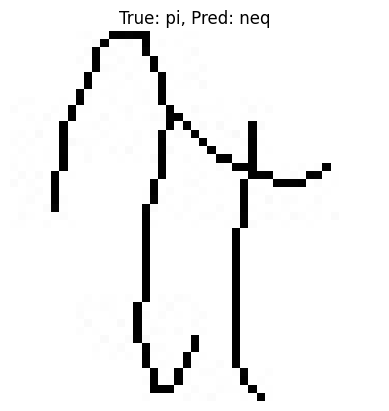

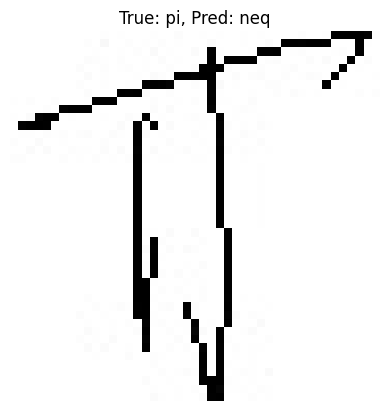

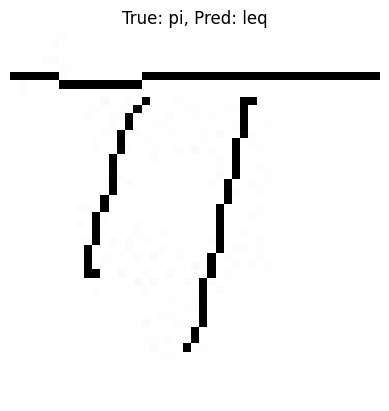

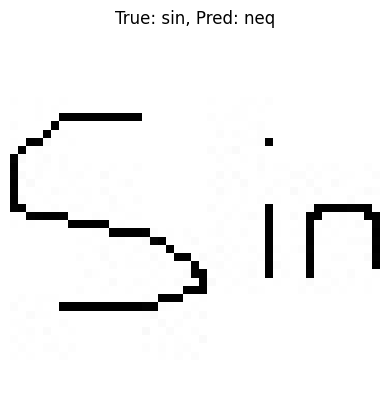

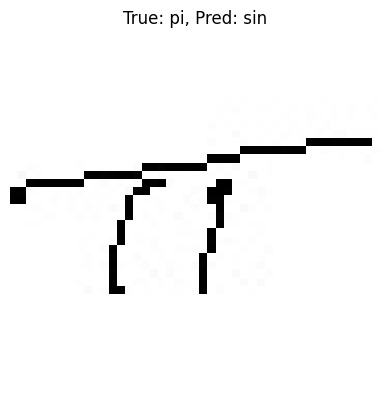

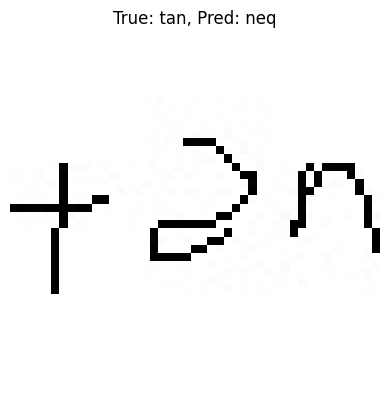

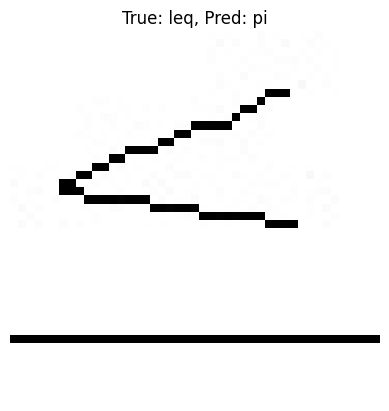

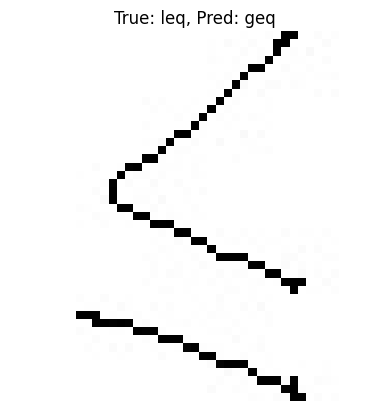

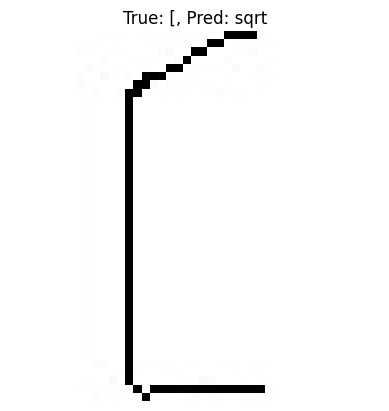

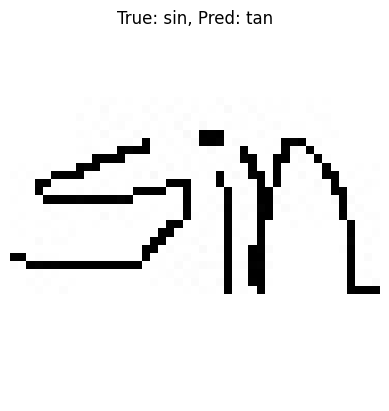

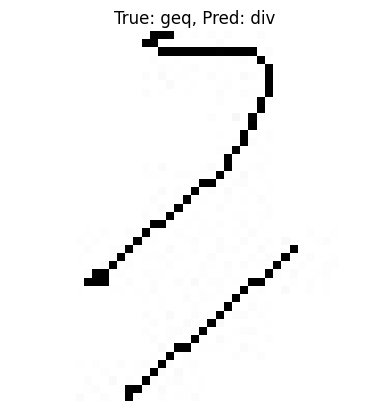

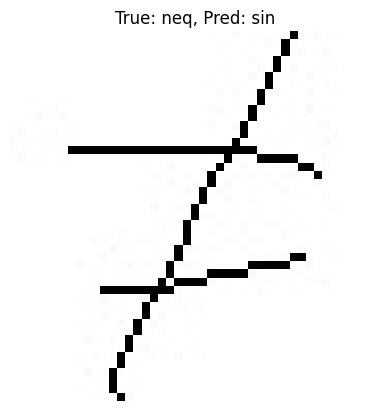

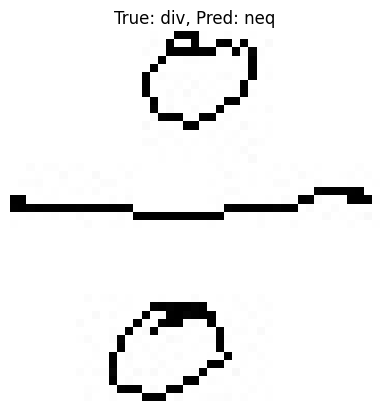

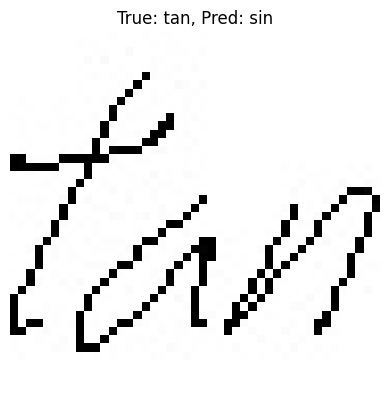

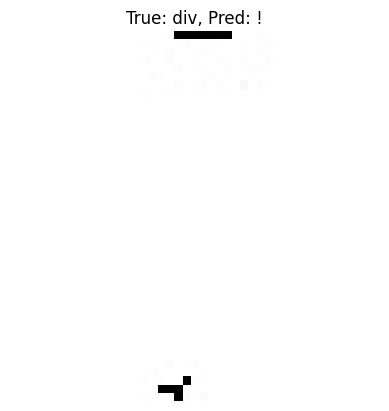

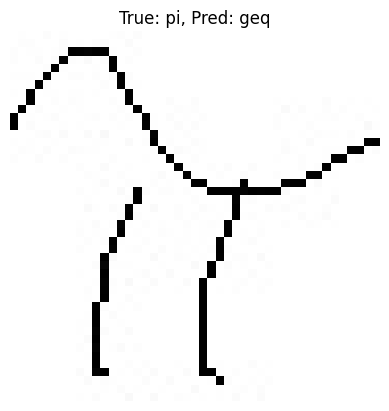

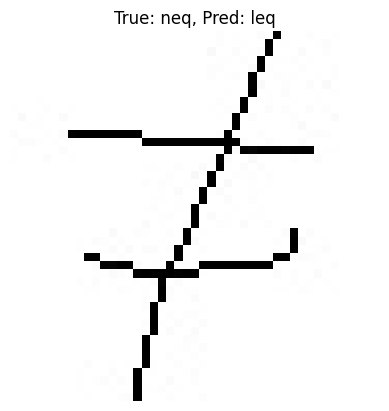

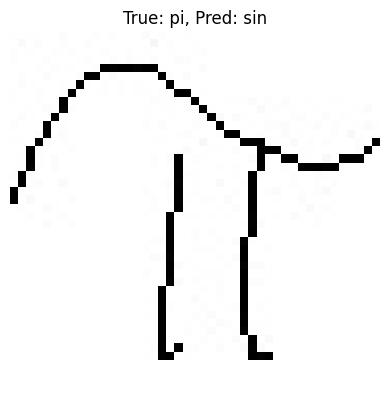

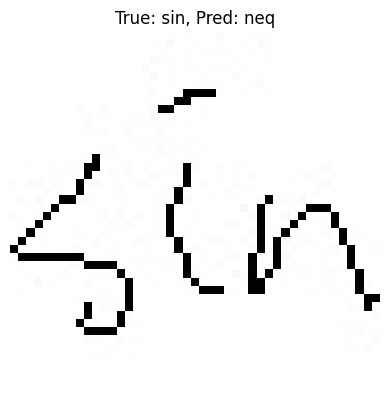

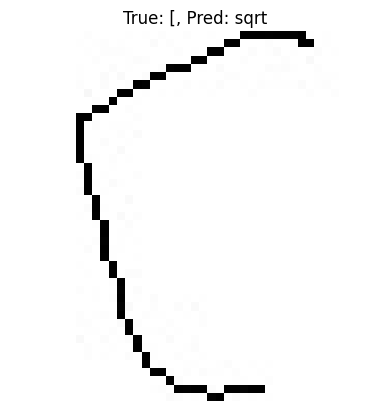

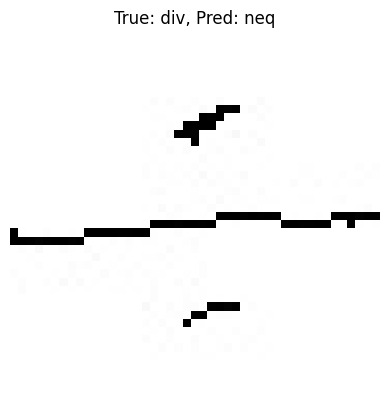

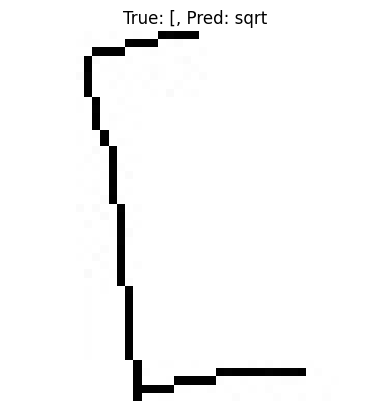

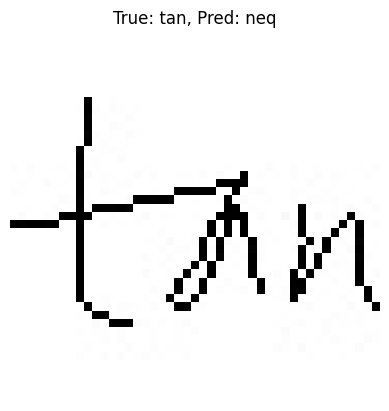

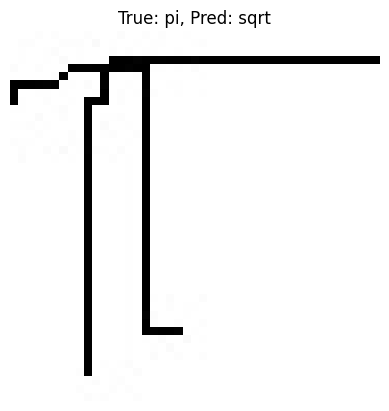

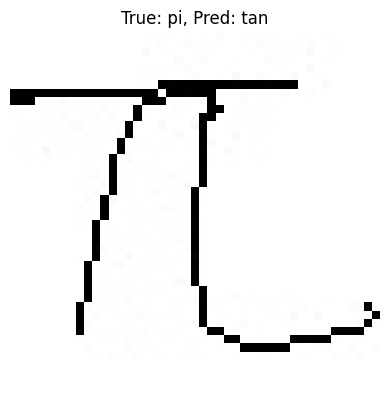

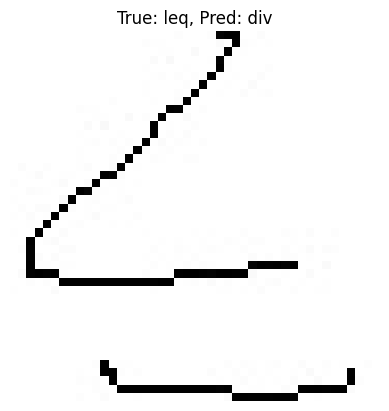

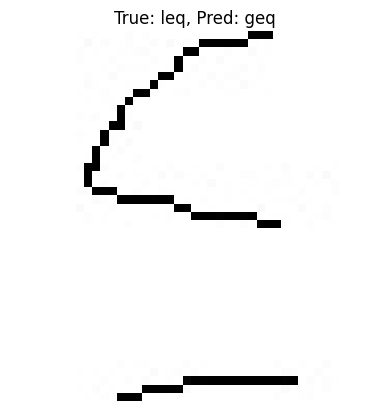

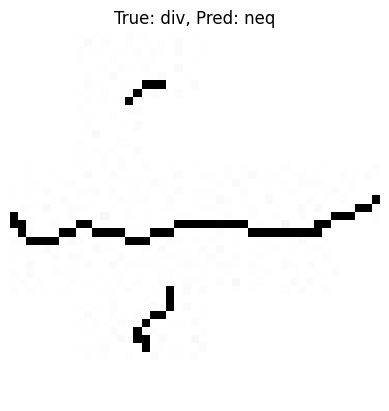

In [ ]:
misclassified = numpy.where(y_pred_labels != y_test_labels)[0] # Get indexes of misclassified images
for index in misclassified: # For each misclassified image
  plt.imshow(x_test[index]) # Add the corresponding image to the plot
  plt.title(f"True: {labelNames[y_test_labels[index]]}, Pred: {labelNames[y_pred_labels[index]]}") # Add the labels to the plot
  plt.axis('off')
  plt.show()